In [5]:
%matplotlib inline

In [1]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

import os
cwd = os.getcwd()
datadir = os.path.join(os.path.sep, cwd,'data')
datadir = os.path.join(os.path.sep, datadir, 'adhd')
files = []
for dirpath, dirnames, filenames in os.walk(datadir):
    for filename in [f for f in filenames if f.endswith(".nii.gz")]:
        files.append(os.path.join(dirpath, filename))

print(len(files))
counter = 0
fileNum = 1

Atlas ROIs are located in nifti image (4D) at: C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
811


In [2]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                       memory='nilearn_cache', verbose=5, resampling_target ="labels")

for fmri_filename in files:
    curFIleName = fmri_filename.split('\\')[-1]
    id = curFIleName.split('_')[0]
    type = curFIleName.split('_')[2]
    label = curFIleName.split('_')[1]
    print(type)
    if type != 'rest':
        continue

    from nilearn.connectome import ConnectivityMeasure
    correlation_measure = ConnectivityMeasure(kind='correlation')
    time_series = masker.fit_transform(fmri_filename)

    correlation_matrix = correlation_measure.fit_transform([time_series])[0]

    #storing to csv
    import csv
    import numpy as np
    fil_name = 'adhdMatrix'
    label_fil = 'adhdLabel'
    print(correlation_matrix, (1, -1))
    print(correlation_matrix.shape)

    with open(fil_name+'.csv','a') as csvfile:
        reshaped = np.reshape(correlation_matrix, (1, -1))
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerows(reshaped)
    
    with open(label_fil+'.csv','a') as csvfile:
        csvfile.write(label + "," + id)
        csvfile.write('\n')



rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz

F:\ece\ECE521\Anaconda3-4.2.0-Windows-x86_64\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)



[Memory]0.0s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.8037122   0.80180573 ... -0.37676764  0.6964234
   0.17588563]
 [ 0.8037121   1.          0.7712101  ... -0.39861414  0.69600403
   0.23125927]
 [ 0.80180573  0.7712101   1.         ... -0.24797346  0.65597373
   0.19208741]
 ...
 [-0.3767676  -0.39861414 -0.24797346 ...  1.         -0.49718148
  -0.03878656]
 [ 0.6964234   0.69600403  0.65597373 ... -0.49718145  1.
   0.21853185]
 [ 0.17588563  0.23125926  0.19208741 ... -0.03878656  0.21853183
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.0s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.8870955   0.65364504 ... -0.42516693  0.73776

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

[Memory]0.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.0000000e+00  7.8323162e-01 -5.7144445e-01 ... -6.0091324e-02
  -6.3116781e-02 -2.4778625e-02]
 [ 7.8323162e-01  1.0000000e+00 -5.4877740e-01 ...  3.8109519e-02
  -1.5081030e-01 -3.3506192e-04]
 [-5.7144445e-01 -5.4877746e-01  1.0000000e+00 ...  2.2794397e-01
   1.5807778e-01 -7.1676582e-02]
 ...
 [-6.0091324e-02  3.8109519e-02  2.2794396e-01 ...  1.0000000e+00
   1.5525372e-01 -3.6827866e-02]
 [-6.3116781e-02 -1.5081030e-01  1.5807778e-01 ...  1.5525372e-01
   1.0000000e+00 -3.5892297e-02]
 [-2.4778625e-02 -3.3506192e-04 -7.1676582e-02 ... -3.6827862e-02
  -3.5892297e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.1s, 0.0min    : Loading filter_and_extract...
___________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

[Memory]0.3s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.71357214 0.61711735 ... 0.48989156 0.49077812 0.24215193]
 [0.71357214 1.         0.7530838  ... 0.6569276  0.41304567 0.3067637 ]
 [0.61711735 0.7530838  1.         ... 0.57915574 0.5268455  0.3452192 ]
 ...
 [0.48989156 0.6569276  0.5791558  ... 1.         0.50603986 0.17506455]
 [0.49077815 0.41304567 0.5268455  ... 0.50603986 1.         0.16882408]
 [0.24215193 0.3067637  0.3452192  ... 0.17506455 0.16882408 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.3s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[1.         0.67095166 0.68899333 ... 0.62886834 0.4427931  0.26317117]
 [0.67095166 1.         0.749

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.827146    0.37945053 ...  0.6797591   0.65666413
   0.01314864]
 [ 0.82714605  1.          0.02545897 ...  0.7962153   0.782995
   0.06974505]
 [ 0.37945053  0.02545897  1.         ...  0.06190795 -0.01110039
  -0.10005138]
 ...
 [ 0.6797591   0.7962153   0.06190795 ...  1.          0.67458564
   0.09226317]
 [ 0.65666413  0.782995   -0.01110039 ...  0.67458564  1.
   0.07970852]
 [ 0.01314864  0.06974505 -0.10005138 ...  0.09226317  0.07970852
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.5s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.762834    0.3264224  ...  0.62705606  0.64289224
   0.3609691 ]
 [ 0.762834    1.          0.20586132 .

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

[Memory]0.7s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.         -0.4173588   0.6918775  ... -0.6586395  -0.30801997
  -0.4301922 ]
 [-0.4173588   1.         -0.28275383 ...  0.677619    0.7070472
   0.46239394]
 [ 0.6918775  -0.28275383  1.         ... -0.59874326 -0.08518428
  -0.26258036]
 ...
 [-0.6586395   0.677619   -0.59874326 ...  1.          0.5854085
   0.580913  ]
 [-0.30802     0.7070472  -0.08518428 ...  0.5854085   1.
   0.4062132 ]
 [-0.4301922   0.46239397 -0.26258036 ...  0.580913    0.4062132
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.7s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.5475728   0.3400207  ... -0.11143845 -0.03422865

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.41050744  0.6639386  ...  0.11129804  0.31476232
   0.38448912]
 [ 0.41050744  1.          0.0058644  ...  0.07356715  0.48918182
   0.6106329 ]
 [ 0.6639386   0.0058644   1.         ... -0.16896786  0.1052518
   0.20144366]
 ...
 [ 0.11129804  0.07356715 -0.16896786 ...  1.          0.4381151
  -0.29732776]
 [ 0.31476232  0.48918182  0.1052518  ...  0.4381151   1.
   0.21108922]
 [ 0.38448912  0.6106329   0.20144366 ... -0.29732776  0.21108922
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.9s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.9027704   0.19995797 ... -0.6459029   0.8314832
   0.51122874]
 [ 0.9027704   1.          0.11998257 ..

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

[[ 1.          0.12012268 -0.15105982 ... -0.18379994 -0.03915273
   0.01179035]
 [ 0.12012267  1.          0.27829313 ...  0.08286016  0.1665459
   0.0582612 ]
 [-0.15105984  0.27829313  1.         ...  0.3351609   0.6379633
   0.14888081]
 ...
 [-0.18379995  0.08286016  0.3351609  ...  1.          0.31091887
   0.02624726]
 [-0.03915273  0.16654588  0.6379633  ...  0.31091887  1.
   0.1608565 ]
 [ 0.01179035  0.0582612   0.14888081 ...  0.02624726  0.1608565
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]1.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.85087234  0.64058155 ... -0.14213583 -0.04347509
   0.7459764 ]
 [ 0.8508724   1.          0.5022408  ... -0.00958839 -0.28543636
   0.70044214]
 [ 0.6405815   0.5022407   1.         ..

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l

__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.92722076  0.66944855 ... -0.80673116  0.8986876
  -0.73400205]
 [ 0.9272207   1.          0.7446205  ... -0.7001078   0.8388026
  -0.6318685 ]
 [ 0.66944855  0.7446205   1.         ... -0.46012112  0.651889
  -0.4178327 ]
 ...
 [-0.80673116 -0.7001078  -0.46012112 ...  1.         -0.814118
   0.70386314]
 [ 0.8986876   0.8388025   0.651889   ... -0.814118    1.
  -0.6910547 ]
 [-0.73400205 -0.6318685  -0.4178327  ...  0.70386314 -0.6910547
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]1.3s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.          0.29325345 -0.02292059 ... -0.05850924 -0.08578368
   0.1029335 ]
 [ 0.29325345  1.         -0.10425507 ... -0

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_l


__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[[ 1.0000000e+00  4.5467034e-01  6.9463533e-01 ...  4.5443524e-04
   2.6014289e-01  9.0119123e-02]
 [ 4.5467034e-01  1.0000000e+00  5.4819149e-01 ... -1.2862164e-01
   3.3220184e-01  5.8123026e-02]
 [ 6.9463533e-01  5.4819149e-01  1.0000000e+00 ... -6.1006494e-02
   2.0196302e-01  4.5900617e-02]
 ...
 [ 4.5443524e-04 -1.2862165e-01 -6.1006498e-02 ...  1.0000000e+00
  -8.8794634e-02 -3.5168387e-02]
 [ 2.6014289e-01  3.3220184e-01  2.0196301e-01 ... -8.8794634e-02
   1.0000000e+00  9.7214326e-02]
 [ 9.0119123e-02  5.8123022e-02  4.5900617e-02 ... -3.5168387e-02
   9.7214326e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]1.4s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals


F:\ece\ECE521\Anaconda3-4.2.0-Windows-x86_64\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.7s, 0.6min
[[ 1.          0.5058458  -0.36506307 ... -0.04726731 -0.09532277
   0.18206477]
 [ 0.5058458   1.         -0.51508963 ... -0.04278013 -0.20197275
   0.21742648]
 [-0.36506307 -0.5150897   1.         ...  0.11455477  0.35018212
  -0.18030068]
 ...
 [-0.04726731 -0.04278013  0.11455477 ...  1.          0.07971038
  -0.05920697]
 [-0.09532277 -0.20197277  0.35018212 ...  0.07971038  1.
  -0.06382482]
 [ 0.18206477  0.21742646 -0.18030068 ... -0.05920697 -0.06382482
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capsto

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[ 1.          0.9531642   0.9235354  ...  0.0754538   0.57619905
   0.1515215 ]
 [ 0.9531642   1.          0.92421633 ...  0.15179095  0.5922729
   0.16630594]
 [ 0.9235354   0.92421633  1.         ...  0.17803285  0.5582366
   0.13671683]
 ...
 [ 0.0754538   0.15179095  0.17803285 ...  1.          0.04080694
  -0.04495251]
 [ 0.57619905  0.5922729   0.5582366  ...  0.04080694  1.
   0.13923714]
 [ 0.1515215   0.16630594  0.13671684 ... -0.04495252  0.13923715
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[ 1.          0.93122035  0.6988294  ...  0.24351196  0.23189564
   0.05226758]
 [ 0.93122035  1.          0.7309087  ...  0.25915715  0.25809202
   0.05195773]
 [ 0.6988294   0.7309087   1.         ...  0.43181172  0.22441371
  -0.00576131]
 ...
 [ 0.24351196  0.25915712  0.43181172 ...  1.          0.08618591
   0.01180729]
 [ 0.23189564  0.25809202  0.22441372 ...  0.08618591  1.
   0.04744976]
 [ 0.05226758  0.05195773 -0.00576131 ...  0.01180729  0.04744976
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[ 1.          0.5619035   0.5345138  ...  0.38938954  0.22940849
   0.0356496 ]
 [ 0.5619035   1.         -0.08901768 ...  0.8757351  -0.29968446
   0.14560221]
 [ 0.5345138  -0.08901768  1.         ... -0.31344548  0.75471216
  -0.05327521]
 ...
 [ 0.38938954  0.8757351  -0.31344548 ...  1.         -0.57105166
   0.183321  ]
 [ 0.22940849 -0.2996845   0.75471216 ... -0.57105166  1.
  -0.03582429]
 [ 0.0356496   0.14560223 -0.05327521 ...  0.183321   -0.03582428
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.93998677 0.80517554 ... 0.90061224 0.8983573  0.3052723 ]
 [0.9399867  1.         0.73241776 ... 0.93737    0.90663075 0.27646723]
 [0.80517554 0.73241776 1.         ... 0.73754334 0.752648   0.2723277 ]
 ...
 [0.90061224 0.93737    0.73754334 ... 1.         0.8410849  0.29209682]
 [0.8983573  0.90663075 0.75264806 ... 0.84108496 1.         0.28300732]
 [0.30527234 0.27646723 0.27232772 ... 0.29209682 0.28300735 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.9s, 0.7min
[[ 1.          0.69193107  0.6824776  ...  0.3174365   0.08107879
   0.09837502]
 [ 0.69193107  1.          0.23738655 ...  0.74123186  0.47747472
   0.13615988]
 [ 0.6824776   0.23738655  1.         ... -0.05167503 -0.12654836
   0.0697569 ]
 ...
 [ 0.3174365   0.74123186 -0.05167503 ...  1.          0.7662854
   0.07549267]
 [ 0.08107879  0.47747472 -0.12654836 ...  0.7662854   1.
  -0.0013814 ]
 [ 0.09837502  0.13615988  0.0697569  ...  0.07549267 -0.0013814
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.2s, 0.7min
[[1.         0.81742734 0.84524465 ... 0.71990657 0.4969903  0.1226414 ]
 [0.81742734 1.         0.67862856 ... 0.8463516  0.6944368  0.06262183]
 [0.8452447  0.67862856 1.         ... 0.6606709  0.4842586  0.10681938]
 ...
 [0.71990657 0.8463516  0.6606709  ... 1.         0.7988786  0.09415952]
 [0.4969903  0.6944368  0.48425856 ... 0.7988786  1.         0.10054497]
 [0.12264139 0.06262183 0.10681938 ... 0.09415952 0.10054497 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.2s, 0.6min
[[ 1.          0.8875378   0.54943174 ... -0.7451829   0.4629868
   0.34413454]
 [ 0.8875377   1.          0.47301602 ... -0.58487356  0.6482173
   0.28839275]
 [ 0.5494317   0.473016    1.         ... -0.15198696  0.36747807
   0.23185898]
 ...
 [-0.7451828  -0.58487356 -0.15198696 ...  1.          0.07632295
  -0.27812278]
 [ 0.4629868   0.6482173   0.36747807 ...  0.07632295  1.
   0.18428475]
 [ 0.34413454  0.28839275  0.23185898 ... -0.27812275  0.18428475
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.3s, 0.5min
[[ 1.          0.8844453   0.47841504 ... -0.64294136  0.30735463
   0.56673616]
 [ 0.88444525  1.          0.33278528 ... -0.5736883   0.4234324
   0.55510896]
 [ 0.478415    0.33278528  1.         ... -0.3489416   0.11977221
   0.15835395]
 ...
 [-0.64294136 -0.5736883  -0.3489416  ...  1.          0.31907597
  -0.3965293 ]
 [ 0.30735463  0.42343244  0.11977222 ...  0.31907597  1.
   0.2774304 ]
 [ 0.56673616  0.555109    0.15835395 ... -0.3965293   0.27743036
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.7964597   0.59575146 ...  0.66117746  0.6046319
   0.02625314]
 [ 0.7964597   1.          0.48312974 ...  0.65608907  0.7814923
   0.02317675]
 [ 0.59575146  0.48312974  1.         ...  0.6245308   0.3504865
   0.07575054]
 ...
 [ 0.66117746  0.65608907  0.62453085 ...  1.          0.49546275
   0.09124269]
 [ 0.6046319   0.7814923   0.3504865  ...  0.49546275  1.
  -0.01272946]
 [ 0.02625314  0.02317675  0.07575054 ...  0.09124269 -0.01272946
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[ 1.          0.79073095 -0.20301643 ...  0.64249724  0.01748994
  -0.08832143]
 [ 0.79073095  1.         -0.20753433 ...  0.61047596  0.16667026
  -0.0500923 ]
 [-0.20301642 -0.20753433  1.         ... -0.16266313  0.26199502
   0.14860168]
 ...
 [ 0.64249724  0.61047596 -0.16266315 ...  1.         -0.08833796
  -0.03891051]
 [ 0.01748994  0.16667026  0.26199502 ... -0.08833796  1.
   0.17455873]
 [-0.08832143 -0.0500923   0.14860168 ... -0.0389105   0.17455873
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[1.         0.80762506 0.1339616  ... 0.38940263 0.75067043 0.06665816]
 [0.80762506 1.         0.05033411 ... 0.5645643  0.62525326 0.11843937]
 [0.13396159 0.05033411 1.         ... 0.23596685 0.23211665 0.02057122]
 ...
 [0.38940263 0.5645642  0.23596685 ... 1.         0.31657246 0.11843155]
 [0.75067043 0.62525326 0.23211667 ... 0.31657246 1.         0.03062291]
 [0.06665816 0.11843936 0.02057122 ... 0.11843154 0.03062291 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.6s, 0.6min
[[ 1.          0.8083465   0.31819758 ...  0.06452752  0.6828188
  -0.01701215]
 [ 0.8083465   1.          0.2999987  ...  0.29574758  0.6056316
   0.03030126]
 [ 0.31819758  0.2999987   1.         ... -0.03031361  0.5618925
   0.16181655]
 ...
 [ 0.06452752  0.29574758 -0.03031361 ...  1.         -0.09486677
   0.16936098]
 [ 0.6828188   0.6056316   0.5618925  ... -0.09486677  1.
   0.078146  ]
 [-0.01701215  0.03030126  0.16181655 ...  0.16936098  0.078146
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.4s, 0.6min
[[ 1.          0.9511003   0.7493     ...  0.9098273   0.9222664
  -0.8182161 ]
 [ 0.9511003   1.          0.66468585 ...  0.9364113   0.9355335
  -0.83359414]
 [ 0.7493      0.66468585  1.         ...  0.6726166   0.69926083
  -0.625277  ]
 ...
 [ 0.9098273   0.9364113   0.6726166  ...  1.          0.90113556
  -0.84685326]
 [ 0.9222665   0.93553346  0.6992608  ...  0.9011356   1.
  -0.80646706]
 [-0.8182161  -0.83359414 -0.625277   ... -0.84685326 -0.806467
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.3s, 0.6min
[[ 1.          0.61970526  0.574086   ...  0.42543095  0.35808945
  -0.2154032 ]
 [ 0.61970526  1.          0.6472488  ...  0.9065968   0.85668284
  -0.7037523 ]
 [ 0.574086    0.6472488   1.         ...  0.56198347  0.6345744
  -0.29665944]
 ...
 [ 0.42543092  0.9065968   0.5619834  ...  1.          0.9005136
  -0.8012368 ]
 [ 0.35808945  0.85668284  0.6345744  ...  0.9005135   1.
  -0.77578115]
 [-0.21540318 -0.7037523  -0.29665947 ... -0.8012368  -0.77578115
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.3s, 0.6min
[[ 1.          0.2623969   0.16594574 ... -0.04491406  0.2897676
   0.18216099]
 [ 0.2623969   1.          0.51539284 ...  0.43672407  0.6013638
   0.46911865]
 [ 0.16594574  0.51539284  1.         ...  0.74337417  0.71133006
   0.44431034]
 ...
 [-0.04491406  0.43672407  0.74337417 ...  1.          0.572695
   0.2980245 ]
 [ 0.2897676   0.60136384  0.7113301  ...  0.572695    1.
   0.60082865]
 [ 0.18216099  0.46911865  0.44431037 ...  0.2980245   0.60082865
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.          0.5317925   0.48243263 ... -0.00414263 -0.19708961
   0.23336603]
 [ 0.5317925   1.          0.17373404 ...  0.27413812  0.15541346
   0.17049713]
 [ 0.48243266  0.17373404  1.         ... -0.36704412 -0.11999313
   0.45212495]
 ...
 [-0.00414263  0.27413812 -0.36704412 ...  1.          0.35692218
  -0.2714487 ]
 [-0.19708961  0.15541346 -0.11999313 ...  0.35692218  1.
   0.11911979]
 [ 0.23336603  0.17049713  0.45212492 ... -0.2714487   0.11911979
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[ 1.          0.8099457   0.799745   ... -0.3764822   0.3893054
   0.50837225]
 [ 0.8099457   1.          0.8613073  ... -0.21531907  0.514224
   0.5381041 ]
 [ 0.799745    0.8613073   1.         ... -0.29929167  0.4407943
   0.54166675]
 ...
 [-0.3764822  -0.21531907 -0.29929167 ...  1.          0.09755515
  -0.23461716]
 [ 0.3893054   0.514224    0.44079432 ...  0.09755514  1.
   0.22492036]
 [ 0.5083723   0.5381041   0.54166675 ... -0.23461716  0.22492036
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[1.         0.93899626 0.8583798  ... 0.88847274 0.8647701  0.43245986]
 [0.93899626 1.         0.8920376  ... 0.9522302  0.93820995 0.42883494]
 [0.8583798  0.8920376  1.         ... 0.89219064 0.84028786 0.41197452]
 ...
 [0.88847274 0.9522302  0.89219064 ... 1.         0.9257699  0.39045173]
 [0.8647702  0.93821007 0.8402878  ... 0.92577004 1.         0.42485383]
 [0.43245986 0.42883492 0.41197452 ... 0.39045173 0.4248538  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.4s, 0.6min
[[ 1.          0.94306     0.9394536  ...  0.7081927  -0.02418446
   0.02958843]
 [ 0.94306     1.          0.92608017 ...  0.7032272  -0.03895287
   0.05861374]
 [ 0.9394536   0.92608017  1.         ...  0.7296102  -0.02047965
   0.02030565]
 ...
 [ 0.7081927   0.7032272   0.72961015 ...  1.         -0.05112733
  -0.03649792]
 [-0.02418447 -0.03895287 -0.02047965 ... -0.05112733  1.
  -0.02224987]
 [ 0.02958843  0.05861374  0.02030565 ... -0.03649792 -0.02224987
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.5s, 0.6min
[[1.         0.9421619  0.9318867  ... 0.5889151  0.17062396 0.12006734]
 [0.942162   1.         0.890128   ... 0.6036261  0.15946329 0.08440962]
 [0.9318867  0.890128   1.         ... 0.6185646  0.14866768 0.1368491 ]
 ...
 [0.58891505 0.6036261  0.6185646  ... 1.         0.10501498 0.01110333]
 [0.17062396 0.15946327 0.14866766 ... 0.10501498 1.         0.22466925]
 [0.12006734 0.08440962 0.1368491  ... 0.01110333 0.22466923 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.9580797   0.9482656  ... -0.32404986  0.92362666
   0.08554644]
 [ 0.9580797   1.          0.9373951  ... -0.33908284  0.9092259
   0.13789023]
 [ 0.94826573  0.9373951   1.         ... -0.2804114   0.9250865
   0.11128865]
 ...
 [-0.32404986 -0.33908284 -0.2804114  ...  1.         -0.2740607
  -0.03076027]
 [ 0.92362666  0.90922594  0.9250865  ... -0.2740607   1.
   0.11292598]
 [ 0.08554644  0.13789023  0.11128865 ... -0.03076027  0.11292598
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.3s, 0.6min
[[ 1.          0.96447134  0.9162654  ... -0.5627803   0.958304
   0.7059694 ]
 [ 0.96447134  1.          0.9072082  ... -0.48036435  0.9466037
   0.70384175]
 [ 0.9162654   0.90720814  1.         ... -0.46529368  0.9092682
   0.6665165 ]
 ...
 [-0.5627803  -0.48036438 -0.46529368 ...  1.         -0.55942845
  -0.30215073]
 [ 0.958304    0.9466037   0.90926826 ... -0.55942845  1.
   0.6801629 ]
 [ 0.70596933  0.70384175  0.6665165  ... -0.30215073  0.6801629
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.4s, 0.6min
[[ 1.          0.00357448  0.09963217 ...  0.0587274   0.08266459
   0.1242822 ]
 [ 0.00357448  1.          0.37018225 ... -0.30090836 -0.25368026
   0.03206256]
 [ 0.09963217  0.37018225  1.         ...  0.12013387  0.13093142
   0.45094165]
 ...
 [ 0.05872741 -0.30090836  0.12013386 ...  1.          0.47789118
   0.16475803]
 [ 0.08266459 -0.25368026  0.13093142 ...  0.47789115  1.
   0.5027542 ]
 [ 0.1242822   0.03206256  0.45094165 ...  0.16475803  0.5027543
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.3s, 0.6min
[[ 1.         -0.25869435  0.2959411  ...  0.13809906  0.22674498
   0.39287648]
 [-0.25869435  1.         -0.07653281 ... -0.02433932 -0.12630753
  -0.2674531 ]
 [ 0.2959411  -0.07653281  1.         ...  0.71694803  0.73252046
   0.6823761 ]
 ...
 [ 0.13809906 -0.02433932  0.71694803 ...  1.          0.84840107
   0.5723074 ]
 [ 0.22674498 -0.12630753  0.7325205  ...  0.84840107  1.
   0.7289455 ]
 [ 0.39287645 -0.2674531   0.682376   ...  0.5723074   0.7289455
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[1.         0.9252809  0.9150069  ... 0.6700425  0.6486146  0.4710786 ]
 [0.92528087 1.         0.8585337  ... 0.63311875 0.62536615 0.43947303]
 [0.9150069  0.85853374 1.         ... 0.70411146 0.68278927 0.5518828 ]
 ...
 [0.6700425  0.63311875 0.70411146 ... 1.         0.5401217  0.28627253]
 [0.6486145  0.6253662  0.68278927 ... 0.54012173 1.         0.3025166 ]
 [0.47107857 0.43947306 0.5518828  ... 0.28627253 0.3025166  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.6502669  0.7972767  ... 0.33915526 0.4187599  0.4334797 ]
 [0.65026695 1.         0.47046787 ... 0.33534315 0.2963329  0.32102257]
 [0.7972767  0.4704679  1.         ... 0.40054825 0.6026675  0.4638906 ]
 ...
 [0.33915526 0.33534315 0.40054825 ... 1.         0.35708505 0.2479007 ]
 [0.41875988 0.2963329  0.6026675  ... 0.35708505 1.         0.27195585]
 [0.43347967 0.32102257 0.46389064 ... 0.2479007  0.27195585 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.          0.9185862   0.15913513 ... -0.35606486  0.83137614
  -0.08852284]
 [ 0.9185862   1.          0.2819669  ... -0.2164027   0.7909833
  -0.12170122]
 [ 0.15913513  0.2819669   1.         ...  0.41607904  0.13960496
  -0.0472586 ]
 ...
 [-0.35606486 -0.2164027   0.41607904 ...  1.         -0.31631005
  -0.00845144]
 [ 0.8313762   0.7909833   0.13960496 ... -0.31631005  1.
  -0.08379948]
 [-0.08852284 -0.12170123 -0.0472586  ... -0.00845144 -0.08379948
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.         -0.08521737  0.6829742  ... -0.7958109   0.85129845
  -0.36515608]
 [-0.08521737  1.         -0.29967165 ...  0.38458446 -0.19178501
   0.22781123]
 [ 0.6829742  -0.29967165  1.         ... -0.556596    0.637045
  -0.330011  ]
 ...
 [-0.7958108   0.38458446 -0.556596   ...  1.         -0.7879685
   0.39301768]
 [ 0.8512984  -0.19178501  0.637045   ... -0.7879685   1.
  -0.39414686]
 [-0.36515608  0.22781122 -0.330011   ...  0.39301768 -0.39414686
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.644904    0.8006174  ... -0.2504958   0.37480673
   0.3141305 ]
 [ 0.644904    1.          0.5088879  ... -0.18428689  0.23938817
   0.2376307 ]
 [ 0.8006174   0.5088879   1.         ... -0.44847515  0.32077822
   0.27384192]
 ...
 [-0.25049582 -0.18428689 -0.44847515 ...  1.         -0.21276762
  -0.04835692]
 [ 0.37480676  0.23938817  0.32077822 ... -0.21276762  1.
   0.19507034]
 [ 0.3141305   0.2376307   0.27384195 ... -0.04835692  0.19507034
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[ 1.          0.7323732   0.70532596 ... -0.24205048  0.2266485
   0.11682374]
 [ 0.7323732   1.          0.5920942  ... -0.29353788  0.26362014
   0.08014013]
 [ 0.70532596  0.5920942   1.         ... -0.31711224  0.35851458
   0.23536953]
 ...
 [-0.24205047 -0.29353786 -0.31711224 ...  1.          0.0694235
  -0.16090944]
 [ 0.22664851  0.26362014  0.35851458 ...  0.0694235   1.
   0.15463397]
 [ 0.11682373  0.08014014  0.23536953 ... -0.16090944  0.15463397
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[ 1.          0.8618849   0.0832986  ...  0.7180484   0.32048663
   0.0126998 ]
 [ 0.86188495  1.         -0.12022406 ...  0.8782416   0.59554994
  -0.00157414]
 [ 0.0832986  -0.12022406  1.         ... -0.2189608  -0.49535435
  -0.02815376]
 ...
 [ 0.7180484   0.8782416  -0.21896079 ...  1.          0.75140536
  -0.01894525]
 [ 0.32048663  0.59554994 -0.49535435 ...  0.75140536  1.
   0.02714398]
 [ 0.0126998  -0.00157414 -0.02815376 ... -0.01894525  0.02714398
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[1.         0.8772976  0.7399568  ... 0.84704477 0.39197874 0.5185459 ]
 [0.8772976  1.         0.62804157 ... 0.839055   0.44276962 0.5358253 ]
 [0.73995674 0.62804157 1.         ... 0.7975957  0.3149568  0.4251821 ]
 ...
 [0.84704477 0.839055   0.7975957  ... 1.         0.5373538  0.52961236]
 [0.39197874 0.4427696  0.31495678 ... 0.5373538  1.         0.31991547]
 [0.5185459  0.5358253  0.42518207 ... 0.52961236 0.31991547 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[ 1.          0.8029668   0.77071947 ... -0.8652479   0.09479777
   0.83862287]
 [ 0.8029668   1.          0.7014763  ... -0.6374824   0.17157125
   0.6669797 ]
 [ 0.77071947  0.7014763   1.         ... -0.53840303 -0.03044435
   0.7219257 ]
 ...
 [-0.8652479  -0.6374824  -0.53840303 ...  1.         -0.14543693
  -0.72746533]
 [ 0.09479777  0.17157125 -0.03044435 ... -0.14543693  1.
   0.09308836]
 [ 0.83862287  0.66697973  0.7219257  ... -0.72746533  0.09308836
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.2s, 0.5min
[[ 1.          0.95270914  0.96935385 ... -0.46263772  0.5486502
   0.9576542 ]
 [ 0.9527091   1.          0.94205713 ... -0.38279688  0.4964655
   0.92984474]
 [ 0.96935385  0.9420572   1.         ... -0.39420903  0.53062266
   0.9428115 ]
 ...
 [-0.46263772 -0.38279688 -0.39420903 ...  1.         -0.3364315
  -0.4790575 ]
 [ 0.5486502   0.4964655   0.5306226  ... -0.3364315   1.
   0.46194777]
 [ 0.9576541   0.92984474  0.9428115  ... -0.47905752  0.46194777
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[ 1.          0.919254    0.9377896  ... -0.7764812   0.7378407
   0.7854482 ]
 [ 0.919254    1.          0.94147974 ... -0.7365431   0.75308776
   0.7937715 ]
 [ 0.93778956  0.9414797   1.         ... -0.7456225   0.7348581
   0.7942211 ]
 ...
 [-0.7764812  -0.7365431  -0.7456226  ...  1.         -0.55249774
  -0.627107  ]
 [ 0.73784065  0.75308776  0.7348581  ... -0.55249774  1.
   0.64403796]
 [ 0.7854482   0.7937715   0.7942211  ... -0.62710696  0.64403796
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[1.         0.5740649  0.6615802  ... 0.39430687 0.32289955 0.33509725]
 [0.5740649  1.         0.8803198  ... 0.34988233 0.10104014 0.51473176]
 [0.6615802  0.8803198  1.         ... 0.38629594 0.12052943 0.48713383]
 ...
 [0.39430687 0.34988233 0.3862959  ... 1.         0.2726535  0.18862908]
 [0.32289955 0.10104014 0.12052943 ... 0.2726535  1.         0.12878764]
 [0.33509725 0.5147318  0.48713383 ... 0.18862908 0.12878764 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.2s, 0.6min
[[1.         0.84852785 0.8756977  ... 0.23088913 0.7884226  0.28102434]
 [0.84852785 1.         0.8939105  ... 0.25720242 0.8005875  0.2938625 ]
 [0.8756977  0.8939105  1.         ... 0.3013728  0.861041   0.25805932]
 ...
 [0.23088913 0.25720242 0.3013728  ... 1.         0.25110173 0.09421499]
 [0.7884226  0.8005875  0.86104107 ... 0.2511017  1.         0.24974757]
 [0.2810243  0.2938625  0.25805935 ... 0.094215   0.24974754 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.0s, 0.6min
[[1.         0.13909449 0.13731152 ... 0.22547013 0.25145555 0.05126944]
 [0.13909449 1.         0.68738884 ... 0.57573694 0.36258447 0.0667264 ]
 [0.13731152 0.68738884 1.         ... 0.46101263 0.39463407 0.0481998 ]
 ...
 [0.22547013 0.57573694 0.46101263 ... 1.         0.30660126 0.07090689]
 [0.25145555 0.36258447 0.39463407 ... 0.30660126 1.         0.10042088]
 [0.05126944 0.0667264  0.0481998  ... 0.07090689 0.10042087 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.9s, 0.6min
[[ 1.          0.6461974   0.7732348  ...  0.17312773  0.32039028
  -0.01175972]
 [ 0.6461974   1.          0.5815593  ...  0.43437153  0.31115198
  -0.02974517]
 [ 0.7732348   0.5815593   1.         ...  0.17875685  0.20241466
   0.01988182]
 ...
 [ 0.17312773  0.43437153  0.17875685 ...  1.          0.05697456
   0.04744478]
 [ 0.32039028  0.31115198  0.20241468 ...  0.05697456  1.
   0.05136776]
 [-0.01175972 -0.02974516  0.01988182 ...  0.04744478  0.05136776
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[ 1.          0.80260444  0.38214374 ... -0.15984163  0.67018574
   0.08745877]
 [ 0.80260444  1.          0.21668619 ... -0.3377791   0.77594966
   0.03701067]
 [ 0.38214374  0.2166862   1.         ...  0.37400982  0.15680417
   0.15218073]
 ...
 [-0.15984164 -0.3377791   0.37400982 ...  1.         -0.3561038
   0.01901899]
 [ 0.67018574  0.77594966  0.15680417 ... -0.3561038   1.
   0.03704867]
 [ 0.08745877  0.03701068  0.15218075 ...  0.01901898  0.03704867
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.7572027   0.5099162  ...  0.29652944  0.6869608
   0.08198601]
 [ 0.7572027   1.          0.29769245 ...  0.5898802   0.6682905
   0.09125546]
 [ 0.5099161   0.29769248  1.         ... -0.06537665  0.34180096
   0.05728392]
 ...
 [ 0.29652944  0.5898802  -0.06537665 ...  1.          0.13819592
   0.06658345]
 [ 0.6869608   0.6682905   0.34180096 ...  0.13819593  1.
   0.09599523]
 [ 0.08198601  0.09125546  0.05728392 ...  0.06658345  0.09599523
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.1s, 0.7min
[[1.         0.78008956 0.57711995 ... 0.49748677 0.04716756 0.54477936]
 [0.78008956 1.         0.5892894  ... 0.72972655 0.2576746  0.75523925]
 [0.57711995 0.58928937 1.         ... 0.38971406 0.27798057 0.57361025]
 ...
 [0.4974868  0.7297265  0.38971406 ... 1.         0.34128958 0.7465412 ]
 [0.04716756 0.2576746  0.27798054 ... 0.34128958 1.         0.51856154]
 [0.54477936 0.75523925 0.57361025 ... 0.7465412  0.51856154 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.7s, 0.7min
[[ 1.          0.7808613   0.44879243 ...  0.23805763 -0.26196584
   0.03139102]
 [ 0.7808613   1.          0.5907415  ...  0.63932925  0.20052396
   0.46956515]
 [ 0.44879243  0.5907415   1.         ...  0.53318495  0.40871248
   0.56425035]
 ...
 [ 0.23805763  0.63932925  0.53318495 ...  1.          0.763739
   0.8731185 ]
 [-0.26196584  0.20052396  0.40871248 ...  0.763739    1.
   0.8675277 ]
 [ 0.03139102  0.46956515  0.5642503  ...  0.8731185   0.8675278
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[1.         0.89101386 0.8186425  ... 0.78448117 0.34878942 0.3912885 ]
 [0.89101386 1.         0.7984352  ... 0.83893377 0.44763008 0.34341797]
 [0.81864256 0.7984352  1.         ... 0.81207925 0.4170924  0.36850736]
 ...
 [0.78448117 0.83893377 0.81207925 ... 1.         0.41767243 0.31658676]
 [0.34878942 0.44763008 0.4170924  ... 0.41767243 1.         0.22213805]
 [0.3912885  0.34341797 0.36850736 ... 0.31658676 0.22213805 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[1.         0.80106854 0.69971395 ... 0.6689651  0.46870965 0.4584108 ]
 [0.80106854 1.         0.5598781  ... 0.6557133  0.47939634 0.46354935]
 [0.69971395 0.5598781  1.         ... 0.58489233 0.48372793 0.5444499 ]
 ...
 [0.6689651  0.6557133  0.58489233 ... 1.         0.47742122 0.4168446 ]
 [0.46870965 0.47939634 0.48372793 ... 0.47742122 1.         0.32887885]
 [0.45841083 0.46354932 0.5444499  ... 0.41684464 0.32887882 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[1.         0.7565232  0.6643998  ... 0.6569716  0.65978485 0.39671063]
 [0.7565232  1.         0.62953883 ... 0.6752397  0.7003722  0.43107828]
 [0.6643998  0.62953883 1.         ... 0.8041041  0.79079515 0.54167867]
 ...
 [0.6569716  0.6752397  0.8041041  ... 1.         0.699271   0.5065608 ]
 [0.65978485 0.7003722  0.79079515 ... 0.699271   1.         0.50331825]
 [0.39671063 0.43107828 0.54167867 ... 0.5065608  0.50331825 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[ 1.          0.32642335  0.13615982 ...  0.15144873  0.17598453
  -0.07051542]
 [ 0.32642335  1.          0.34536335 ...  0.33567423  0.11913958
   0.28863835]
 [ 0.13615982  0.34536335  1.         ...  0.82392013  0.5536846
   0.5764484 ]
 ...
 [ 0.15144873  0.33567423  0.82392013 ...  1.          0.5352746
   0.4757535 ]
 [ 0.17598453  0.11913958  0.5536846  ...  0.53527457  1.
   0.26072747]
 [-0.07051542  0.28863835  0.5764484  ...  0.47575352  0.26072747
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.8971198  -0.01296067 ...  0.8586719  -0.8562041
   0.2057406 ]
 [ 0.8971198   1.         -0.05817157 ...  0.9040384  -0.88531184
   0.24303877]
 [-0.01296067 -0.05817157  1.         ... -0.08432344  0.1538146
   0.11901184]
 ...
 [ 0.8586719   0.9040384  -0.08432344 ...  1.         -0.9068489
   0.14380419]
 [-0.8562041  -0.88531184  0.1538146  ... -0.9068489   1.
  -0.17798175]
 [ 0.2057406   0.24303877  0.11901184 ...  0.14380419 -0.17798175
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.7s, 0.6min
[[1.         0.77120143 0.71668476 ... 0.6497327  0.47964874 0.39748913]
 [0.77120143 1.         0.66498566 ... 0.793981   0.5714847  0.47125807]
 [0.71668476 0.66498566 1.         ... 0.58583355 0.59840554 0.44778013]
 ...
 [0.6497327  0.793981   0.58583355 ... 1.         0.56464165 0.36417243]
 [0.4796487  0.5714847  0.5984055  ... 0.56464165 1.         0.36850396]
 [0.39748913 0.47125807 0.44778016 ... 0.36417243 0.36850396 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[1.         0.55354816 0.38997468 ... 0.3963283  0.5597187  0.14039089]
 [0.5535482  1.         0.6160138  ... 0.60893893 0.7408491  0.22028549]
 [0.38997465 0.6160138  1.         ... 0.70380473 0.7535949  0.23840003]
 ...
 [0.3963283  0.60893893 0.7038047  ... 1.         0.7158076  0.26434812]
 [0.55971867 0.7408491  0.7535949  ... 0.71580756 1.         0.22391742]
 [0.14039089 0.22028548 0.23840004 ... 0.26434815 0.22391742 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[1.         0.32091552 0.192907   ... 0.14941448 0.25295597 0.09636457]
 [0.3209155  1.         0.42929882 ... 0.3769249  0.8285025  0.42593956]
 [0.192907   0.42929885 1.         ... 0.35076356 0.61118215 0.11718522]
 ...
 [0.14941448 0.3769249  0.35076356 ... 1.         0.44791347 0.03184123]
 [0.25295597 0.8285025  0.61118215 ... 0.44791344 1.         0.3650664 ]
 [0.09636457 0.42593956 0.11718522 ... 0.03184123 0.36506638 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.9s, 0.5min
[[ 1.          0.36258394  0.65398395 ... -0.7104782   0.1789487
   0.22077368]
 [ 0.36258394  1.          0.32173738 ... -0.40728036  0.03289837
   0.01878243]
 [ 0.65398395  0.32173738  1.         ... -0.5710308  -0.05976798
   0.18660937]
 ...
 [-0.7104782  -0.40728033 -0.5710308  ...  1.          0.02015387
  -0.23231374]
 [ 0.1789487   0.03289837 -0.05976798 ...  0.02015387  1.
   0.00268229]
 [ 0.22077367  0.01878243  0.18660937 ... -0.23231372  0.00268229
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[ 1.          0.33637038  0.39897636 ...  0.2808347  -0.22898516
   0.03057931]
 [ 0.33637038  1.          0.20542699 ...  0.09684841  0.16549207
   0.03076614]
 [ 0.39897633  0.20542699  1.         ...  0.7871858   0.513588
   0.15037192]
 ...
 [ 0.2808347   0.09684841  0.7871858  ...  1.          0.5189335
   0.19277671]
 [-0.22898516  0.16549207  0.513588   ...  0.5189335   1.
   0.2189604 ]
 [ 0.03057931  0.03076614  0.15037194 ...  0.19277671  0.2189604
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[1.         0.5935781  0.53768575 ... 0.44608235 0.30428615 0.01291032]
 [0.5935781  1.         0.312434   ... 0.37401256 0.21894808 0.0091093 ]
 [0.53768575 0.312434   1.         ... 0.54895467 0.1310702  0.12926786]
 ...
 [0.44608235 0.3740126  0.5489546  ... 1.         0.26713884 0.1342786 ]
 [0.30428612 0.21894808 0.1310702  ... 0.26713884 1.         0.08609585]
 [0.01291032 0.0091093  0.12926786 ... 0.13427858 0.08609585 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.5s, 0.5min
[[ 1.          0.6869777   0.6330918  ... -0.5815627   0.5324489
  -0.30275464]
 [ 0.6869777   1.          0.28252435 ... -0.28664666  0.12581003
  -0.06586217]
 [ 0.6330918   0.28252432  1.         ... -0.77870154  0.74220276
  -0.5333245 ]
 ...
 [-0.5815627  -0.2866467  -0.77870154 ...  1.         -0.7795696
   0.6050112 ]
 [ 0.53244895  0.12581003  0.74220276 ... -0.7795696   1.
  -0.42918712]
 [-0.30275464 -0.06586217 -0.5333245  ...  0.6050113  -0.42918712
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.76113844  0.780469   ...  0.681519    0.0404806
  -0.03016347]
 [ 0.76113844  1.          0.8329346  ...  0.6935723   0.00999467
  -0.05398526]
 [ 0.780469    0.8329346   1.         ...  0.7997538   0.03352397
  -0.06839017]
 ...
 [ 0.681519    0.6935723   0.79975384 ...  1.         -0.00477962
  -0.01442979]
 [ 0.0404806   0.00999467  0.03352397 ... -0.00477962  1.
   0.05390323]
 [-0.03016347 -0.05398526 -0.06839017 ... -0.01442979  0.05390323
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.03089554  0.5139416  ...  0.20094088  0.13749579
  -0.11640675]
 [ 0.03089554  1.          0.33637735 ...  0.42747414  0.00804713
  -0.09177671]
 [ 0.5139416   0.33637735  1.         ...  0.43991634  0.07876299
  -0.1198495 ]
 ...
 [ 0.20094088  0.42747414  0.43991637 ...  1.         -0.08843634
  -0.01921766]
 [ 0.13749579  0.00804713  0.07876299 ... -0.08843634  1.
  -0.03535936]
 [-0.11640675 -0.09177671 -0.1198495  ... -0.01921766 -0.03535936
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.2s, 0.5min
[[ 1.          0.969282    0.703104   ... -0.62271756  0.8654904
  -0.12724958]
 [ 0.96928203  1.          0.65605646 ... -0.6337566   0.87523854
  -0.13070875]
 [ 0.703104    0.65605646  1.         ... -0.34773707  0.6212207
  -0.01328132]
 ...
 [-0.62271756 -0.6337566  -0.34773707 ...  1.         -0.5125363
   0.13699089]
 [ 0.8654903   0.8752386   0.62122077 ... -0.5125363   1.
  -0.11472595]
 [-0.12724958 -0.13070875 -0.01328132 ...  0.13699089 -0.11472595
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.          0.9189261  -0.38680926 ... -0.9216768  -0.41760397
  -0.10256352]
 [ 0.9189261   1.         -0.43177605 ... -0.8960104  -0.39632392
  -0.07856905]
 [-0.38680926 -0.43177608  1.         ...  0.5227739   0.10524437
   0.06501235]
 ...
 [-0.92167675 -0.89601034  0.5227739  ...  1.          0.394292
   0.12058367]
 [-0.41760394 -0.39632392  0.10524437 ...  0.394292    1.
  -0.05980514]
 [-0.10256352 -0.07856906  0.06501235 ...  0.12058368 -0.05980514
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.67251366  0.5079631  ... -0.2765277   0.68338937
   0.3443622 ]
 [ 0.67251366  1.          0.43336555 ...  0.3092372   0.7297092
   0.41102841]
 [ 0.5079631   0.43336552  1.         ...  0.10943247  0.5168009
   0.29282218]
 ...
 [-0.2765277   0.3092372   0.10943247 ...  1.          0.07745101
   0.08999059]
 [ 0.68338937  0.7297092   0.5168009  ...  0.07745101  1.
   0.44907102]
 [ 0.3443622   0.41102841  0.29282218 ...  0.08999059  0.449071
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.2s, 0.6min
[[ 1.          0.75111985  0.66535944 ... -0.13655569  0.3051492
   0.04980652]
 [ 0.75111985  1.          0.46064043 ...  0.43156773  0.7265951
   0.1844968 ]
 [ 0.66535944  0.46064043  1.         ... -0.05035565  0.09090286
  -0.00290133]
 ...
 [-0.13655569  0.43156773 -0.05035565 ...  1.          0.720122
   0.2041292 ]
 [ 0.3051492   0.7265951   0.09090285 ...  0.72012204  1.
   0.26319367]
 [ 0.04980652  0.1844968  -0.00290133 ...  0.2041292   0.26319364
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.7s, 0.6min
[[ 1.          0.9449306   0.9436352  ... -0.8751813   0.83131206
   0.37598258]
 [ 0.9449306   1.          0.90991247 ... -0.9004705   0.8134554
   0.3596641 ]
 [ 0.9436353   0.9099125   1.         ... -0.84070235  0.86043924
   0.3702626 ]
 ...
 [-0.8751813  -0.9004705  -0.8407023  ...  1.         -0.76953137
  -0.32807764]
 [ 0.83131206  0.8134554   0.8604392  ... -0.76953137  1.
   0.38994977]
 [ 0.37598258  0.3596641   0.3702626  ... -0.32807764  0.38994977
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.          0.8266233   0.55779684 ... -0.65335673  0.48688012
   0.43452954]
 [ 0.8266233   1.          0.36692068 ... -0.7961179   0.49754107
   0.5591394 ]
 [ 0.5577968   0.36692068  1.         ... -0.04055835  0.4356478
   0.00723938]
 ...
 [-0.6533568  -0.79611784 -0.04055835 ...  1.         -0.38495925
  -0.6702455 ]
 [ 0.48688012  0.4975411   0.43564782 ... -0.38495925  1.
   0.37255752]
 [ 0.43452957  0.5591394   0.00723938 ... -0.6702455   0.3725575
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.689403   -0.24514464 ...  0.6612169  -0.13776101
  -0.4167114 ]
 [ 0.689403    1.         -0.35543013 ...  0.8745707  -0.04510433
  -0.40724468]
 [-0.24514465 -0.35543013  1.         ... -0.4757349   0.5138329
   0.7024522 ]
 ...
 [ 0.6612169   0.8745707  -0.47573492 ...  1.         -0.13019769
  -0.44568756]
 [-0.13776101 -0.04510433  0.51383287 ... -0.13019767  1.
   0.65077406]
 [-0.4167114  -0.40724465  0.7024522  ... -0.44568756  0.65077406
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.3s, 0.6min
[[ 1.          0.11383928  0.06298482 ...  0.42225158  0.11523055
   0.16395558]
 [ 0.11383928  1.          0.29197434 ...  0.34112164  0.32910308
   0.46777105]
 [ 0.06298482  0.2919743   1.         ... -0.19671631  0.30839312
   0.24648175]
 ...
 [ 0.42225158  0.34112164 -0.19671631 ...  1.          0.26533082
   0.27645808]
 [ 0.11523055  0.32910308  0.30839312 ...  0.2653308   1.
   0.49160126]
 [ 0.16395558  0.46777105  0.24648172 ...  0.27645808  0.49160126
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.9415937  0.84903276 ... 0.89886034 0.77259696 0.64543426]
 [0.94159377 1.         0.8587302  ... 0.9059519  0.77792025 0.6937004 ]
 [0.8490328  0.8587302  1.         ... 0.8635562  0.76530224 0.5771418 ]
 ...
 [0.89886034 0.9059519  0.86355627 ... 1.         0.76097447 0.62154573]
 [0.77259696 0.77792025 0.76530224 ... 0.76097447 1.         0.52126825]
 [0.64543426 0.6937004  0.5771418  ... 0.62154573 0.52126825 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[1.         0.4551843  0.50947857 ... 0.34722984 0.38020492 0.1792076 ]
 [0.45518428 1.         0.50831157 ... 0.4911509  0.65177304 0.3304704 ]
 [0.50947857 0.50831157 1.         ... 0.5256151  0.65827924 0.4144109 ]
 ...
 [0.34722984 0.4911509  0.5256151  ... 1.         0.47880092 0.291494  ]
 [0.38020492 0.65177304 0.65827924 ... 0.47880092 1.         0.4433328 ]
 [0.1792076  0.3304704  0.41441086 ... 0.29149398 0.44333282 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.13116936  0.5748987  ... -0.6781911  -0.1931993
   0.06769016]
 [ 0.13116936  1.         -0.00129964 ... -0.11505468  0.01640239
   0.11014864]
 [ 0.5748987  -0.00129964  1.         ... -0.5045726  -0.02038353
   0.0931865 ]
 ...
 [-0.6781911  -0.11505468 -0.5045726  ...  1.          0.33178538
   0.02525248]
 [-0.1931993   0.0164024  -0.02038353 ...  0.33178538  1.
   0.23803708]
 [ 0.06769016  0.11014865  0.0931865  ...  0.02525248  0.23803708
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.         -0.04718613  0.3028108  ... -0.07409438  0.23362465
   0.16701017]
 [-0.04718613  1.         -0.17995061 ... -0.03700347  0.06640098
   0.07121071]
 [ 0.3028108  -0.17995062  1.         ... -0.01705727  0.42618677
   0.29178292]
 ...
 [-0.07409437 -0.03700347 -0.01705727 ...  1.         -0.19238892
  -0.1529207 ]
 [ 0.23362465  0.06640098  0.42618674 ... -0.19238892  1.
   0.2579326 ]
 [ 0.16701017  0.07121071  0.2917829  ... -0.1529207   0.2579326
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.63898385  0.5120579  ... -0.15214463  0.47186178
   0.42942232]
 [ 0.63898385  1.          0.80508757 ... -0.14259309  0.721381
   0.57831794]
 [ 0.5120579   0.8050876   1.         ...  0.05239403  0.7740249
   0.47285992]
 ...
 [-0.15214463 -0.1425931   0.05239404 ...  1.         -0.01294717
  -0.18324518]
 [ 0.47186178  0.721381    0.7740249  ... -0.01294717  1.
   0.4527634 ]
 [ 0.42942232  0.578318    0.47285992 ... -0.18324518  0.45276338
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.6s, 0.6min
[[ 1.          0.4672068   0.33599937 ... -0.32114682  0.4309404
   0.19771767]
 [ 0.4672068   1.          0.62363565 ... -0.28307107  0.83166224
   0.80391496]
 [ 0.33599937  0.62363565  1.         ...  0.04292127  0.6632317
   0.5274716 ]
 ...
 [-0.32114682 -0.28307107  0.04292127 ...  1.         -0.10832658
  -0.11523108]
 [ 0.4309404   0.83166224  0.6632317  ... -0.10832658  1.
   0.74286467]
 [ 0.19771767  0.80391496  0.5274716  ... -0.11523108  0.74286467
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[ 1.          0.16800639  0.3626157  ... -0.03121815  0.2363832
   0.18907233]
 [ 0.16800639  1.          0.3839388  ...  0.31018355  0.36116886
   0.16725479]
 [ 0.36261567  0.3839388   1.         ...  0.18308659  0.48804554
   0.37052655]
 ...
 [-0.03121815  0.31018355  0.18308659 ...  1.          0.63089764
  -0.08144043]
 [ 0.2363832   0.36116886  0.48804557 ...  0.63089764  1.
   0.23730847]
 [ 0.18907233  0.16725479  0.37052658 ... -0.08144043  0.23730849
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[1.         0.6801143  0.74594104 ... 0.5044313  0.67452025 0.75028425]
 [0.6801143  1.         0.56742084 ... 0.75768614 0.70049065 0.53377753]
 [0.745941   0.56742084 1.         ... 0.47768012 0.61317295 0.66908073]
 ...
 [0.5044313  0.75768614 0.47768012 ... 1.         0.86699677 0.46739626]
 [0.67452025 0.70049065 0.61317295 ... 0.8669967  1.         0.59843546]
 [0.7502843  0.53377753 0.66908073 ... 0.46739626 0.59843546 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[1.         0.86595416 0.8740794  ... 0.82629776 0.8526346  0.5151644 ]
 [0.86595416 1.         0.9253447  ... 0.96391195 0.95130694 0.5500714 ]
 [0.8740794  0.9253447  1.         ... 0.9220515  0.91348404 0.51488334]
 ...
 [0.82629776 0.963912   0.9220515  ... 1.         0.95781094 0.5352237 ]
 [0.8526346  0.95130694 0.91348404 ... 0.95781106 1.         0.53970796]
 [0.5151644  0.5500714  0.5148833  ... 0.5352238  0.539708   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[1.         0.92469907 0.8192748  ... 0.48215875 0.15171276 0.69770813]
 [0.924699   1.         0.84861165 ... 0.5746657  0.18516213 0.6880703 ]
 [0.8192748  0.8486116  1.         ... 0.6229959  0.15844715 0.55902576]
 ...
 [0.48215872 0.5746657  0.6229959  ... 1.         0.4601451  0.37980625]
 [0.15171276 0.18516213 0.15844713 ... 0.4601451  1.         0.23143435]
 [0.69770813 0.6880703  0.55902576 ... 0.37980622 0.23143435 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[1.         0.24494039 0.2806381  ... 0.43625575 0.2782866  0.03415374]
 [0.24494037 1.         0.8012654  ... 0.45241055 0.68080574 0.12402444]
 [0.2806381  0.8012654  1.         ... 0.6030205  0.8182761  0.1807394 ]
 ...
 [0.43625575 0.45241058 0.60302055 ... 1.         0.79505545 0.13915485]
 [0.27828658 0.6808057  0.8182761  ... 0.79505545 1.         0.16612096]
 [0.03415374 0.12402444 0.1807394  ... 0.13915485 0.16612096 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[1.         0.8528395  0.32035425 ... 0.7794017  0.72788763 0.5054724 ]
 [0.8528395  1.         0.36226305 ... 0.86676884 0.8301141  0.58334094]
 [0.32035425 0.36226305 1.         ... 0.2573543  0.3859693  0.23822589]
 ...
 [0.7794017  0.86676884 0.2573543  ... 1.         0.8515236  0.48875603]
 [0.72788763 0.8301142  0.3859693  ... 0.8515236  1.         0.49291202]
 [0.50547236 0.5833409  0.23822588 ... 0.488756   0.49291205 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[1.         0.929577   0.73744065 ... 0.7334469  0.65051395 0.73804075]
 [0.929577   1.         0.7433241  ... 0.86568123 0.5186762  0.780513  ]
 [0.73744065 0.7433241  1.         ... 0.5985537  0.6234297  0.58597666]
 ...
 [0.7334469  0.86568123 0.5985537  ... 1.         0.1583141  0.73656666]
 [0.65051395 0.5186762  0.6234297  ... 0.1583141  1.         0.32340902]
 [0.73804075 0.780513   0.58597666 ... 0.73656666 0.32340902 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.2s, 0.7min
[[ 1.          0.40886423 -0.3390943  ... -0.28760564  0.5492135
  -0.03680752]
 [ 0.40886423  1.         -0.09801096 ...  0.29327002  0.24187705
   0.25832763]
 [-0.3390943  -0.09801096  1.         ...  0.5990971  -0.40506423
   0.15816823]
 ...
 [-0.28760564  0.29327002  0.5990971  ...  1.         -0.4204339
   0.26957542]
 [ 0.5492135   0.24187703 -0.40506423 ... -0.4204339   1.
  -0.11123318]
 [-0.03680752  0.25832763  0.15816824 ...  0.26957542 -0.11123318
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.          0.6691401   0.6272478  ... -0.19325095  0.33059174
   0.14172205]
 [ 0.6691401   1.          0.8687364  ... -0.45073396  0.2561029
   0.03283644]
 [ 0.6272478   0.86873645  1.         ... -0.47703755  0.28707102
   0.04980137]
 ...
 [-0.19325095 -0.45073396 -0.47703758 ...  1.          0.09779951
   0.06462924]
 [ 0.33059177  0.2561029   0.28707102 ...  0.09779952  1.
  -0.01785512]
 [ 0.14172205  0.03283644  0.04980137 ...  0.06462924 -0.01785512
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.64716536  0.2101384  ...  0.23105678  0.41133884
  -0.10323885]
 [ 0.64716536  1.          0.299478   ...  0.31932685  0.48473623
  -0.06738821]
 [ 0.21013838  0.29947802  1.         ...  0.46199578  0.46058428
   0.34465978]
 ...
 [ 0.23105678  0.31932685  0.46199578 ...  1.          0.2796271
   0.08813599]
 [ 0.41133884  0.48473626  0.46058428 ...  0.2796271   1.
   0.1669289 ]
 [-0.10323884 -0.06738821  0.34465978 ...  0.08813599  0.1669289
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.0s, 0.6min
[[ 1.          0.96656954  0.81587106 ... -0.8291613   0.921818
   0.9470052 ]
 [ 0.9665696   1.          0.7840449  ... -0.8096997   0.9358928
   0.9529757 ]
 [ 0.81587106  0.7840449   1.         ... -0.59872323  0.78339356
   0.78442895]
 ...
 [-0.8291613  -0.80969965 -0.59872323 ...  1.         -0.727031
  -0.8285054 ]
 [ 0.921818    0.9358929   0.78339356 ... -0.727031    1.
   0.9090135 ]
 [ 0.9470052   0.9529757   0.7844289  ... -0.82850546  0.9090135
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.3s, 0.6min
[[ 1.          0.8987804   0.7882498  ...  0.09273302  0.7942325
   0.7861306 ]
 [ 0.89878035  1.          0.6247013  ... -0.01465465  0.8407181
   0.8689604 ]
 [ 0.7882498   0.6247013   1.         ...  0.27501813  0.5352624
   0.4627141 ]
 ...
 [ 0.09273301 -0.01465465  0.27501813 ...  1.          0.14910899
  -0.05404289]
 [ 0.7942324   0.84071803  0.5352624  ...  0.14910899  1.
   0.7766192 ]
 [ 0.7861306   0.8689603   0.46271414 ... -0.05404289  0.7766192
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.          0.61806524  0.11914787 ... -0.84365225 -0.7138995
  -0.18564509]
 [ 0.61806524  1.          0.19677432 ... -0.5540335  -0.48411
  -0.08896675]
 [ 0.11914786  0.19677432  1.         ...  0.17300998 -0.01130749
  -0.15482397]
 ...
 [-0.84365225 -0.5540335   0.17300998 ...  1.          0.7031905
   0.10894362]
 [-0.7138995  -0.48411    -0.01130749 ...  0.7031905   1.
   0.16409056]
 [-0.18564507 -0.08896675 -0.15482397 ...  0.10894363  0.16409056
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.2s, 0.5min
[[ 1.          0.7268631   0.36793193 ... -0.1925555  -0.37515822
  -0.1098147 ]
 [ 0.7268631   1.          0.3172671  ... -0.14779629 -0.3530357
  -0.11248045]
 [ 0.36793193  0.3172671   1.         ...  0.24538095 -0.10886699
  -0.03178379]
 ...
 [-0.1925555  -0.14779629  0.24538094 ...  1.          0.16911393
   0.00821313]
 [-0.37515822 -0.3530357  -0.10886699 ...  0.16911392  1.
   0.0463502 ]
 [-0.1098147  -0.11248046 -0.03178379 ...  0.00821313  0.0463502
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.0000000e+00  9.4491613e-01  8.8550180e-01 ...  7.4670956e-02
  -8.9597605e-02  9.0906721e-01]
 [ 9.4491607e-01  1.0000000e+00  8.8211709e-01 ...  2.1488020e-01
  -4.8690621e-02  8.9373624e-01]
 [ 8.8550174e-01  8.8211709e-01  1.0000000e+00 ...  1.8123613e-01
   6.8733767e-02  8.3800513e-01]
 ...
 [ 7.4670956e-02  2.1488020e-01  1.8123613e-01 ...  1.0000000e+00
   4.7514880e-01 -5.6656456e-04]
 [-8.9597605e-02 -4.8690621e-02  6.8733767e-02 ...  4.7514880e-01
   1.0000000e+00 -1.1868049e-01]
 [ 9.0906727e-01  8.9373630e-01  8.3800507e-01 ... -5.6656456e-04
  -1.1868050e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.72755224  0.6691329  ... -0.05604784  0.79567635
   0.7246507 ]
 [ 0.7275523   1.          0.29162183 ...  0.5365709   0.5862011
   0.77913386]
 [ 0.6691329   0.29162183  1.         ... -0.383232    0.7602319
   0.45376122]
 ...
 [-0.05604784  0.53657085 -0.383232   ...  1.         -0.06847376
   0.23118128]
 [ 0.79567635  0.58620113  0.7602319  ... -0.06847376  1.
   0.6505422 ]
 [ 0.7246507   0.77913386  0.45376122 ...  0.23118125  0.6505422
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.7s, 0.6min
[[ 1.          0.6490432   0.1744449  ... -0.24589093 -0.2973451
   0.10046531]
 [ 0.6490432   1.         -0.37005466 ... -0.37350535 -0.18705179
  -0.01690586]
 [ 0.1744449  -0.37005466  1.         ...  0.19915424  0.1496713
   0.1599192 ]
 ...
 [-0.2458909  -0.37350535  0.19915424 ...  1.          0.3052838
   0.18882243]
 [-0.2973451  -0.18705179  0.14967132 ...  0.30528384  1.
  -0.03572163]
 [ 0.10046531 -0.01690586  0.1599192  ...  0.18882243 -0.03572163
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.78796804  0.02161178 ... -0.05709548  0.01869457
  -0.08676085]
 [ 0.78796804  1.         -0.392312   ... -0.16094014  0.19616026
  -0.15075147]
 [ 0.02161178 -0.39231196  1.         ...  0.22133069 -0.02691353
   0.17581585]
 ...
 [-0.05709548 -0.16094014  0.2213307  ...  1.         -0.10471614
   0.05994389]
 [ 0.01869457  0.19616026 -0.02691353 ... -0.10471613  1.
   0.19864593]
 [-0.08676085 -0.15075147  0.17581584 ...  0.05994389  0.19864593
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[ 1.          0.8841881   0.30386022 ...  0.04880337  0.7226186
  -0.13218024]
 [ 0.8841882   1.          0.40463135 ...  0.17470817  0.70562917
  -0.05918596]
 [ 0.30386022  0.40463135  1.         ...  0.2412188   0.37453094
   0.3596621 ]
 ...
 [ 0.04880337  0.17470817  0.24121882 ...  1.         -0.10362502
  -0.02451967]
 [ 0.7226186   0.70562917  0.37453094 ... -0.10362502  1.
  -0.01333435]
 [-0.13218024 -0.05918596  0.3596621  ... -0.02451967 -0.01333435
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.3s, 0.6min
[[1.         0.879541   0.43160796 ... 0.21938626 0.71980417 0.35968062]
 [0.879541   1.         0.41165927 ... 0.4881414  0.6978785  0.5062183 ]
 [0.43160796 0.41165927 1.         ... 0.40788862 0.44352767 0.3545501 ]
 ...
 [0.21938625 0.4881414  0.40788862 ... 1.         0.1442443  0.5857666 ]
 [0.71980417 0.6978785  0.44352764 ... 0.1442443  1.         0.3333424 ]
 [0.35968062 0.5062183  0.3545501  ... 0.5857666  0.3333424  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[ 1.          0.34309664  0.7544236  ...  0.49631128  0.6766751
   0.00542209]
 [ 0.34309664  1.          0.34420386 ...  0.15924329  0.21752366
   0.02172983]
 [ 0.7544236   0.34420386  1.         ...  0.5991043   0.6266251
  -0.12908255]
 ...
 [ 0.49631128  0.15924329  0.5991042  ...  1.          0.5007629
  -0.03566743]
 [ 0.6766751   0.21752368  0.6266251  ...  0.5007629   1.
   0.02720892]
 [ 0.00542209  0.02172983 -0.12908255 ... -0.03566742  0.02720892
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.3s, 0.6min
[[ 1.          0.3395503   0.14314339 ... -0.51159775 -0.17184417
  -0.21363148]
 [ 0.3395503   1.         -0.02880752 ... -0.49672335 -0.05732254
  -0.0984771 ]
 [ 0.14314339 -0.02880752  1.         ...  0.1512728  -0.05388367
  -0.03325408]
 ...
 [-0.51159775 -0.49672338  0.15127282 ...  1.          0.07420343
   0.17555448]
 [-0.17184417 -0.05732254 -0.05388367 ...  0.07420343  1.
   0.15422572]
 [-0.21363148 -0.0984771  -0.03325408 ...  0.17555448  0.1542257
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.79676646  0.6150922  ...  0.2934705   0.5025144
  -0.16488518]
 [ 0.7967665   1.          0.5853741  ...  0.37190145  0.54132843
  -0.12968405]
 [ 0.6150923   0.5853741   1.         ...  0.6637319   0.2398818
  -0.1734018 ]
 ...
 [ 0.2934705   0.37190145  0.6637319  ...  1.          0.10122531
  -0.09997018]
 [ 0.5025144   0.5413284   0.2398818  ...  0.10122531  1.
  -0.09762931]
 [-0.16488516 -0.12968405 -0.1734018  ... -0.09997018 -0.09762931
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.3147666   0.6200347  ...  0.37070483  0.26776382
   0.05912873]
 [ 0.3147666   1.         -0.07924971 ...  0.7724384  -0.3741461
   0.01720805]
 [ 0.62003475 -0.07924971  1.         ...  0.15697695  0.40386423
   0.06618583]
 ...
 [ 0.37070483  0.77243847  0.15697695 ...  1.         -0.28034145
   0.01613809]
 [ 0.26776382 -0.3741461   0.40386423 ... -0.28034145  1.
   0.06017451]
 [ 0.05912872  0.01720805  0.06618583 ...  0.01613809  0.06017452
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.8s, 0.5min
[[ 1.          0.26264673  0.5200331  ...  0.09407538  0.24444744
   0.18487738]
 [ 0.26264673  1.          0.3440755  ...  0.6070806   0.08345824
  -0.02208897]
 [ 0.5200331   0.3440755   1.         ...  0.19818982  0.39493406
   0.14256251]
 ...
 [ 0.09407538  0.6070806   0.19818982 ...  1.         -0.11321642
  -0.07241522]
 [ 0.24444745  0.08345824  0.39493406 ... -0.11321642  1.
   0.06214869]
 [ 0.18487738 -0.02208897  0.14256251 ... -0.07241522  0.06214869
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[ 1.         -0.4962673   0.7936573  ... -0.30263907 -0.11968094
   0.32801202]
 [-0.4962673   1.         -0.52213335 ...  0.35167888  0.00144806
  -0.12997943]
 [ 0.7936573  -0.52213335  1.         ... -0.44506297 -0.01482961
   0.29933771]
 ...
 [-0.30263907  0.35167888 -0.44506297 ...  1.         -0.44245607
  -0.2206597 ]
 [-0.11968095  0.00144806 -0.01482961 ... -0.44245607  1.
   0.09235368]
 [ 0.32801202 -0.12997943  0.29933771 ... -0.22065969  0.09235368
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.83088106  0.63114095 ...  0.03437048  0.85044307
   0.24287258]
 [ 0.83088106  1.          0.45167723 ...  0.22470796  0.84579915
   0.21999691]
 [ 0.63114095  0.45167726  1.         ... -0.21556081  0.50411725
   0.32160208]
 ...
 [ 0.03437048  0.22470798 -0.21556081 ...  1.          0.01457935
  -0.07756857]
 [ 0.850443    0.84579915  0.50411725 ...  0.01457935  1.
   0.27107576]
 [ 0.24287258  0.21999691  0.32160208 ... -0.07756858  0.27107576
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.          0.90352625  0.24399272 ... -0.44346195  0.9173915
   0.3197879 ]
 [ 0.90352625  1.          0.18341711 ... -0.2777699   0.9066947
   0.36288393]
 [ 0.24399272  0.18341711  1.         ... -0.03110472  0.19087206
   0.03388918]
 ...
 [-0.44346192 -0.2777699  -0.03110472 ...  1.         -0.4218204
  -0.03116888]
 [ 0.9173915   0.9066947   0.19087206 ... -0.42182037  1.
   0.32531157]
 [ 0.3197879   0.36288393  0.03388918 ... -0.03116888  0.32531157
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.9s, 0.5min
[[1.         0.7351032  0.85992235 ... 0.8117274  0.8295849  0.42059645]
 [0.7351032  1.         0.69443786 ... 0.7388192  0.72829527 0.39208937]
 [0.85992235 0.69443786 1.         ... 0.82021457 0.82323927 0.36484262]
 ...
 [0.8117274  0.7388192  0.8202146  ... 1.         0.83926606 0.36962146]
 [0.82958484 0.7282953  0.8232392  ... 0.8392661  1.         0.4383491 ]
 [0.42059645 0.39208937 0.36484262 ... 0.36962143 0.4383491  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.0000000e+00  6.4886294e-02  1.3769297e-01 ...  3.6037236e-02
  -3.8927838e-03 -2.3698850e-02]
 [ 6.4886294e-02  1.0000000e+00 -9.1585122e-02 ... -1.7121062e-01
   6.5659054e-02  1.8270606e-02]
 [ 1.3769297e-01 -9.1585122e-02  1.0000000e+00 ...  4.0954617e-01
   7.3098131e-02  5.2213547e-04]
 ...
 [ 3.6037236e-02 -1.7121060e-01  4.0954617e-01 ...  1.0000000e+00
   2.4845067e-03  1.1274048e-01]
 [-3.8927838e-03  6.5659046e-02  7.3098138e-02 ...  2.4845067e-03
   1.0000000e+00  6.7070611e-02]
 [-2.3698850e-02  1.8270606e-02  5.2213547e-04 ...  1.1274048e-01
   6.7070611e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.          0.6969447   0.59736013 ...  0.02672542  0.13427097
   0.04307076]
 [ 0.6969447   1.          0.48336408 ...  0.46114528  0.1928377
  -0.03441682]
 [ 0.5973602   0.48336408  1.         ...  0.01954365  0.13034584
   0.1054787 ]
 ...
 [ 0.02672542  0.46114534  0.01954365 ...  1.          0.04376297
  -0.16148442]
 [ 0.13427097  0.1928377   0.13034584 ...  0.04376297  1.
   0.02578793]
 [ 0.04307076 -0.03441682  0.1054787  ... -0.16148442  0.02578793
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.3s, 0.5min
[[1.         0.73411    0.62484056 ... 0.5362975  0.19101971 0.24020143]
 [0.73411006 1.         0.56508106 ... 0.5983819  0.13382609 0.32926604]
 [0.62484056 0.56508106 1.         ... 0.5744617  0.22099896 0.29198143]
 ...
 [0.5362975  0.5983818  0.5744617  ... 1.         0.3724459  0.19798318]
 [0.19101971 0.13382609 0.22099896 ... 0.3724459  1.         0.11555893]
 [0.24020143 0.32926604 0.29198143 ... 0.19798318 0.11555892 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.9s, 0.5min
[[1.         0.9518652  0.9319723  ... 0.61986625 0.6831833  0.8850093 ]
 [0.95186514 1.         0.8947369  ... 0.62302995 0.68296766 0.8789023 ]
 [0.9319724  0.8947369  1.         ... 0.63944143 0.6916274  0.84197885]
 ...
 [0.61986625 0.6230299  0.63944143 ... 1.         0.37555748 0.59973454]
 [0.6831833  0.68296766 0.6916274  ... 0.37555745 1.         0.6542663 ]
 [0.88500935 0.8789023  0.84197885 ... 0.5997345  0.65426636 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.          0.9407228   0.87717795 ... -0.39658698  0.3208744
   0.82442254]
 [ 0.9407228   1.          0.8410859  ... -0.37577394  0.2572398
   0.83019364]
 [ 0.8771779   0.8410859   1.         ... -0.15972137  0.3851772
   0.6667311 ]
 ...
 [-0.39658695 -0.3757739  -0.15972137 ...  1.          0.05787007
  -0.30515042]
 [ 0.3208744   0.2572398   0.3851772  ...  0.05787007  1.
   0.19804604]
 [ 0.82442254  0.83019364  0.66673106 ... -0.3051504   0.19804604
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[1.         0.86733824 0.7555313  ... 0.14214376 0.69652    0.20205033]
 [0.8673383  1.         0.5414361  ... 0.02491311 0.58360803 0.13322757]
 [0.7555313  0.5414361  1.         ... 0.38604078 0.65551126 0.15721653]
 ...
 [0.14214376 0.02491311 0.38604078 ... 1.         0.30147126 0.0286867 ]
 [0.69652    0.583608   0.65551126 ... 0.30147123 1.         0.18861784]
 [0.20205033 0.13322757 0.15721653 ... 0.0286867  0.18861784 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.70682883  0.2936731  ... -0.20271936 -0.15767099
   0.09398593]
 [ 0.70682883  1.          0.38511544 ... -0.02454349 -0.03271611
   0.09887174]
 [ 0.2936731   0.38511544  1.         ...  0.5644154   0.38201043
   0.19795431]
 ...
 [-0.20271938 -0.02454349  0.5644154  ...  1.          0.5328697
   0.15593265]
 [-0.15767099 -0.03271611  0.38201043 ...  0.53286964  1.
   0.14720191]
 [ 0.09398593  0.09887174  0.19795431 ...  0.15593265  0.14720191
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[1.         0.9057567  0.73995477 ... 0.878359   0.6501762  0.7135588 ]
 [0.9057567  1.         0.6785157  ... 0.95120615 0.6462518  0.8207756 ]
 [0.7399548  0.6785157  1.         ... 0.6863378  0.5225558  0.61665773]
 ...
 [0.8783591  0.9512061  0.6863378  ... 1.         0.581778   0.77534896]
 [0.6501762  0.6462518  0.5225558  ... 0.581778   1.         0.7764114 ]
 [0.7135588  0.8207757  0.61665773 ... 0.77534896 0.7764114  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.3s, 0.6min
[[ 1.          0.38976845  0.5755463  ... -0.2854773   0.53981143
   0.12977196]
 [ 0.38976845  1.          0.16180412 ...  0.5127354  -0.14048307
   0.05987104]
 [ 0.5755463   0.16180412  1.         ... -0.33210537  0.44947916
   0.15218331]
 ...
 [-0.2854773   0.5127354  -0.33210537 ...  1.         -0.55048347
   0.1837454 ]
 [ 0.5398114  -0.14048307  0.44947916 ... -0.55048347  1.
   0.45562994]
 [ 0.12977196  0.05987104  0.15218331 ...  0.1837454   0.45562994
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.9s, 0.5min
[[ 1.          0.6319733   0.04245124 ... -0.31929037  0.2682432
   0.54705966]
 [ 0.6319733   1.         -0.28345057 ... -0.07589813  0.6664283
   0.7515577 ]
 [ 0.04245124 -0.28345054  1.         ...  0.03912882  0.01213594
  -0.36292633]
 ...
 [-0.31929037 -0.07589813  0.03912882 ...  1.          0.4659798
  -0.377836  ]
 [ 0.26824316  0.6664283   0.01213594 ...  0.4659798   1.
   0.38342682]
 [ 0.5470597   0.7515577  -0.36292633 ... -0.377836    0.38342685
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.90702426 -0.0418518  ... -0.25576618  0.56467783
   0.6028488 ]
 [ 0.90702426  1.         -0.13976775 ... -0.2637407   0.58468497
   0.6329558 ]
 [-0.0418518  -0.13976774  1.         ...  0.1486262   0.12053995
  -0.1598748 ]
 ...
 [-0.25576618 -0.2637407   0.1486262  ...  1.         -0.09487318
  -0.16275956]
 [ 0.5646779   0.584685    0.12053996 ... -0.09487318  1.
   0.41146007]
 [ 0.60284877  0.6329558  -0.1598748  ... -0.16275956  0.41146007
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[ 1.          0.8216419   0.6917529  ... -0.41516432  0.67070687
   0.6122718 ]
 [ 0.8216419   1.          0.51416886 ... -0.36964923  0.652868
   0.5757328 ]
 [ 0.6917529   0.51416886  1.         ... -0.3621276   0.51303595
   0.36958635]
 ...
 [-0.41516432 -0.36964923 -0.3621276  ...  1.         -0.32907677
  -0.28685993]
 [ 0.67070687  0.652868    0.51303595 ... -0.32907677  1.
   0.52458483]
 [ 0.6122718   0.57573277  0.36958635 ... -0.28685993  0.52458483
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.7s, 0.6min
[[ 1.          0.65807194  0.52420175 ...  0.03710059  0.64172333
   0.03953603]
 [ 0.65807194  1.         -0.11038517 ...  0.2661      0.745736
   0.28588182]
 [ 0.52420175 -0.11038516  1.         ... -0.03180543  0.04051922
  -0.2378024 ]
 ...
 [ 0.03710059  0.2661     -0.03180543 ...  1.         -0.20440166
   0.16249907]
 [ 0.64172333  0.745736    0.04051922 ... -0.20440166  1.
   0.1464072 ]
 [ 0.03953603  0.28588182 -0.2378024  ...  0.16249907  0.1464072
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[ 1.          0.5333257   0.49669507 ... -0.2138482  -0.01973099
  -0.33348972]
 [ 0.5333257   1.          0.4558466  ...  0.40971825  0.40993106
   0.06780142]
 [ 0.49669507  0.45584658  1.         ...  0.06851692  0.18356445
  -0.04921894]
 ...
 [-0.2138482   0.40971825  0.06851692 ...  1.          0.5229319
   0.4299596 ]
 [-0.01973099  0.40993106  0.18356445 ...  0.5229319   1.
   0.4345671 ]
 [-0.3334897   0.06780142 -0.04921894 ...  0.4299596   0.43456706
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.2s, 0.6min
[[1.         0.9620453  0.9066686  ... 0.8754898  0.8673516  0.76556015]
 [0.9620454  1.         0.89393    ... 0.88571143 0.8550571  0.7851699 ]
 [0.9066686  0.8939301  1.         ... 0.81372803 0.9188026  0.64171904]
 ...
 [0.8754898  0.88571143 0.8137281  ... 1.         0.7845701  0.7546015 ]
 [0.8673516  0.8550571  0.9188026  ... 0.7845701  1.         0.61818075]
 [0.76556015 0.7851699  0.64171904 ... 0.7546015  0.61818075 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.5s, 0.6min
[[ 1.          0.4495723   0.436778   ... -0.13629913  0.21558222
   0.35829166]
 [ 0.4495723   1.          0.66803956 ...  0.06306335  0.4999252
   0.59421647]
 [ 0.436778    0.66803956  1.         ...  0.11457138  0.5574522
   0.75315154]
 ...
 [-0.13629915  0.06306335  0.11457139 ...  1.          0.08224551
   0.10020486]
 [ 0.21558222  0.4999252   0.5574522  ...  0.08224551  1.
   0.40088865]
 [ 0.35829166  0.59421647  0.75315154 ...  0.10020486  0.40088865
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.8s, 0.6min
[[ 1.          0.8350728   0.6875695  ...  0.38875186  0.60350555
  -0.1036654 ]
 [ 0.8350729   1.          0.73426175 ...  0.42907476  0.5394229
  -0.07617971]
 [ 0.6875695   0.73426175  1.         ...  0.465789    0.58998185
  -0.01520815]
 ...
 [ 0.38875186  0.42907476  0.46578902 ...  1.          0.32993096
   0.01433549]
 [ 0.60350555  0.5394229   0.58998185 ...  0.329931    1.
  -0.051835  ]
 [-0.1036654  -0.07617972 -0.01520815 ...  0.01433549 -0.051835
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[1.         0.9407304  0.84435016 ... 0.7442747  0.8802419  0.16025503]
 [0.9407304  1.         0.7873034  ... 0.6767219  0.93689656 0.16499603]
 [0.8443501  0.78730345 1.         ... 0.89141595 0.80665    0.21241286]
 ...
 [0.7442747  0.6767219  0.8914159  ... 1.         0.74079865 0.23438674]
 [0.8802419  0.9368965  0.80665004 ... 0.7407986  1.         0.17759883]
 [0.16025503 0.16499603 0.21241285 ... 0.23438674 0.17759883 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.5s, 0.6min
[[ 1.          0.92353606  0.9251531  ... -0.58432084  0.8884867
   0.82812184]
 [ 0.92353606  1.          0.94933796 ... -0.5881719   0.95690984
   0.87333584]
 [ 0.925153    0.9493379   1.         ... -0.5672721   0.9312616
   0.8453659 ]
 ...
 [-0.58432084 -0.58817196 -0.5672721  ...  1.         -0.62927157
  -0.64084095]
 [ 0.88848674  0.9569099   0.9312616  ... -0.62927157  1.
   0.8677305 ]
 [ 0.8281219   0.87333584  0.84536594 ... -0.6408409   0.86773056
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.8s, 0.7min
[[ 1.          0.9128947   0.8578259  ... -0.6482873   0.7862926
   0.7993846 ]
 [ 0.9128947   1.          0.87583995 ... -0.57487535  0.8629834
   0.9022026 ]
 [ 0.8578259   0.8758399   1.         ... -0.45188674  0.8795377
   0.79094154]
 ...
 [-0.64828736 -0.57487535 -0.45188674 ...  1.         -0.3514853
  -0.48447338]
 [ 0.7862926   0.86298347  0.87953776 ... -0.3514853   1.
   0.8178699 ]
 [ 0.7993846   0.9022026   0.79094154 ... -0.48447338  0.8178699
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.49678957  0.7267025  ... -0.20201463  0.83789957
   0.4455803 ]
 [ 0.4967896   1.          0.6247519  ...  0.3037221   0.3890357
   0.04855785]
 [ 0.7267025   0.6247519   1.         ...  0.0364894   0.68019867
   0.25681582]
 ...
 [-0.20201463  0.3037221   0.0364894  ...  1.         -0.35521057
  -0.22931013]
 [ 0.83789957  0.3890357   0.68019867 ... -0.35521057  1.
   0.51344264]
 [ 0.44558033  0.04855785  0.2568158  ... -0.22931014  0.51344264
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.9s, 0.5min
[[ 1.          0.12753187  0.06408199 ... -0.23958819  0.30493772
   0.19487904]
 [ 0.12753187  1.          0.49572548 ... -0.4615383   0.71948224
   0.1230118 ]
 [ 0.06408199  0.4957255   1.         ... -0.04566351  0.423634
   0.09567916]
 ...
 [-0.23958817 -0.4615383  -0.04566351 ...  1.         -0.5954228
  -0.02951069]
 [ 0.30493772  0.71948224  0.423634   ... -0.5954228   1.
   0.17558034]
 [ 0.19487903  0.1230118   0.09567916 ... -0.02951069  0.17558034
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.5773818   0.37497535 ... -0.39307463 -0.5378053
  -0.44984996]
 [ 0.5773818   1.          0.41613016 ...  0.14153714 -0.08063866
   0.14229168]
 [ 0.37497535  0.41613016  1.         ...  0.13009313 -0.07422744
   0.07015006]
 ...
 [-0.39307463  0.14153714  0.13009313 ...  1.          0.34010395
   0.5688878 ]
 [-0.53780526 -0.08063866 -0.07422744 ...  0.34010395  1.
   0.69467866]
 [-0.44985002  0.14229168  0.07015007 ...  0.5688878   0.69467866
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[1.         0.29741007 0.6719271  ... 0.27474612 0.24552493 0.12076953]
 [0.29741007 1.         0.35268816 ... 0.3064478  0.36612096 0.10995109]
 [0.6719271  0.35268816 1.         ... 0.30771437 0.43358392 0.16121697]
 ...
 [0.2747461  0.30644777 0.30771437 ... 1.         0.2616596  0.18099876]
 [0.24552493 0.36612096 0.4335839  ... 0.2616596  1.         0.3510119 ]
 [0.12076953 0.10995109 0.16121696 ... 0.18099876 0.3510119  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.6s, 0.5min
[[ 1.          0.16910383  0.5601421  ...  0.11648905  0.21691336
   0.30676943]
 [ 0.16910383  1.          0.05332754 ...  0.07609942  0.14275734
   0.14454305]
 [ 0.5601421   0.05332754  1.         ...  0.10238759  0.11067478
   0.03802595]
 ...
 [ 0.11648905  0.07609941  0.10238759 ...  1.          0.06901564
  -0.0695178 ]
 [ 0.21691336  0.14275734  0.11067477 ...  0.06901564  1.
   0.17072862]
 [ 0.30676943  0.14454305  0.03802595 ... -0.06951781  0.17072864
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.9s, 0.6min
[[1.         0.05756743 0.7601869  ... 0.23080768 0.4446021  0.32422754]
 [0.05756743 1.         0.02950863 ... 0.13790415 0.23227677 0.04659045]
 [0.7601869  0.02950863 1.         ... 0.3841106  0.54474026 0.31746596]
 ...
 [0.23080768 0.13790415 0.3841106  ... 1.         0.4894793  0.2656973 ]
 [0.44460207 0.23227677 0.54474026 ... 0.4894793  1.         0.33410978]
 [0.32422754 0.04659045 0.31746596 ... 0.2656973  0.33410978 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.          0.5479033  -0.25929388 ...  0.31176805  0.40619063
   0.23897965]
 [ 0.54790324  1.         -0.3439247  ...  0.20324124  0.35060447
   0.15709163]
 [-0.25929385 -0.3439247   1.         ...  0.09104305  0.17828314
  -0.03595841]
 ...
 [ 0.31176805  0.20324123  0.09104305 ...  1.          0.4880412
   0.1201154 ]
 [ 0.40619063  0.35060447  0.17828314 ...  0.48804116  1.
   0.12308789]
 [ 0.23897965  0.15709163 -0.03595842 ...  0.12011539  0.12308789
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.0s, 0.5min
[[ 1.         -0.490369    0.83108664 ...  0.3529926   0.63154477
   0.4304336 ]
 [-0.490369    1.         -0.38375944 ...  0.05467442 -0.15461119
  -0.23534003]
 [ 0.83108664 -0.3837594   1.         ...  0.61156476  0.7476461
   0.4138577 ]
 ...
 [ 0.3529926   0.05467442  0.6115648  ...  1.          0.59860474
   0.22349803]
 [ 0.63154477 -0.1546112   0.7476461  ...  0.5986047   1.
   0.31868634]
 [ 0.43043363 -0.23534001  0.41385767 ...  0.22349803  0.31868634
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.3s, 0.5min
[[ 1.          0.16727456  0.7361572  ... -0.37774307  0.3972302
   0.63603574]
 [ 0.16727456  1.          0.15051407 ...  0.28725886  0.36012092
   0.1551398 ]
 [ 0.7361572   0.15051407  1.         ... -0.13869894  0.67091066
   0.31292656]
 ...
 [-0.37774307  0.28725886 -0.13869894 ...  1.          0.30985802
  -0.11837745]
 [ 0.3972302   0.36012092  0.67091066 ...  0.30985802  1.
   0.06863446]
 [ 0.63603574  0.1551398   0.31292656 ... -0.11837745  0.06863446
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.5s, 0.5min
[[ 1.          0.17711483 -0.11880827 ... -0.05642883 -0.28834373
  -0.15126896]
 [ 0.17711483  1.          0.37254065 ...  0.2073401   0.43099496
   0.4861256 ]
 [-0.11880827  0.37254065  1.         ...  0.10860509  0.7485309
   0.51747394]
 ...
 [-0.05642883  0.20734012  0.10860509 ...  1.          0.10321536
   0.05147403]
 [-0.28834373  0.43099496  0.748531   ...  0.10321536  1.
   0.5566835 ]
 [-0.15126896  0.4861256   0.51747394 ...  0.05147403  0.5566835
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.6s, 0.5min
[[ 1.         -0.18386233 -0.50903314 ... -0.7785486  -0.5452273
   0.0699782 ]
 [-0.18386233  1.          0.5054668  ...  0.5389004   0.56705076
   0.03354247]
 [-0.50903314  0.50546676  1.         ...  0.80484354  0.68636215
  -0.02724748]
 ...
 [-0.7785486   0.5389004   0.80484354 ...  1.          0.78426415
  -0.05894662]
 [-0.5452273   0.5670507   0.68636215 ...  0.78426415  1.
  -0.02791319]
 [ 0.0699782   0.03354247 -0.02724748 ... -0.05894662 -0.02791319
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[1.         0.8728096  0.74034244 ... 0.7611994  0.5335332  0.85067725]
 [0.8728096  1.         0.767385   ... 0.70561564 0.45326033 0.8786142 ]
 [0.74034244 0.767385   1.         ... 0.4585387  0.31147033 0.72230774]
 ...
 [0.7611995  0.70561564 0.4585387  ... 1.         0.68302387 0.73796123]
 [0.5335332  0.45326033 0.31147033 ... 0.68302387 1.         0.4965547 ]
 [0.8506772  0.87861425 0.72230774 ... 0.7379613  0.4965547  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[ 1.          0.78086686  0.6042924  ... -0.0427201  -0.40108982
   0.6273998 ]
 [ 0.78086686  1.          0.54831445 ...  0.23915434 -0.17436035
   0.6272644 ]
 [ 0.6042924   0.54831445  1.         ... -0.2502421  -0.25625816
   0.53532434]
 ...
 [-0.0427201   0.23915435 -0.2502421  ...  1.          0.47163102
  -0.00900929]
 [-0.40108982 -0.17436035 -0.25625816 ...  0.47163105  1.
  -0.35713193]
 [ 0.62739974  0.6272644   0.53532434 ... -0.00900929 -0.35713193
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.47838318 -0.12237506 ... -0.24824364  0.28455815
   0.01403621]
 [ 0.47838318  1.         -0.11868256 ...  0.08875465  0.1377827
   0.18494377]
 [-0.12237506 -0.11868256  1.         ...  0.18515128  0.07236595
   0.08607119]
 ...
 [-0.24824366  0.08875465  0.18515128 ...  1.         -0.4387261
   0.339665  ]
 [ 0.28455815  0.1377827   0.07236595 ... -0.43872613  1.
  -0.15500978]
 [ 0.01403621  0.18494377  0.08607119 ...  0.339665   -0.15500978
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.46843138  0.3782226  ...  0.32717922  0.14931624
   0.02034053]
 [ 0.46843144  1.          0.05409727 ...  0.6699267   0.08027441
   0.11282557]
 [ 0.3782226   0.05409727  1.         ...  0.23763308  0.39390686
  -0.02298416]
 ...
 [ 0.32717922  0.6699267   0.23763308 ...  1.          0.316139
   0.08523632]
 [ 0.14931624  0.08027441  0.39390686 ...  0.316139    1.
   0.07505283]
 [ 0.02034053  0.11282558 -0.02298416 ...  0.08523632  0.07505284
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[1.         0.819141   0.61962694 ... 0.7015848  0.16417883 0.44870356]
 [0.819141   1.         0.54333675 ... 0.86339533 0.18386199 0.57628566]
 [0.61962694 0.54333675 1.         ... 0.35542867 0.13811576 0.15056843]
 ...
 [0.7015848  0.8633954  0.35542867 ... 1.         0.10936218 0.7296316 ]
 [0.16417883 0.183862   0.13811578 ... 0.10936218 1.         0.02649375]
 [0.44870356 0.57628566 0.15056843 ... 0.7296316  0.02649375 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[1.         0.7088691  0.65056676 ... 0.24088295 0.27486014 0.44421235]
 [0.7088691  1.         0.68756413 ... 0.3965244  0.24289303 0.49072084]
 [0.65056676 0.68756413 1.         ... 0.5390012  0.2881796  0.62449527]
 ...
 [0.24088295 0.39652443 0.5390012  ... 1.         0.04516274 0.5062242 ]
 [0.27486014 0.24289303 0.2881796  ... 0.04516274 1.         0.07295046]
 [0.44421235 0.49072087 0.62449527 ... 0.5062243  0.07295046 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[ 1.          0.13638134 -0.3169533  ...  0.266238   -0.419704
  -0.3027562 ]
 [ 0.13638134  1.         -0.11868474 ...  0.62465394  0.20495774
   0.47634524]
 [-0.3169533  -0.11868474  1.         ... -0.06314436  0.00757984
   0.06262816]
 ...
 [ 0.26623803  0.62465394 -0.06314436 ...  1.         -0.0397991
   0.51341945]
 [-0.419704    0.20495774  0.00757984 ... -0.0397991   1.
   0.52360237]
 [-0.3027562   0.47634524  0.06262816 ...  0.5134194   0.52360237
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.9271925   0.9094924  ...  0.78323925  0.1519448
  -0.09978509]
 [ 0.9271925   1.          0.8570726  ...  0.76620996  0.1821348
  -0.07564207]
 [ 0.90949243  0.85707265  1.         ...  0.7485126   0.14688897
  -0.094739  ]
 ...
 [ 0.78323925  0.76620996  0.7485126  ...  1.          0.1591949
  -0.03035243]
 [ 0.1519448   0.1821348   0.14688897 ...  0.1591949   1.
  -0.08059593]
 [-0.09978509 -0.07564208 -0.094739   ... -0.03035243 -0.08059593
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[ 1.          0.65360546  0.7087698  ...  0.20300156 -0.06767624
  -0.09014924]
 [ 0.65360546  1.          0.5268992  ... -0.04108543 -0.03271542
  -0.1576511 ]
 [ 0.7087698   0.5268992   1.         ...  0.27851388 -0.0719358
  -0.04414387]
 ...
 [ 0.20300156 -0.04108543  0.27851388 ...  1.         -0.11696685
   0.02417242]
 [-0.06767624 -0.03271542 -0.0719358  ... -0.11696686  1.
   0.00742319]
 [-0.09014924 -0.1576511  -0.04414387 ...  0.02417242  0.00742319
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.1s, 0.5min
[[ 1.0000000e+00  8.1793869e-01  8.1250262e-01 ...  6.8237305e-01
  -1.8525366e-01 -6.3088688e-04]
 [ 8.1793869e-01  1.0000000e+00  6.9228566e-01 ...  8.0639613e-01
  -4.3985900e-01  2.8330972e-02]
 [ 8.1250262e-01  6.9228566e-01  1.0000000e+00 ...  6.5866274e-01
  -9.6112020e-02  5.2292645e-02]
 ...
 [ 6.8237305e-01  8.0639619e-01  6.5866274e-01 ...  1.0000000e+00
  -3.8263151e-01  2.8354434e-02]
 [-1.8525366e-01 -4.3985897e-01 -9.6112020e-02 ... -3.8263151e-01
   1.0000000e+00 -1.0157222e-01]
 [-6.3088688e-04  2.8330974e-02  5.2292649e-02 ...  2.8354434e-02
  -1.0157223e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.48663658  0.6640635  ... -0.4923692   0.07420228
   0.1247847 ]
 [ 0.48663658  1.          0.35046288 ...  0.09989133 -0.11016076
   0.01601946]
 [ 0.6640635   0.35046288  1.         ... -0.27050138  0.157098
   0.05887276]
 ...
 [-0.49236915  0.09989133 -0.27050138 ...  1.         -0.22676834
  -0.1822304 ]
 [ 0.07420228 -0.11016076  0.157098   ... -0.22676834  1.
   0.04898999]
 [ 0.1247847   0.01601946  0.05887276 ... -0.1822304   0.04898999
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.6445329  0.6500493  ... 0.5671303  0.639462   0.4916871 ]
 [0.6445329  1.         0.4156894  ... 0.70328    0.6425988  0.33707082]
 [0.6500493  0.4156894  1.         ... 0.6452798  0.58479166 0.67186856]
 ...
 [0.5671303  0.70328    0.6452798  ... 1.         0.67026377 0.51906174]
 [0.639462   0.6425988  0.58479166 ... 0.67026377 1.         0.50169444]
 [0.49168703 0.33707082 0.67186856 ... 0.51906174 0.50169444 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[1.         0.55182415 0.5511149  ... 0.5874348  0.5473844  0.29589894]
 [0.55182415 1.         0.02112555 ... 0.8184398  0.66339684 0.6580041 ]
 [0.5511149  0.02112555 1.         ... 0.07697558 0.09093312 0.02548165]
 ...
 [0.5874348  0.8184398  0.07697558 ... 1.         0.8157886  0.6418807 ]
 [0.5473844  0.66339684 0.09093312 ... 0.8157886  1.         0.60585415]
 [0.29589894 0.65800416 0.02548165 ... 0.6418807  0.60585415 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.06764208  0.29263738 ... -0.4505429   0.28829488
   0.32910767]
 [ 0.06764207  1.          0.735045   ...  0.6650462  -0.6630665
   0.37624338]
 [ 0.29263738  0.7350451   1.         ...  0.4719335  -0.28435156
   0.3821274 ]
 ...
 [-0.45054293  0.66504616  0.4719335  ...  1.         -0.6130508
   0.16896304]
 [ 0.28829488 -0.6630665  -0.28435156 ... -0.6130508   1.
  -0.22279008]
 [ 0.32910767  0.37624338  0.3821274  ...  0.16896304 -0.22279009
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.3s, 0.6min
[[ 1.          0.9267992   0.8747591  ... -0.45891857  0.50529045
   0.7482458 ]
 [ 0.9267992   1.          0.7761451  ... -0.37110725  0.33065176
   0.6672773 ]
 [ 0.8747591   0.77614504  1.         ... -0.2846606   0.6841642
   0.6834872 ]
 ...
 [-0.45891857 -0.37110725 -0.2846606  ...  1.         -0.03394036
  -0.4668651 ]
 [ 0.50529045  0.33065176  0.6841642  ... -0.03394036  1.
   0.4599067 ]
 [ 0.7482457   0.6672773   0.6834872  ... -0.46686503  0.4599067
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.          0.14063954 -0.50421727 ...  0.01278222  0.29352736
   0.03583738]
 [ 0.14063954  1.          0.25601327 ...  0.3565518  -0.01026805
   0.08654275]
 [-0.50421727  0.25601327  1.         ...  0.26425228 -0.02024116
   0.06837527]
 ...
 [ 0.01278222  0.3565518   0.26425228 ...  1.          0.35015336
   0.04970588]
 [ 0.29352736 -0.01026805 -0.02024116 ...  0.35015336  1.
  -0.06326066]
 [ 0.03583738  0.08654275  0.06837527 ...  0.04970588 -0.06326067
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.         -0.10459852  0.42633852 ...  0.23701428  0.0444604
   0.20946307]
 [-0.10459852  1.         -0.40373632 ... -0.0943085   0.26356918
  -0.28143904]
 [ 0.4263385  -0.40373632  1.         ...  0.38852102  0.06246531
   0.46088794]
 ...
 [ 0.23701428 -0.0943085   0.38852102 ...  1.          0.17039257
   0.13892823]
 [ 0.0444604   0.26356918  0.06246531 ...  0.17039257  1.
  -0.01950832]
 [ 0.20946307 -0.28143904  0.46088794 ...  0.13892822 -0.01950832
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[ 1.          0.24175395  0.5095681  ...  0.29309797  0.18144314
  -0.04126974]
 [ 0.24175395  1.         -0.36083907 ...  0.6392287  -0.26275557
   0.13259923]
 [ 0.5095681  -0.36083907  1.         ...  0.02020741  0.468733
  -0.1270401 ]
 ...
 [ 0.29309794  0.6392287   0.0202074  ...  1.         -0.16547202
   0.06530309]
 [ 0.18144314 -0.26275557  0.468733   ... -0.16547203  1.
  -0.04311515]
 [-0.04126975  0.13259923 -0.1270401  ...  0.06530309 -0.04311515
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[ 1.0000000e+00  7.2440726e-01  8.5593361e-01 ...  5.5685711e-01
   6.1258662e-01 -5.3079322e-04]
 [ 7.2440720e-01  1.0000000e+00  5.8099049e-01 ...  6.1324447e-01
   6.2471932e-01  9.2276923e-02]
 [ 8.5593367e-01  5.8099043e-01  1.0000000e+00 ...  5.1445276e-01
   5.7064879e-01 -4.6841282e-02]
 ...
 [ 5.5685711e-01  6.1324447e-01  5.1445276e-01 ...  1.0000000e+00
   4.5388833e-01  5.6952578e-03]
 [ 6.1258662e-01  6.2471932e-01  5.7064879e-01 ...  4.5388833e-01
   1.0000000e+00 -1.0258617e-02]
 [-5.3079322e-04  9.2276923e-02 -4.6841282e-02 ...  5.6952573e-03
  -1.0258617e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.9610978   0.94615906 ... -0.9246571   0.93531096
   0.46725228]
 [ 0.96109784  1.          0.9481164  ... -0.9601349   0.96335924
   0.46837395]
 [ 0.94615906  0.9481165   1.         ... -0.90352976  0.91703624
   0.44329873]
 ...
 [-0.92465705 -0.96013486 -0.90352976 ...  1.         -0.95768106
  -0.4713606 ]
 [ 0.9353109   0.9633592   0.91703624 ... -0.9576812   1.
   0.4775609 ]
 [ 0.46725225  0.468374    0.4432987  ... -0.4713606   0.4775609
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.3s, 0.5min
[[ 1.         -0.08668289  0.44795743 ... -0.1527102   0.41483447
   0.02669729]
 [-0.08668289  1.         -0.3479762  ...  0.48857862 -0.4293916
   0.0546698 ]
 [ 0.4479574  -0.3479762   1.         ... -0.4651878   0.7598824
   0.05352711]
 ...
 [-0.1527102   0.48857865 -0.4651878  ...  1.         -0.5198573
   0.05787747]
 [ 0.41483447 -0.4293916   0.7598824  ... -0.5198573   1.
   0.08716284]
 [ 0.02669729  0.0546698   0.0535271  ...  0.05787747  0.08716284
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[ 1.          0.95363146  0.9202773  ...  0.8656875   0.77890676
  -0.07286742]
 [ 0.9536314   1.          0.9173922  ...  0.8843079   0.8379088
  -0.06471804]
 [ 0.92027736  0.9173921   1.         ...  0.8603538   0.78652483
  -0.10205015]
 ...
 [ 0.86568743  0.8843079   0.8603538  ...  1.          0.82097983
  -0.11123729]
 [ 0.77890676  0.83790886  0.7865249  ...  0.82097983  1.
  -0.04025272]
 [-0.07286742 -0.06471804 -0.10205016 ... -0.11123729 -0.04025272
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.795502    0.14441    ...  0.7439257   0.463412
   0.05715989]
 [ 0.795502    1.         -0.24923174 ...  0.7999862   0.70891565
   0.04242785]
 [ 0.14441    -0.24923174  1.         ... -0.06413787 -0.44940665
   0.1086981 ]
 ...
 [ 0.7439257   0.79998624 -0.06413787 ...  1.          0.62009364
   0.04402845]
 [ 0.463412    0.70891565 -0.44940665 ...  0.62009364  1.
  -0.02401334]
 [ 0.05715989  0.04242785  0.1086981  ...  0.04402845 -0.02401334
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[ 1.          0.693433    0.6353737  ... -0.09784339  0.
   0.        ]
 [ 0.693433    1.          0.5113885  ... -0.06563526  0.
   0.        ]
 [ 0.6353737   0.5113885   1.         ... -0.08935747  0.
   0.        ]
 ...
 [-0.09784339 -0.06563526 -0.08935747 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.59067243  0.5445424  ...  0.52735084  0.13284011
   0.04064265]
 [ 0.59067243  1.          0.87455285 ...  0.91949946 -0.1288565
   0.58853114]
 [ 0.5445424   0.8745529   1.         ...  0.92546934 -0.15811974
   0.6703094 ]
 ...
 [ 0.5273509   0.91949946  0.9254694  ...  1.         -0.2219892
   0.658361  ]
 [ 0.13284011 -0.1288565  -0.15811974 ... -0.22198918  1.
  -0.29617894]
 [ 0.04064265  0.58853114  0.6703094  ...  0.658361   -0.29617894
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[ 1.          0.0205446  -0.2878519  ...  0.1694558   0.12160651
  -0.05113759]
 [ 0.0205446   1.          0.6996719  ...  0.03099619 -0.37155297
  -0.47097194]
 [-0.2878519   0.6996719   1.         ... -0.1570518  -0.49915308
  -0.5191313 ]
 ...
 [ 0.1694558   0.03099619 -0.15705179 ...  1.          0.5902878
   0.555003  ]
 [ 0.12160651 -0.37155297 -0.49915308 ...  0.5902878   1.
   0.6670149 ]
 [-0.05113759 -0.47097194 -0.5191313  ...  0.555003    0.6670149
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[ 1.          0.39040864 -0.1026427  ... -0.21141739  0.35671726
   0.15062489]
 [ 0.3904086   1.         -0.53892416 ... -0.62245065  0.8598198
   0.35209444]
 [-0.1026427  -0.53892416  1.         ...  0.44972336 -0.6508549
  -0.11706111]
 ...
 [-0.21141739 -0.62245065  0.44972336 ...  1.         -0.5334231
  -0.16504732]
 [ 0.35671726  0.8598198  -0.6508549  ... -0.5334231   1.
   0.30744272]
 [ 0.15062487  0.35209444 -0.11706112 ... -0.16504732  0.30744275
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.9s, 0.5min
[[ 1.         -0.8452762   0.9774263  ... -0.77276635 -0.49191326
  -0.7719966 ]
 [-0.8452762   1.         -0.8526684  ...  0.7502477   0.55924356
   0.6562868 ]
 [ 0.97742635 -0.8526684   1.         ... -0.8293325  -0.6267148
  -0.85066134]
 ...
 [-0.77276635  0.75024766 -0.8293325  ...  1.          0.84764427
   0.6146688 ]
 [-0.49191323  0.55924356 -0.6267148  ...  0.84764427  1.
   0.672524  ]
 [-0.7719966   0.6562868  -0.8506613  ...  0.6146688   0.672524
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.          0.62919873 -0.0230996  ... -0.45508286  0.40422478
  -0.693859  ]
 [ 0.62919873  1.          0.10702299 ... -0.00284957  0.58017755
  -0.5192156 ]
 [-0.0230996   0.10702299  1.         ...  0.5683898   0.12297117
   0.35893917]
 ...
 [-0.45508286 -0.00284957  0.56838983 ...  1.         -0.09060648
   0.72977054]
 [ 0.4042248   0.58017755  0.12297117 ... -0.09060648  1.
  -0.4877191 ]
 [-0.693859   -0.5192156   0.35893917 ...  0.72977054 -0.48771912
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.9s, 0.8min
[[ 1.0000000e+00  9.6584785e-01  4.0693772e-01 ... -3.1009272e-02
  -5.5474085e-01 -7.3363435e-01]
 [ 9.6584791e-01  1.0000000e+00  4.3146729e-01 ...  7.8510930e-04
  -5.3091365e-01 -7.4365103e-01]
 [ 4.0693772e-01  4.3146729e-01  1.0000000e+00 ...  4.7004408e-01
   1.5114031e-02 -2.2735520e-01]
 ...
 [-3.1009274e-02  7.8510935e-04  4.7004408e-01 ...  1.0000000e+00
   4.6715066e-01  1.5687878e-01]
 [-5.5474091e-01 -5.3091371e-01  1.5114031e-02 ...  4.6715066e-01
   1.0000000e+00  5.3208303e-01]
 [-7.3363441e-01 -7.4365103e-01 -2.2735520e-01 ...  1.5687880e-01
   5.3208303e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.3s, 0.7min
[[1.         0.5982288  0.2585858  ... 0.4521746  0.18758592 0.7160905 ]
 [0.5982288  1.         0.7965671  ... 0.8627123  0.5720476  0.6299717 ]
 [0.2585858  0.7965671  1.         ... 0.9127569  0.57469815 0.39899808]
 ...
 [0.4521746  0.8627123  0.9127569  ... 1.         0.5735055  0.5003543 ]
 [0.18758593 0.5720476  0.57469815 ... 0.5735055  1.         0.31884038]
 [0.71609044 0.6299717  0.39899808 ... 0.5003543  0.3188404  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.9s, 0.7min
[[ 1.          0.8504676  -0.35117474 ...  0.23182249 -0.7136886
   0.        ]
 [ 0.8504676   1.         -0.37320912 ...  0.30019802 -0.8279612
   0.        ]
 [-0.35117474 -0.3732091   1.         ...  0.5068713   0.6849833
   0.        ]
 ...
 [ 0.23182249  0.30019802  0.5068713  ...  1.          0.03290866
   0.        ]
 [-0.7136886  -0.82796127  0.6849833  ...  0.03290866  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[ 1.          0.69129825  0.71483475 ... -0.3389435   0.63846016
   0.3793347 ]
 [ 0.69129825  1.          0.6329588  ... -0.30817     0.4640922
   0.38451183]
 [ 0.7148347   0.6329588   1.         ... -0.6223568   0.46646997
   0.4342144 ]
 ...
 [-0.3389435  -0.30817002 -0.6223568  ...  1.         -0.13082626
  -0.36104095]
 [ 0.63846016  0.4640922   0.46646997 ... -0.13082626  1.
   0.1900094 ]
 [ 0.3793347   0.38451183  0.4342144  ... -0.36104095  0.19000939
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.5s, 0.7min
[[ 1.          0.9080463   0.67908746 ... -0.49551928  0.86735046
   0.5032041 ]
 [ 0.9080463   1.          0.58361703 ... -0.34530878  0.8296208
   0.48838875]
 [ 0.6790874   0.58361703  1.         ... -0.6131857   0.757228
   0.47288662]
 ...
 [-0.49551925 -0.34530878 -0.6131857  ...  1.         -0.6223912
  -0.4203689 ]
 [ 0.86735046  0.8296208   0.757228   ... -0.6223913   1.
   0.5495468 ]
 [ 0.5032041   0.48838875  0.47288662 ... -0.42036894  0.5495468
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_m

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.8s, 0.7min
[[1.         0.9055456  0.7005677  ... 0.9043747  0.8864649  0.        ]
 [0.9055456  1.         0.6343728  ... 0.9025462  0.8857154  0.        ]
 [0.7005677  0.6343728  1.         ... 0.7426955  0.6308232  0.        ]
 ...
 [0.9043747  0.9025462  0.74269557 ... 1.         0.85079795 0.        ]
 [0.8864649  0.88571537 0.6308232  ... 0.85079795 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.2s, 0.7min
[[ 1.          0.54974186 -0.30228785 ... -0.45223585  0.55916905
  -0.13736579]
 [ 0.54974186  1.          0.07272762 ...  0.05305405  0.35548627
  -0.27295718]
 [-0.30228785  0.07272762  1.         ...  0.72722465 -0.57128006
  -0.02313745]
 ...
 [-0.45223585  0.05305405  0.72722465 ...  1.         -0.61422133
  -0.06560181]
 [ 0.5591691   0.35548627 -0.57128006 ... -0.6142213   1.
  -0.0157468 ]
 [-0.13736579 -0.27295718 -0.02313745 ... -0.06560181 -0.0157468
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.2s, 0.6min
[[ 1.          0.6076607   0.7236612  ... -0.6113736  -0.36233392
  -0.16251843]
 [ 0.6076607   1.          0.336082   ... -0.20688662  0.07873027
  -0.0319864 ]
 [ 0.7236612   0.336082    1.         ... -0.29726896 -0.19006175
  -0.19797832]
 ...
 [-0.61137366 -0.20688662 -0.297269   ...  1.          0.6700112
   0.06271418]
 [-0.36233392  0.07873027 -0.19006175 ...  0.6700112   1.
   0.03091376]
 [-0.16251843 -0.0319864  -0.19797832 ...  0.06271418  0.03091376
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.6s, 0.6min
[[ 1.          0.668643    0.8416526  ... -0.59770083  0.5729944
  -0.09340616]
 [ 0.668643    1.          0.41247183 ...  0.00791378  0.06718691
   0.1797244 ]
 [ 0.8416526   0.41247186  1.         ... -0.5531022   0.4987114
  -0.18190174]
 ...
 [-0.59770083  0.00791378 -0.55310214 ...  1.         -0.7278759
   0.21654087]
 [ 0.5729944   0.0671869   0.4987114  ... -0.7278759   1.
  -0.16054967]
 [-0.09340616  0.1797244  -0.18190175 ...  0.21654087 -0.16054967
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.9s, 0.7min
[[ 1.          0.48114482 -0.4128201  ... -0.22304928 -0.03828789
   0.        ]
 [ 0.48114482  1.         -0.6078029  ... -0.6600725  -0.22421531
   0.        ]
 [-0.41282007 -0.6078029   1.         ...  0.7883778   0.2291724
   0.        ]
 ...
 [-0.22304928 -0.66007257  0.78837776 ...  1.          0.3185589
   0.        ]
 [-0.03828788 -0.22421531  0.2291724  ...  0.3185589   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[ 1.          0.916087    0.7320642  ...  0.8909806  -0.26407793
  -0.5740617 ]
 [ 0.916087    1.          0.6834493  ...  0.8638451  -0.16416906
  -0.51386315]
 [ 0.7320641   0.6834494   1.         ...  0.8492469   0.04026234
  -0.2755743 ]
 ...
 [ 0.8909806   0.8638451   0.8492469  ...  1.         -0.08016936
  -0.44269678]
 [-0.26407793 -0.16416906  0.04026233 ... -0.08016936  1.
   0.37410116]
 [-0.5740617  -0.51386315 -0.27557433 ... -0.44269675  0.37410116
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.6237311  0.45965856 ... 0.03198914 0.         0.        ]
 [0.6237311  1.         0.6329644  ... 0.18685877 0.         0.        ]
 [0.45965853 0.6329644  1.         ... 0.20314816 0.         0.        ]
 ...
 [0.03198914 0.18685877 0.20314816 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[1.         0.32707503 0.10622464 ... 0.13615151 0.15270598 0.13368343]
 [0.32707503 1.         0.5978103  ... 0.5884296  0.62306273 0.6317621 ]
 [0.10622464 0.5978103  1.         ... 0.7980267  0.78989935 0.7026609 ]
 ...
 [0.13615151 0.5884296  0.79802674 ... 1.         0.8716683  0.8576515 ]
 [0.15270598 0.62306273 0.7898993  ... 0.8716683  1.         0.8930651 ]
 [0.13368343 0.631762   0.7026609  ... 0.8576515  0.89306504 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[1.         0.4017138  0.32356098 ... 0.4023492  0.43881646 0.46737522]
 [0.4017138  1.         0.5096668  ... 0.47696486 0.5095414  0.5748537 ]
 [0.32356098 0.5096668  1.         ... 0.5901374  0.6109223  0.4797103 ]
 ...
 [0.4023492  0.47696486 0.5901374  ... 1.         0.7506639  0.79310083]
 [0.43881646 0.5095414  0.6109223  ... 0.7506639  1.         0.753037  ]
 [0.46737522 0.5748537  0.4797103  ... 0.79310083 0.753037   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.4s, 0.8min
[[ 1.         -0.5477002   0.45793653 ... -0.11249842 -0.6414102
  -0.5544023 ]
 [-0.5477002   1.         -0.34103206 ...  0.66218936  0.929018
   0.81105286]
 [ 0.45793653 -0.34103206  1.         ... -0.04149561 -0.27257586
  -0.25978726]
 ...
 [-0.11249843  0.66218936 -0.04149561 ...  1.          0.648703
   0.50420463]
 [-0.6414102   0.929018   -0.27257586 ...  0.6487029   1.
   0.8324379 ]
 [-0.5544023   0.81105286 -0.25978726 ...  0.5042047   0.8324378
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_ma

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.8s, 0.7min
[[1.         0.9651958  0.55312574 ... 0.90126723 0.4632585  0.        ]
 [0.96519583 1.         0.53828603 ... 0.9179257  0.47814167 0.        ]
 [0.5531257  0.53828603 1.         ... 0.684161   0.2720682  0.        ]
 ...
 [0.90126723 0.9179257  0.684161   ... 1.         0.45456114 0.        ]
 [0.4632585  0.47814167 0.2720682  ... 0.45456114 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[ 1.          0.2910593  -0.78893185 ... -0.73969924 -0.73682284
   0.        ]
 [ 0.29105932  1.         -0.21841623 ... -0.07623255 -0.51613843
   0.        ]
 [-0.78893185 -0.21841621  1.         ...  0.7292179   0.7943184
   0.        ]
 ...
 [-0.73969924 -0.07623255  0.7292179  ...  1.          0.60725224
   0.        ]
 [-0.73682284 -0.51613843  0.7943183  ...  0.6072522   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.2s, 0.7min
[[ 1.          0.259479   -0.05195824 ...  0.5271272  -0.3424521
   0.        ]
 [ 0.259479    1.          0.6686549  ...  0.73888505  0.5496044
   0.        ]
 [-0.05195824  0.6686549   1.         ...  0.5510423   0.8065684
   0.        ]
 ...
 [ 0.5271272   0.7388851   0.5510423  ...  1.          0.41729486
   0.        ]
 [-0.3424521   0.5496044   0.8065684  ...  0.41729486  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.9s, 0.7min
[[ 1.          0.9711131   0.60045856 ... -0.89216626 -0.96983916
  -0.36745796]
 [ 0.9711131   1.          0.57429826 ... -0.854082   -0.9625221
  -0.31929967]
 [ 0.60045856  0.5742982   1.         ... -0.36315906 -0.5157777
  -0.20534724]
 ...
 [-0.89216626 -0.8540819  -0.3631591  ...  1.          0.8999548
   0.45492303]
 [-0.96983916 -0.9625221  -0.5157777  ...  0.8999548   1.
   0.33684343]
 [-0.36745796 -0.31929967 -0.20534724 ...  0.45492303  0.33684343
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.2s, 0.7min
[[1.         0.7252249  0.6592478  ... 0.48293826 0.56608754 0.        ]
 [0.7252249  1.         0.78114516 ... 0.7745024  0.76423806 0.        ]
 [0.6592479  0.7811452  1.         ... 0.74534994 0.8269291  0.        ]
 ...
 [0.48293826 0.7745024  0.74535    ... 1.         0.6973559  0.        ]
 [0.56608754 0.76423806 0.8269291  ... 0.69735587 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.          0.6962033   0.73024493 ... -0.28452307  0.61319214
   0.5695063 ]
 [ 0.6962033   1.          0.63284737 ... -0.33336195  0.72952944
   0.60634214]
 [ 0.73024493  0.6328474   1.         ... -0.35547972  0.767534
   0.48147675]
 ...
 [-0.28452307 -0.33336195 -0.35547972 ...  1.         -0.35918888
  -0.2700942 ]
 [ 0.61319214  0.72952944  0.767534   ... -0.3591889   1.
   0.52185   ]
 [ 0.5695063   0.60634214  0.48147675 ... -0.2700942   0.52184993
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.84605706  0.76909816 ... -0.67001456  0.83328134
   0.81231886]
 [ 0.846057    1.          0.7009838  ... -0.6454515   0.84316343
   0.84133154]
 [ 0.76909816  0.7009838   1.         ... -0.58571535  0.738331
   0.71360654]
 ...
 [-0.67001456 -0.6454515  -0.58571535 ...  1.         -0.72995704
  -0.7160827 ]
 [ 0.8332813   0.84316343  0.738331   ... -0.72995704  1.
   0.87562263]
 [ 0.8123189   0.8413316   0.71360654 ... -0.71608263  0.87562263
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.4s, 0.7min
[[1.         0.7553567  0.832501   ... 0.17783491 0.         0.        ]
 [0.7553567  1.         0.7859574  ... 0.05822666 0.         0.        ]
 [0.832501   0.7859574  1.         ... 0.12329704 0.         0.        ]
 ...
 [0.17783491 0.05822665 0.12329705 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.4s, 0.6min
[[ 1.         -0.22982834 -0.23587443 ... -0.34396687 -0.24708891
  -0.03591764]
 [-0.22982833  1.          0.5556885  ...  0.4130844   0.27641097
  -0.04891541]
 [-0.23587441  0.5556885   1.         ...  0.46971223  0.415552
   0.00737687]
 ...
 [-0.34396687  0.4130844   0.46971226 ...  1.          0.2973381
   0.0508539 ]
 [-0.2470889   0.276411    0.415552   ...  0.2973381   1.
   0.04018201]
 [-0.03591764 -0.04891541  0.00737687 ...  0.0508539   0.04018201
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.4s, 0.6min
[[ 1.          0.6594721  -0.13201493 ... -0.25713372 -0.72656876
  -0.02801047]
 [ 0.6594721   1.         -0.45546913 ... -0.24727145 -0.49734375
   0.02994262]
 [-0.13201493 -0.4554691   1.         ...  0.01937189  0.17184374
  -0.05869152]
 ...
 [-0.25713372 -0.24727145  0.01937189 ...  1.          0.28895494
  -0.06449225]
 [-0.72656876 -0.49734378  0.17184374 ...  0.28895494  1.
   0.09155944]
 [-0.02801047  0.02994262 -0.05869152 ... -0.06449226  0.09155944
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.2s, 0.8min
[[ 1.          0.5637628  -0.3486591  ...  0.4714369  -0.13833763
   0.02120931]
 [ 0.5637628   1.         -0.56944084 ...  0.35891873  0.04809023
  -0.11643308]
 [-0.34865913 -0.56944084  1.         ...  0.13343357 -0.23461968
   0.2184875 ]
 ...
 [ 0.4714369   0.35891876  0.13343357 ...  1.         -0.11149578
   0.17159422]
 [-0.13833763  0.04809023 -0.23461968 ... -0.11149578  1.
  -0.07465682]
 [ 0.02120932 -0.11643308  0.2184875  ...  0.17159422 -0.07465683
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.8s, 0.8min
[[ 1.0000000e+00  6.3815497e-02 -4.0621851e-02 ... -1.1746395e-01
   2.0605031e-02  1.2781645e-01]
 [ 6.3815497e-02  1.0000000e+00 -2.1084189e-01 ...  4.2111775e-01
  -1.5040761e-01  1.7267160e-01]
 [-4.0621847e-02 -2.1084189e-01  1.0000000e+00 ... -4.9763620e-01
   5.2359307e-01 -1.8286742e-01]
 ...
 [-1.1746395e-01  4.2111775e-01 -4.9763620e-01 ...  1.0000000e+00
  -5.2774662e-01  1.7000574e-01]
 [ 2.0605031e-02 -1.5040761e-01  5.2359301e-01 ... -5.2774662e-01
   1.0000000e+00 -3.6007052e-04]
 [ 1.2781645e-01  1.7267160e-01 -1.8286742e-01 ...  1.7000572e-01
  -3.6007055e-04  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.          0.01948399 -0.8297933  ...  0.38478374 -0.8523552
   0.01583697]
 [ 0.01948399  1.          0.04409013 ...  0.34470606  0.0453293
  -0.13054757]
 [-0.8297933   0.04409013  1.         ... -0.32877076  0.9650766
   0.2642142 ]
 ...
 [ 0.38478374  0.34470606 -0.32877076 ...  1.         -0.32692242
  -0.07576541]
 [-0.8523552   0.0453293   0.9650766  ... -0.32692242  1.
   0.25223103]
 [ 0.01583697 -0.13054757  0.2642142  ... -0.07576541  0.25223103
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.7s, 0.7min
[[ 1.          0.9154045  -0.6389542  ...  0.8009283   0.31550583
   0.        ]
 [ 0.9154045   1.         -0.7973095  ...  0.84429526  0.42700148
   0.        ]
 [-0.63895416 -0.7973095   1.         ... -0.5693348  -0.48402715
   0.        ]
 ...
 [ 0.8009283   0.8442953  -0.5693348  ...  1.          0.49551824
   0.        ]
 [ 0.31550583  0.42700148 -0.48402715 ...  0.49551824  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.0000000e+00  4.0539503e-01  4.6938387e-01 ... -1.4092816e-01
   3.6995667e-01 -4.1614782e-02]
 [ 4.0539503e-01  1.0000000e+00  7.1044129e-01 ... -3.0393723e-01
   7.5945091e-01  1.7464542e-01]
 [ 4.6938387e-01  7.1044129e-01  1.0000000e+00 ...  5.1917785e-05
   7.5731963e-01  9.6311323e-02]
 ...
 [-1.4092816e-01 -3.0393723e-01  5.1917785e-05 ...  1.0000000e+00
  -2.2045656e-01 -1.4653608e-01]
 [ 3.6995667e-01  7.5945091e-01  7.5731957e-01 ... -2.2045656e-01
   1.0000000e+00  1.5368789e-01]
 [-4.1614778e-02  1.7464542e-01  9.6311323e-02 ... -1.4653608e-01
   1.5368789e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.3s, 0.8min
[[ 1.          0.64932275  0.25731838 ...  0.59859884  0.35152942
  -0.16912101]
 [ 0.64932275  1.         -0.22287595 ...  0.75525755  0.3642848
  -0.23611021]
 [ 0.25731838 -0.22287595  1.         ...  0.04340665  0.13683133
   0.07965094]
 ...
 [ 0.59859884  0.7552576   0.04340665 ...  1.          0.58670616
  -0.15012747]
 [ 0.35152942  0.3642848   0.13683133 ...  0.58670616  1.
   0.00102623]
 [-0.16912103 -0.23611021  0.07965094 ... -0.15012747  0.00102623
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.35386166  0.60169935 ... -0.14921032 -0.0723794
   0.        ]
 [ 0.35386166  1.         -0.05406832 ...  0.17517409  0.07843
   0.        ]
 [ 0.60169935 -0.05406832  1.         ... -0.2002738  -0.17986524
   0.        ]
 ...
 [-0.14921032  0.17517407 -0.2002738  ...  1.          0.08078945
   0.        ]
 [-0.0723794   0.07843    -0.17986523 ...  0.08078944  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[ 1.          0.76069826  0.8231119  ...  0.04063674  0.02896471
  -0.19909868]
 [ 0.76069826  1.          0.73042214 ...  0.0544665  -0.04019752
  -0.12325773]
 [ 0.8231119   0.73042214  1.         ...  0.10314735  0.07121908
  -0.20944506]
 ...
 [ 0.04063674  0.0544665   0.10314735 ...  1.          0.31165048
  -0.04050633]
 [ 0.02896471 -0.04019752  0.07121909 ...  0.31165048  1.
   0.02131146]
 [-0.19909869 -0.12325773 -0.20944506 ... -0.04050633  0.02131146
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[1.         0.27956295 0.6382155  ... 0.40373793 0.26514083 0.05377826]
 [0.27956292 1.         0.02438429 ... 0.60907507 0.03343114 0.07649498]
 [0.6382155  0.02438429 1.         ... 0.34351808 0.2902647  0.07982673]
 ...
 [0.40373796 0.60907507 0.34351808 ... 1.         0.22751217 0.17772491]
 [0.26514083 0.03343114 0.29026467 ... 0.22751215 1.         0.22650327]
 [0.05377826 0.07649498 0.07982673 ... 0.17772491 0.22650325 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.9s, 0.7min
[[ 1.          0.71512073 -0.24515021 ...  0.63799155  0.21292523
   0.09057452]
 [ 0.7151207   1.         -0.23346382 ...  0.77704024  0.3029802
   0.11520324]
 [-0.2451502  -0.23346382  1.         ... -0.3087642  -0.25665066
   0.11261341]
 ...
 [ 0.63799155  0.77704024 -0.3087642  ...  1.          0.18760473
   0.1178112 ]
 [ 0.21292523  0.3029802  -0.25665066 ...  0.18760473  1.
  -0.02629633]
 [ 0.09057452  0.11520324  0.1126134  ...  0.1178112  -0.02629633
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.3s, 0.8min
[[ 1.          0.54219806 -0.01887758 ...  0.54542375  0.1439725
   0.08743765]
 [ 0.54219806  1.         -0.01249535 ...  0.69994086  0.23097777
   0.03017203]
 [-0.01887758 -0.01249535  1.         ...  0.12781586 -0.0783299
   0.03620614]
 ...
 [ 0.54542375  0.69994086  0.12781586 ...  1.          0.10224405
   0.00454459]
 [ 0.14397252  0.23097777 -0.07832991 ...  0.10224405  1.
  -0.08008563]
 [ 0.08743765  0.03017203  0.03620614 ...  0.00454459 -0.08008563
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.9079929   0.69389796 ...  0.85597056  0.11463469
   0.02470051]
 [ 0.90799284  1.          0.5927154  ...  0.9532937   0.02183541
   0.01665239]
 [ 0.69389796  0.5927154   1.         ...  0.52298003  0.17613128
   0.10610484]
 ...
 [ 0.8559706   0.9532937   0.5229801  ...  1.         -0.03513226
  -0.02548327]
 [ 0.11463469  0.02183541  0.17613128 ... -0.03513226  1.
  -0.069626  ]
 [ 0.02470051  0.01665239  0.10610484 ... -0.02548327 -0.069626
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.77196735  0.06748762 ...  0.73758227 -0.25675732
   0.6065315 ]
 [ 0.77196735  1.         -0.126137   ...  0.97567075 -0.39138722
   0.74178636]
 [ 0.06748762 -0.12613699  1.         ... -0.1551513   0.13100031
  -0.05800018]
 ...
 [ 0.73758227  0.97567075 -0.1551513  ...  1.         -0.40429538
   0.7415795 ]
 [-0.25675732 -0.39138722  0.13100033 ... -0.40429538  1.
  -0.26133996]
 [ 0.6065315   0.74178636 -0.05800018 ...  0.7415795  -0.26133996
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.4s, 0.7min
[[ 1.         -0.06223303  0.02154714 ...  0.33292165  0.21819395
   0.        ]
 [-0.06223302  1.          0.6749176  ... -0.3115638  -0.34364632
   0.        ]
 [ 0.02154714  0.67491764  1.         ... -0.3412507  -0.11761583
   0.        ]
 ...
 [ 0.33292165 -0.3115638  -0.34125072 ...  1.          0.13920303
   0.        ]
 [ 0.21819395 -0.34364632 -0.11761583 ...  0.13920304  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.9s, 0.8min
[[ 1.          0.90897495  0.51717263 ... -0.7283822   0.782986
  -0.7904818 ]
 [ 0.90897495  1.          0.45971915 ... -0.63773966  0.7465457
  -0.71741974]
 [ 0.5171726   0.45971915  1.         ... -0.51627004  0.7575963
  -0.69697857]
 ...
 [-0.72838223 -0.6377396  -0.51627004 ...  1.         -0.779019
   0.85681844]
 [ 0.78298604  0.7465457   0.7575964  ... -0.77901906  1.
  -0.8688971 ]
 [-0.79048187 -0.71741974 -0.6969785  ...  0.85681844 -0.8688971
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 49.2s, 0.8min
[[1.         0.9361008  0.5505056  ... 0.9142387  0.88786507 0.86577654]
 [0.9361008  1.         0.42771348 ... 0.98634183 0.89696556 0.9325816 ]
 [0.5505056  0.42771345 1.         ... 0.42996073 0.55218387 0.4218323 ]
 ...
 [0.9142387  0.98634195 0.42996073 ... 1.         0.8876463  0.92592895]
 [0.88786507 0.89696556 0.55218387 ... 0.8876463  1.         0.8813717 ]
 [0.86577654 0.9325816  0.4218323  ... 0.92592895 0.8813717  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.6s, 0.7min
[[ 1.          0.23552841 -0.35930178 ... -0.11597015 -0.4399141
   0.        ]
 [ 0.23552841  1.          0.5813303  ...  0.78695416 -0.48207566
   0.        ]
 [-0.35930178  0.58133036  1.         ...  0.7906968  -0.00469976
   0.        ]
 ...
 [-0.11597015  0.7869542   0.7906968  ...  1.         -0.23137559
   0.        ]
 [-0.4399141  -0.48207563 -0.00469976 ... -0.23137559  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.4s, 0.5min
[[ 1.          0.25965753 -0.18301265 ...  0.04475636  0.
   0.        ]
 [ 0.25965753  1.         -0.7055434  ... -0.04804773  0.
   0.        ]
 [-0.18301263 -0.7055434   1.         ... -0.00647129  0.
   0.        ]
 ...
 [ 0.04475637 -0.04804773 -0.00647129 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[1.         0.93293273 0.79900366 ... 0.86201113 0.8082224  0.4267583 ]
 [0.93293273 1.         0.7095096  ... 0.8511823  0.90492976 0.44969872]
 [0.79900366 0.7095096  1.         ... 0.8845047  0.6697291  0.31985447]
 ...
 [0.86201113 0.8511823  0.8845047  ... 1.         0.83952016 0.38866532]
 [0.8082224  0.90492976 0.66972905 ... 0.83952016 1.         0.42781538]
 [0.4267583  0.44969872 0.31985447 ... 0.38866532 0.42781538 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[ 1.          0.84645224  0.05724206 ...  0.33978575 -0.03642396
   0.32663462]
 [ 0.8464523   1.          0.13099974 ...  0.49381667  0.00542142
   0.4212485 ]
 [ 0.05724206  0.13099974  1.         ...  0.2445985   0.19804354
   0.26039746]
 ...
 [ 0.33978575  0.4938167   0.2445985  ...  1.          0.08875225
   0.2379833 ]
 [-0.03642396  0.00542142  0.19804356 ...  0.08875225  1.
   0.3886826 ]
 [ 0.32663462  0.4212485   0.26039743 ...  0.23798329  0.3886826
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[ 1.          0.79954535 -0.10603248 ...  0.4316759  -0.36015776
   0.4220989 ]
 [ 0.79954535  1.         -0.09125361 ...  0.5933256  -0.17920563
   0.56555426]
 [-0.10603247 -0.09125361  1.         ... -0.01512476  0.4320097
  -0.05918233]
 ...
 [ 0.4316759   0.5933256  -0.01512476 ...  1.         -0.06778903
   0.4245003 ]
 [-0.36015776 -0.17920563  0.4320097  ... -0.06778903  1.
   0.04428316]
 [ 0.42209896  0.56555426 -0.05918233 ...  0.4245003   0.04428316
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.8s, 0.7min
[[ 1.          0.70519644  0.9670588  ...  0.83546484 -0.9092374
   0.        ]
 [ 0.70519644  1.          0.57928985 ...  0.7449708  -0.667769
   0.        ]
 [ 0.9670588   0.5792899   1.         ...  0.8079164  -0.8655835
   0.        ]
 ...
 [ 0.83546484  0.7449708   0.80791634 ...  1.         -0.7823064
   0.        ]
 [-0.9092374  -0.667769   -0.8655835  ... -0.7823064   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.7s, 0.8min
[[1.         0.9676134  0.9125382  ... 0.9481601  0.9016229  0.2559138 ]
 [0.96761346 1.         0.88584894 ... 0.95969826 0.9237026  0.18448316]
 [0.91253823 0.88584894 1.         ... 0.918553   0.87886757 0.28024942]
 ...
 [0.9481602  0.95969826 0.918553   ... 1.         0.9294975  0.19856545]
 [0.9016229  0.9237026  0.87886757 ... 0.9294975  1.         0.20436585]
 [0.25591382 0.18448317 0.28024942 ... 0.19856545 0.20436585 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[ 1.          0.6034731  -0.17642958 ... -0.34095645  0.13508971
   0.30304444]
 [ 0.6034731   1.         -0.29128012 ... -0.5029337   0.5647853
   0.25459665]
 [-0.17642958 -0.29128012  1.         ...  0.24598882  0.1191406
  -0.14304177]
 ...
 [-0.34095645 -0.50293374  0.24598882 ...  1.         -0.41486824
  -0.07291428]
 [ 0.13508971  0.56478536  0.1191406  ... -0.41486824  1.
  -0.13495496]
 [ 0.30304444  0.25459665 -0.14304177 ... -0.07291428 -0.13495494
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.4s, 0.5min
[[ 1.          0.4570374   0.7269416  ... -0.4080333   0.7435026
   0.6121394 ]
 [ 0.4570374   1.          0.42715994 ... -0.17008111  0.70116514
   0.541492  ]
 [ 0.72694165  0.42715997  1.         ... -0.18622884  0.7349804
   0.6975293 ]
 ...
 [-0.4080333  -0.17008111 -0.18622884 ...  1.         -0.2739904
  -0.16914955]
 [ 0.7435026   0.70116514  0.73498046 ... -0.2739904   1.
   0.8281911 ]
 [ 0.6121394   0.5414919   0.6975293  ... -0.16914955  0.82819116
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.7s, 0.7min
[[ 1.          0.618171    0.44347322 ...  0.5646846   0.5277186
   0.023353  ]
 [ 0.618171    1.          0.12339091 ...  0.7394747   0.64506894
  -0.03703865]
 [ 0.44347322  0.12339091  1.         ...  0.19929947  0.04887902
  -0.08548714]
 ...
 [ 0.5646846   0.7394747   0.19929947 ...  1.          0.6283274
   0.05718889]
 [ 0.52771866  0.64506894  0.04887902 ...  0.6283274   1.
   0.03867871]
 [ 0.023353   -0.03703865 -0.08548714 ...  0.05718889  0.03867872
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.7s, 0.6min
[[ 1.          0.14575164  0.41163212 ...  0.23169027  0.4021194
  -0.16764386]
 [ 0.14575163  1.          0.37744382 ...  0.06690177  0.18568371
   0.01044214]
 [ 0.41163212  0.37744382  1.         ...  0.35038158  0.57341975
  -0.09247322]
 ...
 [ 0.23169027  0.06690177  0.35038158 ...  1.          0.57517403
  -0.11476577]
 [ 0.4021194   0.18568371  0.57341975 ...  0.575174    1.
  -0.14699095]
 [-0.16764386  0.01044214 -0.09247322 ... -0.11476577 -0.14699095
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.5s, 0.5min
[[ 1.         -0.21329474  0.6098483  ... -0.09982736  0.4566299
   0.2729555 ]
 [-0.21329476  1.         -0.25988668 ...  0.0109447  -0.16744101
  -0.12860246]
 [ 0.6098484  -0.25988668  1.         ...  0.00922384  0.4094961
   0.27650532]
 ...
 [-0.09982736  0.0109447   0.00922384 ...  1.         -0.0590954
  -0.09641694]
 [ 0.4566299  -0.167441    0.40949607 ... -0.0590954   1.
   0.3068924 ]
 [ 0.2729555  -0.12860246  0.27650532 ... -0.09641694  0.3068924
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.1s, 0.5min
[[ 1.          0.6176968   0.04304317 ...  0.40503126  0.5019619
   0.7959875 ]
 [ 0.6176968   1.          0.2325661  ...  0.6739669   0.41177028
   0.3951949 ]
 [ 0.04304317  0.2325661   1.         ...  0.30908072  0.34275615
  -0.17743894]
 ...
 [ 0.40503126  0.67396694  0.30908072 ...  1.          0.32405466
   0.26572543]
 [ 0.5019619   0.41177025  0.34275615 ...  0.32405466  1.
   0.45347944]
 [ 0.79598755  0.39519486 -0.17743894 ...  0.26572543  0.45347947
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.6817737  0.5774706  ... 0.4123771  0.5974541  0.10851685]
 [0.6817737  1.         0.34645674 ... 0.40391397 0.23392805 0.07693407]
 [0.5774706  0.34645674 1.         ... 0.16939318 0.6399983  0.11763229]
 ...
 [0.4123771  0.40391397 0.16939318 ... 1.         0.24051796 0.03968592]
 [0.5974541  0.23392805 0.6399983  ... 0.24051796 1.         0.0505553 ]
 [0.10851685 0.07693406 0.1176323  ... 0.03968592 0.0505553  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.87761205  0.57734454 ... -0.13317621  0.26203445
   0.07261348]
 [ 0.877612    1.          0.5238957  ... -0.00417516  0.30730602
   0.08308725]
 [ 0.5773445   0.5238957   1.         ... -0.41087952  0.55884326
   0.02858882]
 ...
 [-0.13317621 -0.00417516 -0.41087952 ...  1.         -0.17261557
  -0.06132064]
 [ 0.26203448  0.30730602  0.55884326 ... -0.17261557  1.
   0.05347785]
 [ 0.07261347  0.08308725  0.02858882 ... -0.06132063  0.05347785
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[1.         0.7017409  0.6385386  ... 0.6352897  0.6953601  0.52432555]
 [0.7017409  1.         0.8220995  ... 0.8337758  0.93645656 0.5780096 ]
 [0.6385386  0.8220995  1.         ... 0.8578935  0.786969   0.4778361 ]
 ...
 [0.6352897  0.83377576 0.8578935  ... 1.         0.8213503  0.53759724]
 [0.6953601  0.93645656 0.786969   ... 0.8213503  1.         0.5684434 ]
 [0.52432555 0.57800967 0.47783607 ... 0.53759724 0.5684435  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.71443874 -0.58453095 ...  0.5110283  -0.15298362
   0.48000848]
 [ 0.7144387   1.         -0.31311476 ...  0.764807   -0.00791178
   0.5821988 ]
 [-0.58453095 -0.31311476  1.         ...  0.04084821  0.6985572
  -0.47148976]
 ...
 [ 0.5110283   0.764807    0.04084821 ...  1.          0.28062266
   0.49729028]
 [-0.15298362 -0.00791178  0.69855714 ...  0.28062266  1.
  -0.30047837]
 [ 0.48000848  0.5821988  -0.47148976 ...  0.49729028 -0.30047837
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 26.6s, 0.4min
[[1.        0.1181214 0.        ... 0.        0.        0.       ]
 [0.1181214 1.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        0.       ]
 [0.        0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 0.        0.        1.       ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filte

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.6s, 0.5min
[[ 1.          0.81890357 -0.8184167  ... -0.69859934 -0.80813545
   0.49742112]
 [ 0.81890357  1.         -0.8052483  ... -0.7263718  -0.81392705
   0.76362646]
 [-0.8184167  -0.8052484   1.         ...  0.836541    0.84757733
  -0.54258657]
 ...
 [-0.6985993  -0.7263719   0.836541   ...  1.          0.7876677
  -0.567479  ]
 [-0.80813545 -0.81392705  0.8475772  ...  0.7876677   1.
  -0.57882005]
 [ 0.49742112  0.76362646 -0.5425866  ... -0.5674791  -0.57882005
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[ 1.          0.92817056 -0.2634565  ...  0.903581    0.39394405
   0.        ]
 [ 0.92817056  1.         -0.46276978 ...  0.8402565   0.44861054
   0.        ]
 [-0.2634565  -0.46276978  1.         ... -0.07203813 -0.10157941
   0.        ]
 ...
 [ 0.903581    0.8402565  -0.07203813 ...  1.          0.4591641
   0.        ]
 [ 0.39394405  0.44861054 -0.10157941 ...  0.4591641   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.30182734  0.8681297  ...  0.62734866  0.4096883
   0.        ]
 [ 0.30182734  1.          0.17931588 ...  0.35798642 -0.32746658
   0.        ]
 [ 0.8681297   0.17931588  1.         ...  0.61773103  0.51498866
   0.        ]
 ...
 [ 0.62734866  0.3579864   0.61773103 ...  1.          0.22394493
   0.        ]
 [ 0.4096883  -0.32746655  0.51498866 ...  0.22394493  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.3s, 0.6min
[[1.         0.66084045 0.83445686 ... 0.7033676  0.23975196 0.09874628]
 [0.66084045 1.         0.48985368 ... 0.42512745 0.1239917  0.028534  ]
 [0.8344568  0.48985368 1.         ... 0.66239023 0.25196242 0.07801722]
 ...
 [0.7033676  0.42512745 0.66239023 ... 1.         0.24599303 0.0361237 ]
 [0.23975196 0.12399171 0.25196242 ... 0.24599302 1.         0.09290831]
 [0.09874628 0.028534   0.07801722 ... 0.0361237  0.09290831 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.9s, 0.6min
[[ 1.          0.10662165  0.7029759  ...  0.67674786  0.29320422
  -0.12680714]
 [ 0.10662165  1.         -0.281832   ... -0.00364969 -0.3350948
   0.01195341]
 [ 0.7029759  -0.281832    1.         ...  0.70792174  0.47875237
  -0.1355128 ]
 ...
 [ 0.67674786 -0.00364969  0.70792174 ...  1.          0.3148505
  -0.04261902]
 [ 0.29320422 -0.3350948   0.47875237 ...  0.3148505   1.
  -0.04509103]
 [-0.12680714  0.01195341 -0.1355128  ... -0.04261902 -0.04509104
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.1s, 0.5min
[[ 1.          0.63134235 -0.23489338 ...  0.3175596   0.18284138
   0.43559965]
 [ 0.63134235  1.          0.03178722 ...  0.49094382  0.17928533
   0.17980374]
 [-0.23489338  0.03178722  1.         ...  0.58941317  0.14648539
  -0.10928605]
 ...
 [ 0.3175596   0.49094382  0.58941317 ...  1.          0.25150466
   0.01993848]
 [ 0.18284136  0.17928533  0.14648539 ...  0.25150466  1.
   0.11748745]
 [ 0.43559965  0.17980374 -0.10928605 ...  0.01993848  0.11748746
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.27932134  0.5753858  ... -0.12185841  0.
   0.        ]
 [ 0.27932134  1.         -0.08819591 ...  0.5616001   0.
   0.        ]
 [ 0.5753858  -0.08819591  1.         ... -0.3950489   0.
   0.        ]
 ...
 [-0.12185841  0.56160015 -0.3950489  ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[1.         0.75880796 0.         ... 0.07075324 0.         0.        ]
 [0.75880796 1.         0.         ... 0.12518716 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.07075323 0.12518716 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.6766409  -0.5119306  ...  0.515472   -0.5095774
  -0.07221121]
 [ 0.6766409   1.         -0.44616073 ...  0.5181027  -0.5422338
  -0.0974064 ]
 [-0.5119306  -0.44616073  1.         ... -0.31475055  0.3475374
   0.02897731]
 ...
 [ 0.515472    0.5181027  -0.31475055 ...  1.         -0.3999191
   0.0061324 ]
 [-0.5095774  -0.5422338   0.3475374  ... -0.3999191   1.
  -0.15738411]
 [-0.07221121 -0.0974064   0.02897731 ...  0.0061324  -0.15738411
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[1.         0.92599624 0.5725219  ... 0.46027997 0.5827987  0.70848924]
 [0.9259962  1.         0.50209683 ... 0.52262944 0.63006335 0.6873295 ]
 [0.57252187 0.50209683 1.         ... 0.47024494 0.4765813  0.4282774 ]
 ...
 [0.46027994 0.52262944 0.47024494 ... 1.         0.55844176 0.3567952 ]
 [0.5827987  0.63006335 0.4765813  ... 0.55844176 1.         0.47435206]
 [0.70848924 0.6873295  0.4282774  ... 0.3567952  0.47435206 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.9s, 0.5min
[[ 1.          0.76344156  0.14029223 ...  0.01858369  0.71073496
   0.        ]
 [ 0.76344156  1.          0.04882058 ...  0.08592337  0.6909958
   0.        ]
 [ 0.14029223  0.04882058  1.         ... -0.01322374 -0.08362803
   0.        ]
 ...
 [ 0.01858369  0.08592337 -0.01322374 ...  1.          0.06737747
   0.        ]
 [ 0.71073496  0.6909959  -0.08362803 ...  0.06737747  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.8s, 0.5min
[[ 1.          0.95088255 -0.15943918 ... -0.35112742 -0.22269991
   0.        ]
 [ 0.95088255  1.         -0.16503614 ... -0.30363345 -0.1450598
   0.        ]
 [-0.15943918 -0.16503614  1.         ...  0.44234875  0.06755251
   0.        ]
 ...
 [-0.35112742 -0.30363345  0.44234875 ...  1.          0.7120001
   0.        ]
 [-0.22269993 -0.14505978  0.06755251 ...  0.7120001   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.4s, 0.5min
[[1.         0.8982811  0.45656255 ... 0.6871977  0.57154787 0.        ]
 [0.8982811  1.         0.47820082 ... 0.76089215 0.5436704  0.        ]
 [0.45656252 0.47820082 1.         ... 0.75718343 0.9147669  0.        ]
 ...
 [0.6871977  0.76089215 0.75718343 ... 1.         0.75249165 0.        ]
 [0.57154787 0.5436704  0.91476697 ... 0.75249165 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.0s, 0.6min
[[ 1.          0.39871794  0.715777   ...  0.37957337  0.3354385
  -0.04827305]
 [ 0.39871794  1.          0.15122493 ...  0.24536458  0.18313625
   0.06233169]
 [ 0.715777    0.15122493  1.         ...  0.6457454  -0.15279384
  -0.38455576]
 ...
 [ 0.37957337  0.24536458  0.64574534 ...  1.         -0.45246363
  -0.42772576]
 [ 0.3354385   0.18313625 -0.15279384 ... -0.45246366  1.
   0.5825935 ]
 [-0.04827305  0.06233169 -0.38455576 ... -0.42772576  0.5825935
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.8s, 0.5min
[[ 1.          0.33776852  0.6814623  ...  0.5652532   0.09975927
   0.        ]
 [ 0.33776852  1.         -0.04206926 ... -0.15543579 -0.01681583
   0.        ]
 [ 0.6814623  -0.04206926  1.         ...  0.6620388   0.09256997
   0.        ]
 ...
 [ 0.5652532  -0.15543579  0.6620388  ...  1.          0.11235887
   0.        ]
 [ 0.09975927 -0.01681583  0.09256997 ...  0.11235887  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.          0.71970385 -0.32354394 ...  0.01417702 -0.21701477
   0.        ]
 [ 0.71970385  1.         -0.4777942  ...  0.38816354 -0.11940003
   0.        ]
 [-0.32354394 -0.4777942   1.         ...  0.22907417  0.2627964
   0.        ]
 ...
 [ 0.01417702  0.38816354  0.22907415 ...  1.          0.37058473
   0.        ]
 [-0.21701479 -0.11940002  0.2627964  ...  0.37058473  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.9s, 0.5min
[[ 1.          0.7685713   0.02411316 ...  0.603209    0.55812216
   0.        ]
 [ 0.7685713   1.         -0.00476034 ...  0.63996154  0.5544642
   0.        ]
 [ 0.02411316 -0.00476034  1.         ...  0.22828743  0.25799692
   0.        ]
 ...
 [ 0.603209    0.63996154  0.22828741 ...  1.          0.7161258
   0.        ]
 [ 0.55812216  0.55446416  0.25799692 ...  0.7161258   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.4s, 0.5min
[[ 1.          0.7241627  -0.6394515  ... -0.31838685 -0.292184
   0.42659903]
 [ 0.7241627   1.         -0.43139184 ... -0.02502148  0.001425
   0.35044256]
 [-0.6394515  -0.43139184  1.         ...  0.6932644   0.6623765
  -0.45450988]
 ...
 [-0.31838685 -0.02502148  0.6932644  ...  1.          0.61804694
  -0.3141463 ]
 [-0.292184    0.001425    0.6623765  ...  0.61804694  1.
  -0.2312809 ]
 [ 0.42659906  0.35044256 -0.45450985 ... -0.31414628 -0.23128088
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_m

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.0s, 0.6min
[[ 1.          0.6883096   0.3995464  ...  0.6528465   0.100786
  -0.06979761]
 [ 0.6883096   1.          0.1981507  ...  0.6767389  -0.02505637
  -0.04640403]
 [ 0.3995464   0.1981507   1.         ...  0.21265934  0.27647886
  -0.23053141]
 ...
 [ 0.6528466   0.6767389   0.21265934 ...  1.          0.06039048
   0.01801673]
 [ 0.100786   -0.02505637  0.27647886 ...  0.06039048  1.
   0.20185357]
 [-0.06979761 -0.04640403 -0.23053141 ...  0.01801673  0.20185357
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.          0.8937357  -0.36312118 ...  0.15022758  0.20311166
   0.        ]
 [ 0.8937357   1.         -0.44687855 ...  0.13664378  0.00525644
   0.        ]
 [-0.3631212  -0.44687855  1.         ...  0.27143833  0.16180572
   0.        ]
 ...
 [ 0.15022758  0.13664378  0.27143833 ...  1.          0.42777967
   0.        ]
 [ 0.20311168  0.00525644  0.16180572 ...  0.42777967  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[1.         0.5129951  0.7479409  ... 0.6436944  0.13714981 0.        ]
 [0.5129951  1.         0.26747727 ... 0.38875657 0.05246718 0.        ]
 [0.7479409  0.26747727 1.         ... 0.39789468 0.04737198 0.        ]
 ...
 [0.6436944  0.38875657 0.39789468 ... 1.         0.23629685 0.        ]
 [0.13714981 0.05246718 0.04737198 ... 0.23629686 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.8s, 0.6min
[[ 1.          0.92750055  0.01458723 ...  0.35998464  0.3767436
  -0.33301687]
 [ 0.92750055  1.          0.00143744 ...  0.35069063  0.29875726
  -0.43400788]
 [ 0.01458723  0.00143744  1.         ...  0.55359805  0.5101678
   0.4603637 ]
 ...
 [ 0.35998467  0.35069063  0.55359805 ...  1.          0.5250919
   0.23332687]
 [ 0.3767436   0.29875726  0.5101678  ...  0.5250919   1.
   0.27646515]
 [-0.3330169  -0.43400788  0.4603637  ...  0.23332687  0.27646515
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 27.4s, 0.5min
[[1.         0.6162023  0.86210114 ... 0.922764   0.95762146 0.        ]
 [0.61620224 1.         0.523243   ... 0.7393562  0.5079357  0.        ]
 [0.86210114 0.52324295 1.         ... 0.7861179  0.8415704  0.        ]
 ...
 [0.92276394 0.73935616 0.7861179  ... 1.         0.86335945 0.        ]
 [0.95762146 0.5079357  0.8415703  ... 0.86335945 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.6s, 0.5min
[[ 1.          0.9669714  -0.83368003 ... -0.8589315   0.09322927
   0.42977613]
 [ 0.9669715   1.         -0.81413966 ... -0.82388     0.08892183
   0.4764719 ]
 [-0.83368003 -0.81413966  1.         ...  0.69314814  0.23437475
  -0.42192224]
 ...
 [-0.8589314  -0.82388     0.69314814 ...  1.         -0.08164174
  -0.33196387]
 [ 0.09322927  0.08892183  0.23437473 ... -0.08164173  1.
   0.00208612]
 [ 0.42977613  0.47647193 -0.42192224 ... -0.33196387  0.00208612
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.6s, 0.5min
[[ 1.          0.8833099   0.28255785 ...  0.15034653 -0.10653896
   0.        ]
 [ 0.8833099   1.          0.2460817  ...  0.2872897  -0.10342839
   0.        ]
 [ 0.28255782  0.2460817   1.         ...  0.1960262   0.20118651
   0.        ]
 ...
 [ 0.15034653  0.28728974  0.1960262  ...  1.          0.03229121
   0.        ]
 [-0.10653897 -0.10342839  0.20118651 ...  0.03229121  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.6s, 0.5min
[[ 1.          0.45572352  0.65922153 ...  0.6247777   0.29480448
   0.        ]
 [ 0.45572355  1.         -0.04284997 ...  0.39278448 -0.20906676
   0.        ]
 [ 0.6592215  -0.04284997  1.         ...  0.62428474  0.82489824
   0.        ]
 ...
 [ 0.6247777   0.39278448  0.62428474 ...  1.          0.51900774
   0.        ]
 [ 0.29480448 -0.20906678  0.82489824 ...  0.51900774  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.33321685  0.27802432 ...  0.3178086   0.16308752
  -0.03887561]
 [ 0.33321685  1.          0.49050337 ...  0.6582409   0.62247986
   0.15517026]
 [ 0.27802432  0.49050337  1.         ...  0.5655453   0.55932117
   0.30337927]
 ...
 [ 0.3178086   0.6582409   0.5655453  ...  1.          0.6847508
   0.23677549]
 [ 0.16308753  0.6224798   0.55932117 ...  0.68475085  1.
   0.35998082]
 [-0.03887561  0.15517026  0.30337927 ...  0.23677549  0.35998082
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.         -0.36391824  0.14337833 ...  0.2436928   0.4340381
   0.        ]
 [-0.36391824  1.         -0.19290294 ...  0.33308527 -0.57098484
   0.        ]
 [ 0.14337833 -0.19290294  1.         ... -0.10352157  0.24102838
   0.        ]
 ...
 [ 0.2436928   0.33308527 -0.10352158 ...  1.          0.0591765
   0.        ]
 [ 0.4340381  -0.57098484  0.24102838 ...  0.0591765   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.9s, 0.5min
[[ 1.          0.62689465  0.698058   ...  0.30765226 -0.1726075
   0.        ]
 [ 0.62689465  1.          0.52582216 ...  0.5387983  -0.07228047
   0.        ]
 [ 0.69805795  0.5258221   1.         ...  0.34086192 -0.00720953
   0.        ]
 ...
 [ 0.30765226  0.5387982   0.3408619  ...  1.          0.25281128
   0.        ]
 [-0.17260751 -0.07228047 -0.00720953 ...  0.25281128  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.2s, 0.5min
[[ 1.          0.7843419   0.34485638 ...  0.5616034   0.4043918
  -0.10295588]
 [ 0.7843419   1.          0.45758036 ...  0.6273794   0.36309963
  -0.03989867]
 [ 0.34485638  0.45758036  1.         ...  0.54167825  0.39561778
   0.01278283]
 ...
 [ 0.5616034   0.6273794   0.54167825 ...  1.          0.4111733
   0.03888903]
 [ 0.40439183  0.36309963  0.39561778 ...  0.4111733   1.
   0.05768932]
 [-0.10295588 -0.03989867  0.01278283 ...  0.03888902  0.05768932
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.9s, 0.6min
[[ 1.          0.8263943  -0.2919373  ...  0.35873285  0.08422456
   0.3643958 ]
 [ 0.82639426  1.         -0.23691177 ...  0.38447025  0.07405747
   0.4206548 ]
 [-0.2919373  -0.23691179  1.         ...  0.24061699  0.11885625
  -0.09306702]
 ...
 [ 0.35873285  0.38447025  0.24061699 ...  1.          0.0518606
   0.16441378]
 [ 0.08422457  0.07405747  0.11885625 ...  0.0518606   1.
   0.00457077]
 [ 0.3643958   0.4206548  -0.09306702 ...  0.16441378  0.00457077
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.1s, 0.5min
[[ 1.          0.5970904  -0.59353894 ...  0.02355263  0.06024162
   0.        ]
 [ 0.59709036  1.         -0.21168385 ...  0.34554884  0.13373123
   0.        ]
 [-0.59353894 -0.21168385  1.         ...  0.3782855   0.06153797
   0.        ]
 ...
 [ 0.02355263  0.3455488   0.3782855  ...  1.         -0.13676336
   0.        ]
 [ 0.06024162  0.13373123  0.06153797 ... -0.13676336  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.3s, 0.5min
[[ 1.         -0.4038977   0.8484477  ...  0.10096725 -0.1457201
   0.        ]
 [-0.4038977   1.         -0.52518904 ...  0.21442619  0.07993215
   0.        ]
 [ 0.8484477  -0.5251891   1.         ...  0.08955885 -0.12754649
   0.        ]
 ...
 [ 0.10096725  0.21442619  0.08955885 ...  1.          0.55222833
   0.        ]
 [-0.1457201   0.07993215 -0.12754649 ...  0.5522284   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.         -0.16467994  0.8864471  ...  0.86568034  0.00977735
   0.        ]
 [-0.16467994  1.         -0.34214568 ... -0.24731308 -0.16829048
   0.        ]
 [ 0.88644713 -0.34214568  1.         ...  0.85055494  0.07354077
   0.        ]
 ...
 [ 0.86568034 -0.24731308  0.85055494 ...  1.         -0.00749585
   0.        ]
 [ 0.00977735 -0.16829048  0.07354077 ... -0.00749585  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.         -0.35848507  0.8215208  ... -0.5319161   0.7796429
   0.3684978 ]
 [-0.35848507  1.         -0.28492567 ...  0.52653915 -0.21664658
  -0.1361604 ]
 [ 0.8215208  -0.2849257   1.         ... -0.54909414  0.70215124
   0.22040734]
 ...
 [-0.5319161   0.52653915 -0.5490942  ...  1.         -0.22222452
  -0.2511995 ]
 [ 0.7796429  -0.21664658  0.70215124 ... -0.22222452  1.
   0.28895992]
 [ 0.3684978  -0.1361604   0.22040734 ... -0.2511995   0.28895992
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.8s, 0.5min
[[1.         0.8443644  0.29017645 ... 0.5585669  0.3342717  0.47904122]
 [0.8443644  1.         0.16177754 ... 0.5761693  0.26612777 0.36959267]
 [0.29017645 0.16177754 1.         ... 0.2883034  0.20093688 0.36022332]
 ...
 [0.558567   0.5761693  0.2883034  ... 1.         0.13327453 0.19121262]
 [0.33427167 0.26612777 0.20093687 ... 0.13327453 1.         0.64387935]
 [0.47904122 0.36959267 0.36022335 ... 0.19121262 0.64387935 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.9s, 0.5min
[[ 1.          0.8142446  -0.2213451  ...  0.36191338  0.09519785
   0.        ]
 [ 0.8142446   1.         -0.2391368  ...  0.41540384  0.06832213
   0.        ]
 [-0.22134511 -0.2391368   1.         ...  0.34002578  0.60905147
   0.        ]
 ...
 [ 0.36191338  0.41540384  0.34002578 ...  1.          0.31625792
   0.        ]
 [ 0.09519785  0.06832214  0.60905147 ...  0.31625792  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.2s, 0.5min
[[ 1.          0.31811014  0.8804653  ...  0.9130053   0.88337004
   0.        ]
 [ 0.31811014  1.          0.3945873  ...  0.19720694 -0.00870394
   0.        ]
 [ 0.8804654   0.3945873   1.         ...  0.7813258   0.73383325
   0.        ]
 ...
 [ 0.9130053   0.19720694  0.7813258  ...  1.          0.8715558
   0.        ]
 [ 0.88337004 -0.00870394  0.7338332  ...  0.8715558   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.6s, 0.5min
[[ 1.          0.7436393  -0.5412169  ...  0.24533962 -0.04446043
   0.        ]
 [ 0.74363935  1.         -0.26727775 ...  0.33475527 -0.19429503
   0.        ]
 [-0.5412169  -0.26727778  1.         ...  0.29479453  0.21681152
   0.        ]
 ...
 [ 0.24533962  0.33475527  0.29479456 ...  1.          0.4961015
   0.        ]
 [-0.04446043 -0.19429503  0.21681152 ...  0.4961015   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.          0.80347914  0.35425875 ...  0.07507911  0.15397586
  -0.10825401]
 [ 0.80347914  1.          0.32843167 ...  0.04106253  0.23337646
  -0.00384134]
 [ 0.35425875  0.32843167  1.         ...  0.1879048   0.05460778
   0.00474261]
 ...
 [ 0.07507912  0.04106253  0.1879048  ...  1.          0.22141428
   0.12314109]
 [ 0.15397586  0.23337646  0.05460778 ...  0.2214143   1.
   0.05029959]
 [-0.10825401 -0.00384134  0.00474261 ...  0.12314108  0.05029959
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.2s, 0.5min
[[ 1.          0.1055254   0.40869117 ...  0.44975236  0.4146751
  -0.02117894]
 [ 0.1055254   1.         -0.23213363 ... -0.05182524  0.10032745
  -0.07161704]
 [ 0.40869117 -0.23213363  1.         ...  0.20827143  0.14667793
  -0.10390102]
 ...
 [ 0.44975236 -0.05182524  0.20827143 ...  1.          0.33345196
  -0.04365542]
 [ 0.4146751   0.10032745  0.14667793 ...  0.33345196  1.
  -0.04398155]
 [-0.02117894 -0.07161704 -0.10390102 ... -0.04365542 -0.04398155
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.9s, 0.5min
[[ 1.          0.39509326  0.8027307  ...  0.83188146  0.7781045
   0.        ]
 [ 0.39509326  1.          0.31539828 ...  0.314551   -0.04576202
   0.        ]
 [ 0.8027307   0.31539828  1.         ...  0.85792434  0.674439
   0.        ]
 ...
 [ 0.83188146  0.314551    0.85792434 ...  1.          0.7713777
   0.        ]
 [ 0.7781045  -0.04576202  0.674439   ...  0.7713777   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.f

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[1.         0.6425425  0.14556032 ... 0.48591188 0.19720767 0.        ]
 [0.6425425  1.         0.00483662 ... 0.8131581  0.2952831  0.        ]
 [0.14556032 0.00483662 1.         ... 0.00870345 0.08050653 0.        ]
 ...
 [0.48591188 0.8131581  0.00870345 ... 1.         0.16363215 0.        ]
 [0.19720767 0.2952831  0.08050653 ... 0.16363215 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[1.         0.87847924 0.48163515 ... 0.38189378 0.4632561  0.        ]
 [0.8784792  1.         0.40463525 ... 0.48906156 0.54328156 0.        ]
 [0.48163512 0.40463528 1.         ... 0.39975023 0.49309525 0.        ]
 ...
 [0.38189378 0.4890616  0.39975023 ... 1.         0.504064   0.        ]
 [0.4632561  0.5432816  0.49309525 ... 0.504064   1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[1.         0.6533073  0.34577906 ... 0.43708068 0.33188584 0.        ]
 [0.6533073  1.         0.06152078 ... 0.48908603 0.13338785 0.        ]
 [0.3457791  0.06152078 1.         ... 0.36950794 0.32463893 0.        ]
 ...
 [0.43708068 0.48908603 0.36950794 ... 1.         0.17830633 0.        ]
 [0.33188584 0.13338785 0.3246389  ... 0.17830631 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.07128994  0.6956942  ...  0.6730228   0.09132363
   0.        ]
 [ 0.07128995  1.         -0.09888857 ...  0.2431103   0.27012816
   0.        ]
 [ 0.69569415 -0.09888857  1.         ...  0.5059448  -0.03520908
   0.        ]
 ...
 [ 0.6730228   0.24311031  0.5059448  ...  1.          0.13682453
   0.        ]
 [ 0.09132364  0.27012813 -0.03520908 ...  0.13682453  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.          0.7072416   0.46533504 ...  0.3289758  -0.05591099
   0.        ]
 [ 0.70724165  1.          0.05728052 ...  0.0371985   0.21836364
   0.        ]
 [ 0.46533507  0.05728052  1.         ...  0.4877286  -0.4811717
   0.        ]
 ...
 [ 0.3289758   0.0371985   0.48772857 ...  1.         -0.2266518
   0.        ]
 [-0.05591099  0.21836363 -0.4811717  ... -0.22665179  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[1.         0.72554225 0.565369   ... 0.7721915  0.6888717  0.        ]
 [0.72554225 1.         0.34911236 ... 0.7159409  0.5890526  0.        ]
 [0.565369   0.34911236 1.         ... 0.3535805  0.51896125 0.        ]
 ...
 [0.7721915  0.7159409  0.35358053 ... 1.         0.6438706  0.        ]
 [0.68887174 0.5890526  0.51896125 ... 0.64387053 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[1.         0.3381229  0.9848202  ... 0.9742156  0.29421556 0.        ]
 [0.3381229  1.         0.28777078 ... 0.2482657  0.20097345 0.        ]
 [0.9848202  0.2877708  1.         ... 0.9778332  0.30813062 0.        ]
 ...
 [0.9742156  0.2482657  0.9778332  ... 1.         0.30264044 0.        ]
 [0.29421556 0.20097347 0.30813062 ... 0.30264044 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 27.8s, 0.5min
[[ 1.         -0.10329147 -0.3551568  ... -0.48031184  0.
   0.        ]
 [-0.10329147  1.          0.4880376  ...  0.22397387  0.
   0.        ]
 [-0.3551568   0.48803756  1.         ...  0.45982113  0.
   0.        ]
 ...
 [-0.48031184  0.22397386  0.4598212  ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[1.         0.7735685  0.514463   ... 0.66996974 0.67141706 0.        ]
 [0.7735685  1.         0.40420866 ... 0.8528112  0.7433068  0.        ]
 [0.51446307 0.40420866 1.         ... 0.6230415  0.6737677  0.        ]
 ...
 [0.66996974 0.8528112  0.6230415  ... 1.         0.83152246 0.        ]
 [0.67141706 0.7433068  0.6737677  ... 0.83152246 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.60310805 -0.5472411  ... -0.4162443   0.47051138
   0.        ]
 [ 0.60310805  1.         -0.2594463  ...  0.23723929  0.29462215
   0.        ]
 [-0.5472411  -0.25944626  1.         ...  0.63114727 -0.37532339
   0.        ]
 ...
 [-0.4162443   0.23723929  0.6311472  ...  1.         -0.21363834
   0.        ]
 [ 0.47051138  0.29462215 -0.37532339 ... -0.21363834  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.3s, 0.5min
[[ 1.          0.87766594 -0.6975695  ...  0.27364367  0.7723215
   0.        ]
 [ 0.8776659   1.         -0.65706855 ...  0.31981957  0.67642206
   0.        ]
 [-0.6975695  -0.65706855  1.         ...  0.22434343 -0.32790226
   0.        ]
 ...
 [ 0.27364367  0.31981957  0.22434343 ...  1.          0.50159526
   0.        ]
 [ 0.7723216   0.67642206 -0.32790226 ...  0.50159526  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.12597829 -0.4073105  ... -0.07163471 -0.29977873
  -0.3526611 ]
 [ 0.12597829  1.         -0.12502253 ...  0.24621014 -0.03727416
  -0.07192032]
 [-0.4073105  -0.12502252  1.         ...  0.51731384  0.74947643
   0.6325492 ]
 ...
 [-0.07163471  0.24621014  0.51731384 ...  1.          0.5106064
   0.43529236]
 [-0.2997787  -0.03727416  0.74947643 ...  0.5106064   1.
   0.6656672 ]
 [-0.3526611  -0.07192032  0.6325492  ...  0.43529233  0.6656672
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[1.         0.37266898 0.6454949  ... 0.501064   0.14316516 0.        ]
 [0.37266895 1.         0.22825316 ... 0.11560223 0.06974935 0.        ]
 [0.6454949  0.22825316 1.         ... 0.41788656 0.19369107 0.        ]
 ...
 [0.501064   0.11560223 0.41788656 ... 1.         0.07705839 0.        ]
 [0.14316516 0.06974935 0.19369107 ... 0.07705839 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[ 1.          0.93379784 -0.8119526  ... -0.6429194  -0.5828568
   0.19552717]
 [ 0.93379784  1.         -0.7488475  ... -0.56697273 -0.66090065
   0.09110301]
 [-0.8119526  -0.7488475   1.         ...  0.8443353   0.79761916
  -0.08939474]
 ...
 [-0.6429195  -0.5669727   0.8443354  ...  1.          0.6703287
  -0.11585893]
 [-0.5828567  -0.6609006   0.79761916 ...  0.6703287   1.
   0.17245673]
 [ 0.19552717  0.09110301 -0.08939474 ... -0.11585892  0.17245674
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.5s, 0.5min
[[ 1.          0.55104387  0.54648393 ...  0.1955172   0.07611789
   0.        ]
 [ 0.55104387  1.          0.24450283 ... -0.08229987  0.02048082
   0.        ]
 [ 0.54648393  0.24450284  1.         ...  0.20179358 -0.2803102
   0.        ]
 ...
 [ 0.1955172  -0.08229987  0.20179358 ...  1.          0.43373102
   0.        ]
 [ 0.0761179   0.02048082 -0.2803102  ...  0.433731    1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[ 1.          0.47346687 -0.0117355  ...  0.33615595 -0.138651
   0.        ]
 [ 0.47346687  1.         -0.52380824 ...  0.10694976 -0.53954947
   0.        ]
 [-0.0117355  -0.52380824  1.         ...  0.40375143  0.73538446
   0.        ]
 ...
 [ 0.33615595  0.10694977  0.40375146 ...  1.          0.31498542
   0.        ]
 [-0.138651   -0.53954947  0.73538446 ...  0.31498542  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[1.         0.3857319  0.48813203 ... 0.5086693  0.59541893 0.27722555]
 [0.3857319  1.         0.837651   ... 0.7864845  0.67345905 0.09109707]
 [0.48813203 0.837651   1.         ... 0.756744   0.8016246  0.13512982]
 ...
 [0.5086693  0.7864845  0.756744   ... 1.         0.66710156 0.12334317]
 [0.5954189  0.673459   0.8016246  ... 0.66710156 1.         0.16147293]
 [0.27722555 0.09109707 0.13512982 ... 0.12334317 0.16147293 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[1.         0.8594197  0.59141225 ... 0.8379773  0.33721027 0.        ]
 [0.8594197  1.         0.6476748  ... 0.8619323  0.40446275 0.        ]
 [0.59141225 0.64767474 1.         ... 0.6455514  0.23749135 0.        ]
 ...
 [0.8379773  0.8619323  0.6455514  ... 1.         0.39553246 0.        ]
 [0.33721027 0.40446275 0.23749135 ... 0.39553243 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[1.         0.9183359  0.5604034  ... 0.50211495 0.56711394 0.        ]
 [0.91833586 1.         0.48507488 ... 0.50540125 0.5769467  0.        ]
 [0.56040347 0.4850749  1.         ... 0.6309245  0.3262573  0.        ]
 ...
 [0.50211495 0.50540125 0.6309245  ... 1.         0.34409544 0.        ]
 [0.56711394 0.5769466  0.3262573  ... 0.3440954  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.8s, 0.6min
[[ 1.          0.36739096  0.32064372 ...  0.22813843  0.3525565
   0.18528354]
 [ 0.36739096  1.          0.31255585 ...  0.3192223   0.35257828
   0.0538511 ]
 [ 0.32064372  0.31255585  1.         ... -0.21396789  0.45076227
   0.42650303]
 ...
 [ 0.22813843  0.31922227 -0.21396789 ...  1.          0.0613614
  -0.3347747 ]
 [ 0.35255653  0.35257828  0.4507623  ...  0.0613614   1.
   0.24135578]
 [ 0.18528354  0.0538511   0.42650303 ... -0.3347747   0.24135578
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.5s, 0.5min
[[1.         0.5172995  0.87164223 ... 0.8371424  0.55894655 0.        ]
 [0.5172995  1.         0.26989776 ... 0.25758657 0.02556164 0.        ]
 [0.8716422  0.26989773 1.         ... 0.8637273  0.6567328  0.        ]
 ...
 [0.83714247 0.25758657 0.8637273  ... 1.         0.62439644 0.        ]
 [0.5589465  0.02556164 0.6567328  ... 0.62439644 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.5s, 0.5min
[[ 1.          0.6402907   0.02197589 ...  0.6274495   0.2490482
   0.        ]
 [ 0.64029074  1.          0.4091984  ...  0.69418776 -0.02836551
   0.        ]
 [ 0.02197589  0.40919837  1.         ...  0.32573128 -0.10001229
   0.        ]
 ...
 [ 0.6274495   0.6941877   0.32573128 ...  1.          0.2509989
   0.        ]
 [ 0.24904819 -0.02836551 -0.10001228 ...  0.2509989   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.4s, 0.6min
[[ 1.          0.59197813 -0.39884183 ...  0.2466467  -0.31574577
   0.5548253 ]
 [ 0.59197813  1.          0.10489113 ...  0.6350447   0.24153389
   0.2955501 ]
 [-0.39884183  0.10489112  1.         ...  0.38477945  0.6755736
  -0.38466117]
 ...
 [ 0.2466467   0.6350447   0.38477945 ...  1.          0.37127057
   0.04833655]
 [-0.31574577  0.24153388  0.67557365 ...  0.37127054  1.
  -0.30227938]
 [ 0.5548253   0.29555014 -0.38466117 ...  0.04833655 -0.3022794
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.          0.7791268  -0.38868588 ...  0.54057914  0.26563323
   0.        ]
 [ 0.7791268   1.         -0.44669798 ...  0.5871297   0.34361434
   0.        ]
 [-0.38868588 -0.44669798  1.         ... -0.3192079  -0.1727887
   0.        ]
 ...
 [ 0.5405792   0.5871297  -0.3192079  ...  1.          0.49113253
   0.        ]
 [ 0.26563326  0.34361434 -0.1727887  ...  0.49113253  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.0s, 0.6min
[[1.         0.68369406 0.7541392  ... 0.62220657 0.5382704  0.33226988]
 [0.68369406 1.         0.75035363 ... 0.64831114 0.43570277 0.07901222]
 [0.7541392  0.75035363 1.         ... 0.6590831  0.53796184 0.06983674]
 ...
 [0.62220657 0.64831114 0.6590831  ... 1.         0.40570822 0.05395671]
 [0.53827035 0.43570277 0.5379619  ... 0.40570822 1.         0.25362375]
 [0.33226985 0.07901222 0.06983673 ... 0.05395671 0.25362375 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[1.         0.49275494 0.6054313  ... 0.77913016 0.7982448  0.        ]
 [0.492755   1.         0.17153786 ... 0.30832693 0.22826377 0.        ]
 [0.6054314  0.17153786 1.         ... 0.66037744 0.694547   0.        ]
 ...
 [0.77913016 0.30832693 0.6603775  ... 1.         0.7826835  0.        ]
 [0.7982447  0.22826377 0.694547   ... 0.7826835  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.5s, 0.5min
[[ 1.          0.59684455  0.50669533 ...  0.4331937  -0.09913846
   0.        ]
 [ 0.59684455  1.          0.52682376 ...  0.5217421  -0.09716826
   0.        ]
 [ 0.50669533  0.52682376  1.         ...  0.38710707 -0.09303431
   0.        ]
 ...
 [ 0.4331937   0.5217421   0.38710707 ...  1.          0.30057594
   0.        ]
 [-0.09913846 -0.09716826 -0.09303431 ...  0.30057594  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.8s, 0.5min
[[1.         0.58390224 0.38757426 ... 0.49071357 0.13333422 0.        ]
 [0.58390224 1.         0.41306445 ... 0.71459293 0.34804365 0.        ]
 [0.38757426 0.41306448 1.         ... 0.5125438  0.43601468 0.        ]
 ...
 [0.49071354 0.7145929  0.5125438  ... 1.         0.5136772  0.        ]
 [0.13333422 0.34804365 0.4360147  ... 0.5136772  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[1.         0.53217417 0.62314844 ... 0.5235901  0.25755033 0.        ]
 [0.53217417 1.         0.78317153 ... 0.47025448 0.66788596 0.        ]
 [0.62314844 0.78317153 1.         ... 0.48441193 0.69746935 0.        ]
 ...
 [0.5235901  0.47025445 0.48441187 ... 1.         0.3106695  0.        ]
 [0.25755033 0.66788596 0.69746935 ... 0.31066948 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.          0.70190436  0.79113215 ...  0.6737093  -0.07101127
   0.        ]
 [ 0.7019043   1.          0.70716196 ...  0.56960416 -0.12067488
   0.        ]
 [ 0.79113215  0.7071619   1.         ...  0.60843194 -0.07399307
   0.        ]
 ...
 [ 0.6737093   0.5696041   0.60843194 ...  1.         -0.09716366
   0.        ]
 [-0.07101128 -0.12067487 -0.07399306 ... -0.09716366  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.38785005 -0.33954847 ...  0.29827678  0.4266932
   0.        ]
 [ 0.38785005  1.         -0.10045771 ...  0.35458678  0.42647508
   0.        ]
 [-0.33954847 -0.10045771  1.         ... -0.3976637  -0.15598257
   0.        ]
 ...
 [ 0.29827678  0.35458678 -0.3976637  ...  1.          0.30233282
   0.        ]
 [ 0.4266932   0.42647508 -0.15598255 ...  0.30233282  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[1.         0.5092977  0.40925372 ... 0.5158694  0.32283708 0.        ]
 [0.5092978  1.         0.18824723 ... 0.36523774 0.2533036  0.        ]
 [0.40925372 0.18824723 1.         ... 0.21383047 0.10529501 0.        ]
 ...
 [0.5158694  0.36523774 0.21383047 ... 1.         0.22428948 0.        ]
 [0.32283708 0.2533036  0.105295   ... 0.22428948 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.3s, 0.5min
[[ 1.          0.70450073  0.46193597 ...  0.02252754  0.4462936
   0.        ]
 [ 0.70450073  1.          0.29046965 ...  0.580426    0.63358176
   0.        ]
 [ 0.46193597  0.29046965  1.         ... -0.02220525  0.24999006
   0.        ]
 ...
 [ 0.02252754  0.5804259  -0.02220525 ...  1.          0.5352545
   0.        ]
 [ 0.44629362  0.6335817   0.24999006 ...  0.5352545   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.2s, 0.5min
[[ 1.          0.48360223  0.29271603 ...  0.18130146  0.21338749
   0.        ]
 [ 0.48360223  1.         -0.01072368 ...  0.63756895  0.01509304
   0.        ]
 [ 0.29271603 -0.01072368  1.         ... -0.1467966   0.25324246
   0.        ]
 ...
 [ 0.18130146  0.63756895 -0.1467966  ...  1.         -0.00267848
   0.        ]
 [ 0.21338749  0.01509304  0.25324246 ... -0.00267848  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.5s, 0.6min
[[ 1.          0.79297733 -0.2985164  ... -0.23570392  0.13912633
  -0.7010908 ]
 [ 0.7929773   1.         -0.18037573 ... -0.04862757  0.10921203
  -0.5958039 ]
 [-0.2985164  -0.18037573  1.         ...  0.3733423   0.5835399
   0.4859912 ]
 ...
 [-0.23570393 -0.04862757  0.3733423  ...  1.          0.13808449
   0.48770395]
 [ 0.13912632  0.10921203  0.58353996 ...  0.13808449  1.
   0.07618497]
 [-0.7010908  -0.5958039   0.4859912  ...  0.48770395  0.07618497
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[ 1.          0.7542863  -0.6178447  ...  0.39044797  0.26721606
   0.29722506]
 [ 0.7542863   1.         -0.46544057 ...  0.47974247  0.23788525
   0.41386896]
 [-0.6178447  -0.4654406   1.         ...  0.12466004  0.0423523
  -0.26077977]
 ...
 [ 0.39044797  0.47974247  0.12466004 ...  1.          0.2007063
   0.20093277]
 [ 0.26721606  0.23788528  0.0423523  ...  0.2007063   1.
   0.03588892]
 [ 0.29722506  0.41386896 -0.26077977 ...  0.20093277  0.03588893
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.3s, 0.6min
[[ 1.          0.6114265   0.36638936 ...  0.41926223  0.22602797
  -0.21928091]
 [ 0.6114265   1.          0.47349462 ...  0.59545046  0.5367637
  -0.14644472]
 [ 0.36638933  0.4734946   1.         ...  0.527765    0.25874275
  -0.01876754]
 ...
 [ 0.41926223  0.59545046  0.527765   ...  1.          0.57141185
  -0.08476473]
 [ 0.22602797  0.5367637   0.25874278 ...  0.57141185  1.
   0.03512773]
 [-0.21928093 -0.14644474 -0.01876754 ... -0.08476473  0.03512773
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.33408487  0.61119276 ...  0.28230104 -0.13781555
   0.        ]
 [ 0.33408487  1.          0.02159956 ...  0.27657706 -0.1531662
   0.        ]
 [ 0.61119276  0.02159956  1.         ...  0.44948447 -0.14920837
   0.        ]
 ...
 [ 0.28230104  0.27657706  0.44948447 ...  1.         -0.27217388
   0.        ]
 [-0.13781555 -0.1531662  -0.14920837 ... -0.27217388  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 26.3s, 0.4min
[[ 1.          0.1409149   0.09685081 ...  0.05814921  0.
   0.        ]
 [ 0.14091492  1.          0.5377472  ... -0.04482087  0.
   0.        ]
 [ 0.0968508   0.53774714  1.         ... -0.01536828  0.
   0.        ]
 ...
 [ 0.05814921 -0.04482087 -0.01536828 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.3s, 0.5min
[[ 1.          0.869906    0.9137928  ...  0.7720747  -0.31251252
   0.        ]
 [ 0.86990595  1.          0.8612494  ...  0.6900211  -0.3909703
   0.        ]
 [ 0.91379285  0.86124945  1.         ...  0.7494437  -0.3368395
   0.        ]
 ...
 [ 0.7720747   0.6900211   0.7494437  ...  1.         -0.2594579
   0.        ]
 [-0.31251252 -0.3909703  -0.3368395  ... -0.2594579   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.6s, 0.6min
[[ 1.          0.8436247   0.5110136  ...  0.35293183 -0.03232906
  -0.13505457]
 [ 0.8436247   1.          0.5402381  ...  0.43025914  0.07588167
  -0.12437423]
 [ 0.5110136   0.5402381   1.         ...  0.7321836   0.32848486
   0.1628795 ]
 ...
 [ 0.35293186  0.4302591   0.7321836  ...  1.          0.5600516
   0.18018259]
 [-0.03232906  0.07588166  0.32848483 ...  0.5600516   1.
   0.22542703]
 [-0.13505457 -0.12437422  0.16287951 ...  0.1801826   0.22542702
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[1.         0.6292728  0.9044381  ... 0.8620772  0.19438331 0.        ]
 [0.6292728  1.         0.5464418  ... 0.5880766  0.08716823 0.        ]
 [0.904438   0.54644185 1.         ... 0.83916616 0.22551562 0.        ]
 ...
 [0.8620772  0.5880766  0.83916616 ... 1.         0.17209361 0.        ]
 [0.19438331 0.08716823 0.22551563 ... 0.17209361 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.8s, 0.5min
[[1.         0.51786524 0.8128882  ... 0.75882554 0.44913277 0.        ]
 [0.51786524 1.         0.25726095 ... 0.30140245 0.23962267 0.        ]
 [0.8128882  0.25726095 1.         ... 0.67520356 0.4611833  0.        ]
 ...
 [0.75882554 0.30140245 0.6752036  ... 1.         0.3381313  0.        ]
 [0.4491328  0.23962265 0.4611833  ... 0.3381313  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.9s, 0.5min
[[ 1.          0.8248928   0.8036951  ...  0.38303033 -0.1255457
   0.        ]
 [ 0.82489276  1.          0.62245494 ...  0.19858104 -0.10986412
   0.        ]
 [ 0.8036951   0.622455    1.         ...  0.38737068 -0.18038198
   0.        ]
 ...
 [ 0.38303033  0.19858104  0.38737068 ...  1.         -0.14590529
   0.        ]
 [-0.12554571 -0.10986412 -0.18038198 ... -0.14590529  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.1s, 0.5min
[[ 1.          0.7409744   0.532242   ...  0.18673368 -0.02114362
   0.        ]
 [ 0.7409744   1.          0.2800416  ... -0.02255627 -0.08844002
   0.        ]
 [ 0.532242    0.28004164  1.         ...  0.567212    0.3269186
   0.        ]
 ...
 [ 0.18673368 -0.02255627  0.567212   ...  1.          0.5770885
   0.        ]
 [-0.02114362 -0.08844002  0.3269186  ...  0.5770885   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.3s, 0.5min
[[1.         0.94784653 0.61141443 ... 0.88318163 0.6926087  0.        ]
 [0.94784653 1.         0.51844156 ... 0.8642562  0.6805934  0.        ]
 [0.61141443 0.51844156 1.         ... 0.7801019  0.54145694 0.        ]
 ...
 [0.8831817  0.8642562  0.7801019  ... 1.         0.65313125 0.        ]
 [0.69260865 0.6805934  0.5414569  ... 0.65313125 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.9s, 0.5min
[[ 1.          0.42514917  0.5722416  ...  0.4981103   0.08556513
   0.        ]
 [ 0.42514917  1.         -0.07238393 ... -0.058273   -0.00668934
   0.        ]
 [ 0.5722416  -0.07238393  1.         ...  0.47641385  0.03511848
   0.        ]
 ...
 [ 0.49811032 -0.058273    0.47641385 ...  1.          0.0196545
   0.        ]
 [ 0.08556513 -0.00668934  0.03511848 ...  0.0196545   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[1.         0.5993785  0.23421304 ... 0.22821817 0.11744896 0.        ]
 [0.5993785  1.         0.19604713 ... 0.43802375 0.24450165 0.        ]
 [0.23421305 0.19604713 1.         ... 0.3505538  0.23518963 0.        ]
 ...
 [0.2282182  0.43802375 0.3505538  ... 1.         0.30952618 0.        ]
 [0.11744896 0.24450167 0.23518963 ... 0.30952618 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.9s, 0.5min
[[1.         0.6864906  0.34848934 ... 0.6090547  0.3056857  0.        ]
 [0.68649054 1.         0.22072972 ... 0.66901904 0.57401764 0.        ]
 [0.34848934 0.22072971 1.         ... 0.38055682 0.40236762 0.        ]
 ...
 [0.6090547  0.6690191  0.3805568  ... 1.         0.66468245 0.        ]
 [0.3056857  0.57401764 0.40236762 ... 0.66468245 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.2s, 0.5min
[[ 1.          0.64704794  0.45391816 ...  0.4267481   0.035508
   0.        ]
 [ 0.64704794  1.          0.00528405 ...  0.74004924  0.26464304
   0.        ]
 [ 0.45391816  0.00528405  1.         ... -0.29900312 -0.3643895
   0.        ]
 ...
 [ 0.4267481   0.74004924 -0.2990031  ...  1.          0.4769622
   0.        ]
 [ 0.035508    0.26464304 -0.36438948 ...  0.47696218  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.f

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.6s, 0.5min
[[1.         0.8668523  0.55984795 ... 0.31816605 0.28878292 0.        ]
 [0.8668523  1.         0.6187022  ... 0.5058797  0.25447628 0.        ]
 [0.55984795 0.6187022  1.         ... 0.6304265  0.18002024 0.        ]
 ...
 [0.31816605 0.5058797  0.6304266  ... 1.         0.17181054 0.        ]
 [0.2887829  0.25447628 0.18002023 ... 0.17181054 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.29910448  0.29370824 ... -0.13669991 -0.23200892
   0.        ]
 [ 0.29910445  1.          0.42366722 ...  0.62625164  0.5139946
   0.        ]
 [ 0.2937082   0.42366722  1.         ...  0.20665811  0.19633755
   0.        ]
 ...
 [-0.13669991  0.62625164  0.20665811 ...  1.          0.74871504
   0.        ]
 [-0.23200892  0.5139946   0.19633755 ...  0.74871504  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.6s, 0.5min
[[1.         0.578197   0.32411227 ... 0.36335343 0.0882548  0.        ]
 [0.57819706 1.         0.4296983  ... 0.7934123  0.36067557 0.        ]
 [0.32411227 0.4296983  1.         ... 0.5121826  0.43053004 0.        ]
 ...
 [0.36335346 0.7934123  0.5121826  ... 1.         0.52773255 0.        ]
 [0.08825479 0.36067557 0.43053004 ... 0.52773255 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.1s, 0.5min
[[ 1.          0.6729043   0.6974365  ...  0.5700893   0.17165567
   0.        ]
 [ 0.6729043   1.          0.49917132 ...  0.59552175 -0.00603613
   0.        ]
 [ 0.6974365   0.49917132  1.         ...  0.42876756  0.13457711
   0.        ]
 ...
 [ 0.57008934  0.59552175  0.42876756 ...  1.          0.00743658
   0.        ]
 [ 0.17165567 -0.00603613  0.13457711 ...  0.00743658  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[ 1.          0.4923012   0.41223332 ...  0.33250666 -0.15431577
   0.        ]
 [ 0.4923012   1.          0.0621883  ...  0.08745275 -0.43934497
   0.        ]
 [ 0.41223332  0.0621883   1.         ...  0.400152    0.5557691
   0.        ]
 ...
 [ 0.33250663  0.08745275  0.40015197 ...  1.          0.32561067
   0.        ]
 [-0.15431577 -0.439345    0.5557691  ...  0.32561067  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.1s, 0.5min
[[ 1.          0.13851555  0.8491781  ...  0.56604314 -0.20508336
   0.        ]
 [ 0.13851556  1.          0.00512573 ...  0.16557738  0.03711523
   0.        ]
 [ 0.84917814  0.00512573  1.         ...  0.50755954 -0.16837144
   0.        ]
 ...
 [ 0.5660431   0.1655774   0.50755954 ...  1.         -0.11012781
   0.        ]
 [-0.20508336  0.03711522 -0.16837144 ... -0.11012781  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.51872456 -0.19106112 ... -0.12903437  0.36016414
  -0.29618663]
 [ 0.5187245   1.         -0.20245105 ... -0.00365982  0.29055893
  -0.33487248]
 [-0.19106111 -0.20245107  1.         ... -0.02822836 -0.5045756
  -0.06774148]
 ...
 [-0.12903437 -0.00365982 -0.02822836 ...  1.          0.05330325
   0.31524655]
 [ 0.3601641   0.29055893 -0.5045756  ...  0.05330325  1.
  -0.12262195]
 [-0.29618663 -0.33487248 -0.06774148 ...  0.31524652 -0.12262195
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.2s, 0.7min
[[ 1.          0.7145421   0.6931408  ...  0.73969465 -0.32760364
   0.        ]
 [ 0.71454203  1.          0.68602574 ...  0.5735399  -0.52522326
   0.        ]
 [ 0.6931408   0.6860257   1.         ...  0.6526113  -0.31550813
   0.        ]
 ...
 [ 0.73969465  0.5735399   0.6526114  ...  1.         -0.33758676
   0.        ]
 [-0.32760364 -0.5252232  -0.31550816 ... -0.33758676  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.70373553 -0.37569335 ...  0.44282207  0.57359695
   0.00509828]
 [ 0.70373553  1.         -0.60822034 ...  0.5527631   0.43438885
   0.2136807 ]
 [-0.37569335 -0.6082203   1.         ... -0.03117274  0.11206044
  -0.3079782 ]
 ...
 [ 0.44282207  0.5527631  -0.03117274 ...  1.          0.5830959
   0.00491414]
 [ 0.57359695  0.43438885  0.11206044 ...  0.5830959   1.
  -0.04179306]
 [ 0.00509828  0.21368068 -0.30797818 ...  0.00491414 -0.04179306
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.9s, 0.7min
[[ 1.          0.88953054  0.75756365 ...  0.46876305 -0.717877
  -0.36505762]
 [ 0.88953054  1.          0.81078744 ...  0.6103401  -0.68055946
  -0.32073256]
 [ 0.7575636   0.81078744  1.         ...  0.58572006 -0.7172934
  -0.31636417]
 ...
 [ 0.46876305  0.6103401   0.58572    ...  1.         -0.18383956
  -0.06491721]
 [-0.71787703 -0.68055946 -0.71729344 ... -0.18383956  1.
   0.5094941 ]
 [-0.36505762 -0.32073256 -0.31636414 ... -0.06491721  0.5094941
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.7s, 0.5min
[[ 1.         -0.01461929 -0.41894647 ... -0.27224088  0.31654558
  -0.40909597]
 [-0.01461929  1.          0.45996162 ...  0.4715781   0.16497129
  -0.03027653]
 [-0.41894647  0.45996162  1.         ...  0.4648631  -0.02225055
   0.23527795]
 ...
 [-0.27224088  0.4715781   0.4648631  ...  1.         -0.31601173
   0.50214046]
 [ 0.31654555  0.16497129 -0.02225055 ... -0.31601173  1.
  -0.41164193]
 [-0.40909597 -0.03027653  0.23527795 ...  0.50214046 -0.41164193
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.6s, 0.8min
[[ 1.          0.82374877  0.07442386 ...  0.79266745  0.04419054
   0.19430757]
 [ 0.82374877  1.         -0.07108087 ...  0.8711058   0.04632423
   0.09909751]
 [ 0.07442386 -0.07108086  1.         ...  0.12035644  0.4130736
  -0.02918228]
 ...
 [ 0.7926675   0.87110585  0.12035644 ...  1.          0.16451408
   0.07693325]
 [ 0.04419054  0.04632423  0.4130736  ...  0.1645141   1.
   0.00678046]
 [ 0.19430757  0.09909752 -0.02918228 ...  0.07693326  0.00678046
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.1s, 0.7min
[[ 1.          0.7119361  -0.39892572 ... -0.28211623  0.29104903
   0.        ]
 [ 0.71193606  1.         -0.23730798 ... -0.2090076   0.28265858
   0.        ]
 [-0.39892572 -0.23730798  1.         ...  0.70738155 -0.33017468
   0.        ]
 ...
 [-0.2821162  -0.2090076   0.70738155 ...  1.         -0.3245387
   0.        ]
 [ 0.29104903  0.28265858 -0.33017468 ... -0.3245387   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.         -0.12837793 -0.7977041  ... -0.04645806 -0.17632735
   0.47299233]
 [-0.12837793  1.         -0.18311542 ...  0.08836619 -0.65575445
   0.08165172]
 [-0.7977041  -0.18311542  1.         ... -0.03083784  0.5505812
  -0.528407  ]
 ...
 [-0.04645806  0.08836619 -0.03083784 ...  1.         -0.24492867
   0.31327274]
 [-0.17632735 -0.65575445  0.55058116 ... -0.24492867  1.
  -0.34326762]
 [ 0.47299233  0.08165172 -0.5284069  ...  0.31327274 -0.34326762
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[ 1.          0.86088693 -0.32879207 ...  0.4866853  -0.50539935
   0.        ]
 [ 0.86088693  1.         -0.54075336 ...  0.47653028 -0.61121315
   0.        ]
 [-0.32879207 -0.5407533   1.         ...  0.12434541  0.613347
   0.        ]
 ...
 [ 0.48668534  0.47653028  0.12434541 ...  1.         -0.11041741
   0.        ]
 [-0.5053993  -0.61121315  0.613347   ... -0.11041741  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.34115335  0.6927194  ...  0.49702406  0.00924577
   0.20259671]
 [ 0.34115335  1.          0.45323488 ...  0.18821959  0.456007
  -0.04342411]
 [ 0.6927194   0.45323488  1.         ...  0.38092503  0.36561868
   0.1675704 ]
 ...
 [ 0.49702406  0.18821959  0.38092503 ...  1.         -0.49299866
   0.24467602]
 [ 0.00924577  0.45600697  0.36561868 ... -0.49299866  1.
  -0.03506368]
 [ 0.20259671 -0.04342411  0.1675704  ...  0.24467602 -0.03506368
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.7223787   0.7338918  ... -0.04991826  0.6814628
   0.09765761]
 [ 0.7223787   1.          0.6108268  ... -0.33183992  0.8678096
   0.09659176]
 [ 0.7338918   0.6108268   1.         ... -0.05086952  0.68149376
   0.1121929 ]
 ...
 [-0.04991826 -0.33183992 -0.05086952 ...  1.         -0.40426442
   0.07561275]
 [ 0.6814628   0.8678096   0.68149376 ... -0.40426442  1.
   0.06543353]
 [ 0.09765761  0.09659176  0.1121929  ...  0.07561275  0.06543353
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.0000000e+00  3.3709008e-01  2.7122360e-01 ... -2.0279491e-04
   2.7320319e-01 -6.9035970e-02]
 [ 3.3709008e-01  1.0000000e+00  4.2518389e-01 ... -3.1310946e-01
   4.2474034e-01 -1.0617344e-02]
 [ 2.7122360e-01  4.2518392e-01  1.0000000e+00 ... -5.7799801e-02
   6.6294199e-01 -3.3976901e-02]
 ...
 [-2.0279492e-04 -3.1310946e-01 -5.7799805e-02 ...  1.0000000e+00
   3.2191657e-02  3.5167616e-02]
 [ 2.7320319e-01  4.2474034e-01  6.6294199e-01 ...  3.2191657e-02
   1.0000000e+00  1.1755257e-02]
 [-6.9035970e-02 -1.0617344e-02 -3.3976901e-02 ...  3.5167620e-02
   1.1755257e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.          0.28490078  0.08622528 ... -0.08728065 -0.2019892
   0.14725591]
 [ 0.28490078  1.          0.42099077 ...  0.5288713   0.09778425
   0.12725839]
 [ 0.08622528  0.42099074  1.         ...  0.35035646  0.41096562
   0.19621924]
 ...
 [-0.08728065  0.5288713   0.35035643 ...  1.          0.2046054
   0.06991071]
 [-0.20198922  0.09778424  0.4109656  ...  0.20460542  1.
   0.2295835 ]
 [ 0.1472559   0.12725839  0.19621924 ...  0.06991071  0.2295835
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.2s, 0.6min
[[ 1.          0.67627335  0.02540375 ... -0.32595986 -0.2701929
   0.18769522]
 [ 0.67627335  1.         -0.1606249  ... -0.36397624 -0.35043553
   0.32290807]
 [ 0.02540375 -0.1606249   1.         ...  0.68966097  0.757763
  -0.68939286]
 ...
 [-0.32595986 -0.36397627  0.68966097 ...  1.          0.77594054
  -0.51299727]
 [-0.2701929  -0.35043553  0.75776297 ...  0.77594054  1.
  -0.60699797]
 [ 0.18769522  0.32290807 -0.68939286 ... -0.51299727 -0.606998
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.6s, 0.6min
[[1.         0.8945151  0.80588484 ... 0.0055002  0.6547654  0.73509926]
 [0.894515   1.         0.8496708  ... 0.02636026 0.76939964 0.7956911 ]
 [0.80588484 0.84967077 1.         ... 0.3567792  0.8422049  0.7322073 ]
 ...
 [0.0055002  0.02636026 0.35677916 ... 1.         0.3323875  0.01082295]
 [0.6547654  0.76939964 0.8422049  ... 0.3323875  1.         0.62669903]
 [0.7350993  0.795691   0.7322073  ... 0.01082295 0.62669903 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.0000000e+00  8.5164595e-01  8.1822854e-01 ... -5.6648093e-01
   2.5894243e-01  1.9935242e-06]
 [ 8.5164595e-01  1.0000000e+00  8.7405407e-01 ... -6.4131314e-01
   2.9565549e-01  7.0826732e-02]
 [ 8.1822854e-01  8.7405407e-01  1.0000000e+00 ... -6.7904621e-01
   3.0073318e-01  3.4314632e-02]
 ...
 [-5.6648093e-01 -6.4131314e-01 -6.7904621e-01 ...  1.0000000e+00
  -4.6064500e-02 -9.9359408e-02]
 [ 2.5894243e-01  2.9565549e-01  3.0073318e-01 ... -4.6064500e-02
   1.0000000e+00  5.4764774e-02]
 [ 1.9935242e-06  7.0826732e-02  3.4314636e-02 ... -9.9359408e-02
   5.4764774e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.7761106   0.87113297 ... -0.46146896 -0.00788421
   0.20343845]
 [ 0.77611065  1.          0.7323929  ... -0.38933283  0.03550719
   0.11623354]
 [ 0.87113285  0.7323929   1.         ... -0.6341515  -0.10126172
   0.24502282]
 ...
 [-0.46146896 -0.38933283 -0.6341515  ...  1.          0.36852676
  -0.10938279]
 [-0.00788421  0.03550719 -0.10126171 ...  0.36852676  1.
   0.08069403]
 [ 0.20343845  0.11623354  0.2450228  ... -0.10938279  0.08069404
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.9s, 0.7min
[[ 1.          0.8362886   0.64884484 ...  0.37397844  0.09786767
   0.02711638]
 [ 0.83628863  1.          0.44123533 ...  0.23130925 -0.07924344
   0.14843617]
 [ 0.6488448   0.44123536  1.         ...  0.73369473  0.47364455
  -0.2877611 ]
 ...
 [ 0.37397844  0.23130925  0.7336947  ...  1.          0.73291576
  -0.506097  ]
 [ 0.09786767 -0.07924344  0.47364455 ...  0.73291576  1.
  -0.4976871 ]
 [ 0.02711638  0.14843617 -0.2877611  ... -0.506097   -0.4976871
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[ 1.          0.8653312   0.86764127 ...  0.90073943  0.1809192
  -0.37622648]
 [ 0.8653312   1.          0.9267073  ...  0.91621506  0.24930109
  -0.38732916]
 [ 0.8676413   0.9267073   1.         ...  0.8841219   0.2507741
  -0.39735007]
 ...
 [ 0.9007395   0.91621506  0.8841219  ...  1.          0.15857092
  -0.45296967]
 [ 0.18091922  0.24930109  0.2507741  ...  0.15857092  1.
  -0.13669738]
 [-0.37622648 -0.38732916 -0.39735007 ... -0.45296967 -0.13669738
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[ 1.          0.7660507   0.5492463  ... -0.04580811  0.29826236
   0.28417325]
 [ 0.7660507   1.          0.61618835 ... -0.28485376  0.19638889
   0.20834088]
 [ 0.5492464   0.61618835  1.         ... -0.2374431   0.43405038
   0.02358736]
 ...
 [-0.04580811 -0.28485376 -0.2374431  ...  1.          0.2462117
   0.18943115]
 [ 0.29826236  0.19638889  0.43405038 ...  0.2462117   1.
   0.21096636]
 [ 0.28417325  0.20834085  0.02358736 ...  0.18943115  0.21096638
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.81180024 0.82073635 ... 0.64711344 0.43122333 0.4196133 ]
 [0.8118003  1.         0.7036254  ... 0.71131694 0.6158637  0.3695114 ]
 [0.82073635 0.7036254  1.         ... 0.7130006  0.47083992 0.29571912]
 ...
 [0.64711344 0.71131694 0.7130006  ... 1.         0.7384372  0.23629615]
 [0.43122336 0.6158637  0.47083992 ... 0.7384372  1.         0.21395272]
 [0.4196133  0.3695114  0.2957191  ... 0.23629615 0.21395274 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.8s, 0.7min
[[ 1.          0.76099086  0.75637394 ...  0.4342334  -0.5592313
   0.        ]
 [ 0.76099086  1.          0.7724014  ...  0.776797   -0.28598297
   0.        ]
 [ 0.75637394  0.77240145  1.         ...  0.7370467  -0.14631839
   0.        ]
 ...
 [ 0.4342334   0.77679706  0.7370467  ...  1.          0.21586764
   0.        ]
 [-0.5592313  -0.28598297 -0.14631839 ...  0.21586764  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[1.         0.93554634 0.7509918  ... 0.7461272  0.86485916 0.7556269 ]
 [0.93554634 1.         0.7733651  ... 0.7698315  0.89062387 0.79993063]
 [0.75099176 0.7733651  1.         ... 0.7740608  0.7411351  0.69666046]
 ...
 [0.7461272  0.7698314  0.7740608  ... 1.         0.724808   0.6627675 ]
 [0.86485916 0.8906238  0.7411351  ... 0.724808   1.         0.8649403 ]
 [0.75562686 0.79993063 0.69666046 ... 0.6627675  0.8649403  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.9s, 0.7min
[[ 1.          0.7075705   0.47242254 ...  0.71205044  0.53136724
   0.        ]
 [ 0.7075705   1.          0.09846182 ...  0.79894686  0.72019035
   0.        ]
 [ 0.47242254  0.09846182  1.         ...  0.0568849  -0.12285785
   0.        ]
 ...
 [ 0.71205044  0.79894686  0.0568849  ...  1.          0.7253208
   0.        ]
 [ 0.53136724  0.7201904  -0.12285785 ...  0.7253208   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[1.         0.74367493 0.76017326 ... 0.8407396  0.78435534 0.        ]
 [0.74367493 1.         0.6598052  ... 0.74017215 0.6515362  0.        ]
 [0.76017326 0.6598052  1.         ... 0.8366967  0.6145171  0.        ]
 ...
 [0.8407396  0.74017215 0.8366967  ... 1.         0.7658018  0.        ]
 [0.7843553  0.6515362  0.6145171  ... 0.7658018  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\adhd\\traindata\\1842819_0_rest_1.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x000001645A8CE2E8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, confounds=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, dtype=None)
[NiftiLabelsMasker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.          0.21689868 -0.21849802 ...  0.13113599 -0.03074045
  -0.13304582]
 [ 0.21689868  1.          0.4795752  ...  0.5937447  -0.01320489
   0.6282247 ]
 [-0.21849802  0.4795752   1.         ...  0.6424544   0.30869395
   0.52744764]
 ...
 [ 0.13113599  0.5937447   0.6424544  ...  1.          0.0389713
   0.56957257]
 [-0.03074045 -0.01320489  0.30869395 ...  0.0389713   1.
  -0.06604553]
 [-0.13304582  0.6282247   0.52744764 ...  0.5695726  -0.06604553
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.1s, 0.7min
[[ 1.          0.8341379  -0.29225373 ...  0.63355184  0.10826246
   0.        ]
 [ 0.8341379   1.         -0.3678302  ...  0.72769433  0.15357064
   0.        ]
 [-0.2922537  -0.3678302   1.         ... -0.73800874 -0.01566345
   0.        ]
 ...
 [ 0.63355184  0.72769433 -0.7380087  ...  1.          0.22752434
   0.        ]
 [ 0.10826246  0.15357062 -0.01566345 ...  0.22752434  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.         -0.7968254  -0.60443157 ...  0.12969036  0.45639765
  -0.35225016]
 [-0.7968254   1.          0.76373285 ...  0.05303423 -0.26083714
   0.2156326 ]
 [-0.60443157  0.76373285  1.         ... -0.34260377  0.12856132
  -0.17800409]
 ...
 [ 0.12969036  0.05303423 -0.34260377 ...  1.         -0.39212728
   0.45891955]
 [ 0.45639765 -0.26083714  0.12856132 ... -0.39212728  1.
  -0.6031255 ]
 [-0.35225016  0.2156326  -0.17800409 ...  0.45891955 -0.6031255
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[1.         0.7474971  0.78433484 ... 0.13281253 0.58124125 0.0311606 ]
 [0.7474971  1.         0.6614877  ... 0.28526118 0.8473473  0.14253995]
 [0.78433484 0.6614877  1.         ... 0.19100711 0.5298001  0.11848982]
 ...
 [0.13281253 0.28526118 0.19100711 ... 1.         0.37529582 0.19591649]
 [0.5812413  0.8473474  0.5298001  ... 0.37529582 1.         0.13997294]
 [0.0311606  0.14253995 0.11848981 ... 0.19591649 0.13997294 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[ 1.          0.48117828  0.29119942 ... -0.29429495  0.21447176
   0.08496241]
 [ 0.48117825  1.          0.6346063  ...  0.39220652  0.8395282
   0.09274903]
 [ 0.29119945  0.6346063   1.         ...  0.41809273  0.7075528
   0.08064791]
 ...
 [-0.29429495  0.3922065   0.41809276 ...  1.          0.64087117
   0.06999389]
 [ 0.21447174  0.8395282   0.7075528  ...  0.6408712   1.
   0.12441636]
 [ 0.08496241  0.09274903  0.08064791 ...  0.06999389  0.12441636
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.          0.11878317  0.6018038  ...  0.49679857  0.06199051
   0.18335359]
 [ 0.11878317  1.         -0.33413285 ...  0.3855678  -0.42613745
   0.33683604]
 [ 0.60180384 -0.33413285  1.         ...  0.33673283  0.43476236
  -0.03722229]
 ...
 [ 0.49679857  0.3855678   0.3367328  ...  1.          0.15838212
   0.24854684]
 [ 0.06199051 -0.42613745  0.43476236 ...  0.15838212  1.
  -0.20473279]
 [ 0.18335359  0.33683604 -0.0372223  ...  0.24854684 -0.20473279
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.6101915  -0.76439714 ... -0.46649083  0.24654545
   0.4635839 ]
 [ 0.6101915   1.         -0.27678406 ...  0.12033282  0.3321497
   0.21495868]
 [-0.76439714 -0.27678406  1.         ...  0.83228076  0.17825186
  -0.54102725]
 ...
 [-0.46649083  0.12033282  0.83228076 ...  1.          0.308997
  -0.480291  ]
 [ 0.24654545  0.3321497   0.17825186 ...  0.308997    1.
   0.05905595]
 [ 0.4635839   0.21495868 -0.54102725 ... -0.480291    0.05905595
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.8s, 0.7min
[[ 1.          0.46815398  0.6605414  ... -0.43104857 -0.23565444
   0.55249614]
 [ 0.46815398  1.          0.21468109 ...  0.09686314  0.1531668
   0.21904486]
 [ 0.6605414   0.21468109  1.         ... -0.40547296 -0.15721704
   0.41944247]
 ...
 [-0.43104857  0.09686314 -0.40547296 ...  1.          0.6108881
  -0.46595186]
 [-0.23565444  0.1531668  -0.15721703 ...  0.6108881   1.
  -0.28633028]
 [ 0.55249614  0.21904486  0.41944245 ... -0.46595186 -0.28633028
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[ 1.          0.77323097  0.7476176  ...  0.00228365 -0.5597295
   0.0037976 ]
 [ 0.77323097  1.          0.659287   ...  0.2433282  -0.19205454
  -0.07275074]
 [ 0.7476176   0.6592869   1.         ...  0.0510644  -0.41276497
  -0.01629392]
 ...
 [ 0.00228365  0.24332821  0.0510644  ...  1.          0.21051444
  -0.04502089]
 [-0.5597295  -0.19205454 -0.41276497 ...  0.21051444  1.
   0.00178647]
 [ 0.0037976  -0.07275074 -0.01629392 ... -0.04502089  0.00178647
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[ 1.          0.9515263  -0.5072036  ... -0.8638855  -0.891972
   0.        ]
 [ 0.9515263   1.         -0.5035838  ... -0.8467357  -0.84800583
   0.        ]
 [-0.5072036  -0.5035838   1.         ...  0.69069237  0.49434385
   0.        ]
 ...
 [-0.8638855  -0.8467357   0.6906923  ...  1.          0.7657094
   0.        ]
 [-0.891972   -0.84800583  0.49434385 ...  0.7657094   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.8s, 0.7min
[[ 1.         -0.08189905 -0.3255144  ... -0.44723046 -0.01487
   0.        ]
 [-0.08189904  1.          0.5657823  ...  0.7238869   0.2608339
   0.        ]
 [-0.3255144   0.5657823   1.         ...  0.7538331   0.2899497
   0.        ]
 ...
 [-0.44723046  0.7238869   0.7538331  ...  1.          0.29885277
   0.        ]
 [-0.01487     0.2608339   0.2899497  ...  0.29885277  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.fi

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[ 1.          0.83210164  0.8727747  ...  0.7970446   0.81515414
  -0.03829303]
 [ 0.8321017   1.          0.78848743 ...  0.76544863  0.780004
  -0.05111619]
 [ 0.8727748   0.78848743  1.         ...  0.6883159   0.8253349
  -0.05824191]
 ...
 [ 0.7970446   0.76544863  0.6883159  ...  1.          0.68832797
   0.03411525]
 [ 0.81515414  0.780004    0.8253349  ...  0.68832797  1.
  -0.00891185]
 [-0.03829303 -0.0511162  -0.05824191 ...  0.03411525 -0.00891185
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.          0.84585804  0.89316434 ...  0.57628334  0.6628394
   0.1161674 ]
 [ 0.84585804  1.          0.81062394 ...  0.39747372  0.5794859
   0.1454445 ]
 [ 0.8931644   0.81062394  1.         ...  0.55268717  0.63775265
   0.12891714]
 ...
 [ 0.57628334  0.39747372  0.55268717 ...  1.          0.33617833
  -0.07449748]
 [ 0.6628394   0.5794859   0.63775265 ...  0.33617833  1.
   0.06333185]
 [ 0.1161674   0.1454445   0.12891714 ... -0.07449748  0.06333185
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.2s, 0.8min
[[ 1.0000000e+00  7.4214995e-01  5.7539380e-01 ...  6.9362855e-01
  -1.0074139e-01 -7.5862214e-02]
 [ 7.4214995e-01  1.0000000e+00  4.4753176e-01 ...  8.5333240e-01
  -4.0489517e-02 -7.5322273e-03]
 [ 5.7539380e-01  4.4753176e-01  1.0000000e+00 ...  3.9355347e-01
  -9.9384808e-04 -5.1210452e-02]
 ...
 [ 6.9362861e-01  8.5333240e-01  3.9355344e-01 ...  1.0000000e+00
  -2.6829109e-01 -9.8239869e-02]
 [-1.0074139e-01 -4.0489517e-02 -9.9384808e-04 ... -2.6829109e-01
   1.0000000e+00  1.9425209e-01]
 [-7.5862221e-02 -7.5322273e-03 -5.1210452e-02 ... -9.8239869e-02
   1.9425209e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.1s, 0.7min
[[ 1.          0.7320275   0.84508127 ...  0.8161164   0.38942555
   0.37282825]
 [ 0.7320275   1.          0.8018374  ...  0.8509778   0.21502422
   0.60517085]
 [ 0.84508127  0.8018374   1.         ...  0.89621556  0.4157136
   0.44847435]
 ...
 [ 0.8161164   0.8509778   0.89621556 ...  1.          0.3013081
   0.5314239 ]
 [ 0.38942552  0.2150242   0.41571364 ...  0.30130807  1.
  -0.02476631]
 [ 0.37282825  0.6051709   0.44847435 ...  0.53142387 -0.02476631
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.2s, 0.6min
[[ 1.          0.7162688   0.61946636 ... -0.60435903  0.7323977
  -0.08819275]
 [ 0.7162688   1.          0.53858477 ... -0.17407294  0.69055045
   0.00555081]
 [ 0.61946636  0.53858477  1.         ... -0.28780723  0.63931465
  -0.0404131 ]
 ...
 [-0.604359   -0.17407294 -0.2878072  ...  1.         -0.46680325
   0.12600906]
 [ 0.7323977   0.69055045  0.6393147  ... -0.46680325  1.
  -0.03324573]
 [-0.08819275  0.00555081 -0.0404131  ...  0.12600906 -0.03324572
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.0s, 0.6min
[[ 1.          0.816851    0.20656778 ...  0.08065771  0.48736918
   0.06969233]
 [ 0.816851    1.          0.14890882 ...  0.3698341   0.5146269
   0.15802819]
 [ 0.20656778  0.14890882  1.         ...  0.22730695 -0.40911737
  -0.01868069]
 ...
 [ 0.08065771  0.3698341   0.22730695 ...  1.         -0.09261896
   0.28408152]
 [ 0.48736918  0.5146269  -0.40911737 ... -0.09261896  1.
   0.04150576]
 [ 0.06969234  0.15802819 -0.01868069 ...  0.28408152  0.04150576
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[ 1.          0.7869312   0.7586837  ...  0.31425846  0.50325876
   0.15904264]
 [ 0.7869312   1.          0.7501786  ...  0.31511235  0.4891073
   0.06893834]
 [ 0.7586837   0.7501786   1.         ...  0.10184135  0.60081446
   0.2260042 ]
 ...
 [ 0.31425846  0.31511235  0.10184135 ...  1.          0.12686461
  -0.01460414]
 [ 0.50325876  0.4891073   0.60081446 ...  0.12686461  1.
   0.24287339]
 [ 0.15904264  0.06893834  0.2260042  ... -0.01460414  0.24287339
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.6s, 0.6min
[[ 1.          0.60689884  0.6405251  ... -0.09284356 -0.09893126
   0.00394065]
 [ 0.6068988   1.          0.7204405  ... -0.02812183 -0.0336454
  -0.0336319 ]
 [ 0.6405251   0.7204405   1.         ... -0.08910415 -0.07064204
  -0.05840472]
 ...
 [-0.09284356 -0.02812183 -0.08910414 ...  1.          0.23947372
   0.05311736]
 [-0.09893126 -0.0336454  -0.07064204 ...  0.23947373  1.
  -0.03866066]
 [ 0.00394065 -0.0336319  -0.05840472 ...  0.05311736 -0.03866066
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.20401329 -0.16996609 ...  0.627542    0.24925086
   0.        ]
 [ 0.20401329  1.         -0.04128136 ...  0.2016491  -0.08385972
   0.        ]
 [-0.16996607 -0.04128136  1.         ...  0.1401255   0.10466377
   0.        ]
 ...
 [ 0.627542    0.2016491   0.1401255  ...  1.          0.26499864
   0.        ]
 [ 0.24925084 -0.08385972  0.10466377 ...  0.2649986   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.7s, 0.5min
[[ 1.         -0.02679208 -0.8290023  ... -0.6336541  -0.6520359
   0.46662214]
 [-0.02679208  1.          0.00928123 ...  0.25848645  0.1164798
   0.11230142]
 [-0.8290023   0.00928123  1.         ...  0.7715946   0.50425535
  -0.2000934 ]
 ...
 [-0.6336542   0.25848645  0.7715946  ...  1.          0.46664035
   0.0724567 ]
 [-0.65203583  0.1164798   0.50425535 ...  0.46664035  1.
  -0.51260763]
 [ 0.46662208  0.11230142 -0.20009339 ...  0.0724567  -0.51260763
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.00170484 -0.59480107 ... -0.53486127 -0.54842794
  -0.6875571 ]
 [ 0.00170484  1.          0.03533679 ...  0.4593318  -0.0883346
   0.15696147]
 [-0.59480107  0.03533679  1.         ...  0.5450771   0.2599037
   0.76593745]
 ...
 [-0.53486127  0.4593318   0.5450771  ...  1.          0.14240612
   0.6819326 ]
 [-0.54842794 -0.0883346   0.2599037  ...  0.14240612  1.
   0.1158084 ]
 [-0.68755716  0.15696147  0.76593745 ...  0.6819326   0.1158084
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.29479933 -0.15175675 ...  0.1459168   0.5894221
  -0.04882812]
 [ 0.29479933  1.         -0.31846142 ...  0.12780252  0.41445544
  -0.0661158 ]
 [-0.15175676 -0.31846142  1.         ...  0.31591016 -0.2697956
  -0.00495566]
 ...
 [ 0.1459168   0.1278025   0.31591013 ...  1.          0.03761022
  -0.01663282]
 [ 0.58942217  0.41445544 -0.2697956  ...  0.03761022  1.
  -0.07045119]
 [-0.04882812 -0.06611581 -0.00495566 ... -0.01663282 -0.07045119
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.0000000e+00  1.7658930e-01  2.7145970e-01 ... -2.7749836e-02
   8.4059052e-02 -5.9456863e-02]
 [ 1.7658930e-01  1.0000000e+00  1.3146736e-01 ...  1.6385482e-01
   4.4712087e-04  8.8719809e-03]
 [ 2.7145970e-01  1.3146736e-01  1.0000000e+00 ...  1.8782006e-01
   3.1432450e-02  3.5608519e-02]
 ...
 [-2.7749836e-02  1.6385482e-01  1.8782005e-01 ...  1.0000000e+00
   4.7015801e-02 -2.0856228e-02]
 [ 8.4059052e-02  4.4712087e-04  3.1432450e-02 ...  4.7015801e-02
   1.0000000e+00 -3.1554572e-02]
 [-5.9456866e-02  8.8719809e-03  3.5608519e-02 ... -2.0856228e-02
  -3.1554576e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.76703686  0.6844508  ... -0.5511732  -0.38361046
  -0.04581775]
 [ 0.76703686  1.          0.8716991  ... -0.48016492 -0.1987067
  -0.01810939]
 [ 0.6844508   0.8716991   1.         ... -0.44039732 -0.11165211
  -0.03360669]
 ...
 [-0.5511732  -0.48016492 -0.44039735 ...  1.          0.48479
   0.07002106]
 [-0.38361046 -0.1987067  -0.11165212 ...  0.48479     1.
  -0.05201421]
 [-0.04581775 -0.01810939 -0.03360669 ...  0.07002106 -0.05201421
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[ 1.         -0.4078713  -0.7114097  ... -0.70275134  0.66613466
  -0.7779381 ]
 [-0.4078713   1.          0.6500215  ...  0.70422    -0.71544397
   0.7540459 ]
 [-0.71140975  0.6500215   1.         ...  0.74274427 -0.56873846
   0.8136091 ]
 ...
 [-0.7027513   0.70422     0.74274427 ...  1.         -0.71921456
   0.787087  ]
 [ 0.66613466 -0.71544397 -0.56873846 ... -0.71921456  1.
  -0.86536956]
 [-0.7779381   0.75404584  0.81360924 ...  0.7870871  -0.8653696
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.6s, 0.5min
[[ 1.          0.25723663  0.1747273  ...  0.21708888  0.4831997
  -0.5260796 ]
 [ 0.25723663  1.         -0.1813569  ...  0.52394253  0.44116205
  -0.5834092 ]
 [ 0.1747273  -0.18135692  1.         ...  0.47977123  0.09722566
   0.39164904]
 ...
 [ 0.21708888  0.52394253  0.47977123 ...  1.          0.3057914
  -0.09057274]
 [ 0.4831997   0.44116208  0.09722566 ...  0.3057914   1.
  -0.53632236]
 [-0.5260796  -0.5834092   0.39164904 ... -0.09057274 -0.53632236
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.64997786  0.7798851  ... -0.21064533  0.49997216
   0.6461993 ]
 [ 0.64997786  1.          0.64738363 ... -0.18023352  0.37755713
   0.45014712]
 [ 0.7798852   0.64738363  1.         ... -0.6354548   0.26173395
   0.5600159 ]
 ...
 [-0.21064535 -0.18023352 -0.6354548  ...  1.          0.17819826
  -0.13349067]
 [ 0.49997216  0.37755713  0.26173395 ...  0.17819826  1.
   0.28344038]
 [ 0.6461993   0.45014715  0.5600159  ... -0.13349067  0.28344038
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.          0.5647754   0.7758324  ...  0.8231494   0.57941836
   0.11077157]
 [ 0.5647754   1.          0.4105118  ...  0.7182615   0.55382216
  -0.27907515]
 [ 0.7758324   0.4105118   1.         ...  0.6263469   0.53491646
  -0.06376541]
 ...
 [ 0.8231494   0.7182615   0.6263469  ...  1.          0.599966
  -0.01546155]
 [ 0.5794184   0.55382216  0.53491646 ...  0.599966    1.
  -0.33232114]
 [ 0.11077157 -0.27907518 -0.06376541 ... -0.01546155 -0.33232114
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.7s, 0.7min
[[ 1.          0.09051362  0.8912466  ... -0.75188416  0.
   0.        ]
 [ 0.09051362  1.          0.00597141 ...  0.28908926  0.
   0.        ]
 [ 0.89124656  0.00597141  1.         ... -0.6949814   0.
   0.        ]
 ...
 [-0.75188416  0.28908923 -0.6949814  ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.53030604  0.47029513 ...  0.12442537  0.5797036
   0.14656436]
 [ 0.53030604  1.          0.43970248 ...  0.61170375  0.37526628
   0.23974408]
 [ 0.47029513  0.43970248  1.         ...  0.02531434  0.44695264
   0.149578  ]
 ...
 [ 0.12442537  0.61170375  0.02531434 ...  1.         -0.18986668
   0.09756071]
 [ 0.5797036   0.3752663   0.44695264 ... -0.18986668  1.
   0.12336575]
 [ 0.14656436  0.23974405  0.14957802 ...  0.09756071  0.12336574
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[1.         0.81784606 0.8786162  ... 0.50694627 0.8849342  0.6119136 ]
 [0.8178461  1.         0.7086866  ... 0.8287586  0.82834417 0.8566977 ]
 [0.8786163  0.7086866  1.         ... 0.39066258 0.7730191  0.5625945 ]
 ...
 [0.5069463  0.8287586  0.39066258 ... 1.         0.6362676  0.77973694]
 [0.8849341  0.8283442  0.773019   ... 0.6362676  1.         0.66645116]
 [0.61191356 0.8566976  0.5625944  ... 0.77973694 0.66645116 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.0s, 0.7min
[[ 1.          0.25383982  0.20625907 ...  0.00729791 -0.22018881
   0.        ]
 [ 0.25383982  1.          0.7646739  ...  0.7979902   0.63594663
   0.        ]
 [ 0.20625907  0.7646739   1.         ...  0.8216199   0.6646198
   0.        ]
 ...
 [ 0.00729791  0.7979902   0.82162    ...  1.          0.8378539
   0.        ]
 [-0.22018881  0.63594663  0.6646198  ...  0.8378539   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.6s, 0.6min
[[ 1.          0.8065316  -0.43136612 ...  0.8219323   0.72623026
   0.        ]
 [ 0.8065316   1.         -0.7531328  ...  0.89898556  0.9356006
   0.        ]
 [-0.43136612 -0.75313276  1.         ... -0.5393771  -0.7787482
   0.        ]
 ...
 [ 0.8219324   0.89898556 -0.53937715 ...  1.          0.8356728
   0.        ]
 [ 0.72623026  0.9356006  -0.7787482  ...  0.8356728   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.0s, 0.6min
[[1.         0.7303675  0.40471414 ... 0.44004267 0.6183256  0.26397553]
 [0.73036754 1.         0.568171   ... 0.56709296 0.8167175  0.40864298]
 [0.40471414 0.568171   1.         ... 0.2882261  0.6058567  0.2133043 ]
 ...
 [0.44004267 0.5670929  0.28822613 ... 1.         0.55500543 0.34977287]
 [0.61832565 0.8167175  0.6058567  ... 0.55500543 1.         0.3793704 ]
 [0.26397553 0.40864298 0.2133043  ... 0.34977287 0.3793704  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[1.         0.7611112  0.69585764 ... 0.72315085 0.59218013 0.587491  ]
 [0.76111126 1.         0.7549611  ... 0.8665852  0.583779   0.45661667]
 [0.69585764 0.7549611  1.         ... 0.7023165  0.4573535  0.45275545]
 ...
 [0.72315085 0.86658525 0.7023165  ... 1.         0.65015924 0.4535153 ]
 [0.59218013 0.583779   0.45735347 ... 0.65015924 1.         0.50126874]
 [0.5874909  0.45661667 0.45275545 ... 0.45351532 0.50126874 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.5189318   0.6217671  ...  0.16370137  0.06909826
   0.        ]
 [ 0.5189318   1.          0.30381903 ...  0.06230372  0.02714783
   0.        ]
 [ 0.6217671   0.30381903  1.         ...  0.26360336  0.05777363
   0.        ]
 ...
 [ 0.16370137  0.06230372  0.26360336 ...  1.         -0.13073035
   0.        ]
 [ 0.06909826  0.02714783  0.05777364 ... -0.13073035  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.19706291 -0.16103826 ... -0.5975227   0.14829938
   0.08153404]
 [ 0.19706291  1.          0.02508249 ...  0.18600447  0.14093283
   0.23879005]
 [-0.16103826  0.02508249  1.         ...  0.5093979   0.46305132
  -0.34686476]
 ...
 [-0.5975227   0.18600447  0.5093979  ...  1.          0.3329809
  -0.15834498]
 [ 0.14829938  0.14093283  0.46305132 ...  0.3329809   1.
  -0.11423338]
 [ 0.08153403  0.23879005 -0.34686476 ... -0.15834498 -0.11423337
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.1s, 0.7min
[[ 1.          0.850799   -0.58990705 ... -0.66716003 -0.59514695
   0.        ]
 [ 0.850799    1.         -0.47811374 ... -0.66225535 -0.55698884
   0.        ]
 [-0.58990705 -0.47811374  1.         ...  0.66278917  0.50489795
   0.        ]
 ...
 [-0.66716003 -0.6622554   0.66278917 ...  1.          0.6735356
   0.        ]
 [-0.595147   -0.5569889   0.50489795 ...  0.6735356   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.76671195 -0.5909543  ...  0.60294086 -0.5310646
  -0.2164291 ]
 [ 0.76671195  1.         -0.69391954 ...  0.8460941  -0.3671061
  -0.6475414 ]
 [-0.5909543  -0.69391954  1.         ... -0.5550977   0.22266467
   0.6009301 ]
 ...
 [ 0.60294086  0.8460941  -0.5550977  ...  1.         -0.30051857
  -0.64609015]
 [-0.5310646  -0.36710608  0.22266467 ... -0.30051857  1.
  -0.07606279]
 [-0.2164291  -0.6475414   0.6009301  ... -0.64609015 -0.07606279
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[ 1.          0.7573578  -0.048083   ...  0.7268832   0.6541042
  -0.42299184]
 [ 0.7573578   1.         -0.3581023  ...  0.95561296  0.8990051
  -0.7437733 ]
 [-0.048083   -0.3581023   1.         ... -0.25695774 -0.30794373
   0.50644106]
 ...
 [ 0.72688323  0.95561296 -0.25695777 ...  1.          0.8962084
  -0.71939576]
 [ 0.6541041   0.8990051  -0.30794373 ...  0.8962084   1.
  -0.68482476]
 [-0.42299184 -0.74377334  0.50644106 ... -0.71939576 -0.68482476
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.6s, 0.8min
[[ 1.          0.8359217   0.5790947  ...  0.6360391   0.14576578
  -0.00467118]
 [ 0.8359217   1.          0.6932847  ...  0.8942489   0.53995967
   0.13276029]
 [ 0.5790947   0.6932847   1.         ...  0.77013916  0.4753651
   0.20442009]
 ...
 [ 0.6360391   0.8942489   0.77013916 ...  1.          0.7426213
   0.21347702]
 [ 0.1457658   0.5399597   0.4753651  ...  0.7426213   1.
   0.25540873]
 [-0.00467118  0.13276029  0.20442009 ...  0.21347702  0.25540873
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.         -0.11838511  0.40310487 ... -0.08654121  0.3377745
   0.46816334]
 [-0.11838511  1.         -0.15119848 ...  0.08004972 -0.12965107
  -0.24631843]
 [ 0.40310487 -0.15119848  1.         ...  0.06189432  0.4084104
   0.56053764]
 ...
 [-0.08654121  0.08004972  0.06189432 ...  1.         -0.00606621
  -0.15415011]
 [ 0.3377745  -0.12965105  0.4084104  ... -0.00606621  1.
   0.73905975]
 [ 0.46816334 -0.24631843  0.56053764 ... -0.1541501   0.73905975
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.          0.76647913  0.65271944 ... -0.6655294   0.77245605
   0.7699247 ]
 [ 0.76647913  1.          0.74649245 ... -0.78809106  0.9153951
   0.93523854]
 [ 0.6527194   0.7464925   1.         ... -0.6660786   0.7905061
   0.75555634]
 ...
 [-0.66552943 -0.788091   -0.6660786  ...  1.         -0.76452565
  -0.83161557]
 [ 0.77245605  0.9153951   0.7905061  ... -0.76452565  1.
   0.928731  ]
 [ 0.76992464  0.93523854  0.75555634 ... -0.83161557  0.928731
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.3s, 0.7min
[[ 1.          0.91270226 -0.78193814 ...  0.15647058 -0.82023364
   0.        ]
 [ 0.91270226  1.         -0.7656966  ...  0.2609069  -0.7523011
   0.        ]
 [-0.7819382  -0.7656965   1.         ... -0.01580512  0.79384357
   0.        ]
 ...
 [ 0.15647057  0.26090693 -0.01580512 ...  1.         -0.03902604
   0.        ]
 [-0.82023364 -0.7523011   0.79384357 ... -0.03902604  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.21773021  0.44518375 ...  0.47874802 -0.28921184
  -0.00591598]
 [ 0.2177302   1.          0.70460683 ...  0.55260956  0.5629757
  -0.03422893]
 [ 0.44518375  0.70460683  1.         ...  0.5950436   0.35937688
  -0.02554909]
 ...
 [ 0.47874802  0.55260956  0.5950436  ...  1.          0.2984957
   0.05700597]
 [-0.2892118   0.5629757   0.35937688 ...  0.2984957   1.
  -0.03596616]
 [-0.00591598 -0.03422893 -0.02554909 ...  0.05700597 -0.03596616
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.50344324  0.39408112 ...  0.34249938 -0.2170267
   0.47936004]
 [ 0.50344324  1.          0.63733006 ...  0.6465817   0.07616059
   0.18223913]
 [ 0.39408112  0.63733     1.         ...  0.6281424   0.31496796
  -0.02145807]
 ...
 [ 0.34249938  0.6465817   0.6281424  ...  1.          0.3745224
   0.14149417]
 [-0.21702668  0.07616059  0.31496796 ...  0.3745224   1.
  -0.20729403]
 [ 0.47936007  0.18223912 -0.02145807 ...  0.14149418 -0.20729403
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.5505332  -0.71010375 ... -0.31975636 -0.7336105
  -0.08483099]
 [ 0.5505332   1.         -0.5452196  ...  0.29572895 -0.31095475
   0.17678872]
 [-0.7101037  -0.5452196   1.         ...  0.34990206  0.80649453
   0.10369156]
 ...
 [-0.31975636  0.29572895  0.34990206 ...  1.          0.51662534
   0.34346   ]
 [-0.7336105  -0.31095475  0.80649453 ...  0.5166254   1.
   0.3082372 ]
 [-0.08483099  0.1767887   0.10369156 ...  0.34346     0.3082372
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.7s, 0.7min
[[ 1.          0.5799428   0.39583948 ...  0.617586    0.35831386
  -0.10105355]
 [ 0.5799428   1.         -0.02092728 ...  0.48169872  0.20278664
  -0.11148119]
 [ 0.3958395  -0.02092729  1.         ...  0.48043403  0.24360864
  -0.1293615 ]
 ...
 [ 0.617586    0.48169875  0.48043403 ...  1.          0.42723706
  -0.08153741]
 [ 0.35831386  0.20278665  0.24360864 ...  0.42723706  1.
  -0.02740225]
 [-0.10105356 -0.11148119 -0.1293615  ... -0.0815374  -0.02740225
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.          0.7392728   0.5296466  ...  0.49041954  0.08695142
  -0.06668289]
 [ 0.7392728   1.          0.3706885  ...  0.68888205  0.28775445
  -0.07161988]
 [ 0.5296466   0.3706885   1.         ...  0.21858156  0.00125588
  -0.12159855]
 ...
 [ 0.49041954  0.68888205  0.21858156 ...  1.          0.73318285
   0.07952154]
 [ 0.08695142  0.28775442  0.00125588 ...  0.7331829   1.
   0.14851886]
 [-0.06668289 -0.07161988 -0.12159855 ...  0.07952154  0.14851886
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.8s, 0.7min
[[ 1.          0.41930822  0.29359964 ...  0.4010659   0.06024629
   0.        ]
 [ 0.4193082   1.         -0.17951316 ...  0.8070135   0.2957839
   0.        ]
 [ 0.2935996  -0.17951316  1.         ... -0.01948882  0.05648523
   0.        ]
 ...
 [ 0.4010659   0.8070135  -0.01948882 ...  1.          0.27501383
   0.        ]
 [ 0.06024629  0.2957839   0.05648523 ...  0.27501383  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.5s, 0.8min
[[ 1.          0.7981858   0.07648711 ...  0.12526375  0.10128467
  -0.08532034]
 [ 0.7981858   1.         -0.00333442 ...  0.29432556  0.30394867
  -0.04431671]
 [ 0.07648711 -0.00333442  1.         ...  0.55487627 -0.09574018
   0.10018988]
 ...
 [ 0.12526375  0.29432556  0.5548762  ...  1.          0.33276424
   0.09094887]
 [ 0.10128467  0.30394864 -0.09574018 ...  0.3327642   1.
   0.28260615]
 [-0.08532034 -0.04431671  0.10018989 ...  0.09094886  0.28260615
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.8s, 0.7min
[[1.         0.80384845 0.76862234 ... 0.757167   0.43835065 0.        ]
 [0.80384845 1.         0.79625505 ... 0.80653536 0.5933258  0.        ]
 [0.76862234 0.79625505 1.         ... 0.8243369  0.6713126  0.        ]
 ...
 [0.757167   0.80653536 0.8243369  ... 1.         0.6993511  0.        ]
 [0.43835062 0.5933258  0.6713126  ... 0.6993511  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.5s, 0.8min
[[ 1.          0.1268229   0.36002246 ...  0.29360452  0.11444483
  -0.08671415]
 [ 0.1268229   1.         -0.05410889 ... -0.03322994 -0.7327007
  -0.5751538 ]
 [ 0.3600225  -0.05410889  1.         ...  0.46982226  0.38828224
   0.2821074 ]
 ...
 [ 0.29360452 -0.03322994  0.46982226 ...  1.          0.29452446
   0.22867015]
 [ 0.11444483 -0.73270065  0.38828224 ...  0.29452443  1.
   0.7158449 ]
 [-0.08671415 -0.5751538   0.2821074  ...  0.22867015  0.7158449
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 49.4s, 0.8min
[[1.         0.84770054 0.3338275  ... 0.8279868  0.67315763 0.6889168 ]
 [0.84770054 1.         0.31375858 ... 0.9813577  0.9017101  0.7035302 ]
 [0.33382747 0.31375858 1.         ... 0.34311992 0.40441865 0.24815403]
 ...
 [0.8279867  0.9813577  0.34311992 ... 1.         0.91598535 0.68362486]
 [0.6731576  0.9017101  0.40441865 ... 0.91598535 1.         0.6197739 ]
 [0.68891674 0.70353025 0.24815403 ... 0.68362486 0.6197739  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.0s, 0.6min
[[ 1.0000000e+00 -8.6689067e-01 -7.6450841e-03 ... -7.1814215e-01
   9.0651006e-01 -9.0885500e-04]
 [-8.6689061e-01  1.0000000e+00  3.3031490e-01 ...  8.3691007e-01
  -8.5188395e-01 -1.0735841e-02]
 [-7.6450841e-03  3.3031487e-01  1.0000000e+00 ...  4.5910567e-01
  -8.4713757e-02 -1.5285433e-03]
 ...
 [-7.1814215e-01  8.3691007e-01  4.5910567e-01 ...  1.0000000e+00
  -7.0544714e-01 -1.5610692e-02]
 [ 9.0651006e-01 -8.5188401e-01 -8.4713757e-02 ... -7.0544714e-01
   1.0000000e+00  3.5150948e-03]
 [-9.0885500e-04 -1.0735841e-02 -1.5285433e-03 ... -1.5610692e-02
   3.5150948e-03  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.6s, 0.6min
[[ 1.         -0.21434867  0.71166116 ...  0.3636962   0.7420612
  -0.02925585]
 [-0.21434867  1.          0.16692977 ...  0.42730838 -0.45031467
   0.05937038]
 [ 0.71166116  0.16692977  1.         ...  0.352091    0.52393776
   0.04374439]
 ...
 [ 0.3636962   0.42730838  0.352091   ...  1.         -0.0661625
   0.00150627]
 [ 0.7420612  -0.45031467  0.52393776 ... -0.0661625   1.
  -0.07126978]
 [-0.02925585  0.05937038  0.04374439 ...  0.00150627 -0.07126977
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.2s, 0.8min
[[ 1.          0.9367324  -0.5317362  ...  0.9245118   0.78365326
  -0.69262284]
 [ 0.9367325   1.         -0.62351745 ...  0.958656    0.82227683
  -0.66243386]
 [-0.5317362  -0.62351745  1.         ... -0.5341317  -0.5890636
   0.39317298]
 ...
 [ 0.9245118   0.958656   -0.5341317  ...  1.          0.79262114
  -0.64402795]
 [ 0.7836533   0.8222769  -0.5890636  ...  0.7926212   1.
  -0.49830738]
 [-0.69262284 -0.66243386  0.39317298 ... -0.644028   -0.49830738
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.0s, 0.7min
[[ 1.          0.7214566  -0.05526717 ...  0.28539848 -0.3965214
  -0.06183806]
 [ 0.7214565   1.          0.15472776 ...  0.5787399  -0.43431407
  -0.05001759]
 [-0.05526718  0.15472776  1.         ...  0.6249059   0.1659667
   0.02237298]
 ...
 [ 0.28539848  0.57873994  0.6249059  ...  1.         -0.03493766
  -0.03829517]
 [-0.39652142 -0.43431407  0.1659667  ... -0.03493766  1.
  -0.07346886]
 [-0.06183806 -0.05001759  0.02237298 ... -0.03829518 -0.07346886
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[1.         0.8692658  0.83882684 ... 0.8247293  0.5158787  0.19208986]
 [0.8692658  1.         0.8317412  ... 0.8701595  0.6471302  0.2403691 ]
 [0.8388269  0.83174115 1.         ... 0.8237985  0.6249175  0.2126026 ]
 ...
 [0.8247293  0.87015945 0.8237985  ... 1.         0.74136883 0.29932502]
 [0.5158787  0.6471302  0.6249175  ... 0.74136883 1.         0.37301415]
 [0.19208986 0.24036908 0.2126026  ... 0.29932502 0.37301415 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.6s, 0.6min
[[1.         0.8051778  0.84757555 ... 0.76384604 0.18531775 0.06697443]
 [0.8051778  1.         0.71864843 ... 0.7691206  0.30246866 0.04866225]
 [0.84757555 0.71864843 1.         ... 0.7556913  0.14949322 0.04221413]
 ...
 [0.76384604 0.7691205  0.7556913  ... 1.         0.22396234 0.11132915]
 [0.18531774 0.30246866 0.14949322 ... 0.22396232 1.         0.2378447 ]
 [0.06697444 0.04866225 0.04221413 ... 0.11132914 0.23784469 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.2s, 0.7min
[[ 1.          0.42537603 -0.23805131 ... -0.43753645 -0.67158985
   0.        ]
 [ 0.42537603  1.          0.10920487 ...  0.37391332 -0.00523635
   0.        ]
 [-0.23805131  0.10920487  1.         ...  0.6284887   0.4213056
   0.        ]
 ...
 [-0.43753645  0.37391332  0.6284887  ...  1.          0.65193725
   0.        ]
 [-0.6715898  -0.00523635  0.4213056  ...  0.65193725  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 49.1s, 0.8min
[[ 1.          0.8064262   0.7104991  ...  0.7308854  -0.05101635
  -0.24458519]
 [ 0.8064262   1.          0.65324247 ...  0.80060875  0.04351823
  -0.22863339]
 [ 0.7104991   0.6532425   1.         ...  0.62052596  0.04297346
  -0.06199678]
 ...
 [ 0.7308854   0.80060875  0.62052596 ...  1.          0.07066469
  -0.15738218]
 [-0.05101635  0.04351823  0.04297346 ...  0.07066469  1.
   0.29750842]
 [-0.24458519 -0.22863339 -0.06199678 ... -0.15738218  0.29750842
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 50.6s, 0.8min
[[ 1.          0.66762596  0.21896218 ...  0.5969543  -0.32100797
   0.39921606]
 [ 0.66762596  1.         -0.00698526 ...  0.8195576  -0.46299398
   0.6413367 ]
 [ 0.21896218 -0.00698526  1.         ... -0.20642267  0.44726217
   0.00645084]
 ...
 [ 0.5969543   0.81955767 -0.20642267 ...  1.         -0.5641094
   0.4535589 ]
 [-0.32100797 -0.46299398  0.44726217 ... -0.5641094   1.
  -0.34828213]
 [ 0.3992161   0.64133674  0.00645084 ...  0.4535589  -0.34828216
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.9s, 0.7min
[[ 1.          0.6358627   0.28567496 ...  0.40330485 -0.04095149
  -0.08593471]
 [ 0.6358627   1.         -0.00325404 ...  0.71838576  0.3622298
  -0.06210544]
 [ 0.28567496 -0.00325404  1.         ... -0.17163439 -0.21524926
   0.03757922]
 ...
 [ 0.40330485  0.71838576 -0.1716344  ...  1.          0.5887057
  -0.01392414]
 [-0.04095149  0.36222976 -0.21524926 ...  0.5887057   1.
   0.06085024]
 [-0.08593471 -0.06210544  0.03757922 ... -0.01392414  0.06085024
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.41440102  0.03488769 ...  0.4384279   0.11569426
  -0.15445079]
 [ 0.41440102  1.          0.45366752 ...  0.5370158   0.06052001
   0.23667596]
 [ 0.03488769  0.45366752  1.         ...  0.36074886  0.33639607
   0.32347703]
 ...
 [ 0.4384279   0.5370158   0.36074886 ...  1.          0.16135481
   0.23252547]
 [ 0.11569427  0.06052001  0.33639607 ...  0.16135481  1.
   0.09127837]
 [-0.15445079  0.23667596  0.32347703 ...  0.23252547  0.09127837
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.5s, 0.5min
[[ 1.          0.33195648  0.04537692 ...  0.4629962   0.2704384
  -0.02835972]
 [ 0.33195645  1.          0.52794415 ...  0.48321006  0.35754022
   0.52680457]
 [ 0.04537692  0.52794415  1.         ...  0.38516107  0.5584517
   0.80082035]
 ...
 [ 0.4629962   0.48321006  0.38516107 ...  1.          0.1986673
   0.23268504]
 [ 0.2704384   0.35754025  0.5584517  ...  0.1986673   1.
   0.67810875]
 [-0.02835972  0.52680457  0.80082035 ...  0.23268504  0.67810875
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[1.         0.6428044  0.59408563 ... 0.57242066 0.6071643  0.02631515]
 [0.64280444 1.         0.92293495 ... 0.8458137  0.890515   0.03235002]
 [0.5940856  0.92293495 1.         ... 0.84220946 0.8336583  0.03903164]
 ...
 [0.57242066 0.84581363 0.84220946 ... 1.         0.80454034 0.11065077]
 [0.6071643  0.8905151  0.8336583  ... 0.80454034 1.         0.05006637]
 [0.02631515 0.03235002 0.03903164 ... 0.11065077 0.05006637 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.0s, 0.6min
[[1.         0.7043264  0.68206125 ... 0.6760866  0.57307756 0.04262275]
 [0.7043264  1.         0.86330336 ... 0.870626   0.7286917  0.12492988]
 [0.68206125 0.86330336 1.         ... 0.8316907  0.65845037 0.10275757]
 ...
 [0.6760866  0.87062603 0.8316908  ... 1.         0.6629056  0.15127647]
 [0.57307756 0.72869164 0.6584503  ... 0.6629056  1.         0.14998764]
 [0.04262275 0.12492988 0.10275757 ... 0.15127645 0.14998764 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.2s, 0.7min
[[ 1.         -0.41043314 -0.12893043 ... -0.26830938 -0.6308861
  -0.3559172 ]
 [-0.41043314  1.          0.7116823  ...  0.84834826  0.78283006
   0.2960372 ]
 [-0.12893043  0.7116823   1.         ...  0.7443431   0.6829768
   0.28166592]
 ...
 [-0.26830938  0.84834826  0.7443431  ...  1.          0.749112
   0.27370998]
 [-0.63088614  0.78283     0.6829768  ...  0.749112    1.
   0.36416736]
 [-0.3559172   0.2960372   0.28166592 ...  0.27370998  0.3641674
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_m

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.8478962  -0.8778226  ... -0.14837587 -0.2730692
   0.8000779 ]
 [ 0.8478962   1.         -0.7020395  ...  0.16056459 -0.1539456
   0.71167445]
 [-0.8778226  -0.7020395   1.         ...  0.28739136  0.39693406
  -0.71293825]
 ...
 [-0.14837587  0.16056459  0.28739133 ...  1.          0.19973134
  -0.19266728]
 [-0.27306923 -0.1539456   0.39693403 ...  0.19973134  1.
  -0.35446563]
 [ 0.80007786  0.71167445 -0.71293825 ... -0.19266726 -0.3544656
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.8s, 0.6min
[[1.         0.9203724  0.85133064 ... 0.4506815  0.         0.        ]
 [0.92037237 1.         0.7807849  ... 0.4709375  0.         0.        ]
 [0.85133064 0.78078485 1.         ... 0.3473373  0.         0.        ]
 ...
 [0.45068154 0.4709375  0.3473373  ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.         -0.5985442  -0.40622056 ... -0.43189016 -0.02772726
  -0.6234032 ]
 [-0.5985442   1.          0.33634493 ...  0.78342843  0.24921618
   0.45241472]
 [-0.40622056  0.33634493  1.         ...  0.31642285 -0.0510807
   0.6053827 ]
 ...
 [-0.43189013  0.78342843  0.31642285 ...  1.          0.12382745
   0.36929843]
 [-0.02772725  0.24921618 -0.0510807  ...  0.12382745  1.
  -0.16623493]
 [-0.62340313  0.45241472  0.6053827  ...  0.3692984  -0.16623493
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.5s, 0.7min
[[ 1.          0.4250706   0.20611246 ... -0.05060624 -0.23922916
   0.        ]
 [ 0.4250706   1.         -0.22073877 ...  0.2938615   0.43344715
   0.        ]
 [ 0.20611246 -0.22073877  1.         ...  0.11884612 -0.29986888
   0.        ]
 ...
 [-0.05060624  0.2938615   0.11884612 ...  1.          0.5638414
   0.        ]
 [-0.23922916  0.43344715 -0.29986885 ...  0.5638414   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.44088176 -0.42559245 ... -0.17165451  0.7096882
  -0.13575217]
 [ 0.44088176  1.          0.13497302 ...  0.47104397  0.06246387
   0.27242273]
 [-0.42559245  0.13497303  1.         ...  0.66283846 -0.29410052
   0.42335016]
 ...
 [-0.17165451  0.47104397  0.66283846 ...  1.         -0.1604989
   0.28790146]
 [ 0.7096882   0.06246387 -0.29410052 ... -0.16049889  1.
  -0.23333852]
 [-0.13575217  0.27242276  0.42335016 ...  0.28790146 -0.23333852
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.8s, 0.7min
[[1.         0.76736426 0.8869995  ... 0.51603407 0.5016633  0.        ]
 [0.76736426 1.         0.6918674  ... 0.74465615 0.6439847  0.        ]
 [0.8869995  0.6918674  1.         ... 0.5623769  0.54242754 0.        ]
 ...
 [0.51603407 0.74465615 0.56237686 ... 1.         0.7539897  0.        ]
 [0.5016633  0.6439847  0.54242754 ... 0.7539897  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.3s, 0.7min
[[ 1.         -0.05858181 -0.08749942 ...  0.58488256 -0.629659
  -0.32736412]
 [-0.05858181  1.          0.42267936 ... -0.05072672  0.5942643
   0.29135287]
 [-0.08749941  0.42267936  1.         ...  0.01362218  0.54929584
   0.21990566]
 ...
 [ 0.58488256 -0.05072672  0.01362218 ...  1.         -0.49046105
  -0.20786786]
 [-0.629659    0.5942643   0.54929584 ... -0.49046108  1.
   0.43269548]
 [-0.32736412  0.29135287  0.21990566 ... -0.20786786  0.43269548
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[1.         0.5294022  0.62393725 ... 0.1823956  0.         0.        ]
 [0.5294022  1.         0.48845235 ... 0.03799602 0.         0.        ]
 [0.62393725 0.48845235 1.         ... 0.12115611 0.         0.        ]
 ...
 [0.1823956  0.03799602 0.12115611 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.7s, 0.7min
[[ 1.0000000e+00  8.7912959e-01 -7.6612127e-01 ... -7.5067812e-01
  -6.1919432e-05  0.0000000e+00]
 [ 8.7912965e-01  1.0000000e+00 -6.9885993e-01 ... -3.8557905e-01
  -2.8794101e-01  0.0000000e+00]
 [-7.6612133e-01 -6.9885993e-01  1.0000000e+00 ...  6.0639423e-01
   8.8233419e-02  0.0000000e+00]
 ...
 [-7.5067806e-01 -3.8557905e-01  6.0639423e-01 ...  1.0000000e+00
  -3.8562441e-01  0.0000000e+00]
 [-6.1919432e-05 -2.8794101e-01  8.8233419e-02 ... -3.8562441e-01
   1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.4s, 0.7min
[[1.         0.8901709  0.78426796 ... 0.55793387 0.42409495 0.        ]
 [0.8901709  1.         0.8026322  ... 0.6822432  0.5248242  0.        ]
 [0.7842679  0.8026322  1.         ... 0.5210591  0.332131   0.        ]
 ...
 [0.55793387 0.68224317 0.5210591  ... 1.         0.8318419  0.        ]
 [0.42409497 0.5248242  0.332131   ... 0.8318419  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[ 1.0000000e+00  4.7257420e-01  5.3395635e-01 ...  1.3886808e-01
   4.1862237e-01  4.4027623e-03]
 [ 4.7257420e-01  1.0000000e+00  6.5959209e-01 ...  2.0873356e-01
   5.5463153e-01 -6.8687730e-02]
 [ 5.3395635e-01  6.5959209e-01  1.0000000e+00 ...  1.4779359e-01
   7.2001117e-01  7.9009816e-04]
 ...
 [ 1.3886808e-01  2.0873354e-01  1.4779359e-01 ...  1.0000000e+00
   1.1757889e-01  1.8332763e-01]
 [ 4.1862237e-01  5.5463147e-01  7.2001117e-01 ...  1.1757888e-01
   1.0000000e+00  2.5810031e-02]
 [ 4.4027623e-03 -6.8687730e-02  7.9009816e-04 ...  1.8332763e-01
   2.5810031e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[ 1.          0.06722739  0.40929848 ... -0.09063643  0.15104024
   0.07303428]
 [ 0.06722739  1.         -0.1582149  ...  0.6968614   0.09802999
   0.05403825]
 [ 0.40929848 -0.1582149   1.         ... -0.08743027  0.45483702
   0.02683586]
 ...
 [-0.09063643  0.6968614  -0.08743027 ...  1.          0.05760864
   0.10480674]
 [ 0.15104024  0.09802999  0.45483702 ...  0.05760864  1.
   0.04573724]
 [ 0.07303428  0.05403825  0.02683586 ...  0.10480674  0.04573724
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[ 1.          0.5686182  -0.38679814 ...  0.5099763   0.65307456
  -0.04292535]
 [ 0.56861824  1.         -0.6742638  ...  0.7630122   0.76343757
   0.02245482]
 [-0.38679814 -0.67426383  1.         ... -0.7910406  -0.60745674
   0.14381737]
 ...
 [ 0.5099764   0.7630122  -0.79104066 ...  1.          0.62962216
  -0.08829601]
 [ 0.65307456  0.7634376  -0.60745674 ...  0.62962216  1.
  -0.04822731]
 [-0.04292535  0.02245482  0.14381737 ... -0.08829601 -0.04822732
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.5s, 0.7min
[[ 1.          0.51043904  0.33617643 ... -0.00228142 -0.01988278
  -0.40836412]
 [ 0.51043904  1.          0.49055478 ...  0.4814739  -0.00255921
  -0.09171139]
 [ 0.33617643  0.49055484  1.         ...  0.5803811   0.08756518
   0.19202548]
 ...
 [-0.00228142  0.4814739   0.5803811  ...  1.          0.17447399
   0.41618532]
 [-0.01988278 -0.00255921  0.08756518 ...  0.17447399  1.
   0.12547363]
 [-0.40836412 -0.09171139  0.19202548 ...  0.41618532  0.12547363
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[1.         0.94900304 0.904962   ... 0.8726941  0.6731424  0.        ]
 [0.94900304 1.         0.89128345 ... 0.88379914 0.7105063  0.        ]
 [0.904962   0.89128345 1.         ... 0.94221866 0.66287804 0.        ]
 ...
 [0.8726941  0.88379914 0.94221866 ... 1.         0.7002705  0.        ]
 [0.6731424  0.7105063  0.66287804 ... 0.7002705  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.1s, 0.7min
[[ 1.          0.9540907  -0.8094526  ... -0.3143107  -0.34182817
   0.        ]
 [ 0.9540907   1.         -0.8196221  ... -0.30841613 -0.33664545
   0.        ]
 [-0.80945253 -0.8196221   1.         ...  0.6458165   0.5443413
   0.        ]
 ...
 [-0.3143107  -0.30841616  0.64581656 ...  1.          0.7470314
   0.        ]
 [-0.3418282  -0.33664542  0.5443413  ...  0.7470314   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.1s, 0.8min
[[ 1.          0.37711537  0.18856445 ... -0.24766813 -0.10559837
   0.        ]
 [ 0.3771154   1.          0.28488448 ...  0.6912514   0.8104147
   0.        ]
 [ 0.18856445  0.28488448  1.         ...  0.4355434   0.18060002
   0.        ]
 ...
 [-0.24766813  0.69125146  0.4355434  ...  1.          0.8453874
   0.        ]
 [-0.10559836  0.81041473  0.18060002 ...  0.8453874   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[ 1.          0.6559863  -0.545479   ...  0.5881592  -0.48005578
   0.52416575]
 [ 0.6559863   1.         -0.6387429  ...  0.65733004 -0.5509649
   0.30606824]
 [-0.545479   -0.638743    1.         ... -0.5917772   0.9224345
  -0.3786703 ]
 ...
 [ 0.58815914  0.65733004 -0.5917772  ...  1.         -0.54278225
   0.18740223]
 [-0.48005578 -0.55096495  0.92243457 ... -0.54278225  1.
  -0.3241939 ]
 [ 0.52416575  0.30606824 -0.37867028 ...  0.18740223 -0.3241939
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.9s, 0.6min
[[ 1.         -0.11027172  0.46679056 ...  0.5671065  -0.44411176
   0.3791114 ]
 [-0.11027172  1.         -0.5964103  ... -0.56088036  0.6557968
  -0.608837  ]
 [ 0.46679056 -0.5964103   1.         ...  0.71927947 -0.6945806
   0.87693954]
 ...
 [ 0.5671065  -0.56088036  0.71927947 ...  1.         -0.6033398
   0.6090554 ]
 [-0.44411176  0.6557968  -0.6945806  ... -0.6033398   1.
  -0.66614735]
 [ 0.3791114  -0.608837    0.87693954 ...  0.6090554  -0.6661474
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.0s, 0.7min
[[ 1.0000000e+00  8.3216953e-01  6.6369677e-01 ...  5.8499765e-01
   7.0883416e-02  0.0000000e+00]
 [ 8.3216947e-01  1.0000000e+00  3.8819733e-01 ...  5.6852269e-01
   2.5076848e-01  0.0000000e+00]
 [ 6.6369677e-01  3.8819733e-01  1.0000000e+00 ...  6.2106341e-01
  -2.1247214e-01  0.0000000e+00]
 ...
 [ 5.8499759e-01  5.6852269e-01  6.2106341e-01 ...  1.0000000e+00
  -2.6180947e-04  0.0000000e+00]
 [ 7.0883408e-02  2.5076848e-01 -2.1247216e-01 ... -2.6180947e-04
   1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.3s, 0.5min
[[ 1.          0.4666269   0.15544792 ... -0.70319057  0.46306723
   0.5972204 ]
 [ 0.46662694  1.          0.27555907 ... -0.2845016   0.3142742
   0.31800348]
 [ 0.15544792  0.27555904  1.         ...  0.29606095  0.49619973
   0.1865473 ]
 ...
 [-0.70319057 -0.28450164  0.29606095 ...  1.         -0.18342994
  -0.476893  ]
 [ 0.46306723  0.3142742   0.49619973 ... -0.18342994  1.
   0.3544854 ]
 [ 0.5972204   0.31800348  0.1865473  ... -0.47689304  0.3544854
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.2s, 0.5min
[[1.         0.74179584 0.9613949  ... 0.70784444 0.9473332  0.9366108 ]
 [0.74179584 1.         0.7641041  ... 0.6953228  0.76429987 0.66843116]
 [0.96139485 0.7641042  1.         ... 0.72757936 0.93535936 0.89869726]
 ...
 [0.70784444 0.6953228  0.7275793  ... 1.         0.76339495 0.6908284 ]
 [0.94733316 0.76429987 0.93535924 ... 0.76339495 1.         0.8912427 ]
 [0.9366108  0.66843116 0.89869726 ... 0.6908284  0.8912427  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.7163646   0.11183419 ...  0.36145094  0.27336946
   0.0707849 ]
 [ 0.7163647   1.          0.1395487  ...  0.41573274  0.19324307
  -0.01290402]
 [ 0.11183419  0.1395487   1.         ...  0.4346918   0.411529
   0.43690994]
 ...
 [ 0.36145094  0.41573274  0.43469182 ...  1.          0.20231034
   0.32103032]
 [ 0.27336946  0.19324307  0.411529   ...  0.20231034  1.
   0.23279892]
 [ 0.0707849  -0.01290402  0.43690994 ...  0.32103032  0.23279892
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.0s, 0.7min
[[ 1.         -0.02095601  0.5977163  ...  0.01520663 -0.01394041
   0.        ]
 [-0.02095601  1.         -0.23698993 ... -0.02554994  0.05777463
   0.        ]
 [ 0.59771633 -0.23698993  1.         ...  0.01329864 -0.11900192
   0.        ]
 ...
 [ 0.01520663 -0.02554994  0.01329864 ...  1.          0.02438242
   0.        ]
 [-0.01394041  0.05777463 -0.11900192 ...  0.02438242  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.0s, 0.7min
[[1.         0.76575744 0.7710118  ... 0.72172046 0.513945   0.06508163]
 [0.76575744 1.         0.82453775 ... 0.72594565 0.6925004  0.09518541]
 [0.7710119  0.82453775 1.         ... 0.6873066  0.644555   0.02481179]
 ...
 [0.7217205  0.7259456  0.6873066  ... 1.         0.7518429  0.12068602]
 [0.513945   0.6925004  0.644555   ... 0.7518429  1.         0.05431497]
 [0.06508163 0.09518541 0.02481179 ... 0.12068602 0.05431497 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.3s, 0.5min
[[ 1.         -0.02746475 -0.6015562  ...  0.45169553  0.23185912
  -0.14808412]
 [-0.02746475  1.          0.32626313 ...  0.0154732  -0.31091407
   0.2731236 ]
 [-0.6015562   0.32626313  1.         ... -0.6186091  -0.4663966
   0.5520576 ]
 ...
 [ 0.45169553  0.0154732  -0.6186091  ...  1.          0.4655825
  -0.61301595]
 [ 0.23185912 -0.31091407 -0.4663966  ...  0.4655825   1.
  -0.481715  ]
 [-0.14808413  0.2731236   0.5520576  ... -0.61301595 -0.481715
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.7570085  -0.76237804 ...  0.54109144 -0.38386726
   0.7467414 ]
 [ 0.7570085   1.         -0.5942759  ...  0.67426723 -0.24554808
   0.589884  ]
 [-0.76237804 -0.5942759   1.         ... -0.24863525  0.6245238
  -0.7859272 ]
 ...
 [ 0.5410914   0.67426723 -0.24863525 ...  1.          0.01910627
   0.37469137]
 [-0.38386726 -0.24554808  0.6245238  ...  0.01910627  1.
  -0.40028432]
 [ 0.74674135  0.589884   -0.7859271  ...  0.37469134 -0.40028432
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.          0.7345151   0.07419466 ...  0.11213544 -0.6938695
   0.5748262 ]
 [ 0.734515    1.          0.38473767 ...  0.41623232 -0.53133667
   0.7712863 ]
 [ 0.07419466  0.3847376   1.         ...  0.65711224  0.2404434
   0.3454511 ]
 ...
 [ 0.11213545  0.41623232  0.65711224 ...  1.          0.26515728
   0.34104574]
 [-0.6938695  -0.53133667  0.2404434  ...  0.26515728  1.
  -0.44242945]
 [ 0.5748262   0.7712863   0.3454511  ...  0.34104574 -0.44242945
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.2s, 0.5min
[[ 1.          0.21267664  0.0275228  ...  0.41960472 -0.17226458
  -0.22990203]
 [ 0.21267664  1.          0.294627   ...  0.1706052   0.45591328
   0.6281045 ]
 [ 0.0275228   0.294627    1.         ...  0.02355217  0.4046441
   0.34129772]
 ...
 [ 0.41960472  0.1706052   0.02355217 ...  1.          0.08418005
  -0.24314032]
 [-0.17226458  0.45591328  0.4046441  ...  0.08418005  1.
   0.5989666 ]
 [-0.22990203  0.6281045   0.3412977  ... -0.24314032  0.5989666
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.9339457  -0.42840362 ... -0.3405613   0.76634306
   0.42372632]
 [ 0.9339458   1.         -0.26283866 ... -0.18599343  0.72850513
   0.43021983]
 [-0.42840362 -0.26283866  1.         ...  0.3871321  -0.19612715
   0.16171299]
 ...
 [-0.3405613  -0.18599343  0.38713208 ...  1.         -0.3378781
   0.03878293]
 [ 0.76634306  0.72850513 -0.19612715 ... -0.3378781   1.
   0.38986334]
 [ 0.42372632  0.43021983  0.16171299 ...  0.03878293  0.38986334
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.3s, 0.6min
[[ 1.0000000e+00  8.6055684e-01  8.6057347e-01 ... -9.9036156e-04
  -7.3793006e-01  0.0000000e+00]
 [ 8.6055684e-01  1.0000000e+00  7.9033977e-01 ...  3.6801255e-01
  -4.4385952e-01  0.0000000e+00]
 [ 8.6057347e-01  7.9033977e-01  1.0000000e+00 ...  2.0529413e-01
  -5.0991100e-01  0.0000000e+00]
 ...
 [-9.9036156e-04  3.6801255e-01  2.0529413e-01 ...  1.0000000e+00
   5.1359046e-01  0.0000000e+00]
 [-7.3793006e-01 -4.4385952e-01 -5.0991100e-01 ...  5.1359046e-01
   1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.         -0.26962364  0.6840271  ... -0.09047429  0.
   0.        ]
 [-0.26962364  1.         -0.31639704 ...  0.11449685  0.
   0.        ]
 [ 0.6840271  -0.31639704  1.         ... -0.05222565  0.
   0.        ]
 ...
 [-0.09047429  0.11449685 -0.05222564 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[ 1.          0.82874566 -0.6575566  ...  0.9066063   0.04296359
   0.23862834]
 [ 0.82874566  1.         -0.6301816  ...  0.8700326   0.0569797
   0.2525101 ]
 [-0.6575566  -0.6301816   1.         ... -0.7219994   0.08079377
  -0.10605358]
 ...
 [ 0.90660626  0.8700326  -0.7219994  ...  1.         -0.03418649
   0.232306  ]
 [ 0.04296359  0.0569797   0.08079378 ... -0.03418649  1.
  -0.00535473]
 [ 0.23862834  0.2525101  -0.10605359 ...  0.23230602 -0.00535473
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[ 1.          0.82445925 -0.7444927  ...  0.69320667  0.776616
   0.01598254]
 [ 0.82445925  1.         -0.7933909  ...  0.8988685   0.93385917
   0.07117265]
 [-0.7444927  -0.793391    1.         ... -0.66515094 -0.7345656
  -0.03368523]
 ...
 [ 0.69320667  0.89886844 -0.66515094 ...  1.          0.90902627
   0.06480331]
 [ 0.776616    0.9338592  -0.7345656  ...  0.90902627  1.
   0.07517369]
 [ 0.01598255  0.07117265 -0.03368523 ...  0.06480331  0.07517369
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.6s, 0.7min
[[ 1.          0.757114    0.20740645 ...  0.7218687  -0.2952352
   0.        ]
 [ 0.757114    1.         -0.22587983 ...  0.8671038  -0.6104308
   0.        ]
 [ 0.20740643 -0.22587983  1.         ... -0.06263579  0.6155316
   0.        ]
 ...
 [ 0.7218687   0.8671038  -0.06263579 ...  1.         -0.4172394
   0.        ]
 [-0.2952352  -0.6104307   0.6155317  ... -0.4172394   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.f

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.01460831 -0.23090422 ...  0.27926427 -0.36715347
   0.3922222 ]
 [ 0.01460831  1.         -0.44015813 ...  0.7902687   0.03164755
   0.40283272]
 [-0.23090422 -0.44015813  1.         ... -0.38716567  0.06360376
  -0.39392292]
 ...
 [ 0.27926427  0.7902688  -0.38716567 ...  1.         -0.02378261
   0.443784  ]
 [-0.36715344  0.03164755  0.06360376 ... -0.02378261  1.
  -0.20108183]
 [ 0.3922222   0.4028327  -0.39392292 ...  0.443784   -0.20108183
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.8s, 0.7min
[[ 1.0000000e+00  7.8546965e-01  4.2073855e-01 ...  7.9453862e-01
   3.9928171e-01  0.0000000e+00]
 [ 7.8546959e-01  1.0000000e+00 -4.0075116e-02 ...  7.1470815e-01
   6.1461443e-01  0.0000000e+00]
 [ 4.2073855e-01 -4.0075120e-02  1.0000000e+00 ...  4.9147719e-01
   8.5712859e-04  0.0000000e+00]
 ...
 [ 7.9453862e-01  7.1470815e-01  4.9147725e-01 ...  1.0000000e+00
   6.3652050e-01  0.0000000e+00]
 [ 3.9928171e-01  6.1461449e-01  8.5712859e-04 ...  6.3652056e-01
   1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.1s, 0.8min
[[ 1.          0.7149703   0.07615222 ...  0.2848775  -0.44243354
  -0.16073328]
 [ 0.7149703   1.         -0.16008838 ...  0.26792705 -0.1343826
  -0.1792278 ]
 [ 0.07615222 -0.16008838  1.         ...  0.7185715   0.32910275
   0.13777173]
 ...
 [ 0.2848775   0.26792702  0.7185715  ...  1.          0.41957757
   0.11880209]
 [-0.44243354 -0.1343826   0.32910275 ...  0.41957754  1.
   0.19203824]
 [-0.16073327 -0.1792278   0.13777173 ...  0.11880209  0.19203825
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.0000000e+00 -8.6673059e-02  1.6355586e-01 ...  4.2570445e-01
  -2.2006059e-01  5.5512605e-04]
 [-8.6673059e-02  1.0000000e+00  4.6651942e-01 ...  2.2201185e-01
  -9.5790423e-02 -1.0951315e-02]
 [ 1.6355585e-01  4.6651942e-01  1.0000000e+00 ...  6.1509335e-01
  -4.4150651e-01  3.8178071e-02]
 ...
 [ 4.2570448e-01  2.2201185e-01  6.1509335e-01 ...  1.0000000e+00
  -4.5257288e-01  6.1399393e-02]
 [-2.2006059e-01 -9.5790423e-02 -4.4150648e-01 ... -4.5257288e-01
   1.0000000e+00 -2.6093720e-02]
 [ 5.5512600e-04 -1.0951315e-02  3.8178071e-02 ...  6.1399393e-02
  -2.6093718e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.7099676   0.15676393 ...  0.7123941   0.10038687
   0.03676349]
 [ 0.7099676   1.          0.32232115 ...  0.70360214  0.13206747
  -0.02661707]
 [ 0.15676393  0.32232115  1.         ...  0.12870112  0.01190625
  -0.13995554]
 ...
 [ 0.7123941   0.70360214  0.1287011  ...  1.          0.08686537
   0.01408762]
 [ 0.10038687  0.13206746  0.01190624 ...  0.08686537  1.
  -0.02139157]
 [ 0.03676349 -0.02661707 -0.13995554 ...  0.01408762 -0.02139157
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.5s, 0.5min
[[ 1.          0.8648091   0.08619925 ... -0.11949471  0.34311527
   0.24336301]
 [ 0.86480904  1.         -0.14532287 ... -0.1219054   0.4055668
   0.21953072]
 [ 0.08619925 -0.14532287  1.         ...  0.2127332   0.17904785
  -0.08585611]
 ...
 [-0.11949471 -0.12190539  0.21273321 ...  1.          0.16786985
  -0.10617453]
 [ 0.34311527  0.4055668   0.17904785 ...  0.16786984  1.
  -0.16298623]
 [ 0.24336301  0.21953072 -0.08585611 ... -0.10617453 -0.16298623
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.0s, 0.6min
[[ 1.0000000e+00  8.6204565e-01 -4.0908375e-01 ... -1.3836321e-01
   4.6677357e-01  6.8570048e-01]
 [ 8.6204571e-01  1.0000000e+00 -6.3073599e-01 ... -4.5281462e-02
   6.5611070e-01  7.8987360e-01]
 [-4.0908375e-01 -6.3073599e-01  1.0000000e+00 ... -5.1682483e-04
  -5.1728308e-01 -5.5678648e-01]
 ...
 [-1.3836321e-01 -4.5281462e-02 -5.1682483e-04 ...  1.0000000e+00
   3.6550921e-01  7.7083558e-02]
 [ 4.6677360e-01  6.5611070e-01 -5.1728308e-01 ...  3.6550921e-01
   1.0000000e+00  6.9204694e-01]
 [ 6.8570048e-01  7.8987360e-01 -5.5678648e-01 ...  7.7083558e-02
   6.9204694e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[ 1.          0.38528502  0.19017415 ...  0.3238352  -0.21186957
   0.        ]
 [ 0.38528502  1.          0.6961683  ...  0.44653547  0.22095406
   0.        ]
 [ 0.19017416  0.6961683   1.         ...  0.41933945  0.52117264
   0.        ]
 ...
 [ 0.3238352   0.44653547  0.41933945 ...  1.          0.03343042
   0.        ]
 [-0.21186957  0.22095408  0.52117264 ...  0.03343042  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.21569878 -0.15397032 ... -0.2828524  -0.45659497
  -0.5650049 ]
 [ 0.21569878  1.          0.22344716 ...  0.10085997 -0.12223162
  -0.04612502]
 [-0.15397032  0.22344717  1.         ...  0.34707057  0.3403199
   0.19488937]
 ...
 [-0.2828524   0.10085997  0.34707057 ...  1.          0.1937744
   0.663382  ]
 [-0.45659497 -0.12223162  0.3403199  ...  0.1937744   1.
   0.24328974]
 [-0.5650048  -0.04612502  0.19488937 ...  0.663382    0.24328974
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[ 1.          0.87661004  0.7897737  ...  0.5610279   0.7590058
   0.00652695]
 [ 0.87661     1.          0.8792521  ...  0.58307856  0.8331177
  -0.03327835]
 [ 0.7897737   0.879252    1.         ...  0.51555663  0.80309343
  -0.01456354]
 ...
 [ 0.5610279   0.5830785   0.51555663 ...  1.          0.34589693
   0.10360696]
 [ 0.7590058   0.83311766  0.80309343 ...  0.34589693  1.
  -0.01842397]
 [ 0.00652695 -0.03327835 -0.01456354 ...  0.10360696 -0.01842397
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.5s, 0.7min
[[ 1.          0.4738215   0.64028853 ... -0.32681128  0.43515465
  -0.18093503]
 [ 0.4738215   1.          0.34141985 ...  0.1803467   0.4410373
  -0.12655987]
 [ 0.64028853  0.34141985  1.         ... -0.29081792  0.32609814
  -0.23580919]
 ...
 [-0.32681128  0.1803467  -0.29081792 ...  1.          0.05070357
   0.20794219]
 [ 0.43515468  0.44103727  0.32609814 ...  0.05070357  1.
  -0.12579632]
 [-0.18093503 -0.12655987 -0.2358092  ...  0.2079422  -0.12579632
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[ 1.          0.6216494   0.8756792  ...  0.06084442  0.
   0.        ]
 [ 0.6216494   1.          0.5884387  ... -0.05952928  0.
   0.        ]
 [ 0.8756792   0.5884387   1.         ...  0.016318    0.
   0.        ]
 ...
 [ 0.06084442 -0.05952928  0.016318   ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.         -0.09345562 -0.89936    ...  0.81730276 -0.833048
  -0.30296883]
 [-0.09345563  1.          0.03406794 ...  0.0848702   0.1864244
  -0.1579413 ]
 [-0.89936     0.03406794  1.         ... -0.71520776  0.8338074
   0.34117055]
 ...
 [ 0.8173028   0.0848702  -0.71520776 ...  1.         -0.78062457
  -0.1745267 ]
 [-0.8330479   0.1864244   0.8338074  ... -0.7806245   1.
   0.23867267]
 [-0.30296883 -0.1579413   0.34117055 ... -0.17452669  0.23867269
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.8s, 0.7min
[[ 1.0000000e+00  7.1274358e-01  6.0673267e-01 ... -2.3242971e-01
   3.5996658e-01 -9.6737256e-04]
 [ 7.1274358e-01  1.0000000e+00  7.8968441e-01 ... -3.7665901e-01
   6.9380522e-01  1.9475003e-01]
 [ 6.0673267e-01  7.8968441e-01  1.0000000e+00 ... -6.2998998e-01
   8.0711555e-01  1.9750312e-01]
 ...
 [-2.3242970e-01 -3.7665901e-01 -6.2998998e-01 ...  1.0000000e+00
  -6.8778569e-01 -9.9251404e-02]
 [ 3.5996661e-01  6.9380522e-01  8.0711555e-01 ... -6.8778569e-01
   1.0000000e+00  2.7227795e-01]
 [-9.6737256e-04  1.9475003e-01  1.9750312e-01 ... -9.9251404e-02
   2.7227795e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.2s, 0.8min
[[ 1.          0.49314865  0.6124978  ...  0.38563132  0.2774932
  -0.06881611]
 [ 0.4931486   1.          0.66667527 ...  0.78026515  0.70704323
   0.18304226]
 [ 0.61249787  0.66667527  1.         ...  0.7775973   0.63886446
   0.07824481]
 ...
 [ 0.38563135  0.78026515  0.77759725 ...  1.          0.86040455
   0.19541684]
 [ 0.27749318  0.7070433   0.6388644  ...  0.86040455  1.
   0.21048306]
 [-0.06881611  0.18304227  0.07824482 ...  0.19541685  0.21048306
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.4s, 0.5min
[[ 1.          0.28889745  0.5248524  ...  0.06272994  0.36544362
  -0.03609305]
 [ 0.28889745  1.          0.00381359 ... -0.08188814  0.12088665
  -0.00744854]
 [ 0.52485234  0.00381359  1.         ...  0.16356057  0.5961282
   0.03424205]
 ...
 [ 0.06272994 -0.08188814  0.16356057 ...  1.          0.08510569
   0.05673911]
 [ 0.36544365  0.12088664  0.5961282  ...  0.08510569  1.
   0.12518087]
 [-0.03609306 -0.00744854  0.03424205 ...  0.05673911  0.12518087
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.9s, 0.5min
[[1.         0.75030166 0.71058685 ... 0.183553   0.7498223  0.21122737]
 [0.75030166 1.         0.70307595 ... 0.5563119  0.8611441  0.21953715]
 [0.71058685 0.70307595 1.         ... 0.25877708 0.6354846  0.16310306]
 ...
 [0.183553   0.5563119  0.25877708 ... 1.         0.43556437 0.10442035]
 [0.7498223  0.86114407 0.6354846  ... 0.4355644  1.         0.19029482]
 [0.21122739 0.21953715 0.16310306 ... 0.10442035 0.19029482 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.3s, 0.5min
[[ 1.          0.3341798  -0.51113474 ... -0.33248743  0.3156228
  -0.4358095 ]
 [ 0.3341798   1.          0.03282283 ...  0.29376453  0.2515525
  -0.00527902]
 [-0.51113474  0.03282283  1.         ...  0.7302539  -0.29343626
   0.62885284]
 ...
 [-0.33248743  0.29376453  0.73025393 ...  1.         -0.20641662
   0.6775857 ]
 [ 0.3156228   0.2515525  -0.29343626 ... -0.20641662  1.
  -0.5009286 ]
 [-0.4358095  -0.00527902  0.62885284 ...  0.6775857  -0.5009286
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.7s, 0.8min
[[ 1.          0.59617007  0.5338652  ...  0.29218218  0.00668587
   0.08440255]
 [ 0.59617007  1.          0.24034107 ...  0.31312445  0.57774985
   0.02272968]
 [ 0.5338652   0.24034107  1.         ...  0.48924792 -0.19610156
   0.04240224]
 ...
 [ 0.29218218  0.31312445  0.48924792 ...  1.         -0.00354335
  -0.02675025]
 [ 0.00668587  0.57774985 -0.19610156 ... -0.00354335  1.
  -0.19488907]
 [ 0.08440255  0.02272968  0.04240224 ... -0.02675025 -0.19488907
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.49099618 0.5864725  ... 0.16534914 0.35900572 0.17426391]
 [0.4909962  1.         0.63057965 ... 0.26021308 0.30302095 0.11431239]
 [0.5864725  0.63057965 1.         ... 0.28811592 0.49889696 0.15138541]
 ...
 [0.16534914 0.26021308 0.28811592 ... 1.         0.2512406  0.20143315]
 [0.35900572 0.30302095 0.4988969  ... 0.2512406  1.         0.12968536]
 [0.17426391 0.11431238 0.15138541 ... 0.20143315 0.12968534 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.2s, 0.7min
[[ 1.          0.527904    0.56769335 ... -0.2444158   0.30735418
  -0.28810927]
 [ 0.527904    1.          0.6539358  ... -0.6602323   0.41609737
  -0.43825778]
 [ 0.56769335  0.65393585  1.         ... -0.3850969   0.47510743
  -0.2917718 ]
 ...
 [-0.2444158  -0.6602323  -0.38509694 ...  1.         -0.14379182
   0.4654309 ]
 [ 0.30735418  0.41609737  0.47510746 ... -0.14379182  1.
  -0.01652401]
 [-0.2881093  -0.43825778 -0.2917718  ...  0.46543086 -0.01652401
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.7s, 0.7min
[[1.         0.8229577  0.7880987  ... 0.58988106 0.06372202 0.        ]
 [0.8229577  1.         0.84207916 ... 0.7017719  0.10269626 0.        ]
 [0.7880987  0.84207916 1.         ... 0.7268368  0.08933842 0.        ]
 ...
 [0.58988106 0.701772   0.7268368  ... 1.         0.08544163 0.        ]
 [0.06372202 0.10269625 0.08933843 ... 0.08544163 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[ 1.          0.14343922  0.49375272 ...  0.13790525  0.13307187
   0.        ]
 [ 0.14343922  1.         -0.33474967 ... -0.66414124 -0.53791606
   0.        ]
 [ 0.4937527  -0.33474967  1.         ...  0.62114036  0.5609997
   0.        ]
 ...
 [ 0.13790525 -0.66414124  0.6211404  ...  1.          0.73543876
   0.        ]
 [ 0.13307187 -0.53791606  0.5609997  ...  0.7354388   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.6s, 0.7min
[[ 1.          0.16767955  0.7489347  ...  0.7593055   0.39933252
   0.        ]
 [ 0.16767953  1.         -0.21752173 ... -0.31138217  0.08024622
   0.        ]
 [ 0.7489346  -0.21752173  1.         ...  0.90032643  0.3456514
   0.        ]
 ...
 [ 0.7593055  -0.3113822   0.9003264  ...  1.          0.31862983
   0.        ]
 [ 0.39933252  0.08024622  0.34565136 ...  0.31862983  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.85899526 -0.12753378 ...  0.53792965  0.2201751
  -0.44647262]
 [ 0.8589952   1.         -0.1181004  ...  0.58512414  0.1797258
  -0.4356506 ]
 [-0.12753376 -0.1181004   1.         ...  0.11165562  0.1907664
   0.14524813]
 ...
 [ 0.53792965  0.58512414  0.11165562 ...  1.          0.1871955
  -0.21793218]
 [ 0.2201751   0.1797258   0.19076638 ...  0.18719548  1.
   0.15618484]
 [-0.44647264 -0.4356506   0.14524814 ... -0.21793218  0.15618484
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[1.         0.76931113 0.51944005 ... 0.58103716 0.70629483 0.2235469 ]
 [0.7693111  1.         0.15511683 ... 0.86921126 0.86932784 0.26159588]
 [0.51944005 0.15511683 1.         ... 0.03151958 0.22652042 0.10428351]
 ...
 [0.5810371  0.8692113  0.03151958 ... 1.         0.6875178  0.2705921 ]
 [0.70629483 0.86932784 0.22652042 ... 0.6875178  1.         0.2113096 ]
 [0.2235469  0.26159585 0.10428351 ... 0.2705921  0.2113096  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[ 1.          0.7776976   0.23917995 ...  0.63474786  0.7463416
  -0.03831103]
 [ 0.7776976   1.          0.18768921 ...  0.6775377   0.6162443
  -0.04759543]
 [ 0.23917994  0.18768921  1.         ...  0.11140374  0.16192585
   0.07269815]
 ...
 [ 0.63474786  0.6775377   0.11140374 ...  1.          0.44835007
  -0.01305861]
 [ 0.7463415   0.6162444   0.16192585 ...  0.44835007  1.
  -0.06093064]
 [-0.03831103 -0.04759543  0.07269815 ... -0.01305861 -0.06093064
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.1s, 0.8min
[[ 1.          0.60858446 -0.05643019 ...  0.40787914  0.17622827
  -0.23233093]
 [ 0.6085845   1.          0.18527132 ...  0.57135904  0.27802405
  -0.04399267]
 [-0.0564302   0.18527132  1.         ...  0.5732017   0.629913
   0.19267651]
 ...
 [ 0.40787914  0.57135904  0.57320166 ...  1.          0.60125405
   0.08128297]
 [ 0.17622827  0.27802405  0.629913   ...  0.60125405  1.
   0.14042006]
 [-0.23233093 -0.04399267  0.19267651 ...  0.08128297  0.14042006
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.7s, 0.7min
[[1.         0.8041398  0.51036525 ... 0.6678312  0.42474633 0.        ]
 [0.8041398  1.         0.7581045  ... 0.8491834  0.0534243  0.        ]
 [0.5103653  0.75810444 1.         ... 0.8744676  0.03897063 0.        ]
 ...
 [0.6678312  0.8491834  0.8744676  ... 1.         0.1343356  0.        ]
 [0.42474633 0.0534243  0.03897063 ... 0.1343356  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.          0.85617995  0.85103714 ...  0.90050864 -0.67237616
   0.5977116 ]
 [ 0.85617995  1.          0.6983212  ...  0.9120735  -0.5840757
   0.51560354]
 [ 0.85103714  0.69832116  1.         ...  0.715264   -0.57175124
   0.45945412]
 ...
 [ 0.90050864  0.9120735   0.715264   ...  1.         -0.7026821
   0.6373677 ]
 [-0.67237616 -0.5840757  -0.57175124 ... -0.7026821   1.
  -0.65668017]
 [ 0.5977116   0.51560354  0.45945412 ...  0.6373677  -0.6566802
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[ 1.          0.04439724 -0.09126758 ...  0.13757607 -0.11960918
   0.        ]
 [ 0.04439724  1.          0.7742648  ...  0.5356753   0.39981988
   0.        ]
 [-0.09126758  0.7742648   1.         ...  0.4694444   0.38489294
   0.        ]
 ...
 [ 0.13757607  0.5356753   0.4694444  ...  1.          0.51653665
   0.        ]
 [-0.11960918  0.39981988  0.38489294 ...  0.51653665  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.5s, 0.5min
[[ 1.          0.47614583 -0.8976132  ... -0.07324618 -0.8451173
  -0.50153434]
 [ 0.47614583  1.         -0.34445834 ...  0.5437084  -0.3338978
  -0.22208503]
 [-0.8976132  -0.34445834  1.         ...  0.30154973  0.87302154
   0.5195542 ]
 ...
 [-0.07324618  0.5437084   0.30154973 ...  1.          0.25099272
   0.15739627]
 [-0.8451173  -0.3338978   0.87302154 ...  0.25099272  1.
   0.5752028 ]
 [-0.50153434 -0.22208501  0.5195542  ...  0.15739627  0.5752029
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 49.2s, 0.8min
[[ 1.          0.6995385   0.51171046 ...  0.4224334  -0.39508763
  -0.7282327 ]
 [ 0.6995385   1.          0.58320105 ...  0.8513911   0.08572378
  -0.4632012 ]
 [ 0.51171046  0.583201    1.         ...  0.45907027  0.0913105
  -0.2245333 ]
 ...
 [ 0.4224334   0.8513911   0.45907027 ...  1.          0.29802188
  -0.3030833 ]
 [-0.39508763  0.08572378  0.09131049 ...  0.29802188  1.
   0.5601014 ]
 [-0.7282327  -0.4632012  -0.22453329 ... -0.3030833   0.5601014
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.          0.5157574   0.13755812 ...  0.00572152  0.39885548
   0.3574374 ]
 [ 0.5157573   1.         -0.06636053 ... -0.14624202  0.6432228
   0.6157698 ]
 [ 0.13755813 -0.06636053  1.         ...  0.58128273  0.39657307
   0.07672219]
 ...
 [ 0.00572152 -0.14624202  0.58128273 ...  1.          0.05289786
  -0.02795675]
 [ 0.39885548  0.64322287  0.39657307 ...  0.05289786  1.
   0.47175208]
 [ 0.3574374   0.6157698   0.07672219 ... -0.02795675  0.4717521
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.6s, 0.6min
[[ 1.          0.7389225   0.34981024 ...  0.19386785  0.5600881
   0.5820362 ]
 [ 0.7389225   1.          0.24142224 ...  0.4116823   0.4454504
   0.5851356 ]
 [ 0.34981024  0.24142224  1.         ...  0.31293523  0.22789504
   0.122074  ]
 ...
 [ 0.19386783  0.41168234  0.31293523 ...  1.         -0.27519983
  -0.19814368]
 [ 0.56008804  0.44545043  0.22789505 ... -0.27519983  1.
   0.7322465 ]
 [ 0.5820362   0.5851356   0.122074   ... -0.19814366  0.7322465
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.73762935  0.7897593  ...  0.84704095 -0.10259143
   0.        ]
 [ 0.7376294   1.          0.51493216 ...  0.64559823  0.20858698
   0.        ]
 [ 0.7897593   0.51493216  1.         ...  0.80446523 -0.20865679
   0.        ]
 ...
 [ 0.8470409   0.64559823  0.8044652  ...  1.         -0.16860166
   0.        ]
 [-0.10259143  0.20858699 -0.20865679 ... -0.16860166  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.6s, 0.6min
[[1.         0.74970114 0.7985801  ... 0.21982047 0.         0.        ]
 [0.7497012  1.         0.5732645  ... 0.3104623  0.         0.        ]
 [0.7985801  0.5732645  1.         ... 0.04697311 0.         0.        ]
 ...
 [0.21982048 0.31046233 0.04697311 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.0s, 0.5min
[[ 1.         -0.18783864  0.4070764  ... -0.65588486 -0.37856033
   0.34672117]
 [-0.18783863  1.          0.16621196 ...  0.10906574  0.20211451
   0.01415726]
 [ 0.40707636  0.16621196  1.         ... -0.09169455  0.10180683
   0.09770057]
 ...
 [-0.6558848   0.10906574 -0.09169455 ...  1.          0.33978808
  -0.2513923 ]
 [-0.3785603   0.20211451  0.10180683 ...  0.33978808  1.
  -0.10152343]
 [ 0.34672117  0.01415726  0.09770057 ... -0.25139233 -0.10152343
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.1s, 0.5min
[[ 1.         -0.15478171  0.35338435 ...  0.22355235  0.35018724
   0.03629329]
 [-0.15478171  1.          0.2885026  ...  0.13442951 -0.04944924
   0.03785461]
 [ 0.35338435  0.28850263  1.         ...  0.36465657  0.34514892
   0.11672989]
 ...
 [ 0.22355235  0.13442951  0.36465657 ...  1.          0.37369317
   0.09601802]
 [ 0.35018724 -0.04944924  0.34514892 ...  0.37369317  1.
   0.06701172]
 [ 0.03629329  0.03785461  0.1167299  ...  0.09601802  0.06701171
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.5s, 0.8min
[[ 1.          0.82094014  0.04911416 ... -0.08684105 -0.40205568
  -0.1531653 ]
 [ 0.82094014  1.         -0.06564482 ...  0.218766   -0.0773441
   0.04444721]
 [ 0.04911416 -0.06564482  1.         ...  0.46746716  0.20930688
   0.17419137]
 ...
 [-0.08684105  0.21876602  0.46746713 ...  1.          0.80651814
   0.50914156]
 [-0.40205568 -0.07734411  0.20930688 ...  0.80651814  1.
   0.5392516 ]
 [-0.1531653   0.04444721  0.17419137 ...  0.50914156  0.53925157
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.7s, 0.6min
[[ 1.          0.79204446  0.73757327 ...  0.5259466   0.5733974
  -0.08034923]
 [ 0.79204446  1.          0.7665088  ...  0.58517903  0.68686897
  -0.0893152 ]
 [ 0.73757327  0.7665088   1.         ...  0.7986017   0.80388105
  -0.06128642]
 ...
 [ 0.5259466   0.585179    0.79860175 ...  1.          0.69313574
  -0.05865931]
 [ 0.5733974   0.68686897  0.80388105 ...  0.69313574  1.
  -0.03375985]
 [-0.08034923 -0.08931521 -0.06128642 ... -0.05865932 -0.03375985
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.6s, 0.6min
[[ 1.          0.51771706  0.688712   ... -0.57857627  0.7695354
  -0.09390274]
 [ 0.51771706  1.          0.20224681 ... -0.08929512  0.37118265
  -0.02664443]
 [ 0.688712    0.20224681  1.         ... -0.30649716  0.5668821
   0.04182366]
 ...
 [-0.57857627 -0.08929512 -0.30649716 ...  1.         -0.5057036
   0.17877766]
 [ 0.76953536  0.37118268  0.5668821  ... -0.5057036   1.
  -0.00711563]
 [-0.09390274 -0.02664442  0.04182366 ...  0.17877766 -0.00711563
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[1.         0.8862794  0.85955405 ... 0.23422106 0.8806888  0.8073617 ]
 [0.8862794  1.         0.7522148  ... 0.12627031 0.9219495  0.89271563]
 [0.8595541  0.7522148  1.         ... 0.32469678 0.7743535  0.65919125]
 ...
 [0.23422106 0.12627031 0.32469678 ... 1.         0.22108312 0.20009631]
 [0.8806888  0.9219496  0.7743535  ... 0.22108313 1.         0.89013135]
 [0.8073617  0.89271563 0.65919125 ... 0.20009631 0.8901314  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.6s, 0.6min
[[ 1.          0.03138052  0.31552356 ...  0.5720814  -0.13885637
  -0.269017  ]
 [ 0.03138052  1.          0.28846046 ... -0.0654761   0.8122404
   0.81259024]
 [ 0.31552356  0.28846046  1.         ...  0.19947863  0.36313304
   0.24219148]
 ...
 [ 0.5720814  -0.06547609  0.19947863 ...  1.         -0.15942581
  -0.21049581]
 [-0.13885637  0.8122405   0.36313304 ... -0.15942581  1.
   0.897534  ]
 [-0.269017    0.81259024  0.24219148 ... -0.21049578  0.897534
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.4s, 0.7min
[[ 1.          0.6730721   0.76087075 ...  0.70717865 -0.10038962
   0.        ]
 [ 0.6730721   1.          0.6948196  ...  0.7763326   0.22739524
   0.        ]
 [ 0.76087075  0.69481957  1.         ...  0.81370056 -0.11773472
   0.        ]
 ...
 [ 0.7071786   0.7763326   0.8137005  ...  1.          0.00179575
   0.        ]
 [-0.10038962  0.22739524 -0.11773472 ...  0.00179575  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.3s, 0.4min
[[1.         0.18206884 0.         ... 0.         0.         0.        ]
 [0.18206884 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.1s, 0.5min
[[ 1.         -0.7162926   0.36258346 ... -0.1717614  -0.33281723
   0.12348319]
 [-0.7162927   1.         -0.22048129 ...  0.18140638  0.34953624
  -0.13778082]
 [ 0.36258346 -0.22048128  1.         ...  0.02117803 -0.0954617
   0.04298418]
 ...
 [-0.1717614   0.18140638  0.02117803 ...  1.          0.12669882
  -0.08844117]
 [-0.33281723  0.34953624 -0.0954617  ...  0.12669882  1.
  -0.10403121]
 [ 0.12348318 -0.13778082  0.04298418 ... -0.08844117 -0.1040312
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.5s, 0.5min
[[ 1.          0.06946045  0.27475116 ...  0.08483137 -0.13647848
   0.08669281]
 [ 0.06946045  1.          0.00406131 ...  0.00299171  0.046815
   0.04374962]
 [ 0.27475116  0.00406131  1.         ... -0.08012902 -0.19954984
   0.15006591]
 ...
 [ 0.08483137  0.00299171 -0.08012902 ...  1.          0.22082698
  -0.01604206]
 [-0.13647848  0.046815   -0.19954984 ...  0.22082698  1.
  -0.12480798]
 [ 0.08669281  0.04374962  0.15006591 ... -0.01604206 -0.12480798
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[1.         0.7204356  0.8025602  ... 0.09502813 0.         0.        ]
 [0.7204356  1.         0.74963194 ... 0.17791472 0.         0.        ]
 [0.8025602  0.749632   1.         ... 0.29230312 0.         0.        ]
 ...
 [0.09502813 0.17791472 0.29230312 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[1.         0.9156502  0.87179255 ... 0.1268431  0.         0.        ]
 [0.9156502  1.         0.88479626 ... 0.22576128 0.         0.        ]
 [0.87179255 0.88479626 1.         ... 0.15670653 0.         0.        ]
 ...
 [0.1268431  0.22576126 0.15670653 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.7s, 0.7min
[[ 1.          0.8763498  -0.8452533  ... -0.54812473  0.44284195
   0.        ]
 [ 0.8763498   1.         -0.81088793 ... -0.4183354   0.18815927
   0.        ]
 [-0.8452533  -0.81088793  1.         ...  0.65099514 -0.30608597
   0.        ]
 ...
 [-0.54812473 -0.4183354   0.65099514 ...  1.         -0.40559363
   0.        ]
 [ 0.44284192  0.18815927 -0.30608597 ... -0.40559363  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.64167386 -0.88405496 ...  0.5193095  -0.51778764
   0.78492963]
 [ 0.64167386  1.         -0.66949385 ...  0.5619558  -0.60746545
   0.82054543]
 [-0.88405496 -0.6694938   1.         ... -0.39716706  0.6217097
  -0.82360595]
 ...
 [ 0.5193095   0.5619558  -0.39716703 ...  1.         -0.33944073
   0.58414805]
 [-0.51778764 -0.60746545  0.6217097  ... -0.33944076  1.
  -0.7799991 ]
 [ 0.78492963  0.8205454  -0.82360595 ...  0.58414805 -0.779999
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.4545447  0.41085917 ... 0.12086108 0.         0.        ]
 [0.4545447  1.         0.8229456  ... 0.49308443 0.         0.        ]
 [0.41085917 0.8229456  1.         ... 0.528623   0.         0.        ]
 ...
 [0.12086108 0.49308443 0.528623   ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.2s, 0.6min
[[ 1.          0.41534418 -0.8882763  ... -0.30622694 -0.62461084
   0.2578935 ]
 [ 0.41534418  1.         -0.34770146 ...  0.47621006 -0.10972487
   0.4642676 ]
 [-0.8882763  -0.3477015   1.         ...  0.4459257   0.79138434
  -0.32310176]
 ...
 [-0.30622694  0.47621006  0.4459257  ...  1.          0.4816924
   0.27731222]
 [-0.6246108  -0.10972486  0.7913844  ...  0.48169243  1.
  -0.25673717]
 [ 0.25789347  0.46426764 -0.3231018  ...  0.27731222 -0.2567372
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.6748486  -0.11848996 ...  0.81858945  0.19847676
   0.8726384 ]
 [ 0.6748486   1.         -0.20744857 ...  0.7379661   0.24554688
   0.60413027]
 [-0.11848996 -0.20744856  1.         ... -0.22782116  0.35229027
  -0.178614  ]
 ...
 [ 0.81858945  0.7379662  -0.22782116 ...  1.          0.12584223
   0.7582731 ]
 [ 0.19847678  0.24554688  0.35229027 ...  0.12584223  1.
   0.05273879]
 [ 0.8726384   0.6041303  -0.178614   ...  0.75827307  0.0527388
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[1.         0.6320389  0.58819705 ... 0.7049643  0.6254015  0.        ]
 [0.6320389  1.         0.17754686 ... 0.44113344 0.28386557 0.        ]
 [0.58819705 0.17754686 1.         ... 0.7988343  0.7759588  0.        ]
 ...
 [0.7049643  0.44113344 0.7988343  ... 1.         0.8815978  0.        ]
 [0.6254015  0.28386557 0.7759588  ... 0.8815979  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[ 1.          0.80368114 -0.69978124 ...  0.09906403 -0.33387828
   0.45065948]
 [ 0.8036811   1.         -0.57360256 ...  0.31638837 -0.28113496
   0.40017164]
 [-0.6997812  -0.57360256  1.         ...  0.37809756  0.56271005
  -0.14478053]
 ...
 [ 0.09906402  0.31638837  0.37809756 ...  1.          0.29290134
   0.24640961]
 [-0.33387828 -0.28113496  0.56271    ...  0.29290134  1.
   0.36451915]
 [ 0.45065948  0.40017167 -0.14478053 ...  0.2464096   0.36451915
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[1.         0.94939995 0.91811055 ... 0.56046474 0.7935363  0.65166235]
 [0.94939995 1.         0.91399914 ... 0.60062194 0.8046331  0.6393752 ]
 [0.91811055 0.91399914 1.         ... 0.6073806  0.7444935  0.6111839 ]
 ...
 [0.56046474 0.60062194 0.60738057 ... 1.         0.5304239  0.34850013]
 [0.7935363  0.8046331  0.7444934  ... 0.5304239  1.         0.54967475]
 [0.65166235 0.63937515 0.6111839  ... 0.34850013 0.5496748  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.3s, 0.6min
[[1.         0.9679341  0.9177693  ... 0.95347464 0.93388325 0.8848208 ]
 [0.9679341  1.         0.87075776 ... 0.98205924 0.96925306 0.8801895 ]
 [0.9177694  0.87075776 1.         ... 0.8648476  0.8659996  0.7968807 ]
 ...
 [0.95347464 0.98205924 0.86484754 ... 1.         0.97933334 0.86505044]
 [0.93388325 0.96925306 0.8659996  ... 0.97933334 1.         0.8404124 ]
 [0.8848208  0.8801895  0.7968807  ... 0.86505044 0.8404124  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.7s, 0.5min
[[ 1.         -0.00286009 -0.78132665 ... -0.60348964  0.0886976
   0.7056085 ]
 [-0.00286009  1.         -0.01305078 ...  0.29276368 -0.18474352
  -0.33111838]
 [-0.78132665 -0.01305078  1.         ...  0.731632    0.19239444
  -0.7126516 ]
 ...
 [-0.60348964  0.29276368  0.73163205 ...  1.          0.01017494
  -0.7938303 ]
 [ 0.0886976  -0.18474354  0.19239445 ...  0.01017494  1.
   0.17580351]
 [ 0.70560855 -0.3311184  -0.71265155 ... -0.7938303   0.17580351
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.1s, 0.6min
[[ 1.          0.9326413   0.80304885 ... -0.4279162   0.9061467
  -0.11457682]
 [ 0.9326414   1.          0.7961129  ... -0.47078922  0.9210028
  -0.09889279]
 [ 0.80304885  0.79611295  1.         ... -0.26704112  0.78219867
  -0.06883206]
 ...
 [-0.4279162  -0.47078922 -0.26704112 ...  1.         -0.36141062
   0.130771  ]
 [ 0.9061467   0.9210028   0.78219867 ... -0.36141065  1.
  -0.08285081]
 [-0.11457682 -0.09889278 -0.06883206 ...  0.130771   -0.08285081
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.6s, 0.6min
[[ 1.         -0.01899134  0.8026551  ... -0.24940564  0.
   0.        ]
 [-0.01899134  1.         -0.40821248 ...  0.3920444   0.
   0.        ]
 [ 0.8026551  -0.40821245  1.         ... -0.41205594  0.
   0.        ]
 ...
 [-0.24940564  0.3920444  -0.41205594 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.0s, 0.7min
[[ 1.          0.70181847  0.4285868  ...  0.37274104 -0.13812587
   0.01871899]
 [ 0.70181847  1.          0.06813381 ...  0.6520254  -0.45411274
  -0.14588201]
 [ 0.4285868   0.06813381  1.         ...  0.18314789  0.39340794
   0.33227262]
 ...
 [ 0.37274104  0.6520254   0.1831479  ...  1.         -0.25606978
  -0.06101446]
 [-0.13812587 -0.45411274  0.39340794 ... -0.25606978  1.
   0.14089908]
 [ 0.01871899 -0.14588201  0.33227262 ... -0.06101447  0.14089906
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[ 1.          0.35843626  0.19126087 ...  0.19387333  0.40867174
  -0.00518138]
 [ 0.35843626  1.          0.719287   ...  0.70378476  0.47337827
   0.15129486]
 [ 0.19126087  0.7192869   1.         ...  0.78168696  0.5521711
   0.12349362]
 ...
 [ 0.19387333  0.7037848   0.7816869  ...  1.          0.47288176
   0.09810042]
 [ 0.40867177  0.47337827  0.5521711  ...  0.47288176  1.
   0.06564266]
 [-0.00518138  0.15129487  0.12349362 ...  0.09810042  0.06564266
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.1s, 0.7min
[[ 1.          0.81609064 -0.3905763  ...  0.16000392 -0.30358493
   0.        ]
 [ 0.81609064  1.         -0.28643975 ...  0.35128438 -0.10762121
   0.        ]
 [-0.3905763  -0.28643975  1.         ...  0.46916652  0.18185177
   0.        ]
 ...
 [ 0.16000393  0.35128438  0.46916652 ...  1.          0.3286252
   0.        ]
 [-0.3035849  -0.10762121  0.18185177 ...  0.3286252   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.0s, 0.8min
[[ 1.          0.5686321   0.56751895 ...  0.6106296  -0.46415117
  -0.1859034 ]
 [ 0.5686321   1.          0.55207735 ...  0.67736524 -0.20969792
  -0.14976573]
 [ 0.56751895  0.55207735  1.         ...  0.693493    0.09111084
  -0.05807937]
 ...
 [ 0.6106296   0.67736524  0.693493   ...  1.         -0.06808602
  -0.1567957 ]
 [-0.46415117 -0.20969792  0.09111084 ... -0.06808602  1.
   0.29133046]
 [-0.1859034  -0.14976573 -0.05807937 ... -0.1567957   0.29133046
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.2s, 0.8min
[[1.         0.93243665 0.6794873  ... 0.79614127 0.06750665 0.13322666]
 [0.93243665 1.         0.6638585  ... 0.8117777  0.01969913 0.11056459]
 [0.6794873  0.6638585  1.         ... 0.80859935 0.40263304 0.17047259]
 ...
 [0.79614127 0.8117777  0.80859935 ... 1.         0.36528686 0.14922082]
 [0.06750665 0.01969913 0.40263304 ... 0.36528686 1.         0.08577685]
 [0.13322666 0.1105646  0.17047259 ... 0.14922082 0.08577685 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.3830713  -0.05108625 ... -0.05047511  0.03987503
  -0.08570237]
 [ 0.3830713   1.         -0.0197815  ... -0.03063681  0.1304218
  -0.01767505]
 [-0.05108625 -0.0197815   1.         ...  0.62201834  0.31563017
   0.05676204]
 ...
 [-0.05047511 -0.03063682  0.6220184  ...  1.          0.30211636
  -0.0161656 ]
 [ 0.03987503  0.1304218   0.31563017 ...  0.30211636  1.
   0.17654602]
 [-0.08570237 -0.01767505  0.05676204 ... -0.0161656   0.17654602
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[1.         0.5133179  0.46699673 ... 0.38219395 0.36923742 0.08024848]
 [0.5133179  1.         0.33140907 ... 0.35627583 0.61875194 0.11508321]
 [0.4669967  0.3314091  1.         ... 0.2971262  0.07980324 0.11947335]
 ...
 [0.38219392 0.35627583 0.2971262  ... 1.         0.18980116 0.07276405]
 [0.36923742 0.61875194 0.07980324 ... 0.18980116 1.         0.14779194]
 [0.08024848 0.1150832  0.11947334 ... 0.07276405 0.14779194 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.3s, 0.8min
[[1.         0.9091558  0.831419   ... 0.88887    0.8325718  0.08549243]
 [0.9091558  1.         0.7998868  ... 0.8732645  0.8417964  0.10001164]
 [0.831419   0.7998868  1.         ... 0.8450105  0.78800035 0.09414897]
 ...
 [0.88887    0.8732645  0.8450105  ... 1.         0.8467548  0.13550672]
 [0.8325718  0.8417964  0.7880004  ... 0.84675485 1.         0.0624612 ]
 [0.08549243 0.10001163 0.09414896 ... 0.13550672 0.0624612  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 27.5s, 0.5min
[[ 1.0000000e+00 -1.6797011e-01  3.1543595e-01 ...  5.6877840e-01
   2.1517757e-01  8.9891821e-02]
 [-1.6797011e-01  1.0000000e+00 -1.2851682e-01 ... -1.4061272e-01
  -4.2392030e-02  1.4762508e-02]
 [ 3.1543595e-01 -1.2851682e-01  1.0000000e+00 ...  3.4268597e-01
   4.5075649e-01  1.4527172e-02]
 ...
 [ 5.6877834e-01 -1.4061272e-01  3.4268597e-01 ...  1.0000000e+00
   5.5011135e-01  4.5973673e-03]
 [ 2.1517757e-01 -4.2392030e-02  4.5075649e-01 ...  5.5011135e-01
   1.0000000e+00 -2.0361182e-04]
 [ 8.9891821e-02  1.4762507e-02  1.4527172e-02 ...  4.5973677e-03
  -2.0361184e-04  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.0s, 0.5min
[[ 1.         -0.01074015  0.24437638 ...  0.06538287 -0.02148158
  -0.03363544]
 [-0.01074015  1.         -0.08633812 ...  0.06264916  0.03806118
   0.04944976]
 [ 0.24437638 -0.08633812  1.         ...  0.26451793 -0.0077132
   0.03259987]
 ...
 [ 0.06538287  0.06264917  0.26451793 ...  1.          0.0056515
   0.019342  ]
 [-0.02148158  0.03806118 -0.0077132  ...  0.0056515   1.
  -0.13741395]
 [-0.03363544  0.04944975  0.03259987 ...  0.019342   -0.13741395
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[1.         0.7168499  0.7312025  ... 0.76523477 0.56649536 0.        ]
 [0.71685    1.         0.8645744  ... 0.853885   0.8285519  0.        ]
 [0.7312025  0.8645744  1.         ... 0.81117475 0.7357893  0.        ]
 ...
 [0.7652347  0.85388505 0.8111747  ... 1.         0.8289188  0.        ]
 [0.56649536 0.8285518  0.7357893  ... 0.8289188  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.8s, 0.8min
[[ 1.          0.93903756 -0.7250974  ...  0.8499627   0.84479266
  -0.6406535 ]
 [ 0.93903756  1.         -0.8478155  ...  0.9393867   0.93647754
  -0.690296  ]
 [-0.72509736 -0.8478156   1.         ... -0.92032754 -0.9067119
   0.7554328 ]
 ...
 [ 0.84996265  0.9393867  -0.92032754 ...  1.          0.98501015
  -0.746839  ]
 [ 0.84479266  0.93647754 -0.9067119  ...  0.9850101   1.
  -0.709281  ]
 [-0.6406535  -0.690296    0.7554328  ... -0.746839   -0.709281
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.5s, 0.7min
[[1.         0.7667946  0.7624924  ... 0.72954905 0.37461284 0.        ]
 [0.7667946  1.         0.5113494  ... 0.68251085 0.2858133  0.        ]
 [0.7624924  0.5113494  1.         ... 0.5819868  0.55087656 0.        ]
 ...
 [0.72954905 0.68251085 0.5819868  ... 1.         0.3185725  0.        ]
 [0.37461284 0.2858133  0.55087656 ... 0.3185725  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.7s, 0.8min
[[ 1.          0.7635282   0.44643742 ...  0.3922443  -0.13958463
   0.23904042]
 [ 0.7635282   1.          0.3662711  ...  0.6256408   0.2392898
   0.47133723]
 [ 0.44643742  0.3662711   1.         ...  0.57853353  0.21373034
   0.11215094]
 ...
 [ 0.3922443   0.6256408   0.5785335  ...  1.          0.7153207
   0.32351378]
 [-0.13958463  0.2392898   0.21373034 ...  0.7153207   1.
   0.24635695]
 [ 0.23904042  0.47133723  0.11215094 ...  0.32351378  0.24635695
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.8s, 0.8min
[[1.         0.72641844 0.77653366 ... 0.6943562  0.5595891  0.54739624]
 [0.72641844 1.         0.58216435 ... 0.85025066 0.67584115 0.684673  ]
 [0.77653366 0.58216435 1.         ... 0.6867064  0.7564447  0.5840114 ]
 ...
 [0.6943562  0.85025066 0.6867064  ... 1.         0.75082976 0.68984866]
 [0.5595891  0.67584115 0.7564447  ... 0.75082976 1.         0.63717365]
 [0.54739624 0.684673   0.5840114  ... 0.68984866 0.63717365 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.5s, 0.6min
[[1.         0.42719015 0.67918706 ... 0.06402214 0.         0.        ]
 [0.42719015 1.         0.3701313  ... 0.01623168 0.         0.        ]
 [0.67918706 0.3701313  1.         ... 0.08105852 0.         0.        ]
 ...
 [0.06402214 0.01623168 0.08105853 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.9352603  -0.64685774 ...  0.6587244   0.9009797
  -0.2910368 ]
 [ 0.93526024  1.         -0.52933615 ...  0.67474926  0.8831791
  -0.3196319 ]
 [-0.6468577  -0.52933615  1.         ... -0.37708816 -0.6551782
   0.19830611]
 ...
 [ 0.6587244   0.67474926 -0.37708816 ...  1.          0.6491842
  -0.20381223]
 [ 0.9009797   0.8831791  -0.6551782  ...  0.6491842   1.
  -0.30391413]
 [-0.2910368  -0.3196319   0.19830611 ... -0.20381223 -0.30391413
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.8s, 0.7min
[[ 1.          0.71969455 -0.15036401 ...  0.6844957   0.238215
   0.4761097 ]
 [ 0.7196945   1.         -0.34772548 ...  0.93689525  0.2138199
   0.6156858 ]
 [-0.15036401 -0.34772548  1.         ... -0.3540197   0.54549694
  -0.17545441]
 ...
 [ 0.6844957   0.93689525 -0.3540197  ...  1.          0.20805253
   0.60323036]
 [ 0.23821498  0.2138199   0.54549694 ...  0.20805252  1.
   0.19541529]
 [ 0.4761097   0.6156858  -0.17545441 ...  0.60323036  0.19541529
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.1s, 0.5min
[[ 1.          0.44223565 -0.49053517 ...  0.20287883 -0.06283971
   0.25805894]
 [ 0.44223565  1.         -0.5225417  ...  0.48810157 -0.21844591
  -0.20273823]
 [-0.49053517 -0.5225417   1.         ... -0.5250001   0.421853
   0.13086076]
 ...
 [ 0.20287883  0.48810157 -0.5250001  ...  1.         -0.0990103
  -0.02703145]
 [-0.06283971 -0.21844593  0.42185304 ... -0.0990103   1.
   0.48312008]
 [ 0.25805894 -0.20273824  0.13086076 ... -0.02703145  0.48312008
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.4s, 0.5min
[[ 1.         -0.5451676   0.         ...  0.0801985   0.
   0.        ]
 [-0.5451676   1.          0.         ... -0.02212743  0.
   0.        ]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.0801985  -0.02212743  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[1.         0.8738385  0.70831287 ... 0.79776186 0.81968606 0.31867114]
 [0.87383854 1.         0.5331922  ... 0.82761484 0.76710534 0.4078158 ]
 [0.70831287 0.5331922  1.         ... 0.53237087 0.6882032  0.23741585]
 ...
 [0.7977619  0.82761484 0.53237087 ... 1.         0.7720184  0.41599736]
 [0.819686   0.76710534 0.6882032  ... 0.7720184  1.         0.373294  ]
 [0.31867114 0.40781584 0.23741585 ... 0.41599736 0.37329397 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.          0.73912734  0.39107412 ...  0.5149009   0.4900735
   0.30419484]
 [ 0.73912734  1.          0.06168726 ...  0.7867561   0.48604798
   0.5465738 ]
 [ 0.39107412  0.06168726  1.         ... -0.11299454  0.33432987
  -0.17770673]
 ...
 [ 0.514901    0.78675604 -0.11299455 ...  1.          0.36013126
   0.711714  ]
 [ 0.4900735   0.48604798  0.33432987 ...  0.36013126  1.
   0.19219653]
 [ 0.30419484  0.5465738  -0.17770673 ...  0.711714    0.19219653
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.4s, 0.5min
[[1.         0.52875    0.1935684  ... 0.00880478 0.33778957 0.14429879]
 [0.52875006 1.         0.36981586 ... 0.2043279  0.39862937 0.11106709]
 [0.1935684  0.36981586 1.         ... 0.32959184 0.4386504  0.09019533]
 ...
 [0.00880478 0.2043279  0.32959187 ... 1.         0.16507095 0.01354352]
 [0.33778957 0.39862937 0.43865043 ... 0.16507095 1.         0.05503142]
 [0.14429879 0.11106709 0.09019533 ... 0.01354351 0.05503142 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.3s, 0.5min
[[ 1.          0.5275591  -0.15843607 ...  0.1427105  -0.30757546
  -0.06858984]
 [ 0.5275591   1.         -0.16951793 ...  0.10957593 -0.32239503
  -0.07430695]
 [-0.15843609 -0.16951792  1.         ...  0.32634288  0.46430588
   0.11401615]
 ...
 [ 0.14271049  0.10957593  0.3263429  ...  1.          0.18386927
  -0.15509214]
 [-0.30757546 -0.32239503  0.46430588 ...  0.18386926  1.
   0.13901863]
 [-0.06858984 -0.07430695  0.11401615 ... -0.15509214  0.13901863
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.0s, 0.8min
[[ 1.          0.7798641   0.60116816 ...  0.542163   -0.30894756
  -0.46414152]
 [ 0.7798641   1.          0.5267293  ...  0.7501875  -0.29444715
  -0.39215535]
 [ 0.60116816  0.5267292   1.         ...  0.56759053  0.2632937
   0.13688159]
 ...
 [ 0.542163    0.7501875   0.56759053 ...  1.         -0.09706886
  -0.10107002]
 [-0.3089476  -0.29444715  0.26329374 ... -0.09706887  1.
   0.8018584 ]
 [-0.46414152 -0.39215535  0.13688159 ... -0.10107003  0.8018584
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.3s, 0.8min
[[ 1.          0.66289693 -0.28035635 ... -0.54262745 -0.30524504
   0.        ]
 [ 0.66289693  1.         -0.40815848 ... -0.6762302  -0.4177502
   0.        ]
 [-0.28035635 -0.40815848  1.         ...  0.8196203   0.6913802
   0.        ]
 ...
 [-0.54262745 -0.6762302   0.8196203  ...  1.          0.7246913
   0.        ]
 [-0.30524507 -0.4177502   0.6913802  ...  0.7246913   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[ 1.          0.8668863   0.7441789  ... -0.17538528  0.8578617
   0.7861893 ]
 [ 0.8668863   1.          0.6256464  ...  0.0925446   0.7821973
   0.7421587 ]
 [ 0.74417895  0.62564635  1.         ... -0.17813428  0.7256191
   0.6307361 ]
 ...
 [-0.17538528  0.0925446  -0.17813428 ...  1.         -0.19872078
  -0.30166698]
 [ 0.8578617   0.7821973   0.7256191  ... -0.19872078  1.
   0.7994757 ]
 [ 0.7861893   0.7421587   0.6307361  ... -0.30166698  0.7994757
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.5s, 0.7min
[[1.         0.90434164 0.8069718  ... 0.6237264  0.73015875 0.5318561 ]
 [0.9043417  1.         0.6807626  ... 0.82869744 0.7226735  0.60700935]
 [0.8069718  0.6807626  1.         ... 0.44644904 0.59305364 0.37908864]
 ...
 [0.6237264  0.8286975  0.44644904 ... 1.         0.58710825 0.5453686 ]
 [0.73015875 0.7226735  0.59305364 ... 0.5871082  1.         0.3494618 ]
 [0.5318561  0.6070093  0.37908864 ... 0.5453686  0.3494618  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[ 1.          0.19608207  0.49994987 ...  0.81829256 -0.6280082
   0.88926494]
 [ 0.19608207  1.          0.7886599  ...  0.59789497  0.29931918
   0.02632012]
 [ 0.49994987  0.7886599   1.         ...  0.79072946  0.1163986
   0.30197927]
 ...
 [ 0.81829256  0.59789497  0.7907294  ...  1.         -0.266236
   0.6910429 ]
 [-0.6280082   0.29931918  0.1163986  ... -0.266236    1.
  -0.73322105]
 [ 0.88926494  0.02632012  0.30197927 ...  0.6910429  -0.73322105
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.4805051  -0.12382592 ...  0.6212169   0.18626654
   0.03381369]
 [ 0.48050514  1.          0.33492762 ...  0.3723101   0.15310565
  -0.04036462]
 [-0.12382592  0.33492762  1.         ...  0.10499585  0.28929585
  -0.1142389 ]
 ...
 [ 0.6212169   0.37231007  0.10499585 ...  1.          0.17215742
   0.02340861]
 [ 0.18626656  0.15310563  0.28929585 ...  0.17215742  1.
   0.0089847 ]
 [ 0.03381368 -0.04036462 -0.11423889 ...  0.02340861  0.0089847
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.5s, 0.6min
[[ 1.          0.7517765   0.7670447  ...  0.55051786  0.13146058
   0.13174522]
 [ 0.7517765   1.          0.6374738  ...  0.45187062  0.11360385
   0.07145171]
 [ 0.76704466  0.6374738   1.         ...  0.71175796  0.2389412
   0.12493561]
 ...
 [ 0.55051786  0.45187062  0.71175796 ...  1.          0.28892264
   0.03436654]
 [ 0.13146058  0.11360385  0.23894118 ...  0.28892267  1.
  -0.05895006]
 [ 0.13174522  0.07145171  0.12493562 ...  0.03436654 -0.05895006
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[1.         0.72877973 0.73317575 ... 0.65084046 0.53981555 0.06945489]
 [0.7287798  1.         0.8199118  ... 0.72647536 0.6967791  0.1438374 ]
 [0.7331757  0.8199118  1.         ... 0.7736761  0.57711095 0.150985  ]
 ...
 [0.65084046 0.7264753  0.77367616 ... 1.         0.4128331  0.08636229]
 [0.53981555 0.6967791  0.57711095 ... 0.41283306 1.         0.05485828]
 [0.06945489 0.1438374  0.150985   ... 0.08636229 0.05485828 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.8s, 0.6min
[[ 1.          0.8785142   0.27511218 ... -0.00495271  0.
   0.        ]
 [ 0.8785142   1.          0.28271416 ...  0.00923822  0.
   0.        ]
 [ 0.2751122   0.28271416  1.         ...  0.0251389   0.
   0.        ]
 ...
 [-0.00495271  0.00923822  0.0251389  ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[ 1.          0.41014212  0.36890766 ...  0.30314147  0.0681901
   0.09886444]
 [ 0.41014212  1.          0.73214895 ...  0.00341016  0.6889221
   0.19008827]
 [ 0.3689077   0.73214895  1.         ...  0.09697968  0.6882375
   0.18175073]
 ...
 [ 0.30314144  0.00341016  0.09697969 ...  1.         -0.31638658
  -0.01010872]
 [ 0.0681901   0.6889221   0.6882375  ... -0.31638655  1.
   0.15906021]
 [ 0.09886444  0.19008827  0.18175073 ... -0.01010872  0.15906021
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.6911784   0.7427072  ...  0.4205975   0.6988166
   0.01118162]
 [ 0.6911784   1.          0.6959226  ...  0.3866938   0.65844464
  -0.03274744]
 [ 0.7427072   0.6959226   1.         ...  0.66505206  0.8290215
  -0.06833275]
 ...
 [ 0.42059746  0.38669384  0.66505206 ...  1.          0.4597943
  -0.00276832]
 [ 0.6988166   0.65844464  0.8290215  ...  0.4597943   1.
  -0.02581622]
 [ 0.01118162 -0.03274744 -0.06833275 ... -0.00276832 -0.02581622
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.3s, 0.7min
[[ 1.          0.76815265  0.5457738  ...  0.17337248 -0.2433595
   0.6251041 ]
 [ 0.76815265  1.          0.399731   ...  0.02675485 -0.58641243
   0.39950165]
 [ 0.5457738   0.399731    1.         ...  0.54197073  0.23154548
   0.36728567]
 ...
 [ 0.17337248  0.02675485  0.5419708  ...  1.          0.68454
   0.07038497]
 [-0.2433595  -0.58641243  0.23154548 ...  0.68454     1.
  -0.08687979]
 [ 0.6251042   0.39950165  0.36728567 ...  0.07038498 -0.08687979
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.          0.2373329  -0.09599861 ...  0.1969782  -0.28584832
  -0.24994887]
 [ 0.2373329   1.          0.39664727 ...  0.26184255 -0.62873936
  -0.7978586 ]
 [-0.09599861  0.39664727  1.         ...  0.41430005 -0.02777712
  -0.241     ]
 ...
 [ 0.1969782   0.26184255  0.41430008 ...  1.          0.19960003
   0.01960201]
 [-0.28584832 -0.62873936 -0.02777712 ...  0.19960003  1.
   0.78957105]
 [-0.24994887 -0.7978586  -0.241      ...  0.01960201  0.789571
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.7s, 0.7min
[[ 1.          0.7759701   0.51532036 ...  0.7243512   0.4244503
  -0.17934865]
 [ 0.7759701   1.          0.49635664 ...  0.8839432   0.3912672
  -0.14913404]
 [ 0.51532036  0.49635667  1.         ...  0.4830588   0.4074165
  -0.03645858]
 ...
 [ 0.7243512   0.8839432   0.4830588  ...  1.          0.47329465
  -0.15365535]
 [ 0.42445034  0.3912672   0.40741646 ...  0.47329465  1.
  -0.14821224]
 [-0.17934865 -0.14913404 -0.03645858 ... -0.15365534 -0.14821224
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[ 1.          0.7369739  -0.09699858 ... -0.2045693   0.
   0.        ]
 [ 0.7369738   1.         -0.32986262 ... -0.14492467  0.
   0.        ]
 [-0.09699858 -0.32986262  1.         ...  0.28901187  0.
   0.        ]
 ...
 [-0.20456931 -0.14492467  0.28901187 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.          0.61696225  0.6561194  ... -0.17928123  0.11318703
   0.20390265]
 [ 0.61696225  1.          0.2324305  ... -0.0905011   0.0638717
   0.21994817]
 [ 0.6561194   0.23243052  1.         ... -0.11131124  0.29493672
   0.0767551 ]
 ...
 [-0.17928123 -0.0905011  -0.11131124 ...  1.          0.5328514
  -0.14126885]
 [ 0.11318704  0.0638717   0.29493672 ...  0.5328514   1.
  -0.06804958]
 [ 0.20390265  0.21994816  0.0767551  ... -0.14126885 -0.06804958
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[ 1.          0.39081672  0.7858419  ... -0.17527008  0.17437777
   0.1784292 ]
 [ 0.39081672  1.          0.21861109 ...  0.553538    0.72138685
   0.55942273]
 [ 0.7858418   0.21861109  1.         ... -0.2366068   0.13465914
   0.02054757]
 ...
 [-0.17527008  0.553538   -0.2366068  ...  1.          0.65218526
   0.29941022]
 [ 0.17437777  0.7213868   0.13465916 ...  0.65218526  1.
   0.4399085 ]
 [ 0.1784292   0.55942273  0.02054757 ...  0.29941022  0.4399085
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[ 1.          0.11060529 -0.17804502 ...  0.36740753 -0.14320235
  -0.35519528]
 [ 0.11060528  1.         -0.06267429 ...  0.50865346 -0.0749598
  -0.4556419 ]
 [-0.178045   -0.0626743   1.         ...  0.11263469  0.05906031
   0.06128863]
 ...
 [ 0.36740753  0.50865346  0.11263469 ...  1.         -0.07872832
  -0.40587628]
 [-0.14320235 -0.0749598   0.05906031 ... -0.07872832  1.
   0.22475909]
 [-0.35519528 -0.4556419   0.06128863 ... -0.4058763   0.2247591
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.          0.9487651   0.1503124  ...  0.31274372  0.5654065
  -0.12294358]
 [ 0.9487651   1.          0.19547205 ...  0.39846712  0.6731044
  -0.10635266]
 [ 0.1503124   0.19547205  1.         ...  0.38023275  0.29168448
   0.07677616]
 ...
 [ 0.31274375  0.39846712  0.38023275 ...  1.          0.35781673
   0.01887354]
 [ 0.5654065   0.6731044   0.29168448 ...  0.35781673  1.
  -0.04541467]
 [-0.12294358 -0.10635266  0.07677616 ...  0.01887354 -0.04541467
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[ 1.          0.9288616   0.76133025 ...  0.01368124  0.8099147
  -0.00554792]
 [ 0.9288616   1.          0.71099436 ...  0.10357003  0.7951388
   0.00652767]
 [ 0.76133025  0.71099436  1.         ...  0.2358014   0.62242365
  -0.01865411]
 ...
 [ 0.01368124  0.10357003  0.2358014  ...  1.         -0.03754234
  -0.0731476 ]
 [ 0.80991477  0.7951388   0.62242365 ... -0.03754234  1.
   0.03472787]
 [-0.00554792  0.00652767 -0.01865411 ... -0.0731476   0.03472788
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.7s, 0.7min
[[ 1.          0.57184106 -0.7096847  ...  0.64716107 -0.35773453
   0.        ]
 [ 0.57184106  1.         -0.36838955 ...  0.5322461  -0.41925663
   0.        ]
 [-0.7096848  -0.36838955  1.         ... -0.38405988  0.16763401
   0.        ]
 ...
 [ 0.64716107  0.5322461  -0.38405988 ...  1.         -0.14164816
   0.        ]
 [-0.3577345  -0.41925663  0.16763401 ... -0.14164816  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.8s, 0.7min
[[ 1.          0.609914    0.47477353 ...  0.4896388  -0.10261141
   0.34866083]
 [ 0.609914    1.          0.7018678  ...  0.7616494  -0.08896646
   0.3773467 ]
 [ 0.47477353  0.7018678   1.         ...  0.76033515  0.04013982
   0.11993649]
 ...
 [ 0.4896388   0.7616494   0.7603352  ...  1.          0.12620793
   0.3033792 ]
 [-0.10261141 -0.08896646  0.04013982 ...  0.12620793  1.
   0.14400962]
 [ 0.34866083  0.3773467   0.11993649 ...  0.3033792   0.14400963
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.9s, 0.7min
[[ 1.          0.8445306   0.8539534  ...  0.6330293   0.05363769
   0.        ]
 [ 0.8445305   1.          0.67392904 ...  0.6769544   0.22219107
   0.        ]
 [ 0.85395336  0.67392904  1.         ...  0.564806   -0.0374803
   0.        ]
 ...
 [ 0.6330292   0.6769544   0.564806   ...  1.          0.4960018
   0.        ]
 [ 0.05363769  0.22219107 -0.03748029 ...  0.49600187  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.4s, 0.6min
[[ 1.          0.63368213  0.6668241  ...  0.19267848  0.
   0.        ]
 [ 0.63368213  1.          0.3657063  ...  0.41268086  0.
   0.        ]
 [ 0.6668241   0.3657063   1.         ... -0.09724721  0.
   0.        ]
 ...
 [ 0.1926785   0.41268086 -0.09724721 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.4s, 0.7min
[[ 1.          0.0287736   0.29235417 ...  0.11426362  0.18310046
   0.        ]
 [ 0.0287736   1.         -0.35075873 ...  0.6578249  -0.8917737
   0.        ]
 [ 0.29235417 -0.35075873  1.         ...  0.05450949  0.4623432
   0.        ]
 ...
 [ 0.11426362  0.6578249   0.05450949 ...  1.         -0.56526333
   0.        ]
 [ 0.18310046 -0.8917737   0.4623432  ... -0.56526333  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[1.         0.9655783  0.5823942  ... 0.770571   0.9310349  0.        ]
 [0.9655783  1.         0.6072541  ... 0.8378728  0.96112233 0.        ]
 [0.5823942  0.6072541  1.         ... 0.6555181  0.6065759  0.        ]
 ...
 [0.770571   0.8378728  0.6555181  ... 1.         0.806578   0.        ]
 [0.9310349  0.96112233 0.6065759  ... 0.806578   1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[ 1.0000000e+00  8.2754004e-01  8.1896365e-01 ...  6.6840404e-01
   9.0310442e-01  2.8210647e-02]
 [ 8.2754004e-01  1.0000000e+00  8.1047732e-01 ...  6.2137300e-01
   7.9738158e-01  6.1214657e-04]
 [ 8.1896365e-01  8.1047732e-01  1.0000000e+00 ...  7.7344692e-01
   8.6892515e-01 -3.7244588e-02]
 ...
 [ 6.6840404e-01  6.2137306e-01  7.7344692e-01 ...  1.0000000e+00
   7.0002955e-01  2.0468501e-02]
 [ 9.0310442e-01  7.9738152e-01  8.6892515e-01 ...  7.0002955e-01
   1.0000000e+00 -3.2556839e-02]
 [ 2.8210647e-02  6.1214657e-04 -3.7244588e-02 ...  2.0468501e-02
  -3.2556839e-02  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.23284222  0.04471317 ... -0.53432417 -0.4021016
  -0.05881155]
 [ 0.23284222  1.         -0.06504411 ...  0.13699892  0.06082449
  -0.05144854]
 [ 0.04471317 -0.06504411  1.         ...  0.29991916  0.33233267
   0.06655989]
 ...
 [-0.53432417  0.13699892  0.29991916 ...  1.          0.65929663
   0.05586106]
 [-0.4021016   0.06082449  0.33233267 ...  0.65929663  1.
   0.0443733 ]
 [-0.05881156 -0.05144854  0.0665599  ...  0.05586106  0.0443733
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.3s, 0.7min
[[ 1.          0.84543854  0.7874879  ...  0.3903405  -0.23907231
  -0.03296785]
 [ 0.84543854  1.          0.6919791  ...  0.6175789  -0.04699568
  -0.02672339]
 [ 0.78748786  0.6919791   1.         ...  0.32845968 -0.22435664
   0.0148869 ]
 ...
 [ 0.3903405   0.61757886  0.32845968 ...  1.          0.58941424
   0.11379179]
 [-0.23907231 -0.04699568 -0.22435665 ...  0.58941424  1.
   0.14371945]
 [-0.03296785 -0.02672339  0.0148869  ...  0.11379179  0.14371945
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.          0.5684432  -0.58455265 ... -0.2923193   0.5909127
  -0.6048297 ]
 [ 0.5684432   1.         -0.53993076 ...  0.18588418  0.5712937
  -0.43017444]
 [-0.58455265 -0.5399307   1.         ...  0.38834175 -0.60871065
   0.80402416]
 ...
 [-0.2923193   0.1858842   0.38834172 ...  1.         -0.30579412
   0.61519325]
 [ 0.59091276  0.5712937  -0.60871065 ... -0.30579412  1.
  -0.62453777]
 [-0.6048298  -0.43017444  0.80402416 ...  0.61519325 -0.62453777
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[ 1.          0.5198645   0.2796836  ... -0.24472328  0.5778836
   0.28502014]
 [ 0.5198645   1.          0.00968084 ...  0.09021976  0.70405203
   0.45413393]
 [ 0.2796836   0.00968084  1.         ... -0.3866544   0.3530938
  -0.08009014]
 ...
 [-0.24472328  0.09021976 -0.38665444 ...  1.         -0.33171263
  -0.04338152]
 [ 0.5778836   0.70405203  0.3530938  ... -0.33171263  1.
   0.3928951 ]
 [ 0.28502014  0.45413393 -0.08009014 ... -0.04338152  0.39289507
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 49.2s, 0.8min
[[1.         0.86152893 0.7334572  ... 0.7752315  0.54804933 0.5735136 ]
 [0.86152893 1.         0.6954371  ... 0.86716396 0.36221364 0.5491828 ]
 [0.7334572  0.6954371  1.         ... 0.7354608  0.59519136 0.44501013]
 ...
 [0.7752314  0.86716396 0.7354609  ... 1.         0.2978185  0.43216458]
 [0.54804933 0.36221367 0.59519136 ... 0.29781854 1.         0.46726504]
 [0.5735136  0.5491828  0.44501013 ... 0.43216458 0.46726504 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[1.         0.952276   0.90884745 ... 0.9318269  0.64276433 0.06920879]
 [0.952276   1.         0.9011417  ... 0.936329   0.64276326 0.03520272]
 [0.90884745 0.90114164 1.         ... 0.8620711  0.53813165 0.0272469 ]
 ...
 [0.93182695 0.93632895 0.86207116 ... 1.         0.6837319  0.01713935]
 [0.64276433 0.64276326 0.5381316  ... 0.6837319  1.         0.00749891]
 [0.06920879 0.03520272 0.0272469  ... 0.01713935 0.00749891 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.1s, 0.6min
[[ 1.          0.36879364 -0.749605   ... -0.847998    0.14989153
  -0.07033207]
 [ 0.36879364  1.         -0.3111312  ... -0.14276415  0.08863696
  -0.10701337]
 [-0.749605   -0.3111312   1.         ...  0.69191366 -0.17661221
  -0.01424674]
 ...
 [-0.847998   -0.14276415  0.69191366 ...  1.         -0.180015
   0.02076733]
 [ 0.14989153  0.08863696 -0.17661221 ... -0.180015    1.
   0.01357864]
 [-0.07033207 -0.10701337 -0.01424674 ...  0.02076733  0.01357864
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[1.         0.8268233  0.8789378  ... 0.48107412 0.535931   0.17089884]
 [0.8268233  1.         0.7549438  ... 0.636371   0.6224997  0.2887269 ]
 [0.87893784 0.75494385 1.         ... 0.43006632 0.4689488  0.12510768]
 ...
 [0.48107412 0.636371   0.43006635 ... 1.         0.7647642  0.47113466]
 [0.53593093 0.62249976 0.4689488  ... 0.7647642  1.         0.41060367]
 [0.17089884 0.2887269  0.12510766 ... 0.4711347  0.41060364 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.2s, 0.6min
[[ 1.          0.8520903   0.39519125 ...  0.6932213   0.6125054
   0.61961776]
 [ 0.8520903   1.          0.18632753 ...  0.8779192   0.82499284
   0.7521498 ]
 [ 0.39519125  0.18632753  1.         ... -0.01275735 -0.01967088
   0.31331903]
 ...
 [ 0.6932213   0.8779192  -0.01275735 ...  1.          0.9236659
   0.7538781 ]
 [ 0.6125054   0.8249929  -0.01967088 ...  0.92366594  1.
   0.7611771 ]
 [ 0.61961776  0.7521498   0.31331903 ...  0.7538781   0.7611771
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.          0.6562445   0.5749769  ...  0.4086718  -0.25780824
   0.        ]
 [ 0.65624446  1.          0.5922455  ...  0.6042351  -0.50932616
   0.        ]
 [ 0.5749769   0.5922455   1.         ...  0.58415204 -0.01559419
   0.        ]
 ...
 [ 0.4086718   0.60423505  0.58415204 ...  1.         -0.04469322
   0.        ]
 [-0.25780824 -0.5093261  -0.01559419 ... -0.04469322  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.3s, 0.6min
[[ 1.          0.9320132   0.85578954 ...  0.49723065  0.56728923
  -0.04341859]
 [ 0.9320132   1.          0.802437   ...  0.44045696  0.58204484
  -0.05595824]
 [ 0.85578966  0.802437    1.         ...  0.6685623   0.3284169
  -0.00882424]
 ...
 [ 0.49723062  0.44045693  0.6685623  ...  1.          0.0051915
  -0.03457061]
 [ 0.56728923  0.58204484  0.3284169  ...  0.0051915   1.
   0.01520397]
 [-0.04341859 -0.05595823 -0.00882424 ... -0.03457061  0.01520397
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.32031643  0.66142607 ...  0.10045409  0.01995557
  -0.62478775]
 [ 0.32031643  1.          0.32264924 ...  0.54588544  0.33044615
  -0.27304012]
 [ 0.66142607  0.32264924  1.         ...  0.08286928  0.04387738
  -0.639038  ]
 ...
 [ 0.10045409  0.54588544  0.08286928 ...  1.          0.3179129
  -0.0329867 ]
 [ 0.01995557  0.33044618  0.04387738 ...  0.3179129   1.
   0.05687898]
 [-0.62478775 -0.2730401  -0.639038   ... -0.0329867   0.05687898
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.2s, 0.7min
[[ 1.          0.4720986   0.34987357 ...  0.13506478  0.22305948
   0.        ]
 [ 0.4720986   1.          0.6144486  ...  0.51298827 -0.06076042
   0.        ]
 [ 0.34987357  0.61444855  1.         ...  0.6141348  -0.04135427
   0.        ]
 ...
 [ 0.13506478  0.51298827  0.6141348  ...  1.         -0.32346123
   0.        ]
 [ 0.22305948 -0.06076042 -0.04135427 ... -0.32346123  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.3s, 0.7min
[[1.         0.7107078  0.68073237 ... 0.2331628  0.27281037 0.        ]
 [0.7107078  1.         0.71055996 ... 0.17128147 0.29957402 0.        ]
 [0.6807323  0.71055996 1.         ... 0.28910246 0.17538562 0.        ]
 ...
 [0.2331628  0.17128147 0.28910246 ... 1.         0.19472718 0.        ]
 [0.2728104  0.29957402 0.17538562 ... 0.19472718 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.7s, 0.6min
[[1.         0.89450204 0.48589346 ... 0.71145296 0.70316553 0.08347643]
 [0.89450204 1.         0.51131135 ... 0.66868126 0.8084454  0.08428239]
 [0.48589346 0.51131135 1.         ... 0.12628159 0.4617576  0.01588318]
 ...
 [0.71145296 0.66868126 0.12628159 ... 1.         0.5637857  0.22891171]
 [0.70316553 0.8084454  0.4617576  ... 0.5637857  1.         0.10111466]
 [0.08347643 0.08428239 0.01588318 ... 0.22891173 0.10111465 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.3s, 0.6min
[[ 1.          0.9309278  -0.2293215  ...  0.86500865  0.75256824
   0.01708429]
 [ 0.93092793  1.         -0.2567385  ...  0.9467163   0.86059326
   0.0513703 ]
 [-0.2293215  -0.2567385   1.         ... -0.19342515 -0.09392551
  -0.00221995]
 ...
 [ 0.86500865  0.94671625 -0.19342515 ...  1.          0.9157185
   0.0556812 ]
 [ 0.75256824  0.8605932  -0.09392551 ...  0.91571856  1.
   0.0569686 ]
 [ 0.01708429  0.0513703  -0.00221995 ...  0.0556812   0.0569686
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.4s, 0.7min
[[ 1.         -0.45783365  0.90471834 ...  0.09343193 -0.22275609
  -0.293428  ]
 [-0.45783365  1.         -0.6442431  ...  0.19085678  0.56700695
   0.28552628]
 [ 0.90471834 -0.6442431   1.         ... -0.11851662 -0.34052795
  -0.3142798 ]
 ...
 [ 0.09343192  0.19085678 -0.11851662 ...  1.          0.1304594
  -0.04958295]
 [-0.2227561   0.567007   -0.34052798 ...  0.1304594   1.
   0.2445377 ]
 [-0.293428    0.28552625 -0.3142798  ... -0.04958295  0.2445377
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.2s, 0.6min
[[ 1.          0.6234192   0.17150958 ...  0.6629858   0.2429152
  -0.5803901 ]
 [ 0.6234192   1.          0.11167124 ...  0.5558524   0.2354032
  -0.78266275]
 [ 0.17150958  0.11167124  1.         ...  0.24227847 -0.11731396
   0.05818106]
 ...
 [ 0.6629858   0.5558524   0.24227849 ...  1.         -0.01809506
  -0.47691354]
 [ 0.2429152   0.23540321 -0.11731397 ... -0.01809506  1.
  -0.3081017 ]
 [-0.5803901  -0.78266275  0.05818106 ... -0.47691354 -0.3081017
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.5s, 0.7min
[[ 1.          0.87006396  0.00282196 ...  0.69394404 -0.6203254
   0.        ]
 [ 0.8700639   1.         -0.23252594 ...  0.77519625 -0.8157533
   0.        ]
 [ 0.00282196 -0.23252594  1.         ...  0.01652285  0.5247771
   0.        ]
 ...
 [ 0.69394404  0.77519625  0.01652285 ...  1.         -0.64531934
   0.        ]
 [-0.62032545 -0.8157533   0.5247772  ... -0.64531934  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.4s, 0.7min
[[ 1.          0.8244298   0.5406494  ... -0.4371055  -0.1112783
   0.19701275]
 [ 0.8244298   1.          0.6748251  ... -0.00206532  0.03005921
   0.04806419]
 [ 0.54064935  0.67482513  1.         ...  0.21815567 -0.05639495
  -0.01485782]
 ...
 [-0.4371055  -0.00206532  0.21815567 ...  1.          0.31318778
  -0.32985148]
 [-0.1112783   0.03005921 -0.05639495 ...  0.31318778  1.
  -0.12326252]
 [ 0.19701275  0.04806419 -0.01485782 ... -0.32985148 -0.12326252
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.8s, 0.5min
[[ 1.         -0.01519379  0.14135236 ...  0.55147874  0.35472256
  -0.23231217]
 [-0.01519379  1.          0.575085   ...  0.4510097   0.29255944
   0.5467568 ]
 [ 0.14135237  0.5750849   1.         ...  0.2777491   0.5078511
   0.58490807]
 ...
 [ 0.55147874  0.4510097   0.2777491  ...  1.          0.23959693
  -0.17710735]
 [ 0.35472253  0.29255944  0.5078511  ...  0.23959693  1.
   0.52331746]
 [-0.23231217  0.5467568   0.58490807 ... -0.17710735  0.52331746
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.3s, 0.7min
[[ 1.          0.9669844  -0.47568315 ...  0.9536309   0.8045037
   0.        ]
 [ 0.9669844   1.         -0.54091275 ...  0.968019    0.8216173
   0.        ]
 [-0.47568315 -0.54091275  1.         ... -0.531433   -0.47304174
   0.        ]
 ...
 [ 0.9536309   0.9680189  -0.531433   ...  1.          0.85828614
   0.        ]
 [ 0.8045037   0.8216173  -0.47304174 ...  0.85828614  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.4s, 0.8min
[[ 1.          0.8522929  -0.43261108 ... -0.81190485  0.8198245
   0.75986665]
 [ 0.8522929   1.         -0.5177847  ... -0.59987575  0.52054846
   0.59143007]
 [-0.43261108 -0.5177847   1.         ...  0.44950128 -0.2626224
  -0.3510583 ]
 ...
 [-0.81190485 -0.59987575  0.4495013  ...  1.         -0.8886986
  -0.78113645]
 [ 0.8198245   0.52054846 -0.2626224  ... -0.8886986   1.
   0.7736086 ]
 [ 0.7598666   0.59143007 -0.3510583  ... -0.78113645  0.7736086
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.8s, 0.8min
[[ 1.          0.8271741   0.43401992 ...  0.8080197  -0.84328395
  -0.45463014]
 [ 0.82717407  1.          0.3091301  ...  0.7309736  -0.75209093
  -0.41377154]
 [ 0.4340199   0.3091301   1.         ...  0.5178644  -0.23101385
  -0.22528808]
 ...
 [ 0.8080197   0.73097366  0.5178644  ...  1.         -0.67942685
  -0.36260167]
 [-0.84328395 -0.75209093 -0.23101385 ... -0.6794269   1.
   0.46129137]
 [-0.45463014 -0.41377157 -0.22528808 ... -0.36260167  0.46129137
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[1.         0.9929519  0.99275905 ... 0.9928902  0.9813188  0.        ]
 [0.9929519  1.         0.9926396  ... 0.99285185 0.9812107  0.        ]
 [0.99275905 0.9926396  1.         ... 0.99271333 0.98132074 0.        ]
 ...
 [0.9928902  0.9928519  0.99271333 ... 1.         0.9818924  0.        ]
 [0.9813187  0.9812107  0.98132074 ... 0.9818924  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.5s, 0.7min
[[ 1.          0.8017333   0.65627694 ... -0.13088587  0.73516005
   0.        ]
 [ 0.8017333   1.          0.80337447 ... -0.32395297  0.8573335
   0.        ]
 [ 0.65627694  0.80337447  1.         ... -0.5033407   0.7931321
   0.        ]
 ...
 [-0.13088587 -0.32395297 -0.5033407  ...  1.         -0.3420427
   0.        ]
 [ 0.73516005  0.8573335   0.7931321  ... -0.34204274  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.0s, 0.5min
[[ 1.         -0.05357772 -0.06283389 ... -0.3114593   0.24845181
   0.62285656]
 [-0.05357772  1.          0.41798696 ...  0.40220976  0.1952843
  -0.040121  ]
 [-0.06283389  0.41798696  1.         ...  0.3472822   0.3642962
  -0.1839656 ]
 ...
 [-0.3114593   0.40220973  0.3472822  ...  1.          0.00506008
  -0.6266612 ]
 [ 0.24845181  0.1952843   0.3642962  ...  0.00506008  1.
   0.2951887 ]
 [ 0.6228566  -0.040121   -0.1839656  ... -0.6266612   0.2951887
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.93133694 0.89071643 ... 0.8284001  0.72852135 0.        ]
 [0.93133694 1.         0.8483221  ... 0.8215557  0.7910629  0.        ]
 [0.89071643 0.8483221  1.         ... 0.87347245 0.68453187 0.        ]
 ...
 [0.8284     0.82155573 0.87347245 ... 1.         0.65368474 0.        ]
 [0.7285214  0.7910629  0.68453187 ... 0.65368474 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.2s, 0.6min
[[ 1.          0.8898546   0.88636476 ...  0.28345963  0.8058574
   0.19064602]
 [ 0.8898546   1.          0.82295144 ...  0.17376405  0.8332929
   0.1787245 ]
 [ 0.88636476  0.82295144  1.         ...  0.36592808  0.80176175
   0.18537389]
 ...
 [ 0.28345963  0.17376405  0.36592808 ...  1.          0.3323146
  -0.04709938]
 [ 0.8058574   0.83329284  0.80176175 ...  0.3323146   1.
   0.15000483]
 [ 0.19064602  0.17872451  0.18537389 ... -0.04709938  0.15000483
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.0s, 0.5min
[[ 1.          0.8802344   0.45738962 ... -0.6419037   0.86864936
   0.6761724 ]
 [ 0.8802344   1.          0.30855775 ... -0.6529929   0.937936
   0.7128804 ]
 [ 0.45738962  0.30855775  1.         ... -0.1580496   0.3978566
   0.27275783]
 ...
 [-0.6419037  -0.6529929  -0.1580496  ...  1.         -0.6413452
  -0.5486515 ]
 [ 0.86864936  0.937936    0.39785662 ... -0.6413452   1.
   0.7012629 ]
 [ 0.6761724   0.7128804   0.2727578  ... -0.5486515   0.7012629
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[ 1.          0.985315    0.9309525  ...  0.9810031  -0.55498797
   0.        ]
 [ 0.9853151   1.          0.9283532  ...  0.9816038  -0.5534523
   0.        ]
 [ 0.9309525   0.9283532   1.         ...  0.9226515  -0.50995594
   0.        ]
 ...
 [ 0.9810031   0.98160374  0.9226515  ...  1.         -0.5501113
   0.        ]
 [-0.554988   -0.5534524  -0.50995594 ... -0.5501113   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.4s, 0.6min
[[1.         0.6713104  0.57797635 ... 0.19889906 0.         0.        ]
 [0.6713104  1.         0.92710257 ... 0.41507876 0.         0.        ]
 [0.5779763  0.92710257 1.         ... 0.43429136 0.         0.        ]
 ...
 [0.19889906 0.41507876 0.43429136 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.92554235  0.5807384  ...  0.49635184 -0.07028572
   0.        ]
 [ 0.92554235  1.          0.40868077 ...  0.618165   -0.13067399
   0.        ]
 [ 0.58073837  0.40868077  1.         ... -0.06496798  0.07653201
   0.        ]
 ...
 [ 0.49635184  0.618165   -0.06496797 ...  1.         -0.07588097
   0.        ]
 [-0.07028572 -0.13067397  0.07653202 ... -0.07588097  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.         -0.7107306   0.0213594  ...  0.71645224  0.07147606
  -0.42799932]
 [-0.7107306   1.          0.31504235 ... -0.79156905 -0.0042863
   0.6858905 ]
 [ 0.0213594   0.31504235  1.         ... -0.24409434  0.29489827
   0.34260005]
 ...
 [ 0.7164523  -0.7915691  -0.24409434 ...  1.         -0.02405379
  -0.70047873]
 [ 0.07147606 -0.0042863   0.29489824 ... -0.02405379  1.
  -0.07737478]
 [-0.42799932  0.6858905   0.34260005 ... -0.70047873 -0.07737477
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.1s, 0.7min
[[ 1.          0.48991826 -0.3108253  ...  0.49415556  0.39679468
   0.        ]
 [ 0.48991823  1.         -0.08543193 ...  0.12839173  0.25593385
   0.        ]
 [-0.3108253  -0.08543193  1.         ... -0.41429642 -0.12543254
   0.        ]
 ...
 [ 0.4941556   0.12839173 -0.41429642 ...  1.          0.17369138
   0.        ]
 [ 0.39679468  0.25593385 -0.12543254 ...  0.17369138  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.6s, 0.8min
[[ 1.          0.5877049   0.6018968  ... -0.31851426 -0.39725202
   0.        ]
 [ 0.5877049   1.          0.4641929  ... -0.05467508 -0.3496674
   0.        ]
 [ 0.6018969   0.4641929   1.         ... -0.5690365  -0.5364687
   0.        ]
 ...
 [-0.31851426 -0.05467508 -0.5690365  ...  1.          0.62463516
   0.        ]
 [-0.397252   -0.3496674  -0.5364687  ...  0.6246352   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[ 1.         -0.05315607  0.26236537 ... -0.00765044 -0.11819974
  -0.26721   ]
 [-0.05315607  1.         -0.45064396 ...  0.6045284  -0.45749384
   0.8220061 ]
 [ 0.26236537 -0.45064396  1.         ... -0.51856816  0.32742956
  -0.4881885 ]
 ...
 [-0.00765044  0.6045284  -0.5185681  ...  1.         -0.44631186
   0.6817148 ]
 [-0.11819974 -0.45749384  0.32742953 ... -0.44631186  1.
  -0.5370389 ]
 [-0.26721     0.82200617 -0.4881885  ...  0.6817148  -0.5370389
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.6s, 0.7min
[[ 1.          0.7719529  -0.12947547 ...  0.7226584   0.3038001
   0.24902616]
 [ 0.7719529   1.         -0.09807614 ...  0.8033193   0.28795987
   0.22981703]
 [-0.12947547 -0.09807615  1.         ...  0.13691035  0.47082278
  -0.20045415]
 ...
 [ 0.72265834  0.8033193   0.13691035 ...  1.          0.42391732
   0.17139375]
 [ 0.3038001   0.28795987  0.47082278 ...  0.42391732  1.
  -0.03463351]
 [ 0.24902618  0.22981703 -0.20045416 ...  0.17139375 -0.03463351
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.         -0.24021986 -0.59921795 ... -0.02078825 -0.4861055
  -0.6392818 ]
 [-0.24021986  1.          0.45376453 ...  0.6519875   0.25503573
   0.38419336]
 [-0.59921795  0.45376453  1.         ...  0.3853287   0.638674
   0.66855735]
 ...
 [-0.02078825  0.6519875   0.3853287  ...  1.          0.32491806
   0.30790755]
 [-0.4861055   0.25503573  0.638674   ...  0.32491806  1.
   0.58819705]
 [-0.6392818   0.38419333  0.66855735 ...  0.30790755  0.588197
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_m

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.         -0.39669272 -0.42620277 ...  0.15565354 -0.00687223
   0.22571212]
 [-0.3966927   1.          0.31473535 ...  0.28495994  0.05429757
  -0.02163857]
 [-0.42620277  0.31473535  1.         ... -0.0765001  -0.04251417
  -0.26814288]
 ...
 [ 0.15565354  0.28495997 -0.0765001  ...  1.          0.2882875
   0.6063915 ]
 [-0.00687223  0.05429757 -0.04251417 ...  0.2882875   1.
   0.5285733 ]
 [ 0.22571212 -0.02163857 -0.26814288 ...  0.6063915   0.5285733
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.4s, 0.8min
[[1.         0.7924645  0.55056334 ... 0.6047305  0.42765447 0.34301972]
 [0.7924645  1.         0.70013106 ... 0.9276456  0.83149886 0.38653624]
 [0.55056334 0.7001311  1.         ... 0.73066807 0.68970674 0.2500278 ]
 ...
 [0.6047305  0.9276456  0.73066807 ... 1.         0.9525521  0.3452018 ]
 [0.42765447 0.83149886 0.68970674 ... 0.952552   1.         0.30508083]
 [0.34301975 0.3865362  0.2500278  ... 0.3452018  0.30508083 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.2s, 0.7min
[[1.         0.6682541  0.71093416 ... 0.25870782 0.         0.        ]
 [0.6682541  1.         0.70449513 ... 0.37254277 0.         0.        ]
 [0.71093416 0.70449513 1.         ... 0.32859156 0.         0.        ]
 ...
 [0.25870782 0.37254277 0.32859156 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[1.         0.85843647 0.8529748  ... 0.17532505 0.         0.        ]
 [0.8584364  1.         0.77693546 ... 0.16085127 0.         0.        ]
 [0.85297483 0.7769355  1.         ... 0.19114545 0.         0.        ]
 ...
 [0.17532505 0.16085127 0.19114546 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.6s, 0.8min
[[ 1.          0.698523   -0.40147942 ... -0.23076442 -0.58406216
  -0.68577087]
 [ 0.698523    1.         -0.53078073 ...  0.03611655 -0.38750914
  -0.44308427]
 [-0.40147942 -0.53078073  1.         ...  0.6143666   0.76418895
   0.6212936 ]
 ...
 [-0.23076442  0.03611655  0.6143666  ...  1.          0.72288597
   0.5691157 ]
 [-0.5840621  -0.38750917  0.76418895 ...  0.72288597  1.
   0.7994267 ]
 [-0.6857709  -0.44308427  0.6212936  ...  0.5691157   0.7994267
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.5s, 0.5min
[[ 1.0000000e+00  4.2653838e-01 -4.1945928e-01 ...  4.9948585e-01
  -2.0283046e-01  7.6976115e-01]
 [ 4.2653835e-01  1.0000000e+00  8.7517743e-05 ...  5.8260173e-01
   1.5951005e-01  1.5456690e-01]
 [-4.1945928e-01  8.7517736e-05  1.0000000e+00 ... -3.4008116e-01
   5.4033953e-01 -3.3378354e-01]
 ...
 [ 4.9948585e-01  5.8260173e-01 -3.4008116e-01 ...  1.0000000e+00
  -1.3352941e-01  2.8811866e-01]
 [-2.0283046e-01  1.5951005e-01  5.4033953e-01 ... -1.3352939e-01
   1.0000000e+00 -2.1262172e-01]
 [ 7.6976109e-01  1.5456690e-01 -3.3378354e-01 ...  2.8811866e-01
  -2.1262170e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.7s, 0.5min
[[ 1.          0.4279668  -0.15034501 ...  0.108191    0.19661254
  -0.11903953]
 [ 0.42796683  1.          0.24211575 ...  0.61454445  0.2817301
  -0.1732521 ]
 [-0.15034501  0.24211575  1.         ...  0.67688453  0.587757
   0.02496549]
 ...
 [ 0.10819101  0.61454445  0.67688453 ...  1.          0.5529039
  -0.1356314 ]
 [ 0.19661252  0.2817301   0.587757   ...  0.5529039   1.
   0.06536549]
 [-0.11903953 -0.17325209  0.02496549 ... -0.1356314   0.06536549
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.0s, 0.7min
[[ 1.          0.921885   -0.30888513 ...  0.86793303  0.29354656
   0.        ]
 [ 0.921885    1.         -0.49533722 ...  0.93666565  0.4135358
   0.        ]
 [-0.30888513 -0.49533722  1.         ... -0.37648946 -0.1906704
   0.        ]
 ...
 [ 0.86793303  0.93666565 -0.37648946 ...  1.          0.48020086
   0.        ]
 [ 0.29354656  0.4135358  -0.1906704  ...  0.48020086  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.0s, 0.5min
[[ 1.          0.46784133 -0.3761277  ... -0.01822406  0.
   0.        ]
 [ 0.46784133  1.         -0.43042004 ...  0.1738212   0.
   0.        ]
 [-0.3761277  -0.43042004  1.         ... -0.05078691  0.
   0.        ]
 ...
 [-0.01822406  0.1738212  -0.05078691 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.1s, 0.7min
[[ 1.          0.66881716  0.08511344 ...  0.14532532 -0.59652406
   0.        ]
 [ 0.6688171   1.          0.16404447 ...  0.61650413 -0.32228535
   0.        ]
 [ 0.08511343  0.16404447  1.         ...  0.44086623 -0.02607218
   0.        ]
 ...
 [ 0.14532532  0.61650413  0.44086623 ...  1.         -0.03612319
   0.        ]
 [-0.59652406 -0.32228535 -0.02607218 ... -0.03612319  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.8s, 0.7min
[[ 1.          0.5177199   0.77806324 ... -0.7737255  -0.64230645
  -0.76448154]
 [ 0.5177199   1.          0.28437635 ... -0.46028566 -0.24693392
  -0.69979   ]
 [ 0.77806324  0.28437635  1.         ... -0.77268595 -0.7003281
  -0.6961802 ]
 ...
 [-0.77372545 -0.46028566 -0.77268595 ...  1.          0.8824425
   0.8872364 ]
 [-0.64230645 -0.24693394 -0.70032805 ...  0.8824425   1.
   0.7571736 ]
 [-0.76448154 -0.69979    -0.6961802  ...  0.8872364   0.75717366
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.3s, 0.6min
[[ 1.          0.5198603   0.604535   ...  0.50568986  0.17913184
   0.        ]
 [ 0.5198603   1.         -0.0436145  ...  0.52584004 -0.14558217
   0.        ]
 [ 0.604535   -0.0436145   1.         ...  0.20809135  0.286722
   0.        ]
 ...
 [ 0.50568986  0.52584     0.20809135 ...  1.          0.24814568
   0.        ]
 [ 0.17913184 -0.14558217  0.286722   ...  0.24814565  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[1.         0.78972507 0.73946255 ... 0.2612983  0.78841746 0.11658312]
 [0.789725   1.         0.6630491  ... 0.39624465 0.7461938  0.13286911]
 [0.73946255 0.6630491  1.         ... 0.4434683  0.7119833  0.09513365]
 ...
 [0.2612983  0.39624465 0.44346833 ... 1.         0.32215402 0.06444717]
 [0.7884175  0.7461938  0.7119833  ... 0.32215402 1.         0.09690067]
 [0.11658311 0.13286911 0.09513365 ... 0.06444717 0.09690067 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.8s, 0.8min
[[ 1.          0.35315228  0.22884879 ... -0.30838498  0.00357136
  -0.11844794]
 [ 0.35315228  1.          0.07756249 ...  0.4265707   0.2349055
   0.21126544]
 [ 0.2288488   0.07756249  1.         ...  0.32880005  0.08246007
   0.08307306]
 ...
 [-0.30838498  0.4265707   0.32880005 ...  1.          0.24341297
   0.19165434]
 [ 0.00357136  0.2349055   0.08246007 ...  0.24341297  1.
   0.12669486]
 [-0.11844794  0.21126544  0.08307306 ...  0.19165434  0.12669486
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.5s, 0.6min
[[ 1.         -0.07702833  0.8033777  ...  0.0100207   0.
   0.        ]
 [-0.07702833  1.          0.02703955 ...  0.16357975  0.
   0.        ]
 [ 0.8033777   0.02703955  1.         ... -0.03589758  0.
   0.        ]
 ...
 [ 0.0100207   0.16357975 -0.03589758 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.3s, 0.7min
[[ 1.          0.8703482   0.89943844 ... -0.22581598 -0.7484155
   0.        ]
 [ 0.8703482   1.          0.85512143 ... -0.01383003 -0.70228666
   0.        ]
 [ 0.89943844  0.85512143  1.         ... -0.1333227  -0.7320971
   0.        ]
 ...
 [-0.22581598 -0.01383003 -0.1333227  ...  1.          0.47561568
   0.        ]
 [-0.7484155  -0.70228666 -0.73209715 ...  0.47561568  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.7s, 0.8min
[[1.         0.45349002 0.5413147  ... 0.41407984 0.30352896 0.2760809 ]
 [0.45349002 1.         0.71676457 ... 0.75311655 0.56063694 0.29633158]
 [0.54131466 0.71676457 1.         ... 0.773374   0.5447901  0.20126767]
 ...
 [0.41407984 0.75311655 0.773374   ... 1.         0.62130743 0.19831312]
 [0.30352896 0.56063694 0.5447901  ... 0.6213074  1.         0.15435433]
 [0.2760809  0.29633158 0.20126767 ... 0.19831312 0.15435433 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[ 1.         -0.0350529   0.7249568  ...  0.12023305  0.20167938
   0.        ]
 [-0.0350529   1.          0.18334107 ...  0.6803251  -0.10973099
   0.        ]
 [ 0.7249568   0.18334107  1.         ...  0.24027061  0.14752029
   0.        ]
 ...
 [ 0.12023305  0.6803251   0.24027061 ...  1.         -0.28307033
   0.        ]
 [ 0.20167938 -0.10973099  0.14752027 ... -0.28307033  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.6s, 0.7min
[[ 1.          0.82296604 -0.01441794 ...  0.59914094 -0.4748069
   0.        ]
 [ 0.82296604  1.         -0.42086723 ...  0.3873265  -0.3662198
   0.        ]
 [-0.01441794 -0.42086723  1.         ...  0.42938668  0.23283033
   0.        ]
 ...
 [ 0.59914094  0.3873265   0.42938665 ...  1.         -0.01225798
   0.        ]
 [-0.4748069  -0.3662198   0.23283033 ... -0.01225798  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.0s, 0.7min
[[ 1.          0.48857203  0.29918614 ...  0.56637615  0.41017398
  -0.02823579]
 [ 0.48857203  1.         -0.3413609  ...  0.8547731   0.8167009
  -0.09271115]
 [ 0.2991861  -0.3413609   1.         ... -0.31150523 -0.3934634
   0.15739955]
 ...
 [ 0.56637615  0.8547731  -0.31150523 ...  1.          0.8381014
  -0.13357547]
 [ 0.41017398  0.8167009  -0.3934634  ...  0.8381014   1.
  -0.11598369]
 [-0.02823579 -0.09271114  0.15739954 ... -0.13357547 -0.11598369
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.7s, 0.6min
[[1.         0.88018525 0.8403069  ... 0.37431824 0.874828   0.573058  ]
 [0.88018525 1.         0.65171003 ... 0.15073445 0.7598995  0.49048278]
 [0.84030676 0.65171003 1.         ... 0.57970494 0.82342017 0.551791  ]
 ...
 [0.37431824 0.15073445 0.57970494 ... 1.         0.4746142  0.23210968]
 [0.874828   0.7598995  0.82342017 ... 0.47461423 1.         0.5683527 ]
 [0.573058   0.49048275 0.551791   ... 0.23210968 0.56835276 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.6s, 0.6min
[[ 1.          0.6736495   0.4637255  ... -0.21554084  0.58233064
   0.4602753 ]
 [ 0.6736495   1.          0.1408012  ...  0.1086072   0.8120994
   0.39261097]
 [ 0.46372548  0.1408012   1.         ... -0.15016775  0.22999385
   0.18828495]
 ...
 [-0.21554083  0.1086072  -0.15016775 ...  1.          0.22192088
  -0.11382773]
 [ 0.58233064  0.8120994   0.22999386 ...  0.2219209   1.
   0.39755246]
 [ 0.4602753   0.39261097  0.18828495 ... -0.11382774  0.39755246
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.7s, 0.7min
[[1.         0.7970585  0.4785026  ... 0.46416342 0.49118632 0.37217072]
 [0.79705846 1.         0.6380066  ... 0.6845446  0.41891524 0.40002775]
 [0.4785026  0.6380067  1.         ... 0.817583   0.49916068 0.45650437]
 ...
 [0.46416342 0.6845446  0.8175831  ... 1.         0.5457016  0.527121  ]
 [0.49118632 0.41891524 0.49916068 ... 0.54570156 1.         0.7312225 ]
 [0.37217072 0.40002775 0.45650437 ... 0.527121   0.73122257 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.5s, 0.7min
[[1.         0.871826   0.898664   ... 0.847419   0.6875626  0.11265495]
 [0.871826   1.         0.85846144 ... 0.80879277 0.6331092  0.13134369]
 [0.898664   0.85846144 1.         ... 0.87276274 0.7018006  0.11740924]
 ...
 [0.847419   0.80879277 0.8727628  ... 1.         0.7248284  0.08071542]
 [0.6875626  0.6331092  0.7018006  ... 0.7248284  1.         0.11495564]
 [0.11265495 0.13134368 0.11740924 ... 0.08071542 0.11495565 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[ 1.          0.6962564   0.84450775 ...  0.02571817  0.76877916
   0.00651664]
 [ 0.6962564   1.          0.70917207 ... -0.00702363  0.7248714
   0.02460216]
 [ 0.84450775  0.70917207  1.         ...  0.10363093  0.7784296
   0.01056015]
 ...
 [ 0.02571817 -0.00702363  0.10363094 ...  1.         -0.07376374
  -0.04376806]
 [ 0.76877916  0.7248714   0.7784296  ... -0.07376374  1.
   0.03452356]
 [ 0.00651664  0.02460216  0.01056015 ... -0.04376806  0.03452356
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.5s, 0.6min
[[ 1.          0.8593233   0.79729956 ... -0.63747185  0.78368753
   0.06715194]
 [ 0.8593233   1.          0.718255   ... -0.77809036  0.77170753
   0.05309956]
 [ 0.7972996   0.718255    1.         ... -0.3457958   0.89604706
   0.07381548]
 ...
 [-0.63747185 -0.7780903  -0.3457958  ...  1.         -0.43866065
   0.0152155 ]
 [ 0.7836876   0.77170753  0.89604706 ... -0.43866065  1.
   0.06444979]
 [ 0.06715194  0.05309956  0.07381548 ...  0.0152155   0.06444979
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[ 1.0000000e+00  5.4076809e-02  3.7145108e-01 ...  1.6385160e-01
   4.2900565e-01 -6.8570189e-02]
 [ 5.4076813e-02  1.0000000e+00  5.9610683e-01 ... -7.3667812e-01
  -6.8055009e-03  2.1453723e-01]
 [ 3.7145108e-01  5.9610683e-01  1.0000000e+00 ... -6.4085191e-01
   2.1836722e-01  1.1950054e-01]
 ...
 [ 1.6385160e-01 -7.3667812e-01 -6.4085191e-01 ...  1.0000000e+00
   1.7471804e-01 -1.9035375e-01]
 [ 4.2900568e-01 -6.8055009e-03  2.1836722e-01 ...  1.7471804e-01
   1.0000000e+00 -4.9022544e-04]
 [-6.8570197e-02  2.1453723e-01  1.1950054e-01 ... -1.9035375e-01
  -4.9022544e-04  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.34387398  0.5729975  ... -0.11562176  0.2757837
   0.07570039]
 [ 0.34387398  1.          0.6736492  ... -0.7076097   0.575271
   0.20437771]
 [ 0.5729975   0.6736492   1.         ... -0.6544009   0.38831598
   0.07549919]
 ...
 [-0.11562176 -0.7076098  -0.6544009  ...  1.         -0.22725004
  -0.13380249]
 [ 0.27578372  0.575271    0.38831598 ... -0.22725004  1.
   0.13841464]
 [ 0.07570039  0.20437771  0.07549919 ... -0.1338025   0.13841464
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.2s, 0.8min
[[ 1.         -0.14701441 -0.61548555 ... -0.69235903 -0.5731905
   0.        ]
 [-0.14701441  1.          0.6487764  ...  0.67481333  0.57103837
   0.        ]
 [-0.6154855   0.6487764   1.         ...  0.9494534   0.7970806
   0.        ]
 ...
 [-0.692359    0.6748134   0.9494534  ...  1.          0.84443647
   0.        ]
 [-0.57319045  0.57103837  0.7970806  ...  0.84443647  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.2s, 0.6min
[[ 1.          0.9347579   0.7650254  ... -0.5533496  -0.47803506
   0.2783433 ]
 [ 0.9347579   1.          0.7503353  ... -0.37123084 -0.30957535
   0.3702111 ]
 [ 0.7650253   0.75033534  1.         ... -0.273191   -0.16196857
   0.26964068]
 ...
 [-0.5533497  -0.3712308  -0.273191   ...  1.          0.7774314
   0.15240653]
 [-0.47803506 -0.30957535 -0.16196856 ...  0.7774315   1.
   0.16667943]
 [ 0.2783433   0.37021106  0.26964068 ...  0.15240653  0.16667941
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[ 1.          0.92428493 -0.7336615  ... -0.7564233  -0.6749459
   0.        ]
 [ 0.92428493  1.         -0.7759034  ... -0.74818176 -0.66525346
   0.        ]
 [-0.7336614  -0.77590346  1.         ...  0.8959808   0.6709723
   0.        ]
 ...
 [-0.7564233  -0.7481818   0.8959808  ...  1.          0.6574323
   0.        ]
 [-0.6749459  -0.66525346  0.6709723  ...  0.6574324   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.3162404  -0.10609974 ...  0.5335437   0.01004655
   0.44543067]
 [ 0.3162404   1.          0.27769405 ...  0.5464779   0.00903903
   0.16322583]
 [-0.10609975  0.27769405  1.         ...  0.52826804  0.00735632
   0.20477137]
 ...
 [ 0.53354365  0.5464779   0.52826804 ...  1.         -0.07829618
   0.5194306 ]
 [ 0.01004655  0.00903903  0.00735632 ... -0.07829618  1.
   0.15243715]
 [ 0.44543064  0.16322583  0.20477137 ...  0.5194305   0.15243715
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.77955234  0.78457403 ...  0.19880491  0.7587068
   0.50879866]
 [ 0.77955234  1.          0.7705884  ... -0.15138598  0.6762561
   0.5542954 ]
 [ 0.78457403  0.7705884   1.         ... -0.09732033  0.5800004
   0.45732543]
 ...
 [ 0.1988049  -0.15138596 -0.09732033 ...  1.          0.14575447
  -0.00382311]
 [ 0.75870687  0.6762561   0.5800004  ...  0.14575447  1.
   0.4237675 ]
 [ 0.50879866  0.5542954   0.4573254  ... -0.00382311  0.4237675
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.0s, 0.6min
[[1.         0.55665106 0.506185   ... 0.3934106  0.5811672  0.41171303]
 [0.5566511  1.         0.71481013 ... 0.68569094 0.28172785 0.4408599 ]
 [0.506185   0.71481013 1.         ... 0.59867543 0.14783384 0.39793843]
 ...
 [0.39341056 0.68569094 0.59867543 ... 1.         0.2963981  0.32026428]
 [0.5811672  0.28172785 0.14783385 ... 0.2963981  1.         0.23956591]
 [0.41171306 0.4408599  0.39793846 ... 0.32026428 0.23956591 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[1.         0.56057745 0.58703303 ... 0.0348779  0.         0.        ]
 [0.56057745 1.         0.44277847 ... 0.02629123 0.         0.        ]
 [0.58703303 0.44277844 1.         ... 0.04773669 0.         0.        ]
 ...
 [0.0348779  0.02629123 0.04773669 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 51.6s, 0.9min
[[1.         0.6217512  0.2939774  ... 0.604851   0.56364614 0.13451727]
 [0.6217512  1.         0.03370299 ... 0.878028   0.86569434 0.11553604]
 [0.2939774  0.03370299 1.         ... 0.2401607  0.2258685  0.09280756]
 ...
 [0.604851   0.87802804 0.2401607  ... 1.         0.8294335  0.10652228]
 [0.5636461  0.86569434 0.2258685  ... 0.8294335  1.         0.20647502]
 [0.13451725 0.11553604 0.09280756 ... 0.10652228 0.206475   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.4s, 0.6min
[[ 1.          0.18541783 -0.11174925 ... -0.09038121  0.24350092
  -0.22804546]
 [ 0.18541783  1.          0.57924396 ...  0.57877    -0.4702874
   0.5264187 ]
 [-0.11174925  0.57924396  1.         ...  0.774114   -0.80574614
   0.9028184 ]
 ...
 [-0.09038121  0.57877     0.77411395 ...  1.         -0.5844159
   0.6903442 ]
 [ 0.24350093 -0.47028738 -0.8057462  ... -0.5844159   1.
  -0.8680248 ]
 [-0.22804548  0.5264187   0.9028184  ...  0.6903442  -0.8680248
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.4s, 0.5min
[[ 1.          0.9567389   0.90824544 ...  0.8517857  -0.21356842
   0.3076033 ]
 [ 0.9567388   1.          0.88852924 ...  0.8919505  -0.18793872
   0.31247675]
 [ 0.9082454   0.88852924  1.         ...  0.7714009  -0.09936872
   0.3246398 ]
 ...
 [ 0.8517857   0.89195055  0.7714009  ...  1.         -0.19008136
   0.24614064]
 [-0.21356842 -0.18793872 -0.09936873 ... -0.19008136  1.
  -0.177736  ]
 [ 0.3076033   0.31247672  0.3246398  ...  0.24614064 -0.177736
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 32.7s, 0.5min
[[ 1.          0.3814149   0.44656456 ...  0.01141355  0.01771521
   0.03954456]
 [ 0.3814149   1.          0.05551925 ...  0.20388258 -0.06895024
   0.1271623 ]
 [ 0.44656453  0.05551925  1.         ... -0.28667897  0.275534
  -0.02782989]
 ...
 [ 0.01141355  0.20388258 -0.28667897 ...  1.         -0.20473078
   0.01024833]
 [ 0.01771521 -0.06895024  0.275534   ... -0.2047308   1.
   0.05683945]
 [ 0.03954456  0.12716228 -0.02782989 ...  0.01024833  0.05683945
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.9s, 0.6min
[[ 1.          0.9496939   0.9222908  ...  0.8590728  -0.3852142
   0.12494672]
 [ 0.9496938   1.          0.90550023 ...  0.8607117  -0.39420435
   0.10692376]
 [ 0.92229086  0.9055003   1.         ...  0.87084025 -0.41983262
   0.08276349]
 ...
 [ 0.8590728   0.8607117   0.8708403  ...  1.         -0.4119233
   0.0883075 ]
 [-0.3852142  -0.39420438 -0.41983265 ... -0.4119233   1.
   0.1011996 ]
 [ 0.12494672  0.10692376  0.08276349 ...  0.0883075   0.1011996
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.2s, 0.5min
[[ 1.          0.429122    0.8198282  ... -0.71198344 -0.5177213
   0.49759725]
 [ 0.42912203  1.          0.5628807  ... -0.34358817 -0.3795986
   0.30566937]
 [ 0.8198282   0.5628807   1.         ... -0.5904035  -0.52094996
   0.46464938]
 ...
 [-0.71198344 -0.34358817 -0.5904035  ...  1.          0.4595899
  -0.54746747]
 [-0.5177213  -0.37959856 -0.5209499  ...  0.45958993  1.
  -0.3851568 ]
 [ 0.49759722  0.30566937  0.4646494  ... -0.5474674  -0.3851568
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.1s, 0.5min
[[ 1.          0.          0.97521275 ... -0.17847657  0.
   0.7165188 ]
 [ 0.          1.          0.         ...  0.          0.
   0.        ]
 [ 0.97521275  0.          1.         ... -0.15917045  0.
   0.69569296]
 ...
 [-0.17847657  0.         -0.15917045 ...  1.          0.
  -0.13524398]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.7165188   0.          0.69569296 ... -0.13524398  0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.          0.9107009   0.6226048  ...  0.8663196   0.81321734
  -0.04780987]
 [ 0.910701    1.          0.50923175 ...  0.8299611   0.8453899
  -0.04522841]
 [ 0.6226048   0.50923175  1.         ...  0.59445477  0.36515376
  -0.03057594]
 ...
 [ 0.8663196   0.8299611   0.59445477 ...  1.          0.8062436
  -0.04076949]
 [ 0.81321734  0.84538984  0.3651538  ...  0.80624366  1.
  -0.04986525]
 [-0.04780987 -0.04522841 -0.03057594 ... -0.04076948 -0.04986525
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[1.         0.81923544 0.55222625 ... 0.74548155 0.49419546 0.        ]
 [0.81923544 1.         0.41443127 ... 0.9043572  0.72107655 0.        ]
 [0.55222625 0.41443127 1.         ... 0.36540186 0.11882091 0.        ]
 ...
 [0.74548155 0.9043572  0.3654019  ... 1.         0.7709168  0.        ]
 [0.49419546 0.72107655 0.11882091 ... 0.7709168  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 26.2s, 0.4min
[[1.         0.58332556 0.         ... 0.10859695 0.         0.        ]
 [0.58332556 1.         0.         ... 0.17511323 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.10859695 0.17511323 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.0s, 0.8min
[[1.         0.89896756 0.03924179 ... 0.8450062  0.5077021  0.44107184]
 [0.89896756 1.         0.00337741 ... 0.9237042  0.5960799  0.5423411 ]
 [0.03924179 0.00337741 1.         ... 0.12415565 0.19660419 0.20097418]
 ...
 [0.8450062  0.9237042  0.12415564 ... 1.         0.6234446  0.57806385]
 [0.5077021  0.5960799  0.19660419 ... 0.6234446  1.         0.4398704 ]
 [0.44107187 0.5423411  0.20097418 ... 0.57806385 0.4398704  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.6s, 0.7min
[[ 1.         -0.55843294  0.8602501  ... -0.5773225  -0.62333405
   0.        ]
 [-0.5584329   1.         -0.7345475  ...  0.8575066   0.6919037
   0.        ]
 [ 0.8602501  -0.73454744  1.         ... -0.6443974  -0.7139918
   0.        ]
 ...
 [-0.5773225   0.8575066  -0.64439744 ...  1.          0.6567741
   0.        ]
 [-0.62333405  0.69190365 -0.7139918  ...  0.6567741   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.37459925 -0.41086844 ...  0.42815316 -0.13256244
   0.183308  ]
 [ 0.37459925  1.         -0.17210037 ...  0.67576766  0.38255078
   0.35015076]
 [-0.41086844 -0.17210037  1.         ... -0.5770535   0.1564393
  -0.34904101]
 ...
 [ 0.42815316  0.67576766 -0.5770535  ...  1.          0.37688753
   0.5101896 ]
 [-0.13256244  0.3825508   0.1564393  ...  0.37688753  1.
   0.27096626]
 [ 0.18330802  0.35015076 -0.34904104 ...  0.5101896   0.27096626
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.6s, 0.5min
[[1.         0.36265543 0.17737366 ... 0.47887856 0.11477322 0.41280788]
 [0.36265543 1.         0.19963153 ... 0.39365926 0.02273645 0.29432994]
 [0.17737366 0.19963153 1.         ... 0.73047006 0.22241223 0.64375657]
 ...
 [0.47887856 0.39365926 0.73047006 ... 1.         0.22979607 0.6167213 ]
 [0.11477322 0.02273645 0.22241224 ... 0.22979607 1.         0.31765345]
 [0.41280788 0.29432994 0.64375657 ... 0.6167213  0.31765345 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.8s, 0.7min
[[1.         0.8053823  0.66308874 ... 0.16645743 0.         0.        ]
 [0.80538225 1.         0.71789265 ... 0.24956752 0.         0.        ]
 [0.66308874 0.71789265 1.         ... 0.17464007 0.         0.        ]
 ...
 [0.16645744 0.24956752 0.17464007 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.6s, 0.7min
[[1.         0.8814572  0.5184827  ... 0.7701429  0.5519723  0.        ]
 [0.8814572  1.         0.431058   ... 0.8832126  0.7852875  0.        ]
 [0.5184827  0.431058   1.         ... 0.6491156  0.29729977 0.        ]
 ...
 [0.7701429  0.8832126  0.6491156  ... 1.         0.7485597  0.        ]
 [0.5519723  0.7852875  0.2972998  ... 0.7485597  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.1s, 0.5min
[[ 1.          0.50878924 -0.07389072 ...  0.42156973 -0.2942438
   0.12386744]
 [ 0.50878924  1.          0.48204845 ...  0.80169684  0.3168868
   0.03153858]
 [-0.07389072  0.48204845  1.         ...  0.5770426   0.77188164
  -0.04313472]
 ...
 [ 0.42156973  0.80169684  0.5770426  ...  1.          0.48335853
  -0.00674881]
 [-0.2942438   0.3168868   0.77188164 ...  0.48335853  1.
  -0.10434107]
 [ 0.12386745  0.03153858 -0.04313472 ... -0.00674881 -0.10434107
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.6s, 0.8min
[[ 1.          0.93683124  0.8236533  ...  0.91454536  0.0586994
  -0.2992852 ]
 [ 0.93683124  1.          0.7553709  ...  0.9366697   0.13871892
  -0.28879687]
 [ 0.8236533   0.7553709   1.         ...  0.7953765   0.08142608
  -0.3485864 ]
 ...
 [ 0.91454536  0.9366697   0.7953765  ...  1.          0.09155638
  -0.2896751 ]
 [ 0.0586994   0.13871892  0.08142608 ...  0.09155638  1.
  -0.16940524]
 [-0.2992852  -0.2887969  -0.3485864  ... -0.2896751  -0.16940524
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.8s, 0.7min
[[ 1.          0.60349727 -0.10494287 ...  0.32817873 -0.07869938
   0.        ]
 [ 0.60349727  1.          0.02373519 ...  0.3285417  -0.18625376
   0.        ]
 [-0.10494287  0.02373519  1.         ... -0.11055343 -0.11192654
   0.        ]
 ...
 [ 0.32817873  0.32854173 -0.11055343 ...  1.          0.00434457
   0.        ]
 [-0.07869938 -0.18625376 -0.11192654 ...  0.00434457  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.6s, 0.6min
[[1.         0.84940153 0.8086913  ... 0.3919428  0.4885345  0.16724715]
 [0.8494016  1.         0.9145242  ... 0.55342543 0.55794144 0.2738674 ]
 [0.8086913  0.9145242  1.         ... 0.60055715 0.50259864 0.26072237]
 ...
 [0.39194283 0.55342543 0.60055715 ... 1.         0.21920384 0.21629198]
 [0.48853454 0.55794144 0.50259864 ... 0.21920384 1.         0.16578907]
 [0.16724715 0.2738674  0.26072237 ... 0.21629196 0.16578907 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.3s, 0.5min
[[ 1.          0.00975588 -0.26497757 ...  0.435107    0.18423934
   0.02439969]
 [ 0.00975588  1.          0.6924917  ...  0.70171916  0.57649064
   0.12992065]
 [-0.26497757  0.6924917   1.         ...  0.43130842  0.6063407
   0.01534186]
 ...
 [ 0.435107    0.70171916  0.43130842 ...  1.          0.45577607
  -0.05498916]
 [ 0.18423936  0.57649064  0.6063407  ...  0.45577607  1.
   0.32236263]
 [ 0.02439969  0.12992065  0.01534186 ... -0.05498916  0.32236263
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.7s, 0.5min
[[ 1.          0.04154313  0.7390133  ...  0.16889659  0.38233107
   0.06538847]
 [ 0.04154313  1.          0.15328841 ... -0.04759407  0.08153245
   0.00480509]
 [ 0.7390134   0.15328841  1.         ...  0.19196083  0.5764214
   0.07840162]
 ...
 [ 0.16889659 -0.04759407  0.19196083 ...  1.          0.04578697
  -0.00661099]
 [ 0.38233104  0.08153245  0.5764213  ...  0.04578697  1.
   0.11333406]
 [ 0.06538847  0.00480509  0.07840162 ... -0.00661099  0.11333407
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 25.1s, 0.4min
[[1.         0.90213394 0.         ... 0.         0.         0.        ]
 [0.90213394 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.3s, 0.8min
[[ 1.          0.6108625   0.40262684 ...  0.75358367 -0.31665894
   0.        ]
 [ 0.6108625   1.          0.09358754 ...  0.74281573 -0.32544518
   0.        ]
 [ 0.4026268   0.09358753  1.         ...  0.04988449  0.5231433
   0.        ]
 ...
 [ 0.7535836   0.7428158   0.04988449 ...  1.         -0.5680769
   0.        ]
 [-0.31665897 -0.3254452   0.5231433  ... -0.5680769   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[1.         0.63405764 0.6434013  ... 0.22233634 0.         0.        ]
 [0.63405764 1.         0.44613013 ... 0.14353284 0.         0.        ]
 [0.6434013  0.44613013 1.         ... 0.29798725 0.         0.        ]
 ...
 [0.22233634 0.14353284 0.29798725 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.1s, 0.7min
[[ 1.          0.39264128 -0.05845665 ... -0.4964661  -0.21960476
   0.        ]
 [ 0.39264125  1.          0.42202166 ...  0.34461638  0.5263011
   0.        ]
 [-0.05845665  0.42202166  1.         ...  0.6557721   0.5880305
   0.        ]
 ...
 [-0.49646607  0.34461638  0.6557721  ...  1.          0.76292795
   0.        ]
 [-0.21960476  0.5263011   0.5880305  ...  0.76292795  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.1s, 0.6min
[[ 1.          0.11435392 -0.02174714 ... -0.04099499  0.03039537
  -0.02962444]
 [ 0.11435392  1.          0.76242834 ...  0.60198766  0.73894733
   0.28720528]
 [-0.02174714  0.76242834  1.         ...  0.49359024  0.6641282
   0.39281192]
 ...
 [-0.04099499  0.60198766  0.49359024 ...  1.          0.52687573
   0.17901695]
 [ 0.03039536  0.73894733  0.6641282  ...  0.5268758   1.
   0.35049838]
 [-0.02962445  0.28720528  0.39281192 ...  0.17901695  0.35049838
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.9s, 0.6min
[[ 1.          0.12749967  0.2855756  ... -0.00678003  0.23148355
   0.12447696]
 [ 0.12749967  1.          0.13889262 ...  0.11826567  0.1759104
   0.00227722]
 [ 0.2855756   0.13889262  1.         ...  0.32134768  0.5004912
   0.17281497]
 ...
 [-0.00678003  0.11826567  0.32134768 ...  1.          0.26573354
   0.07264939]
 [ 0.23148353  0.1759104   0.5004912  ...  0.26573354  1.
   0.12488121]
 [ 0.12447695  0.00227722  0.17281497 ...  0.07264939  0.12488121
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.7s, 0.8min
[[1.         0.4976542  0.33581826 ... 0.4192254  0.08603422 0.        ]
 [0.49765414 1.         0.7979691  ... 0.9580061  0.48828185 0.        ]
 [0.33581826 0.7979691  1.         ... 0.8275815  0.39171985 0.        ]
 ...
 [0.4192254  0.9580061  0.82758147 ... 1.         0.561059   0.        ]
 [0.08603422 0.48828182 0.39171988 ... 0.561059   1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.50984985  0.42247713 ...  0.19107398  0.47539154
  -0.0810187 ]
 [ 0.5098499   1.          0.55827045 ...  0.46347895  0.213784
   0.18324262]
 [ 0.42247716  0.55827045  1.         ... -0.1474139   0.6911051
  -0.33408138]
 ...
 [ 0.19107398  0.46347895 -0.1474139  ...  1.         -0.49792966
   0.85612655]
 [ 0.47539154  0.21378401  0.69110507 ... -0.4979297   1.
  -0.67123586]
 [-0.0810187   0.1832426  -0.33408138 ...  0.8561266  -0.6712359
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.9s, 0.8min
[[ 1.          0.08608177  0.75353134 ... -0.31221926  0.47011796
  -0.44517508]
 [ 0.08608177  1.         -0.33253366 ...  0.7715838   0.11172902
   0.5740896 ]
 [ 0.7535313  -0.33253363  1.         ... -0.46645176  0.5105334
  -0.6286574 ]
 ...
 [-0.31221926  0.7715838  -0.46645176 ...  1.         -0.13158372
   0.6289672 ]
 [ 0.47011796  0.11172902  0.5105334  ... -0.13158372  1.
  -0.11978507]
 [-0.44517508  0.57408965 -0.62865746 ...  0.6289673  -0.11978507
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.0s, 0.8min
[[1.         0.672298   0.40659526 ... 0.7512962  0.51282984 0.20609067]
 [0.672298   1.         0.3418728  ... 0.7642092  0.51172525 0.30934784]
 [0.40659523 0.3418728  1.         ... 0.5965964  0.52986026 0.14355427]
 ...
 [0.7512962  0.7642092  0.5965964  ... 1.         0.5757637  0.2504425 ]
 [0.51282984 0.51172525 0.52986026 ... 0.57576364 1.         0.16024314]
 [0.20609069 0.3093478  0.14355427 ... 0.2504425  0.16024314 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.5s, 0.8min
[[1.         0.7599404  0.5332635  ... 0.6933917  0.5096502  0.3953018 ]
 [0.7599404  1.         0.54368514 ... 0.7723505  0.56964725 0.5035679 ]
 [0.5332635  0.5436852  1.         ... 0.8199323  0.69379544 0.54592335]
 ...
 [0.6933917  0.7723505  0.8199323  ... 1.         0.71889764 0.6393437 ]
 [0.5096502  0.5696472  0.6937954  ... 0.71889764 1.         0.6401445 ]
 [0.3953018  0.5035679  0.54592335 ... 0.6393436  0.6401445  1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 33.7s, 0.6min
[[ 1.          0.80052745 -0.48003283 ...  0.61983365  0.01600079
  -0.0047985 ]
 [ 0.8005274   1.         -0.61529833 ...  0.7083184   0.01122316
  -0.02191857]
 [-0.48003286 -0.61529833  1.         ... -0.7267564   0.03333142
   0.06792761]
 ...
 [ 0.61983365  0.7083184  -0.7267564  ...  1.         -0.06034476
  -0.05855963]
 [ 0.01600079  0.01122316  0.03333142 ... -0.06034476  1.
  -0.01374082]
 [-0.0047985  -0.02191857  0.0679276  ... -0.05855963 -0.01374082
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.0s, 0.6min
[[ 1.          0.55827194  0.5727511  ...  0.14736441  0.6459237
   0.25656095]
 [ 0.55827194  1.          0.2624896  ...  0.6085908   0.4583701
   0.41186732]
 [ 0.5727511   0.2624896   1.         ...  0.07373517  0.46472448
   0.13198555]
 ...
 [ 0.14736441  0.60859084  0.07373517 ...  1.         -0.02983282
   0.20011692]
 [ 0.6459237   0.4583701   0.46472448 ... -0.02983282  1.
   0.31243092]
 [ 0.25656095  0.41186732  0.13198555 ...  0.20011692  0.31243092
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.6s, 0.7min
[[1.         0.57366884 0.6745915  ... 0.3728506  0.327868   0.        ]
 [0.57366884 1.         0.7785621  ... 0.4471909  0.5220392  0.        ]
 [0.6745915  0.7785622  1.         ... 0.5861666  0.5326319  0.        ]
 ...
 [0.3728506  0.4471909  0.5861666  ... 1.         0.29199728 0.        ]
 [0.327868   0.5220391  0.5326319  ... 0.29199728 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[1.         0.8436316  0.7520996  ... 0.15585761 0.         0.        ]
 [0.84363157 1.         0.6917735  ... 0.14534709 0.         0.        ]
 [0.7520996  0.6917735  1.         ... 0.09939859 0.         0.        ]
 ...
 [0.15585761 0.14534707 0.0993986  ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.2s, 0.7min
[[ 1.          0.50136477  0.09330177 ...  0.1763481   0.04079819
   0.24647167]
 [ 0.50136477  1.         -0.4509419  ...  0.15441608  0.16732062
   0.20765184]
 [ 0.09330177 -0.4509419   1.         ...  0.02372547 -0.02102456
  -0.02780173]
 ...
 [ 0.1763481   0.15441608  0.02372547 ...  1.         -0.28387794
   0.03732568]
 [ 0.04079819  0.16732062 -0.02102456 ... -0.2838779   1.
   0.01974689]
 [ 0.2464717   0.20765185 -0.02780173 ...  0.03732568  0.01974689
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[1.         0.8131183  0.36633486 ... 0.71934307 0.4635125  0.4511363 ]
 [0.8131183  1.         0.52838635 ... 0.82910657 0.5526748  0.5723858 ]
 [0.36633486 0.52838635 1.         ... 0.46104032 0.43068752 0.29506147]
 ...
 [0.71934307 0.8291065  0.46104032 ... 1.         0.64490634 0.41344547]
 [0.4635125  0.55267483 0.43068752 ... 0.64490634 1.         0.17853703]
 [0.45113632 0.5723858  0.29506147 ... 0.41344547 0.17853703 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[1.         0.81892115 0.6145058  ... 0.6073625  0.5819473  0.6374942 ]
 [0.81892115 1.         0.7176197  ... 0.82734686 0.75952744 0.67780364]
 [0.6145058  0.7176197  1.         ... 0.49870008 0.53623396 0.5920814 ]
 ...
 [0.6073625  0.82734686 0.49870005 ... 1.         0.81596935 0.4430761 ]
 [0.5819473  0.7595274  0.53623396 ... 0.81596935 1.         0.4300915 ]
 [0.6374942  0.67780364 0.5920814  ... 0.4430761  0.43009147 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.5s, 0.5min
[[ 1.          0.5341523   0.06624255 ...  0.43099058  0.19266695
  -0.12634747]
 [ 0.5341524   1.          0.35412595 ...  0.676688    0.22865115
  -0.41268322]
 [ 0.06624255  0.35412598  1.         ...  0.5402214   0.4744393
  -0.44265237]
 ...
 [ 0.43099058  0.67668796  0.5402214  ...  1.          0.22104925
  -0.4638974 ]
 [ 0.19266695  0.22865115  0.4744393  ...  0.22104925  1.
  -0.05751105]
 [-0.12634747 -0.4126832  -0.44265237 ... -0.4638974  -0.05751105
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.6s, 0.8min
[[1.         0.9255498  0.5466365  ... 0.9000396  0.81883293 0.4892124 ]
 [0.9255498  1.         0.37670234 ... 0.9350719  0.91187483 0.44917935]
 [0.5466365  0.3767023  1.         ... 0.4643328  0.24757913 0.47499204]
 ...
 [0.9000396  0.9350719  0.4643328  ... 1.         0.89566654 0.46828124]
 [0.8188329  0.91187483 0.24757913 ... 0.89566654 1.         0.43804902]
 [0.4892124  0.44917935 0.47499204 ... 0.46828124 0.438049   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.8s, 0.5min
[[ 1.          0.5174397  -0.29514658 ... -0.06224619  0.85346526
   0.86878663]
 [ 0.51743966  1.          0.26544225 ...  0.45724183  0.4959604
   0.40448257]
 [-0.29514658  0.26544225  1.         ...  0.48177263 -0.07007791
  -0.25528836]
 ...
 [-0.06224619  0.4572418   0.48177263 ...  1.         -0.08537605
  -0.06385144]
 [ 0.85346526  0.4959604  -0.07007791 ... -0.08537605  1.
   0.82490444]
 [ 0.86878663  0.40448254 -0.25528836 ... -0.06385144  0.8249045
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 48.2s, 0.8min
[[ 1.          0.67150164  0.47006235 ...  0.7018011   0.25416803
   0.3216069 ]
 [ 0.6715017   1.          0.24669488 ...  0.6685631   0.45646968
   0.46863523]
 [ 0.47006235  0.24669488  1.         ...  0.44737878  0.00423569
  -0.02210512]
 ...
 [ 0.7018011   0.6685632   0.44737878 ...  1.          0.31935582
   0.433877  ]
 [ 0.254168    0.45646968  0.00423569 ...  0.3193558   1.
   0.36932397]
 [ 0.3216069   0.46863523 -0.02210512 ...  0.433877    0.36932397
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.9s, 0.7min
[[ 1.          0.8199205   0.8893807  ... -0.1948789  -0.46839252
   0.19877276]
 [ 0.8199205   1.          0.8645936  ...  0.06281322 -0.33248323
   0.2422596 ]
 [ 0.8893807   0.8645936   1.         ... -0.08532064 -0.3770457
   0.22060373]
 ...
 [-0.1948789   0.06281322 -0.08532064 ...  1.          0.5089527
   0.04186336]
 [-0.46839252 -0.33248326 -0.3770457  ...  0.5089527   1.
  -0.07481771]
 [ 0.19877274  0.2422596   0.22060373 ...  0.04186336 -0.07481772
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.9s, 0.6min
[[ 1.         -0.03381697  0.88396657 ... -0.5315593   0.75140995
   0.16878423]
 [-0.03381697  1.         -0.17781313 ...  0.54827344 -0.13757609
  -0.08216734]
 [ 0.88396657 -0.17781313  1.         ... -0.61343235  0.75754046
   0.17641088]
 ...
 [-0.5315593   0.5482735  -0.61343235 ...  1.         -0.5830109
  -0.21183346]
 [ 0.75140995 -0.13757609  0.75754046 ... -0.58301085  1.
   0.06796514]
 [ 0.16878423 -0.08216734  0.17641088 ... -0.21183345  0.06796514
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[ 1.          0.6618734   0.6549497  ... -0.85842514  0.41620386
  -0.7163484 ]
 [ 0.6618734   1.          0.33387032 ... -0.49635136  0.28270823
  -0.337303  ]
 [ 0.6549497   0.33387032  1.         ... -0.46197072  0.46096474
  -0.3670709 ]
 ...
 [-0.8584252  -0.49635136 -0.46197072 ...  1.         -0.2550623
   0.8313435 ]
 [ 0.4162039   0.28270826  0.46096477 ... -0.2550623   1.
  -0.2936986 ]
 [-0.7163484  -0.337303   -0.36707088 ...  0.8313435  -0.2936986
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.4s, 0.7min
[[1.         0.9499545  0.9192722  ... 0.8768316  0.41260582 0.        ]
 [0.9499545  1.         0.8921951  ... 0.8849314  0.4497931  0.        ]
 [0.9192722  0.8921951  1.         ... 0.88727444 0.33822492 0.        ]
 ...
 [0.8768316  0.8849314  0.88727444 ... 1.         0.42912462 0.        ]
 [0.4126058  0.4497931  0.33822495 ... 0.42912462 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.7s, 0.7min
[[ 1.          0.8039854  -0.29019558 ...  0.07816786 -0.6842532
   0.09872269]
 [ 0.8039854   1.         -0.6664927  ... -0.17981037 -0.94684017
   0.10355785]
 [-0.29019558 -0.6664927   1.         ...  0.68603444  0.776239
  -0.11364875]
 ...
 [ 0.07816786 -0.17981037  0.6860344  ...  1.          0.33809486
  -0.04212943]
 [-0.6842532  -0.94684017  0.776239   ...  0.3380949   1.
  -0.08123074]
 [ 0.09872269  0.10355785 -0.11364875 ... -0.04212943 -0.08123074
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.4s, 0.5min
[[ 1.         -0.02735212  0.2029551  ... -0.02149826 -0.03639438
   0.13540402]
 [-0.02735212  1.         -0.15913351 ...  0.5707724  -0.22803646
  -0.06442936]
 [ 0.2029551  -0.15913351  1.         ... -0.06754529 -0.00602174
   0.800223  ]
 ...
 [-0.02149826  0.5707724  -0.06754529 ...  1.         -0.07059315
  -0.00730535]
 [-0.03639438 -0.22803645 -0.00602174 ... -0.07059315  1.
  -0.22612244]
 [ 0.13540402 -0.06442936  0.80022293 ... -0.00730535 -0.22612244
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.8s, 0.7min
[[ 1.          0.75810504 -0.7332014  ... -0.2033984  -0.91665083
   0.        ]
 [ 0.75810504  1.         -0.6784913  ...  0.14161833 -0.59295654
   0.        ]
 [-0.7332014  -0.6784913   1.         ...  0.4780714   0.80260587
   0.        ]
 ...
 [-0.2033984   0.14161833  0.4780714  ...  1.          0.44167635
   0.        ]
 [-0.91665083 -0.5929565   0.80260587 ...  0.44167638  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.0s, 0.7min
[[ 1.         -0.11933222 -0.22358274 ... -0.3352656  -0.3077961
   0.        ]
 [-0.11933222  1.          0.86168665 ...  0.83877176  0.753658
   0.        ]
 [-0.22358276  0.86168665  1.         ...  0.9192971   0.8039504
   0.        ]
 ...
 [-0.3352656   0.8387718   0.9192971  ...  1.          0.80822897
   0.        ]
 [-0.3077961   0.753658    0.8039504  ...  0.80822897  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.f

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.9s, 0.5min
[[ 1.         -0.7683761   0.6901425  ... -0.04277927  0.
   0.        ]
 [-0.7683761   1.         -0.6674519  ...  0.06202225  0.
   0.        ]
 [ 0.6901425  -0.66745186  1.         ... -0.01129698  0.
   0.        ]
 ...
 [-0.04277927  0.06202225 -0.01129698 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.2s, 0.8min
[[ 1.          0.10411719  0.08866575 ... -0.10797718 -0.14264594
   0.        ]
 [ 0.10411719  1.          0.65160316 ...  0.8000386   0.67292017
   0.        ]
 [ 0.08866575  0.65160316  1.         ...  0.8833191   0.86232156
   0.        ]
 ...
 [-0.10797718  0.8000386   0.8833191  ...  1.          0.8766333
   0.        ]
 [-0.14264594  0.6729202   0.8623215  ...  0.8766333   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.5s, 0.6min
[[ 1.          0.68070215  0.9432883  ...  0.59363997 -0.19818337
   0.        ]
 [ 0.68070215  1.          0.7323923  ...  0.8402792   0.35693768
   0.        ]
 [ 0.9432883   0.7323923   1.         ...  0.6796648  -0.06376367
   0.        ]
 ...
 [ 0.59363997  0.84027916  0.6796648  ...  1.          0.46000698
   0.        ]
 [-0.19818337  0.35693765 -0.06376366 ...  0.46000698  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.9s, 0.5min
[[ 1.          0.54195035 -0.1606803  ...  0.6466184   0.13769902
  -0.1198685 ]
 [ 0.54195035  1.         -0.02065909 ...  0.7684731   0.5366056
   0.45097095]
 [-0.16068031 -0.02065909  1.         ... -0.03741853  0.10600343
   0.14285594]
 ...
 [ 0.64661837  0.7684731  -0.03741853 ...  1.          0.34397286
   0.2484202 ]
 [ 0.13769904  0.5366056   0.10600343 ...  0.34397286  1.
   0.69825345]
 [-0.1198685   0.45097095  0.14285594 ...  0.24842021  0.6982535
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 43.7s, 0.7min
[[ 1.          0.64904296  0.47751692 ... -0.09410048  0.
   0.        ]
 [ 0.64904296  1.          0.23082164 ... -0.17064926  0.
   0.        ]
 [ 0.47751695  0.23082164  1.         ...  0.32300854  0.
   0.        ]
 ...
 [-0.09410048 -0.17064926  0.3230085  ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 28.2s, 0.5min
[[ 1.          0.3165394   0.         ... -0.0015488   0.
   0.        ]
 [ 0.31653944  1.          0.         ... -0.01224125  0.
   0.        ]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [-0.0015488  -0.01224125  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.7161938   0.7079725  ... -0.3113971   0.68673587
   0.332289  ]
 [ 0.71619374  1.          0.9057147  ... -0.26736277  0.5987917
   0.34899682]
 [ 0.7079725   0.9057147   1.         ... -0.41501042  0.65183383
   0.3985041 ]
 ...
 [-0.3113971  -0.26736277 -0.41501042 ...  1.         -0.40836957
  -0.33509627]
 [ 0.6867359   0.5987917   0.65183383 ... -0.40836954  1.
   0.3512128 ]
 [ 0.332289    0.34899682  0.3985041  ... -0.33509627  0.3512128
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.          0.65354264 -0.68306035 ... -0.01452828 -0.37456876
  -0.81486297]
 [ 0.6535426   1.         -0.6196946  ...  0.19859548 -0.23797439
  -0.6649006 ]
 [-0.68306035 -0.61969453  1.         ...  0.35144633  0.46276075
   0.87920463]
 ...
 [-0.01452828  0.1985955   0.35144636 ...  1.          0.31228676
   0.13149786]
 [-0.37456876 -0.23797439  0.46276075 ...  0.31228676  1.
   0.4158531 ]
 [-0.814863   -0.6649006   0.87920463 ...  0.13149785  0.41585308
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 47.8s, 0.8min
[[ 1.          0.2689845   0.03728833 ...  0.25740635 -0.33163717
  -0.25794294]
 [ 0.2689845   1.          0.04010827 ...  0.4560345   0.2583252
   0.07424196]
 [ 0.03728833  0.04010827  1.         ...  0.36757874  0.4736618
   0.42225027]
 ...
 [ 0.25740638  0.4560345   0.36757877 ...  1.          0.2583801
  -0.02176336]
 [-0.33163717  0.2583252   0.4736618  ...  0.25838012  1.
   0.60471505]
 [-0.25794294  0.07424196  0.42225027 ... -0.02176336  0.6047151
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.4s, 0.6min
[[ 1.          0.10622183  0.28426337 ...  0.19916867  0.15759313
   0.03249303]
 [ 0.10622183  1.          0.7306015  ...  0.5181294   0.41744468
  -0.02961099]
 [ 0.28426337  0.7306015   1.         ...  0.48957124  0.42512316
   0.00266937]
 ...
 [ 0.19916867  0.5181294   0.48957124 ...  1.          0.23761165
   0.05924572]
 [ 0.15759313  0.41744465  0.42512313 ...  0.23761165  1.
   0.04749567]
 [ 0.03249303 -0.02961099  0.00266937 ...  0.05924572  0.04749567
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.5s, 0.6min
[[ 1.00000000e+00  3.61529499e-01  2.70829976e-01 ...  1.56670839e-01
   1.58733740e-01  5.14203086e-02]
 [ 3.61529499e-01  1.00000000e+00  2.30247408e-01 ...  5.38343787e-01
   1.37702711e-02  3.98735516e-02]
 [ 2.70829946e-01  2.30247393e-01  1.00000000e+00 ...  3.23373049e-01
   2.40727559e-01 -1.07212655e-01]
 ...
 [ 1.56670839e-01  5.38343728e-01  3.23373049e-01 ...  1.00000000e+00
   1.38562510e-03 -1.58055406e-02]
 [ 1.58733740e-01  1.37702702e-02  2.40727559e-01 ...  1.38562510e-03
   1.00000000e+00  5.43749593e-05]
 [ 5.14203086e-02  3.98735516e-02 -1.07212663e-01 ... -1.58055406e-02
   5.43749520e-05  1.00000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\Jun

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.8s, 0.5min
[[ 1.          0.37715912 -0.5952139  ...  0.7676844   0.5936224
   0.8534415 ]
 [ 0.37715912  1.          0.06405619 ...  0.04747031  0.4791556
   0.19741288]
 [-0.5952139   0.06405619  1.         ... -0.4808406  -0.40417945
  -0.68688226]
 ...
 [ 0.7676844   0.04747031 -0.4808406  ...  1.          0.14336085
   0.7059549 ]
 [ 0.5936224   0.4791556  -0.40417945 ...  0.14336085  1.
   0.65859103]
 [ 0.8534414   0.1974129  -0.68688226 ...  0.7059549   0.65859103
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.bas

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 45.0s, 0.7min
[[ 1.          0.9299596   0.73713213 ...  0.9211072   0.8313607
  -0.35797018]
 [ 0.9299596   1.          0.6992753  ...  0.96813625  0.87079364
  -0.39910796]
 [ 0.73713213  0.6992754   1.         ...  0.705346    0.5817093
  -0.20922871]
 ...
 [ 0.9211072   0.96813625  0.705346   ...  1.          0.8472196
  -0.4183763 ]
 [ 0.8313607   0.87079364  0.5817093  ...  0.8472196   1.
  -0.34009093]
 [-0.3579702  -0.39910793 -0.20922871 ... -0.4183763  -0.34009093
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.6s, 0.5min
[[ 1.          0.288457    0.07580583 ...  0.16983129  0.05477179
   0.2273965 ]
 [ 0.28845698  1.         -0.23905556 ...  0.35488057  0.18794659
   0.07467627]
 [ 0.07580582 -0.23905556  1.         ...  0.16125366 -0.04575248
   0.01534304]
 ...
 [ 0.16983128  0.35488057  0.16125368 ...  1.         -0.32073405
  -0.14517194]
 [ 0.05477179  0.18794657 -0.04575248 ... -0.32073405  1.
   0.27584842]
 [ 0.22739649  0.07467627  0.01534304 ... -0.14517194  0.27584845
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.b

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.1s, 0.7min
[[1.         0.87889856 0.8313612  ... 0.81582034 0.6799248  0.        ]
 [0.87889856 1.         0.8522909  ... 0.82127064 0.7175628  0.        ]
 [0.8313612  0.8522909  1.         ... 0.7444366  0.72532856 0.        ]
 ...
 [0.81582034 0.8212707  0.7444366  ... 1.         0.66464084 0.        ]
 [0.6799247  0.7175628  0.7253285  ... 0.6646408  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.5s, 0.7min
[[ 1.          0.62768084 -0.37436327 ... -0.60074    -0.52976936
   0.        ]
 [ 0.6276809   1.          0.0128969  ... -0.09111452 -0.09486824
   0.        ]
 [-0.37436324  0.0128969   1.         ...  0.84597474  0.7256139
   0.        ]
 ...
 [-0.60074    -0.09111452  0.84597474 ...  1.          0.8600039
   0.        ]
 [-0.52976936 -0.09486824  0.7256139  ...  0.8600039   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.8566064  -0.90443945 ... -0.80997664 -0.8072208
  -0.8218728 ]
 [ 0.8566064   1.         -0.7107965  ... -0.5688175  -0.6091649
  -0.6248001 ]
 [-0.90443945 -0.7107965   1.         ...  0.874397    0.8204857
   0.8816007 ]
 ...
 [-0.8099766  -0.5688175   0.87439704 ...  1.          0.8174524
   0.8127773 ]
 [-0.8072209  -0.6091649   0.8204858  ...  0.8174524   1.
   0.67395824]
 [-0.8218728  -0.6248001   0.8816007  ...  0.81277734  0.6739583
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_m

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.6s, 0.7min
[[ 1.          0.4147771   0.574948   ... -0.2028142   0.0272834
   0.        ]
 [ 0.4147771   1.          0.5836062  ...  0.353246    0.10040953
   0.        ]
 [ 0.574948    0.5836062   1.         ...  0.23995006  0.01172127
   0.        ]
 ...
 [-0.20281422  0.353246    0.23995006 ...  1.          0.05544126
   0.        ]
 [ 0.0272834   0.10040953  0.01172127 ...  0.05544126  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.1s, 0.7min
[[ 1.          0.6135737   0.7283579  ... -0.02800493 -0.06124846
   0.        ]
 [ 0.6135737   1.          0.28840724 ...  0.34859988 -0.09054248
   0.        ]
 [ 0.7283579   0.28840724  1.         ... -0.2658164   0.01348957
   0.        ]
 ...
 [-0.02800493  0.34859985 -0.2658164  ...  1.         -0.08660375
   0.        ]
 [-0.06124846 -0.09054249  0.01348957 ... -0.08660375  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.3s, 0.6min
[[ 1.          0.83025163  0.61368525 ...  0.20808361  0.23379543
   0.1596388 ]
 [ 0.8302517   1.          0.5317762  ...  0.44971555  0.3651011
   0.1944568 ]
 [ 0.61368525  0.5317762   1.         ... -0.01742647  0.38549307
   0.11034577]
 ...
 [ 0.20808361  0.44971555 -0.01742647 ...  1.          0.20492825
   0.038463  ]
 [ 0.23379543  0.3651011   0.38549307 ...  0.20492825  1.
   0.0444245 ]
 [ 0.15963879  0.1944568   0.11034577 ...  0.038463    0.0444245
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.8s, 0.6min
[[ 1.          0.79053533  0.6891991  ... -0.03519364  0.22583519
   0.27634984]
 [ 0.79053533  1.          0.53867364 ...  0.27748078  0.4934378
   0.32858312]
 [ 0.6891991   0.5386737   1.         ... -0.0514794   0.4245562
   0.35994837]
 ...
 [-0.03519365  0.27748078 -0.0514794  ...  1.          0.53325903
   0.08171079]
 [ 0.22583519  0.4934378   0.4245562  ...  0.53325903  1.
   0.32645527]
 [ 0.27634984  0.32858312  0.35994837 ...  0.08171079  0.32645527
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 30.2s, 0.5min
[[ 1.         -0.08506185 -0.37924787 ...  0.62906647  0.3415824
   0.7634091 ]
 [-0.08506185  1.          0.44498017 ...  0.3945609   0.0792212
  -0.3106146 ]
 [-0.37924787  0.44498017  1.         ... -0.05383049  0.25760588
  -0.41152772]
 ...
 [ 0.62906647  0.3945609  -0.05383049 ...  1.          0.26014426
   0.4430845 ]
 [ 0.34158236  0.0792212   0.25760588 ...  0.26014426  1.
   0.30444443]
 [ 0.763409   -0.3106146  -0.4115277  ...  0.4430845   0.3044444
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\adhd\\traindata\\8628223_0_rest_1.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x000001645AFDA080>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]]),
  'target_shape': (91, 109, 91)}, verbose=5, confounds=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, dtype=None)
[NiftiLabelsMasker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.57285416 -0.7344639  ...  0.0964434  -0.14657517
  -0.6208937 ]
 [ 0.57285416  1.         -0.24036491 ...  0.3284807   0.03022209
   0.03887203]
 [-0.7344639  -0.24036492  1.         ...  0.32623094  0.2972657
   0.6910912 ]
 ...
 [ 0.0964434   0.3284807   0.32623094 ...  1.          0.23111695
   0.0418156 ]
 [-0.14657517  0.03022209  0.2972657  ...  0.23111694  1.
   0.10641271]
 [-0.6208937   0.03887203  0.69109124 ...  0.0418156   0.10641272
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.ba

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 29.6s, 0.5min
[[ 1.         -0.8143401  -0.81586677 ... -0.94114035 -0.6847361
  -0.46094173]
 [-0.8143401   1.          0.4773808  ...  0.81276095  0.7281985
   0.66969997]
 [-0.8158667   0.4773808   1.         ...  0.79401666  0.58792555
   0.17081991]
 ...
 [-0.94114035  0.8127609   0.7940167  ...  1.          0.7523039
   0.4276599 ]
 [-0.6847361   0.7281986   0.58792555 ...  0.7523039   1.
   0.36942738]
 [-0.46094173  0.66969997  0.17081991 ...  0.4276599   0.36942738
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.7s, 0.6min
[[ 1.0000000e+00  9.3509442e-01  9.2157686e-01 ...  5.8382936e-04
   4.5784804e-01  4.2433721e-01]
 [ 9.3509442e-01  1.0000000e+00  9.1723478e-01 ... -1.8113403e-01
   4.8355040e-01  4.3410617e-01]
 [ 9.2157686e-01  9.1723478e-01  1.0000000e+00 ... -5.5315815e-02
   4.9531254e-01  4.9329248e-01]
 ...
 [ 5.8382936e-04 -1.8113403e-01 -5.5315815e-02 ...  1.0000000e+00
  -1.2655127e-01 -1.3001151e-01]
 [ 4.5784801e-01  4.8355043e-01  4.9531257e-01 ... -1.2655127e-01
   1.0000000e+00  3.2423922e-01]
 [ 4.2433715e-01  4.3410617e-01  4.9329251e-01 ... -1.3001151e-01
   3.2423922e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.3s, 0.6min
[[ 1.          0.9186364   0.93534887 ... -0.66044796  0.66287136
   0.35219064]
 [ 0.9186364   1.          0.92884874 ... -0.5854847   0.72031903
   0.3336636 ]
 [ 0.93534887  0.92884874  1.         ... -0.6181511   0.7370377
   0.34367278]
 ...
 [-0.66044796 -0.5854847  -0.6181512  ...  1.         -0.34283748
  -0.28008235]
 [ 0.66287136  0.72031903  0.7370377  ... -0.34283748  1.
   0.21272701]
 [ 0.35219064  0.3336636   0.34367278 ... -0.28008235  0.21272703
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.0s, 0.6min
[[1.         0.7679768  0.8533008  ... 0.72832155 0.31655097 0.05996907]
 [0.7679768  1.         0.7470128  ... 0.7067663  0.20269352 0.05971078]
 [0.8533008  0.7470128  1.         ... 0.78884333 0.34285071 0.09506352]
 ...
 [0.72832155 0.7067663  0.78884333 ... 1.         0.36637747 0.02215   ]
 [0.31655097 0.20269354 0.34285071 ... 0.36637747 1.         0.04242476]
 [0.05996907 0.05971078 0.09506352 ... 0.02215    0.04242476 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.9s, 0.6min
[[1.         0.848043   0.77881974 ... 0.71047145 0.41175294 0.19851118]
 [0.848043   1.         0.62838495 ... 0.80829775 0.4816351  0.19641988]
 [0.7788198  0.62838495 1.         ... 0.5158456  0.37205157 0.21864711]
 ...
 [0.71047145 0.80829775 0.5158456  ... 1.         0.4874153  0.1492923 ]
 [0.41175294 0.4816351  0.37205157 ... 0.4874153  1.         0.09051559]
 [0.19851118 0.19641988 0.21864711 ... 0.1492923  0.09051559 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 35.5s, 0.6min
[[ 1.          0.49815884  0.79936796 ...  0.39626318  0.00613146
   0.05294673]
 [ 0.49815884  1.          0.08468666 ...  0.92544746  0.04447486
   0.06592727]
 [ 0.79936796  0.08468666  1.         ...  0.04417353 -0.07822204
  -0.00498354]
 ...
 [ 0.39626318  0.92544746  0.04417353 ...  1.          0.03285201
   0.04716805]
 [ 0.00613146  0.04447486 -0.07822204 ...  0.03285201  1.
   0.02860195]
 [ 0.05294673  0.06592727 -0.00498354 ...  0.04716805  0.02860195
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.4s, 0.6min
[[ 1.          0.9614586   0.9220162  ...  0.41872227  0.91555274
  -0.05278994]
 [ 0.9614586   1.          0.8635989  ...  0.37003192  0.8998387
  -0.05907733]
 [ 0.9220162   0.8635989   1.         ...  0.530249    0.8528097
  -0.09444987]
 ...
 [ 0.41872227  0.37003192  0.53024894 ...  1.          0.3723758
   0.0278612 ]
 [ 0.91555274  0.8998387   0.8528097  ...  0.3723758   1.
  -0.11075063]
 [-0.05278994 -0.05907733 -0.09444987 ...  0.0278612  -0.11075064
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
_____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.0s, 0.7min
[[ 1.         -0.46662238  0.69311637 ...  0.4650457   0.24255387
   0.        ]
 [-0.46662238  1.         -0.55240446 ... -0.38307104 -0.3013746
   0.        ]
 [ 0.69311637 -0.55240446  1.         ...  0.8309975   0.65207607
   0.        ]
 ...
 [ 0.4650457  -0.38307106  0.8309976  ...  1.          0.80613506
   0.        ]
 [ 0.24255387 -0.3013746   0.65207607 ...  0.80613506  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.3s, 0.6min
[[ 1.          0.7570048   0.72536933 ...  0.10033882  0.26052284
  -0.28803146]
 [ 0.7570048   1.          0.7525402  ... -0.12039283 -0.03053861
  -0.38393998]
 [ 0.72536933  0.75254023  1.         ... -0.05849381  0.02210851
  -0.29783636]
 ...
 [ 0.10033882 -0.12039283 -0.0584938  ...  1.          0.7649834
   0.39181644]
 [ 0.26052284 -0.03053861  0.02210851 ...  0.7649834   1.
   0.32481244]
 [-0.28803146 -0.38393998 -0.29783636 ...  0.39181644  0.32481247
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.0s, 0.6min
[[ 1.          0.74301326  0.23386556 ...  0.1808246  -0.17720118
   0.07427824]
 [ 0.74301326  1.          0.21900459 ...  0.53641623  0.16253269
   0.19032091]
 [ 0.23386554  0.21900462  1.         ...  0.48122802  0.35376272
  -0.06214339]
 ...
 [ 0.1808246   0.53641623  0.48122805 ...  1.          0.6632117
   0.19283432]
 [-0.17720118  0.16253269  0.35376272 ...  0.6632117   1.
   0.109341  ]
 [ 0.07427824  0.19032091 -0.06214339 ...  0.1928343   0.10934101
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 31.1s, 0.5min
[[1.         0.93308353 0.9162123  ... 0.16207457 0.         0.        ]
 [0.9330835  1.         0.8907528  ... 0.19280268 0.         0.        ]
 [0.9162124  0.89075273 1.         ... 0.17125058 0.         0.        ]
 ...
 [0.16207455 0.19280268 0.17125058 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 41.4s, 0.7min
[[1.         0.826458   0.4642731  ... 0.7941149  0.68902826 0.24239786]
 [0.826458   1.         0.18757124 ... 0.95346725 0.9077255  0.1767483 ]
 [0.4642731  0.18757124 1.         ... 0.19071642 0.18863557 0.28675842]
 ...
 [0.7941148  0.95346725 0.19071643 ... 1.         0.9471484  0.1648065 ]
 [0.68902826 0.9077255  0.18863559 ... 0.9471484  1.         0.19394657]
 [0.24239786 0.1767483  0.28675842 ... 0.1648065  0.19394656 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.4s, 0.7min
[[ 1.          0.87166035  0.56055045 ...  0.8268596  -0.55443144
   0.        ]
 [ 0.87166035  1.          0.7023199  ...  0.87640196 -0.49104932
   0.        ]
 [ 0.5605505   0.7023199   1.         ...  0.6095816  -0.3228309
   0.        ]
 ...
 [ 0.8268596   0.876402    0.6095816  ...  1.         -0.57163286
   0.        ]
 [-0.55443144 -0.49104932 -0.32283086 ... -0.5716329   1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_maske

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 40.9s, 0.7min
[[1.         0.6124189  0.514683   ... 0.5745042  0.30100614 0.        ]
 [0.61241883 1.         0.8073428  ... 0.6673488  0.5710487  0.        ]
 [0.51468295 0.8073429  1.         ... 0.70278096 0.62673837 0.        ]
 ...
 [0.5745042  0.6673488  0.70278096 ... 1.         0.4696983  0.        ]
 [0.30100614 0.5710487  0.62673837 ... 0.4696983  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.9s, 0.7min
[[ 1.0000000e+00  6.1195499e-01  3.6742508e-01 ...  4.0100995e-01
  -8.2080514e-04  0.0000000e+00]
 [ 6.1195493e-01  1.0000000e+00 -3.1157309e-01 ...  6.3211733e-01
   5.4940546e-01  0.0000000e+00]
 [ 3.6742508e-01 -3.1157312e-01  1.0000000e+00 ... -7.4371966e-03
  -3.8595906e-01  0.0000000e+00]
 ...
 [ 4.0100995e-01  6.3211733e-01 -7.4371966e-03 ...  1.0000000e+00
   7.5603616e-01  0.0000000e+00]
 [-8.2080514e-04  5.4940546e-01 -3.8595906e-01 ...  7.5603616e-01
   1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.4s, 0.6min
[[ 1.          0.7478851   0.33524382 ... -0.12049732  0.49746716
  -0.06776286]
 [ 0.7478851   1.          0.589702   ...  0.08502019  0.47415602
  -0.09013497]
 [ 0.33524382  0.589702    1.         ...  0.5236618   0.0867298
  -0.10213847]
 ...
 [-0.12049732  0.08502018  0.5236618  ...  1.         -0.26550943
   0.00707601]
 [ 0.49746713  0.47415602  0.0867298  ... -0.26550943  1.
  -0.05495962]
 [-0.06776285 -0.09013497 -0.10213847 ...  0.00707601 -0.05495962
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 37.1s, 0.6min
[[1.         0.7351299  0.2096676  ... 0.09324369 0.6514893  0.23423794]
 [0.7351299  1.         0.06688106 ... 0.20300955 0.7903426  0.3555436 ]
 [0.2096676  0.06688106 1.         ... 0.31528044 0.01741148 0.15591355]
 ...
 [0.09324369 0.20300955 0.31528044 ... 1.         0.21697573 0.18811843]
 [0.6514893  0.7903426  0.01741148 ... 0.21697572 1.         0.35176158]
 [0.23423794 0.3555436  0.15591355 ... 0.18811843 0.35176158 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.9s, 0.7min
[[ 1.          0.8618956   0.68045646 ... -0.00844408 -0.5866799
   0.        ]
 [ 0.8618956   1.          0.71689993 ...  0.10101113 -0.46463838
   0.        ]
 [ 0.68045646  0.7168999   1.         ...  0.281716   -0.2133504
   0.        ]
 ...
 [-0.00844408  0.10101113  0.281716   ...  1.          0.33664143
   0.        ]
 [-0.5866799  -0.46463838 -0.2133504  ...  0.33664143  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.2s, 0.6min
[[ 1.          0.6018362  -0.1664122  ... -0.30997574  0.2005519
   0.37909758]
 [ 0.6018362   1.         -0.4861667  ... -0.40989196  0.08801424
   0.53240424]
 [-0.1664122  -0.4861667   1.         ...  0.48277944  0.18999791
   0.0503099 ]
 ...
 [-0.30997574 -0.40989196  0.48277944 ...  1.          0.21043974
  -0.18579364]
 [ 0.2005519   0.08801424  0.18999791 ...  0.21043977  1.
   0.22426511]
 [ 0.37909758  0.53240424  0.0503099  ... -0.18579364  0.2242651
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
____________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 34.1s, 0.6min
[[ 1.          0.62317705  0.27944306 ... -0.07442089 -0.21218719
   0.5172309 ]
 [ 0.62317705  1.          0.25566146 ...  0.38196054  0.23999071
   0.28736258]
 [ 0.27944306  0.2556615   1.         ... -0.05381837  0.07189855
   0.11252518]
 ...
 [-0.07442089  0.3819605  -0.05381837 ...  1.          0.7282375
  -0.2592463 ]
 [-0.21218717  0.23999071  0.07189855 ...  0.7282375   1.
  -0.15058695]
 [ 0.5172309   0.28736258  0.11252518 ... -0.25924626 -0.15058695
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
___________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.7s, 0.7min
[[1.         0.36521804 0.4341136  ... 0.5308424  0.2567364  0.2191075 ]
 [0.36521804 1.         0.9322057  ... 0.8618325  0.80272657 0.8331929 ]
 [0.4341136  0.9322057  1.         ... 0.8659557  0.8130529  0.83749956]
 ...
 [0.5308424  0.8618325  0.8659557  ... 1.         0.7299617  0.74761003]
 [0.2567364  0.80272657 0.81305283 ... 0.72996163 1.         0.79109085]
 [0.2191075  0.83319294 0.83749956 ... 0.74761003 0.79109085 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.3s, 0.7min
[[ 1.          0.466349    0.671992   ... -0.1973755   0.5055969
   0.20031258]
 [ 0.466349    1.          0.34727052 ... -0.02724849  0.4199264
   0.12718177]
 [ 0.671992    0.34727052  1.         ... -0.16557933  0.598543
   0.09390972]
 ...
 [-0.1973755  -0.02724849 -0.16557933 ...  1.         -0.01800461
   0.02817523]
 [ 0.50559694  0.4199264   0.598543   ... -0.01800461  1.
   0.15324238]
 [ 0.2003126   0.12718177  0.09390972 ...  0.02817523  0.15324236
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 39.2s, 0.7min
[[1.         0.5550685  0.5674856  ... 0.37359783 0.39895505 0.1754983 ]
 [0.5550685  1.         0.7593138  ... 0.5916733  0.48835123 0.4657124 ]
 [0.5674856  0.75931376 1.         ... 0.49173343 0.57036257 0.4219187 ]
 ...
 [0.37359786 0.5916734  0.49173343 ... 1.         0.2624127  0.25425386]
 [0.39895505 0.48835123 0.57036257 ... 0.2624127  1.         0.22222038]
 [0.1754983  0.4657124  0.42191866 ... 0.25425386 0.22222039 1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling 

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 46.3s, 0.8min
[[ 1.          0.8708982  -0.2603369  ...  0.7919943  -0.7531787
  -0.09915494]
 [ 0.8708982   1.         -0.41583303 ...  0.75294775 -0.8633841
  -0.04153615]
 [-0.2603369  -0.41583303  1.         ...  0.01469047  0.6138027
  -0.0986324 ]
 ...
 [ 0.79199433  0.75294775  0.01469047 ...  1.         -0.5972056
  -0.08748695]
 [-0.7531787  -0.8633841   0.61380273 ... -0.59720564  1.
   0.04853364]
 [-0.09915494 -0.04153615 -0.0986324  ... -0.08748695  0.04853364
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 44.2s, 0.7min
[[ 1.          0.72469616  0.7777682  ... -0.26600522  0.6955951
   0.        ]
 [ 0.72469616  1.          0.62333804 ...  0.33084705  0.6868154
   0.        ]
 [ 0.77776814  0.62333804  1.         ...  0.05524402  0.43211502
   0.        ]
 ...
 [-0.2660052   0.33084705  0.05524402 ...  1.         -0.11773305
   0.        ]
 [ 0.6955951   0.6868154   0.43211502 ... -0.11773305  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.2s, 0.7min
[[ 1.          0.77931505  0.5347591  ...  0.55800134 -0.14431185
   0.        ]
 [ 0.77931505  1.          0.60321    ...  0.6752139  -0.03732454
   0.        ]
 [ 0.5347591   0.60321003  1.         ...  0.91587967  0.25668186
   0.        ]
 ...
 [ 0.55800134  0.6752139   0.91587967 ...  1.          0.25116265
   0.        ]
 [-0.14431185 -0.03732454  0.25668186 ...  0.25116265  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_mask

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.6s, 0.6min
[[ 1.          0.7787839   0.577678   ...  0.670949    0.6530343
   0.18239585]
 [ 0.7787839   1.          0.78285277 ...  0.83537143  0.8178514
   0.05873226]
 [ 0.577678    0.78285277  1.         ...  0.82895494  0.8234954
  -0.08580021]
 ...
 [ 0.670949    0.83537143  0.82895494 ...  1.          0.8092144
   0.01524018]
 [ 0.6530343   0.8178514   0.8234954  ...  0.80921435  1.
  -0.00714608]
 [ 0.18239585  0.05873225 -0.08580021 ...  0.01524018 -0.00714608
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
______________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 38.6s, 0.6min
[[ 1.          0.41722366  0.36595973 ...  0.29574874  0.05798942
  -0.02537068]
 [ 0.4172236   1.          0.4669965  ...  0.8353999   0.01385706
   0.18184735]
 [ 0.36595973  0.4669965   1.         ...  0.5053729  -0.06895398
  -0.01482327]
 ...
 [ 0.2957487   0.8353999   0.5053729  ...  1.         -0.04619507
   0.26218072]
 [ 0.05798942  0.01385706 -0.06895398 ... -0.04619507  1.
   0.00206061]
 [-0.02537068  0.18184735 -0.01482327 ...  0.26218072  0.00206061
   1.        ]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__________________________________________________________

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images


C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.6s, 0.6min
[[ 1.0000000e+00  3.9712244e-01 -5.7311874e-02 ... -6.0402963e-02
  -1.2057030e-01 -1.5991325e-05]
 [ 3.9712244e-01  1.0000000e+00  1.9292180e-01 ...  1.6439907e-01
   1.0321118e-01  6.9112009e-03]
 [-5.7311874e-02  1.9292180e-01  1.0000000e+00 ...  4.7601780e-01
   2.3617885e-01  3.6050496e-01]
 ...
 [-6.0402960e-02  1.6439907e-01  4.7601783e-01 ...  1.0000000e+00
  -2.8801194e-01  8.1451118e-01]
 [-1.2057031e-01  1.0321118e-01  2.3617883e-01 ... -2.8801194e-01
   1.0000000e+00 -4.9808753e-01]
 [-1.5991325e-05  6.9112005e-03  3.6050496e-01 ...  8.1451112e-01
  -4.9808753e-01  1.0000000e+00]] (1, -1)
(48, 48)
rest
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
__

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 42.4s, 0.7min
[[ 1.          0.3798912   0.20593469 ... -0.0703524   0.01521929
   0.        ]
 [ 0.3798912   1.          0.76579124 ...  0.02563978 -0.03923288
   0.        ]
 [ 0.20593469  0.76579124  1.         ...  0.04869794 -0.09116098
   0.        ]
 ...
 [-0.0703524   0.02563978  0.04869794 ...  1.          0.03813837
   0.        ]
 [ 0.01521929 -0.03923288 -0.09116098 ...  0.03813837  1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]] (1, -1)
(48, 48)


F:\ece\ECE521\Anaconda3-4.2.0-Windows-x86_64\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


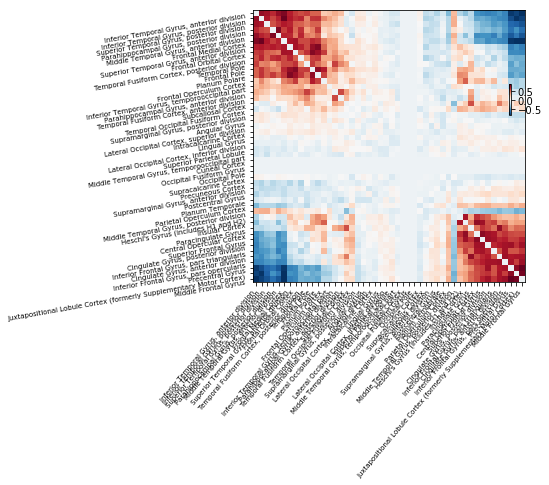

In [6]:

from nilearn import plotting
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, labels=labels[1:],
                     reorder=True)

plotting.show()

# #to read file you saved
# with open(fil_name+'.csv', 'r') as f:
#   reader = csv.reader(f)
#   examples = list(reader)

# print(examples)
# nwexamples = []
# for row in examples:
#     nwrow = []
#     for r in row:
#         nwrow.append(eval(r))
#     nwexamples.append(nwrow)
# print(nwexamples)

In [10]:
print(len(labels))
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5, resampling_target ="labels")
# for fmri_filename in files:
fmri_filename = files[9]
print(fmri_filename)
curFIleName = fmri_filename.split('\\')[-1]
id = curFIleName.split('_')[0]
type = curFIleName.split('_')[1]
if type == 'rest':
#     continue



    from nilearn.connectome import ConnectivityMeasure
    correlation_measure = ConnectivityMeasure(kind='correlation')
    masked = masker.fit(fmri_filename)
    time_series = masked.transform(fmri_filename)
    print(time_series)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    print(correlation_matrix.shape)

49
F:\ece\capstone\code\py\data\adhd\traindata\0010004_rest_1.nii.gz
[NiftiLabelsMasker.fit] loading data from C:\Users\June Cai/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('F:\\ece\\capstone\\code\\py\\data\\adhd\\traindata\\0010004_rest_1.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x00000154947E6198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': 'C:\\Users\\June '
                'Cai/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,

C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='nilearn_cache'", use "location='nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
C:\Users\June Cai\AppData\Roaming\Python\Python35\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[NiftiLabelsMasker.transform_single_imgs] Resampling images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals


F:\ece\ECE521\Anaconda3-4.2.0-Windows-x86_64\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
______________________________________________filter_and_extract - 36.8s, 0.6min
[[-2.1336439  -0.693588   -1.4046371  ... -0.65414417 -1.2549992
   0.63726705]
 [-1.2036625  -0.2622398  -1.6430252  ... -0.79362535 -1.0651827
  -1.1794208 ]
 [-0.47660458  0.5431393  -1.4174337  ... -1.4474058  -0.2945938
  -0.17925128]
 ...
 [-1.3372395  -1.0774809   1.8381543  ...  0.8917602  -0.20408048
  -1.5525204 ]
 [-0.73463035 -0.23931047  1.7572399  ...  1.1363102   0.12307557
  -0.95292854]
 [-1.3294263  -0.8554241   1.25744    ...  1.1999136  -0.42666847
   0.4658842 ]]
(48, 48)
